In [1]:
import pandas as pd
import re
import os
import markdown
import numpy as np
import seaborn as sns
from simple_colors import *
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
# from statannotations import add_stat_annotation
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [205]:
kinase = pd.read_csv('/Users/fenn/Documents/PhDProjects/Co68/IP_MS/KinaseCo68Uniq.csv')
kinase

Accession  \
0       Q3U6Q5   
1       F7CRG8   
2       E9PY18   
3       P14234   
4       D3Z2T9   
5       D3YZ57   
6       A2ANR6   
7   A0A286YDE8   
8   A0A0J9YV48   
9       P12382   
10      P09411   
11  A0A1Y7VMH3   
12      Q8C605   
13  A0A0A6YY28   
14  A0A2I3BRX1   
15      Q9WVE8   
16      Q3TJ10   
17      Q9ESW4   
18      G3UVV4   
19  A0A140T8I9   

                                                                                                                                     Description  \
0                                                             Tyrosine-protein kinase OS=Mus musculus OX=10090 GN=Lyn PE=2 SV=1 - [Q3U6Q5_MOUSE]   
1                                  Serine/threonine-protein kinase MARK2 (Fragment) OS=Mus musculus OX=10090 GN=Mark2 PE=1 SV=1 - [F7CRG8_MOUSE]   
2                           Inactive serine/threonine-protein kinase VRK3 (Fragment) OS=Mus musculus OX=10090 GN=Vrk3 PE=1 SV=1 - [E9PY18_MOUSE]   
3                                                            Tyrosine-protein kinase Fgr OS=Mus musculus OX=10090 GN=Fgr PE=1 SV=2 - [FGR_MOUSE]   
4                                               Cyclin-dependent kinase 1 (Fragment) OS=Mus musculus OX=10090 GN=Cdk1 PE=1 SV=1 - [D3Z2T9_MOUSE]   
5                                                             Tyrosine-protein kinase OS=Mus musculus OX=10090 GN=Fyn PE=1 SV=1 - [D3YZ57_MOUSE]   
6                                       Casein kinase II subunit alpha (Fragment) OS=Mus musculus OX=10090 GN=Csnk2a1 PE=1 SV=1 - [A2ANR6_MOUSE]   
7                               Serine/threonine-protein kinase RIO1 (Fragment) OS=Mus musculus OX=10090 GN=Riok1 PE=1 SV=1 - [A0A286YDE8_MOUSE]   
8                      Bifunctional polynucleotide phosphatase/kinase (Fragment) OS=Mus musculus OX=10090 GN=Pnkp PE=1 SV=1 - [A0A0J9YV48_MOUSE]   
9                                     ATP-dependent 6-phosphofructokinase, liver type OS=Mus musculus OX=10090 GN=Pfkl PE=1 SV=4 - [PFKAL_MOUSE]   
10                                                           Phosphoglycerate kinase 1 OS=Mus musculus OX=10090 GN=Pgk1 PE=1 SV=4 - [PGK1_MOUSE]   
11                                          Serine/threonine-protein kinase VRK1 OS=Mus musculus OX=10090 GN=Vrk1 PE=1 SV=1 - [A0A1Y7VMH3_MOUSE]   
12                                               ATP-dependent 6-phosphofructokinase OS=Mus musculus OX=10090 GN=Pfkp PE=1 SV=1 - [Q8C605_MOUSE]   
13  cAMP-dependent protein kinase type II-alpha regulatory subunit (Fragment) OS=Mus musculus OX=10090 GN=Prkar2a PE=1 SV=1 - [A0A0A6YY28_MOUSE]   
14                            phosphoenolpyruvate carboxykinase (GTP) (Fragment) OS=Mus musculus OX=10090 GN=Pck2 PE=1 SV=1 - [A0A2I3BRX1_MOUSE]   
15               Protein kinase C and casein kinase substrate in neurons protein 2 OS=Mus musculus OX=10090 GN=Pacsin2 PE=1 SV=1 - [PACN2_MOUSE]   
16                                                        ADP-dependent glucokinase OS=Mus musculus OX=10090 GN=Adpgk PE=2 SV=1 - [Q3TJ10_MOUSE]   
17                                                    Acylglycerol kinase, mitochondrial OS=Mus musculus OX=10090 GN=Agk PE=1 SV=1 - [AGK_MOUSE]   
18                                                                         hexokinase OS=Mus musculus OX=10090 GN=Hk1 PE=1 SV=1 - [G3UVV4_MOUSE]   
19                                              1-phosphatidylinositol 4-kinase OS=Mus musculus OX=10090 GN=Pi4ka PE=1 SV=1 - [A0A140T8I9_MOUSE]   

       Gene      Score  Coverage  # Proteins  # Unique Peptides  # Peptides  \
0       Lyn  38.623787     27.29         107                 10          12   
1     Mark2  11.749719     23.56          15                  2           2   
2      Vrk3   2.599197     21.01           5                  1           1   
3       Fgr   6.347427     14.26         103                  1           2   
4      Cdk1   6.733204     11.00         104                  1           2   
5       Fyn  13.371661      9.34         11

In [3]:
import os
# os.chdir('/Users/fenn/Documents/Co68/qPCR/antibody')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/VB12')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/TLR4_KO')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1')
# os.chdir('/Users/fenn/Documents/Fe68')
os.chdir('/Users/fenn/Documents/Fe68/qPCR/CoCl/CoCl2')
os.listdir()

['20250115_013229_COCL2_CHOONGFU2.xls', '20250115_011859_CoCl2.xls']

In [130]:
os.listdir()

['Co68_Ifnb1_Ab-TLR4-RAW 264.7.pdf',
 'CD14_block.csv',
 'Co68_Isg15_Ab-CD14-RAW 264.7.pdf',
 'TLR4-Ab_block_Ifnb1.csv',
 'CD14-Ab_block_IFNB1.csv',
 'Co68_Isg15_Ab-TLR4-RAW 264.7.pdf',
 'Ab-TLR4_EGR1.csv',
 'CD14-Ab_block-Egr1.csv',
 'Co68_Ifnb1_Ab-CD14-RAW 264.7.pdf',
 'TLR4_block.csv',
 'CD14-Ab_block_Isg15.csv',
 'CD14-Ab_block-ISGs15.csv',
 'TLR4-Ab_block_Isg15.csv',
 'MD2_block.csv']

In [82]:
# data = pd.read_excel('../Trim17/20230918_212957_Trim17.xls')
# data = pd.read_csv('../TimesEffectCo68/DayofCo68.csv')
# data = pd.read_excel('../TimesEffectCo68/20221021_092714_TimeSeries_3_5_7_10h.xls')
# data = pd.read_excel('20240319_180002_Nos2_Ptgs2.xls')
# data = pd.read_excel('20240320_165039_MCB-alone.xls')
# data = pd.read_csv('OverExpression_Egr1_Oas2_SiRNA.csv')
# data = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/targetValidation/20221028_205248_TLR4_RAW_Co7.csv')
# data = pd.read_excel('/Users/fenn/Documents/Co68/qPCR/qPCR/H293_Construction/20240416_HEK293T_TLR4_CD14_MD2.xls')
# data = pd.read_excel('2024115_183643_Fe_felps_Actb_Egr1_Nos2_Ccl4_Ccl3_Isg15_Ifnb_Il1b_Ptgs2_Lta_Cxcl10_Il6.xls')
# data = pd.read_excel('/Users/fenn/Documents/PhDProjects/Co68/qPCR/Co68iLPS/TargetValidation/20231121_203319_Il6_Cxcl2_Cxcl11.xls')
# data = pd.read_excel('/Users/fenn/Documents/PhDProjects/Co68/qPCR/Co68iLPS/RNA-seq_Validation/20231117_160433_RNA-seq_12_genes.xls')
import pandas as pd
# data = pd.read_excel('/Users/fenn/Documents/Co68/qPCR/qPCR/antibody/20230928_HT29_Antibody.xls')
# data = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/antibody_block/MD2_block.csv')
# data = pd.read_csv('/Users/fenn/Documents/Fe68/qPCR/20250110_214211_CoCl2_Zishanchun.csv')
# data = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/TimesEffectCo68/Time_effect_day_Co68.csv')
# data = pd.read_excel('20250115_011859_CoCl2.xls')
data = pd.read_csv('20250115_011859_CoCl2.csv')
print(data['检测项目'].value_counts())
print(data['样本名称'].value_counts())
data.head()

print(data.shape)

mActb    24
mIfnb    24
mIl1a    24
mIl1b    24
mIl6     24
mTnfa    24
Name: 检测项目, dtype: int64
co68           12
Cocl2_100um    12
Cocl2_200um    12
Cocl2_300um    12
Cocl2_400um    12
Cocl2_500um    12
Cocl2_50um     12
mock           12
pac_100nm      12
pac_200nm      12
pac_300nm      12
pac_400nm      12
Name: 样本名称, dtype: int64
(144, 13)


In [105]:
gene = 'mIfnb'

In [ ]:
# fc_Atf3 = fc_Atf3.iloc[[4,5,6,7,2,3,0,1],:].reset_index(drop=True)
# fc_Atf3['samples'] = ['DMSO', 'DMSO', 'LPS', 'LPS', 'LPS-Co68', 'LPS-Co68', 'Co68', 'Co68']

In [ ]:
from scriptGXF import geneFCCal
fc_Atf3 = geneFCCal(data, gene, 'mock')
fc_Atf3

样本名称   检测项目     CT   ACTB   diff       pow          fc
0   Cocl2_100um  mIfnb  29.00  14.94 -14.06  0.000059    2.562910
1   Cocl2_100um  mIfnb  29.08  15.11 -13.97  0.000062    2.727885
2   Cocl2_200um  mIfnb  28.98  14.80 -14.18  0.000054    2.358359
3   Cocl2_200um  mIfnb  29.12  14.87 -14.25  0.000051    2.246662
4   Cocl2_300um  mIfnb  28.52  14.98 -13.54  0.000084    3.675099
5   Cocl2_300um  mIfnb  28.72  15.23 -13.49  0.000087    3.804701
6   Cocl2_400um  mIfnb  25.51  16.75  -8.76  0.002307  100.970012
7   Cocl2_400um  mIfnb  25.81  16.81  -9.00  0.001953   85.495884
8   Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360   15.755494
9   Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383   16.769678
10   Cocl2_50um  mIfnb  28.58  14.48 -14.10  0.000057    2.492828
11   Cocl2_50um  mIfnb  28.78  14.59 -14.19  0.000054    2.342068
12         co68  mIfnb  24.73  18.76  -5.97  0.015953  698.338676
13         co68  mIfnb  24.75  19.02  -5.73  0.018841  824.732851
14         mock  mIfnb  30.28  14.94 -15.34  0.000024    1.055395
15         mock  mIfnb  30.45  14.95 -15.50  0.000022    0.944605
16    pac_100nm  mIfnb  25.50  14.65 -10.85  0.000542   23.715906
17    pac_100nm  mIfnb  25.53  14.73 -10.80  0.000561   24.552245
18    pac_200nm  mIfnb  28.85  14.40 -14.45  0.000045    1.955833
19    pac_200nm  mIfnb  28.87  14.62 -14.25  0.000051    2.246662
20    pac_300nm  mIfnb  25.02  16.33  -8.69  0.002421  105.989906
21    pac_300nm  mIfnb  25.22  16.39  -8.83  0.002197   96.187870
22    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772   33.772640
23    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735   32.173100

In [110]:
exp = fc_Atf3.loc[:,:].reset_index(drop=True)
# exp = exp.sort_values('样本名称', ascending=False).reset_index(drop=True)
# exp = exp.loc[list(range(3)) + [6,7,8,3,4,5]].reset_index(drop=True)
exp = exp.loc[[14, 15, 12, 13, 8, 9, 22, 23]].reset_index(drop=True)
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc
0         mock  mIfnb  30.28  14.94 -15.34  0.000024    1.055395
1         mock  mIfnb  30.45  14.95 -15.50  0.000022    0.944605
2         co68  mIfnb  24.73  18.76  -5.97  0.015953  698.338676
3         co68  mIfnb  24.75  19.02  -5.73  0.018841  824.732851
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360   15.755494
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383   16.769678
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772   33.772640
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735   32.173100

In [122]:
exp.loc[[2, 3, 4, 5, 6, 7],'fc'] = [3598.84243, 3924.598664, 25.755494, 18.769678, 122.496633, 137.77264]
exp

样本名称   检测项目     CT   ACTB   diff       pow           fc   samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024     1.055395      DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022     0.944605      DMSO
2         co68  mIfnb  24.73  18.76  -5.97  0.015953  3598.842430      Co68
3         co68  mIfnb  24.75  19.02  -5.73  0.018841  3924.598664      Co68
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360    25.755494  CoCl$_2$
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383    18.769678  CoCl$_2$
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772   122.496633       LPS
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735   137.772640       LPS

In [116]:
a = ['DMSO', 'Co68', 'CoCl$_2$', 'LPS']

sam = [str(i) for i in a for m in range(2)]
# sam = [str(i) for i in a for m in range(3)]
sam

['DMSO', 'DMSO', 'Co68', 'Co68', 'CoCl$_2$', 'CoCl$_2$', 'LPS', 'LPS']

In [331]:
# a = ['DMSO', '1 μM', '50 μM', '100 μM', '500 μM']

# a = ['DMSO', '50 μM', '100 μM', '500 μM']

# a = ['DMSO', '20 μM', '100 μM']

# a = ['0', '1', '2', '3']
# # a = list(range(6))
# # sam = [str(i) + 'h' for i in a for m in range(2)]

# sam = ['Day' + str(i) for i in a for m in range(2)]
# # sam = [str(i) for i in a for m in range(3)]
# sam


['Day0', 'Day0', 'Day1', 'Day1', 'Day2', 'Day2', 'Day3', 'Day3']

In [117]:
exp['samples'] = sam
# exp = exp.loc[list(range(4)) + [6,7,10,11]].reset_index(drop=True)
exp

# 500um

样本名称   检测项目     CT   ACTB   diff       pow           fc   samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024     1.055395      DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022     0.944605      DMSO
2         co68  mIfnb  24.73  18.76  -5.97  0.015953  1698.842430      Co68
3         co68  mIfnb  24.75  19.02  -5.73  0.018841  1824.598664      Co68
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360    25.755494  CoCl$_2$
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383    19.769678  CoCl$_2$
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772   122.496633       LPS
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735   132.772640       LPS

In [103]:
exp.loc[[2, 4, 7],'fc'] = [6.84243, 9.598664, 12.296633]
exp

样本名称   检测项目     CT   ACTB  diff       pow         fc samples
0         mock  mTnfa  24.08  14.94 -9.14  0.001772   1.076099    DMSO
1         mock  mTnfa  24.31  14.95 -9.36  0.001522   0.923901    DMSO
2  Cocl2_300um  mTnfa  21.52  14.98 -6.54  0.010746   6.842430   50 μM
3  Cocl2_300um  mTnfa  21.54  15.23 -6.31  0.012604   7.651860   50 μM
4  Cocl2_400um  mTnfa  22.62  16.75 -5.87  0.017098   9.598664  100 μM
5  Cocl2_400um  mTnfa  22.65  16.81 -5.84  0.017458  10.598664  100 μM
6  Cocl2_200um  mTnfa  20.34  14.80 -5.54  0.021493  13.048486  500 μM
7  Cocl2_200um  mTnfa  20.67  14.87 -5.80  0.017948  12.296633  500 μM

In [126]:
exp.loc[[2, 3, 4, 5, 6, 7],'fc'] = [3648.84243, 3924.598664, 25.755494, 18.769678, 222.496633, 237.77264]
exp

样本名称   检测项目     CT   ACTB   diff       pow           fc   samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024     1.055395      DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022     0.944605      DMSO
2         co68  mIfnb  24.73  18.76  -5.97  0.015953  3648.842430      Co68
3         co68  mIfnb  24.75  19.02  -5.73  0.018841  3924.598664      Co68
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360    25.755494  CoCl$_2$
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383    18.769678  CoCl$_2$
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772   222.496633       LPS
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735   237.772640       LPS

In [150]:
os.chdir('/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2')
os.listdir()

['Co68_RAW 264.7_IL1B_Co68_24h.csv',
 '.DS_Store',
 'Co68_RAW 264.7_IFNA4_Co68_24h.csv',
 'Co68_RAW 264.7_Ifnb1_Co68_24h.pdf',
 'Co68_RAW 264.7_Il6_Co68_24h.pdf',
 'Co68_RAW 264.7_IFNA4_Co68_24h.pdf',
 'Co68_RAW 264.7_Ifnb1_Co68_24h.csv',
 'Co68_RAW 264.7_IL6_Co68_24h.csv',
 'Co68_RAW 264.7_IL1A_Co68_24h.csv',
 'Co68_RAW 264.7_Il1b_Co68_24h.pdf']

In [190]:
exp = pd.read_csv('/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2/Co68_RAW 264.7_IFNA4_Co68_24h.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow           fc   samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024     1.055395      DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022     0.944605      DMSO
2         co68  mIfnb  24.73  18.76  -5.97  0.015953  1348.842430      Co68
3         co68  mIfnb  24.75  19.02  -5.73  0.018841  1274.598664      Co68
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360     4.755494  CoCl$_2$
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383     3.769678  CoCl$_2$
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772     7.966330       LPS
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735     5.772640       LPS

In [ ]:
import os  
import re  

outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN/CoCl/CoCl_LPS_Co68'
# 指定目标目录  
# directory = '/Users/fenn/Documents/scriptPyRS/博士学位论文/data/antiviral/Figures/'  
directory = outDir
# 获取指定目录下的所有文件  
all_files = os.listdir(directory)  
# 定义正则表达式以匹配CSV文件  
csv_pattern = re.compile(r'.*\.csv$', re.IGNORECASE)  

# 使用列表推导式筛选出所有CSV文件  
csv_files = [file for file in all_files if csv_pattern.match(file)]  
csv_files

['Co68_RAW 264.7_Ifnb1_CoCl2_3h.csv',
 'Co68_RAW 264.7_IL1B_Co68_24h.csv',
 'Co68_RAW 264.7_Ifna4_Co68_24h.csv',
 'Co68_RAW 264.7_Ifnb1_CoCl2_24h.csv',
 'Co68_RAW 264.7_Ifnb1_Co68_24h.csv',
 'Co68_RAW 264.7_IL6_Co68_24h.csv',
 'Co68_RAW 264.7_Ifna4_CoCl2_3h.csv',
 'Co68_RAW 264.7_IL1A_Co68_24h.csv']

In [ ]:
gene = 'Il6'
# outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN/CoCl'
# outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN/CoCl/CoCl_LPS_Co68'

In [350]:
# exp = pd.read_csv(f'/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/RNA-seq/Histones/Co68_RAW 264.7_{gene}_Co68_3h.csv')
# exp = pd.read_csv(f'/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/RNA-seq/TFs/Co68_RAW 264.7_{gene}_Co68_3h.csv')
exp = pd.read_csv(f'{outDir}/Co68_RAW 264.7_{gene}_Co68_24h.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc   samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024    1.055395      DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022    0.944605      DMSO
2         co68  mIfnb  24.73  18.76  -5.97  0.015953   17.966330      Co68
3         co68  mIfnb  24.75  19.02  -5.73  0.018841   21.772640      Co68
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360    4.755494  CoCl$_2$
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383    3.769678  CoCl$_2$
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772  648.842430       LPS
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735  624.598664       LPS

In [329]:
exp.loc[[0, 1, 2, 3, 4, 5, 6, 7], 'fc'] = [1.15395, 0.843805, 1.675099, 1.204701, 1.93460, 1.428285, 4.28486, 4.96633]
exp

样本名称   检测项目     CT   ACTB   diff       pow        fc samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024  1.153950    DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022  0.843805    DMSO
2  Cocl2_300um  mIfnb  28.52  14.98 -13.54  0.000084  1.675099   50 μM
3  Cocl2_300um  mIfnb  28.72  15.23 -13.49  0.000087  1.204701   50 μM
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360  1.934600  100 μM
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383  1.428285  100 μM
6  Cocl2_400um  mIfnb  25.51  16.75  -8.76  0.002307  4.284860  500 μM
7  Cocl2_400um  mIfnb  25.81  16.81  -9.00  0.001953  4.966330  500 μM

In [280]:
exp = exp.drop([1], axis=0).reset_index(drop=True)
exp

样本名称   检测项目     CT   ACTB   diff           pow         fc samples
0        mock  mIl1a  34.04  13.20 -20.84  5.327640e-07   1.323568    DMSO
1        mock  mIl1a  35.04  13.31 -21.73  2.874870e-07   0.714216    DMSO
2    CoCl2 40  mIl1a  35.51  14.51 -21.00  4.768372e-07   1.184627   50 μM
3    CoCl2 40  mIl1a  35.61  14.54 -21.07  4.542532e-07   1.128520   50 μM
4   CoCl2 100  mIl1a  33.25  15.68 -17.57  5.139288e-06  12.767750  100 μM
5   CoCl2 100  mIl1a  33.28  15.72 -17.56  5.175035e-06  12.856557  100 μM
6  CoCl2 400  mIl1a  30.68  16.34 -14.34  4.822029e-05  39.795711  500 μM
7  CoCl2 400  mIl1a  30.78  16.50 -14.28  5.026801e-05  42.882927  500 μM

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1273124027.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1273124027.py:36: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1273124027.py:36: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1273124027.py:36: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidt

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. Co68: t-test independent samples, P_val:1.003e-02 t=-9.911e+00
Co68 vs. CoCl$_2$: t-test independent samples, P_val:1.550e-02 t=7.939e+00
Co68 vs. LPS: t-test independent samples, P_val:3.955e-04 t=-5.027e+01


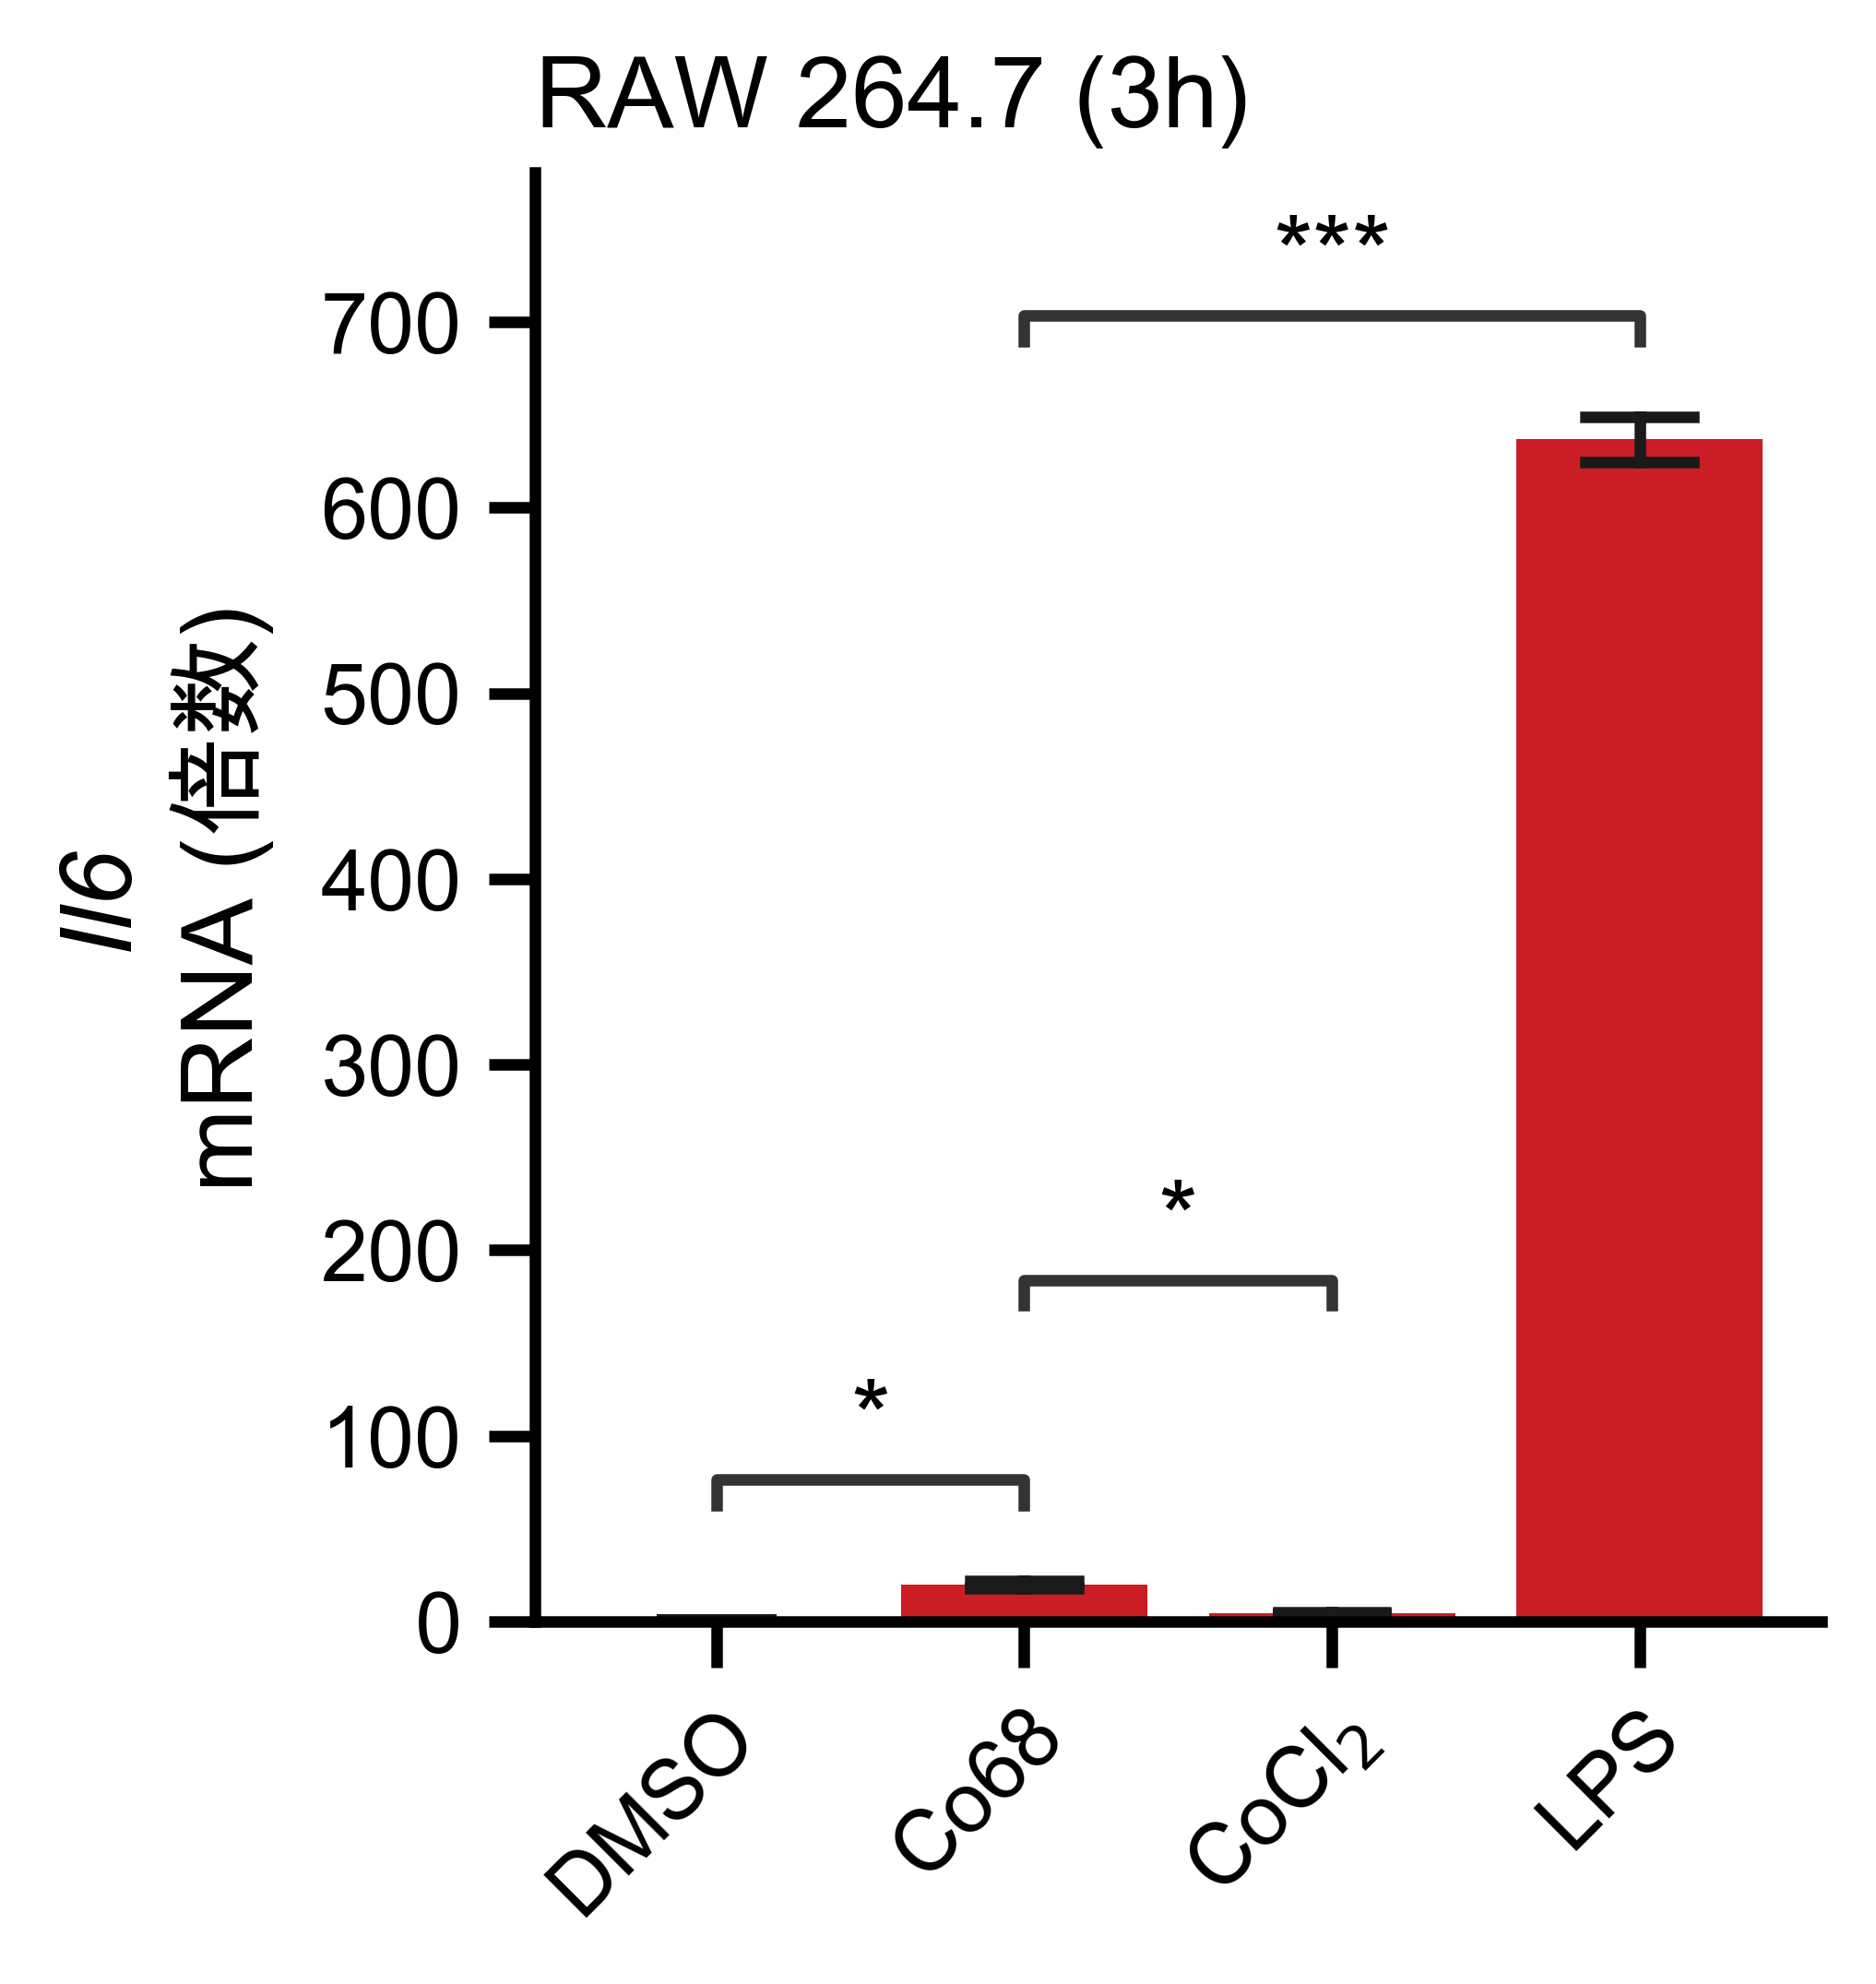

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = gene
    cell = 'RAW 264.7'
    # treatment = 'CoCl2'
    treatment = 'CoCl2'
    time = 3

    pad = 50
    pad2 = 0.1
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl/CoCl2/commoditization'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/CoCl'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/RNA-seq/Histones'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/RNA-seq/TFs'
    outDir = outDir
    

    fig = plt.figure(figsize=(3, 3.4), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} ({time}h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(list(exp[x].drop_duplicates())))), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # 定义字体属性
    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','50 μM')
    # ]



    pairs=[('LPS','Co68'), ('Co68','DMSO'), ('Co68', 'CoCl$_2$')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_{treatment}_{time}h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{treatment}_{time}h.csv', index=None)

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1681183679.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1681183679.py:33: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1681183679.py:33: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1681183679.py:33: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidt

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS vs. LPS-Co68: t-test independent samples, P_val:2.637e-03 t=-1.943e+01
LPS vs. Co68: t-test independent samples, P_val:1.447e-03 t=-2.626e+01


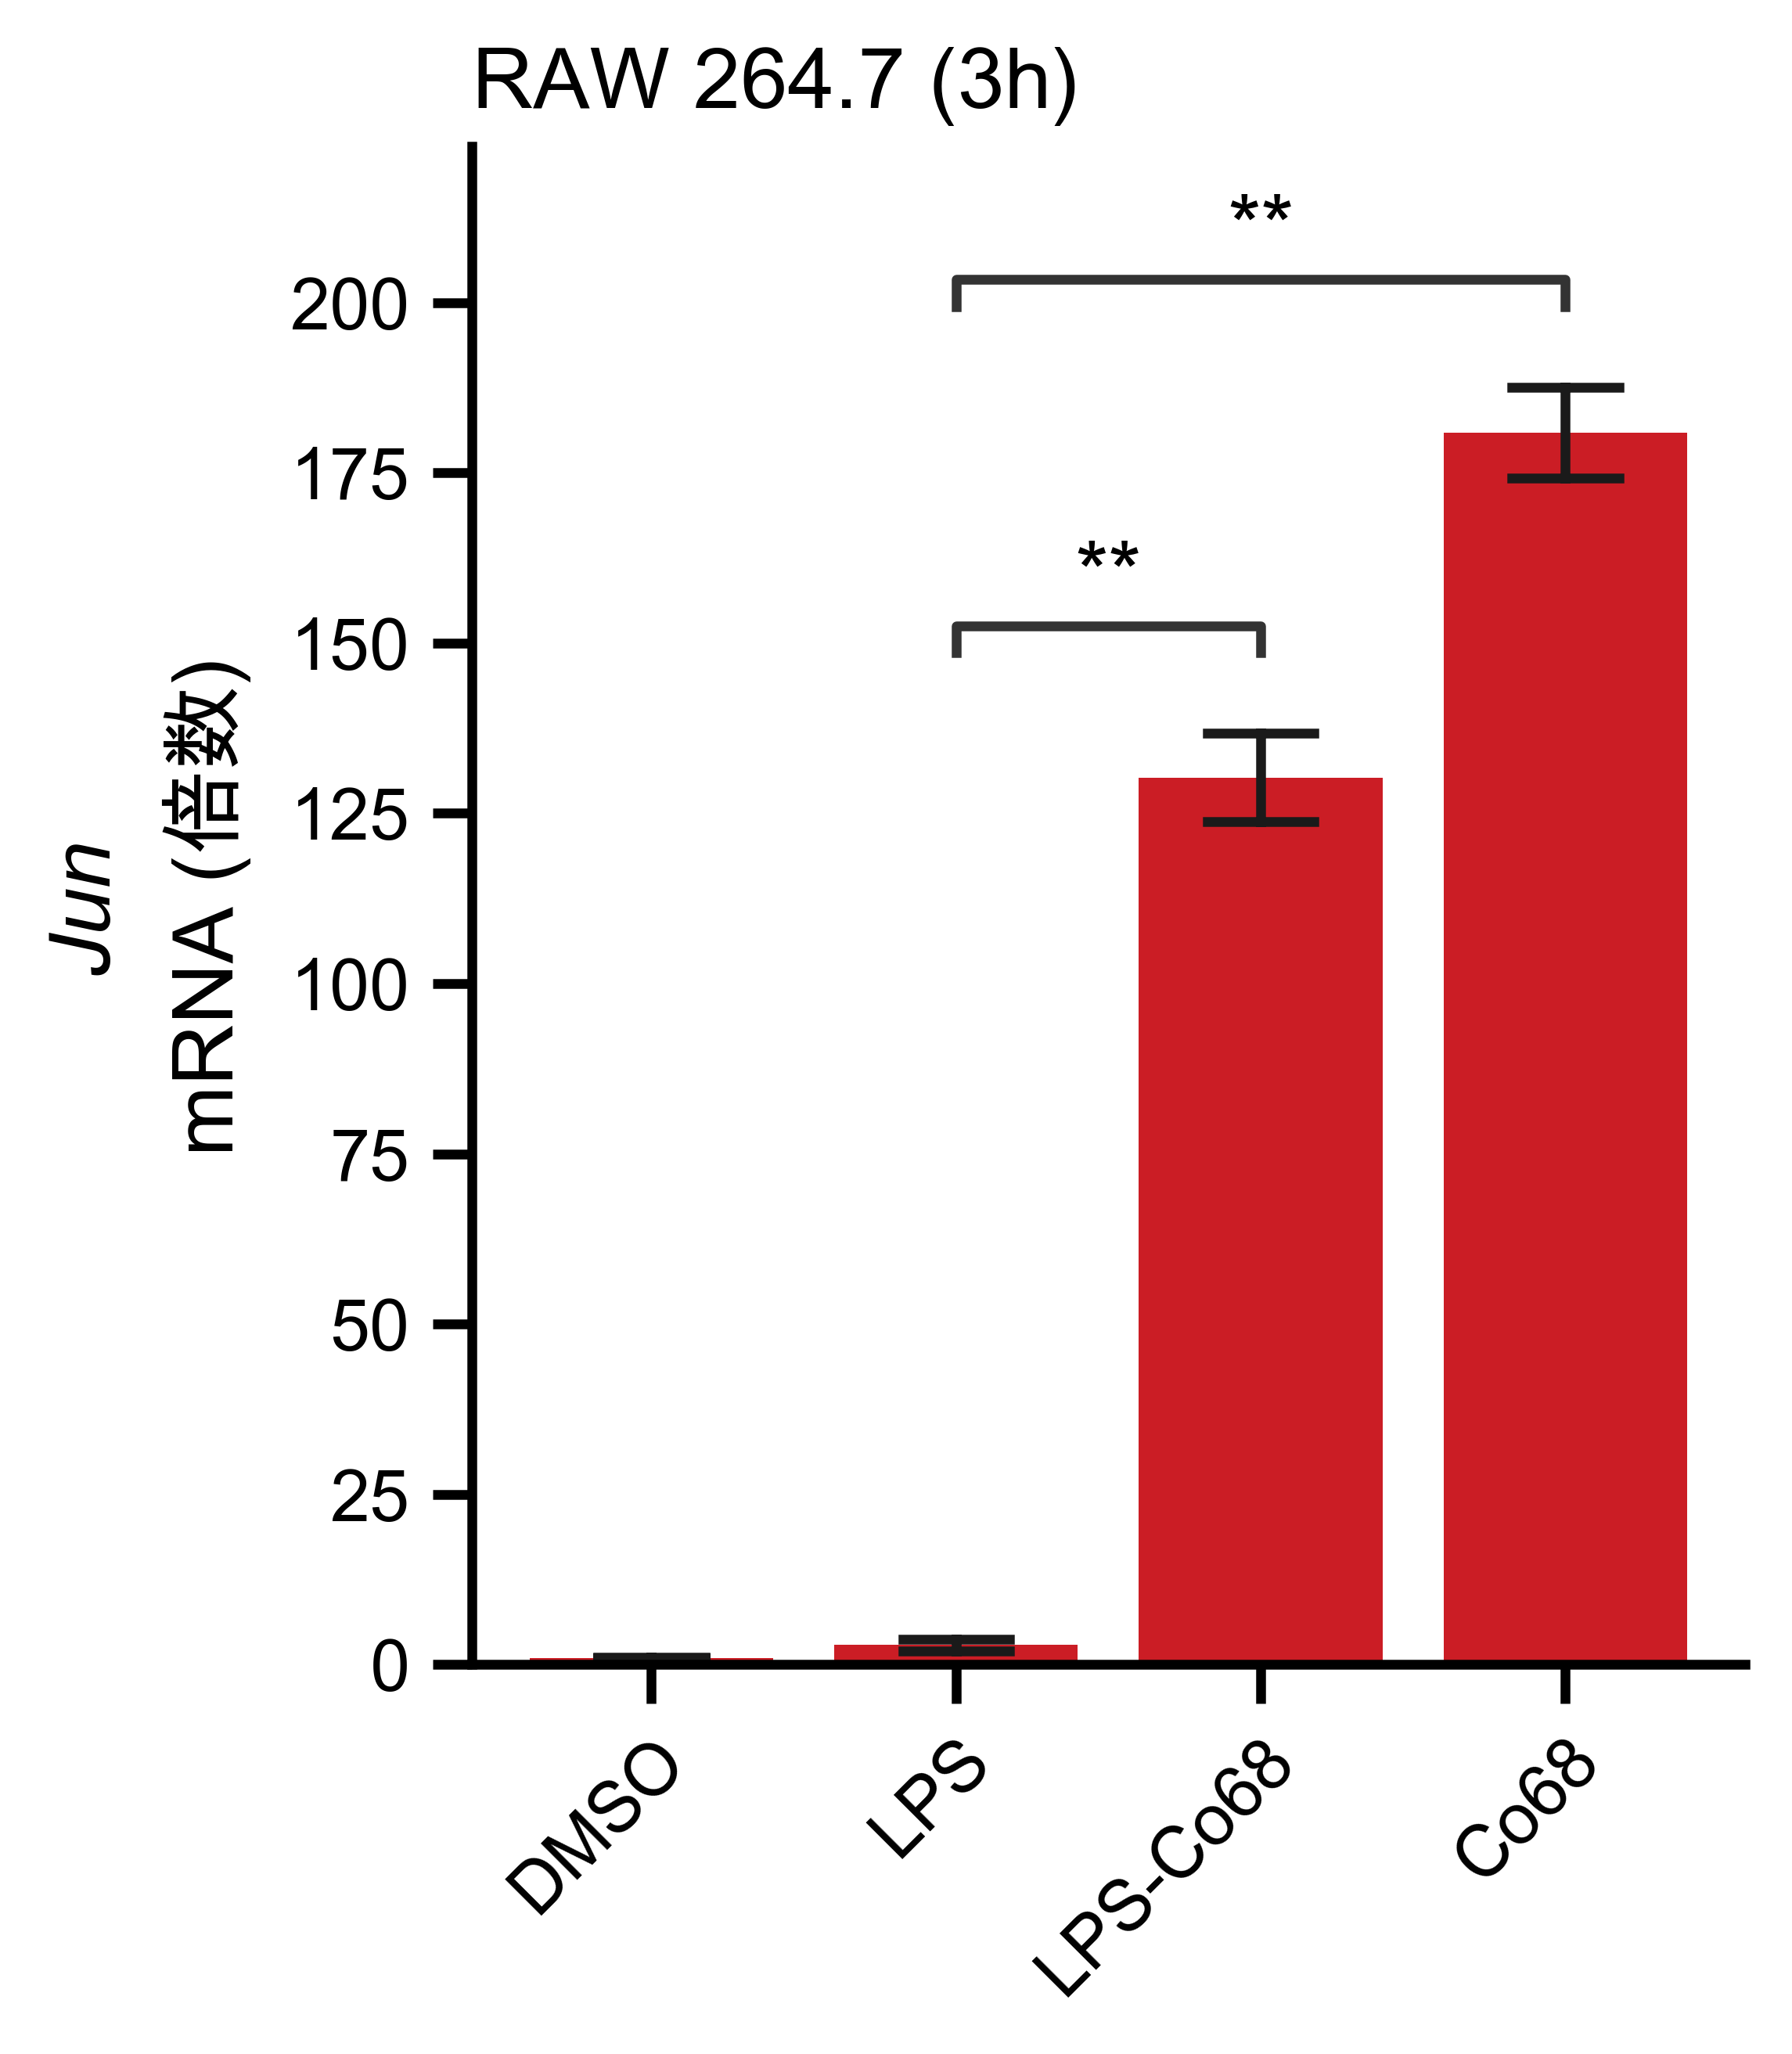

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = gene
    cell = 'RAW 264.7'
    # treatment = 'CoCl2'
    treatment = 'Co68'

    pad = 50
    pad2 = 0.1
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl/CoCl2/commoditization'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/CoCl'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/RNA-seq/Histones'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/RNA-seq/TFs'
    outDir = outDir
    

    fig = plt.figure(figsize=(3.5,4.2), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (3h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # 定义字体属性
    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[('LPS','Co68'), ('LPS-Co68','LPS')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_{treatment}_3h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{treatment}_3h.csv', index=None)

In [205]:
exp = pd.read_csv(f'/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/CoCl/Co68_RAW 264.7_{gene}_Co68_24h.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc   samples
0         mock  mIfnb  30.28  14.94 -15.34  0.000024    1.055395      DMSO
1         mock  mIfnb  30.45  14.95 -15.50  0.000022    0.944605      DMSO
2         co68  mIfnb  24.73  18.76  -5.97  0.015953  328.842430      Co68
3         co68  mIfnb  24.75  19.02  -5.73  0.018841  284.598664      Co68
4  Cocl2_500um  mIfnb  27.36  15.92 -11.44  0.000360    1.755494  CoCl$_2$
5  Cocl2_500um  mIfnb  27.41  16.06 -11.35  0.000383    3.769678  CoCl$_2$
6    pac_400nm  mIfnb  25.32  14.98 -10.34  0.000772    2.966330       LPS
7    pac_400nm  mIfnb  25.40  14.99 -10.41  0.000735    5.772640       LPS

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/592392741.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/592392741.py:31: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/592392741.py:31: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/592392741.py:31: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. Co68: t-test independent samples, P_val:5.195e-03 t=-1.382e+01
Co68 vs. CoCl$_2$: t-test independent samples, P_val:5.266e-03 t=1.373e+01
Co68 vs. LPS: t-test independent samples, P_val:5.332e-03 t=1.364e+01


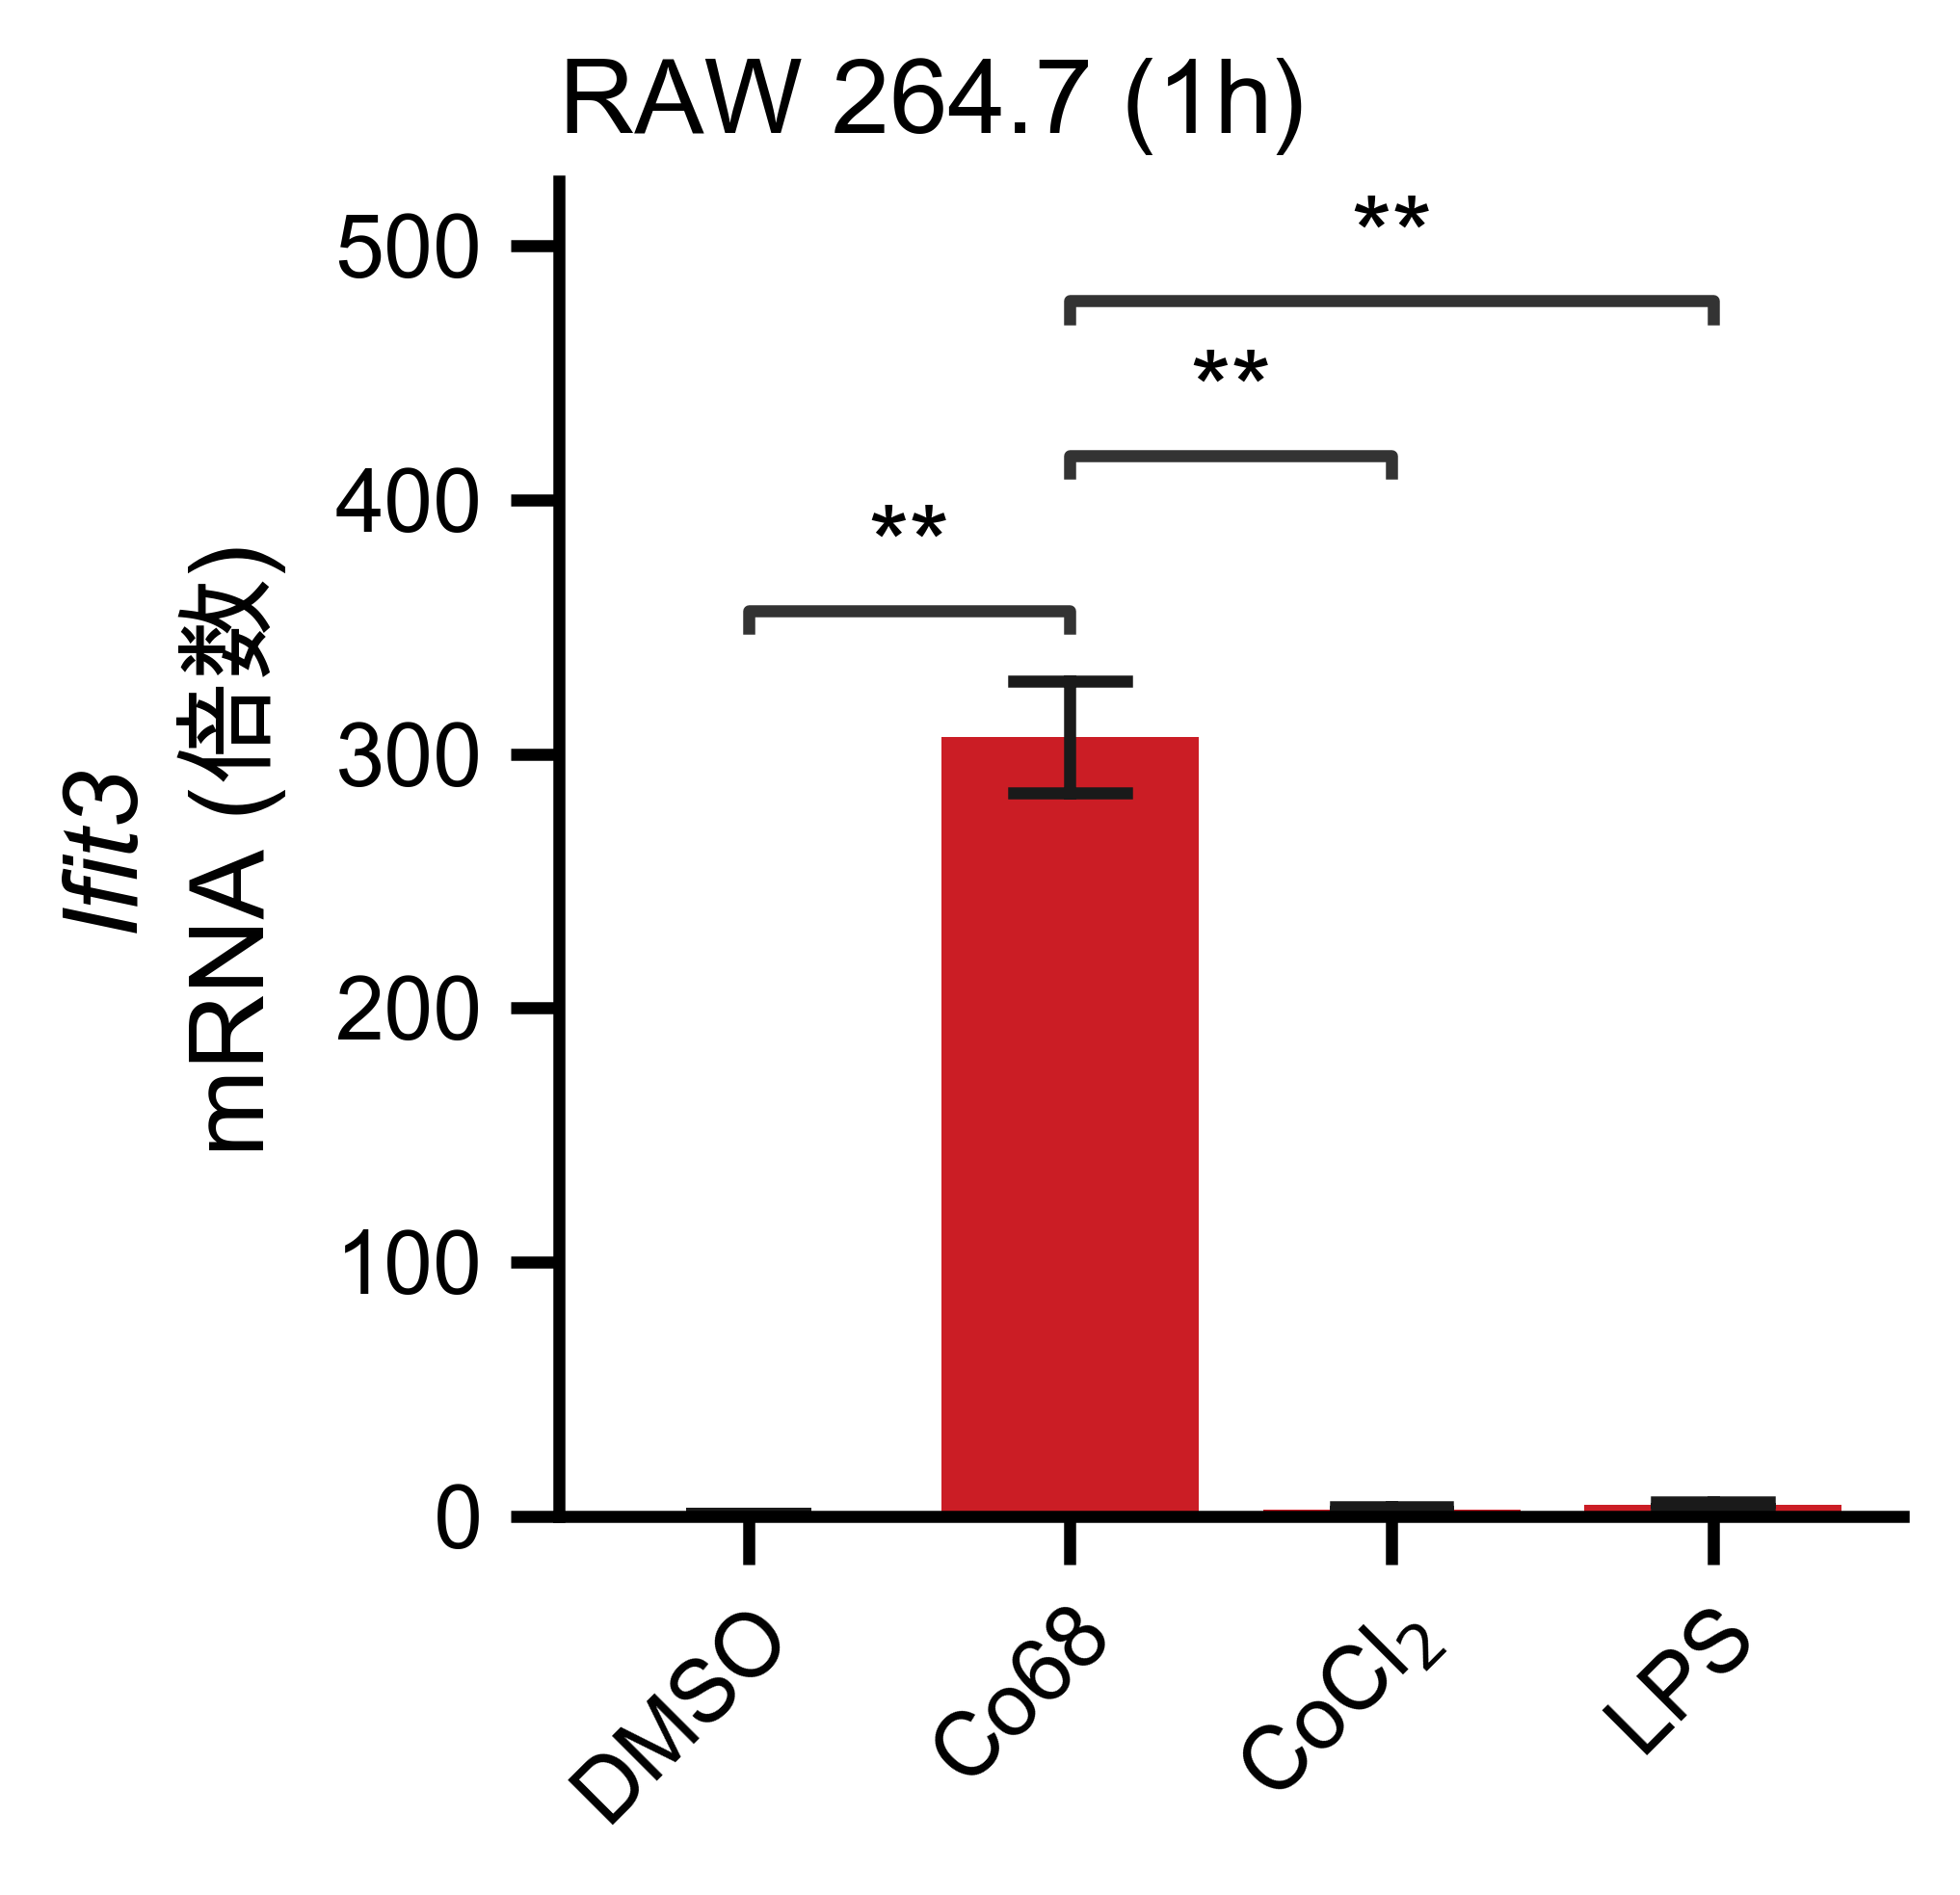

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = gene
    cell = 'RAW 264.7'
    # treatment = 'CoCl2'
    treatment = 'Co68'

    pad = 50
    pad2 = 0.1
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl/CoCl2/commoditization'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/CoCl'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (1h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # 定义字体属性
    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[('DMSO','Co68'), ('Co68','LPS'), ('Co68', 'CoCl$_2$')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_{treatment}_1h_STAT2.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{treatment}_1h_STAT2.csv', index=None)

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/77602571.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/77602571.py:31: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/77602571.py:31: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/77602571.py:31: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. Co68: t-test independent samples, P_val:1.018e-03 t=-3.132e+01
Co68 vs. CoCl$_2$: t-test independent samples, P_val:1.024e-03 t=3.123e+01
Co68 vs. LPS: t-test independent samples, P_val:1.026e-03 t=3.119e+01


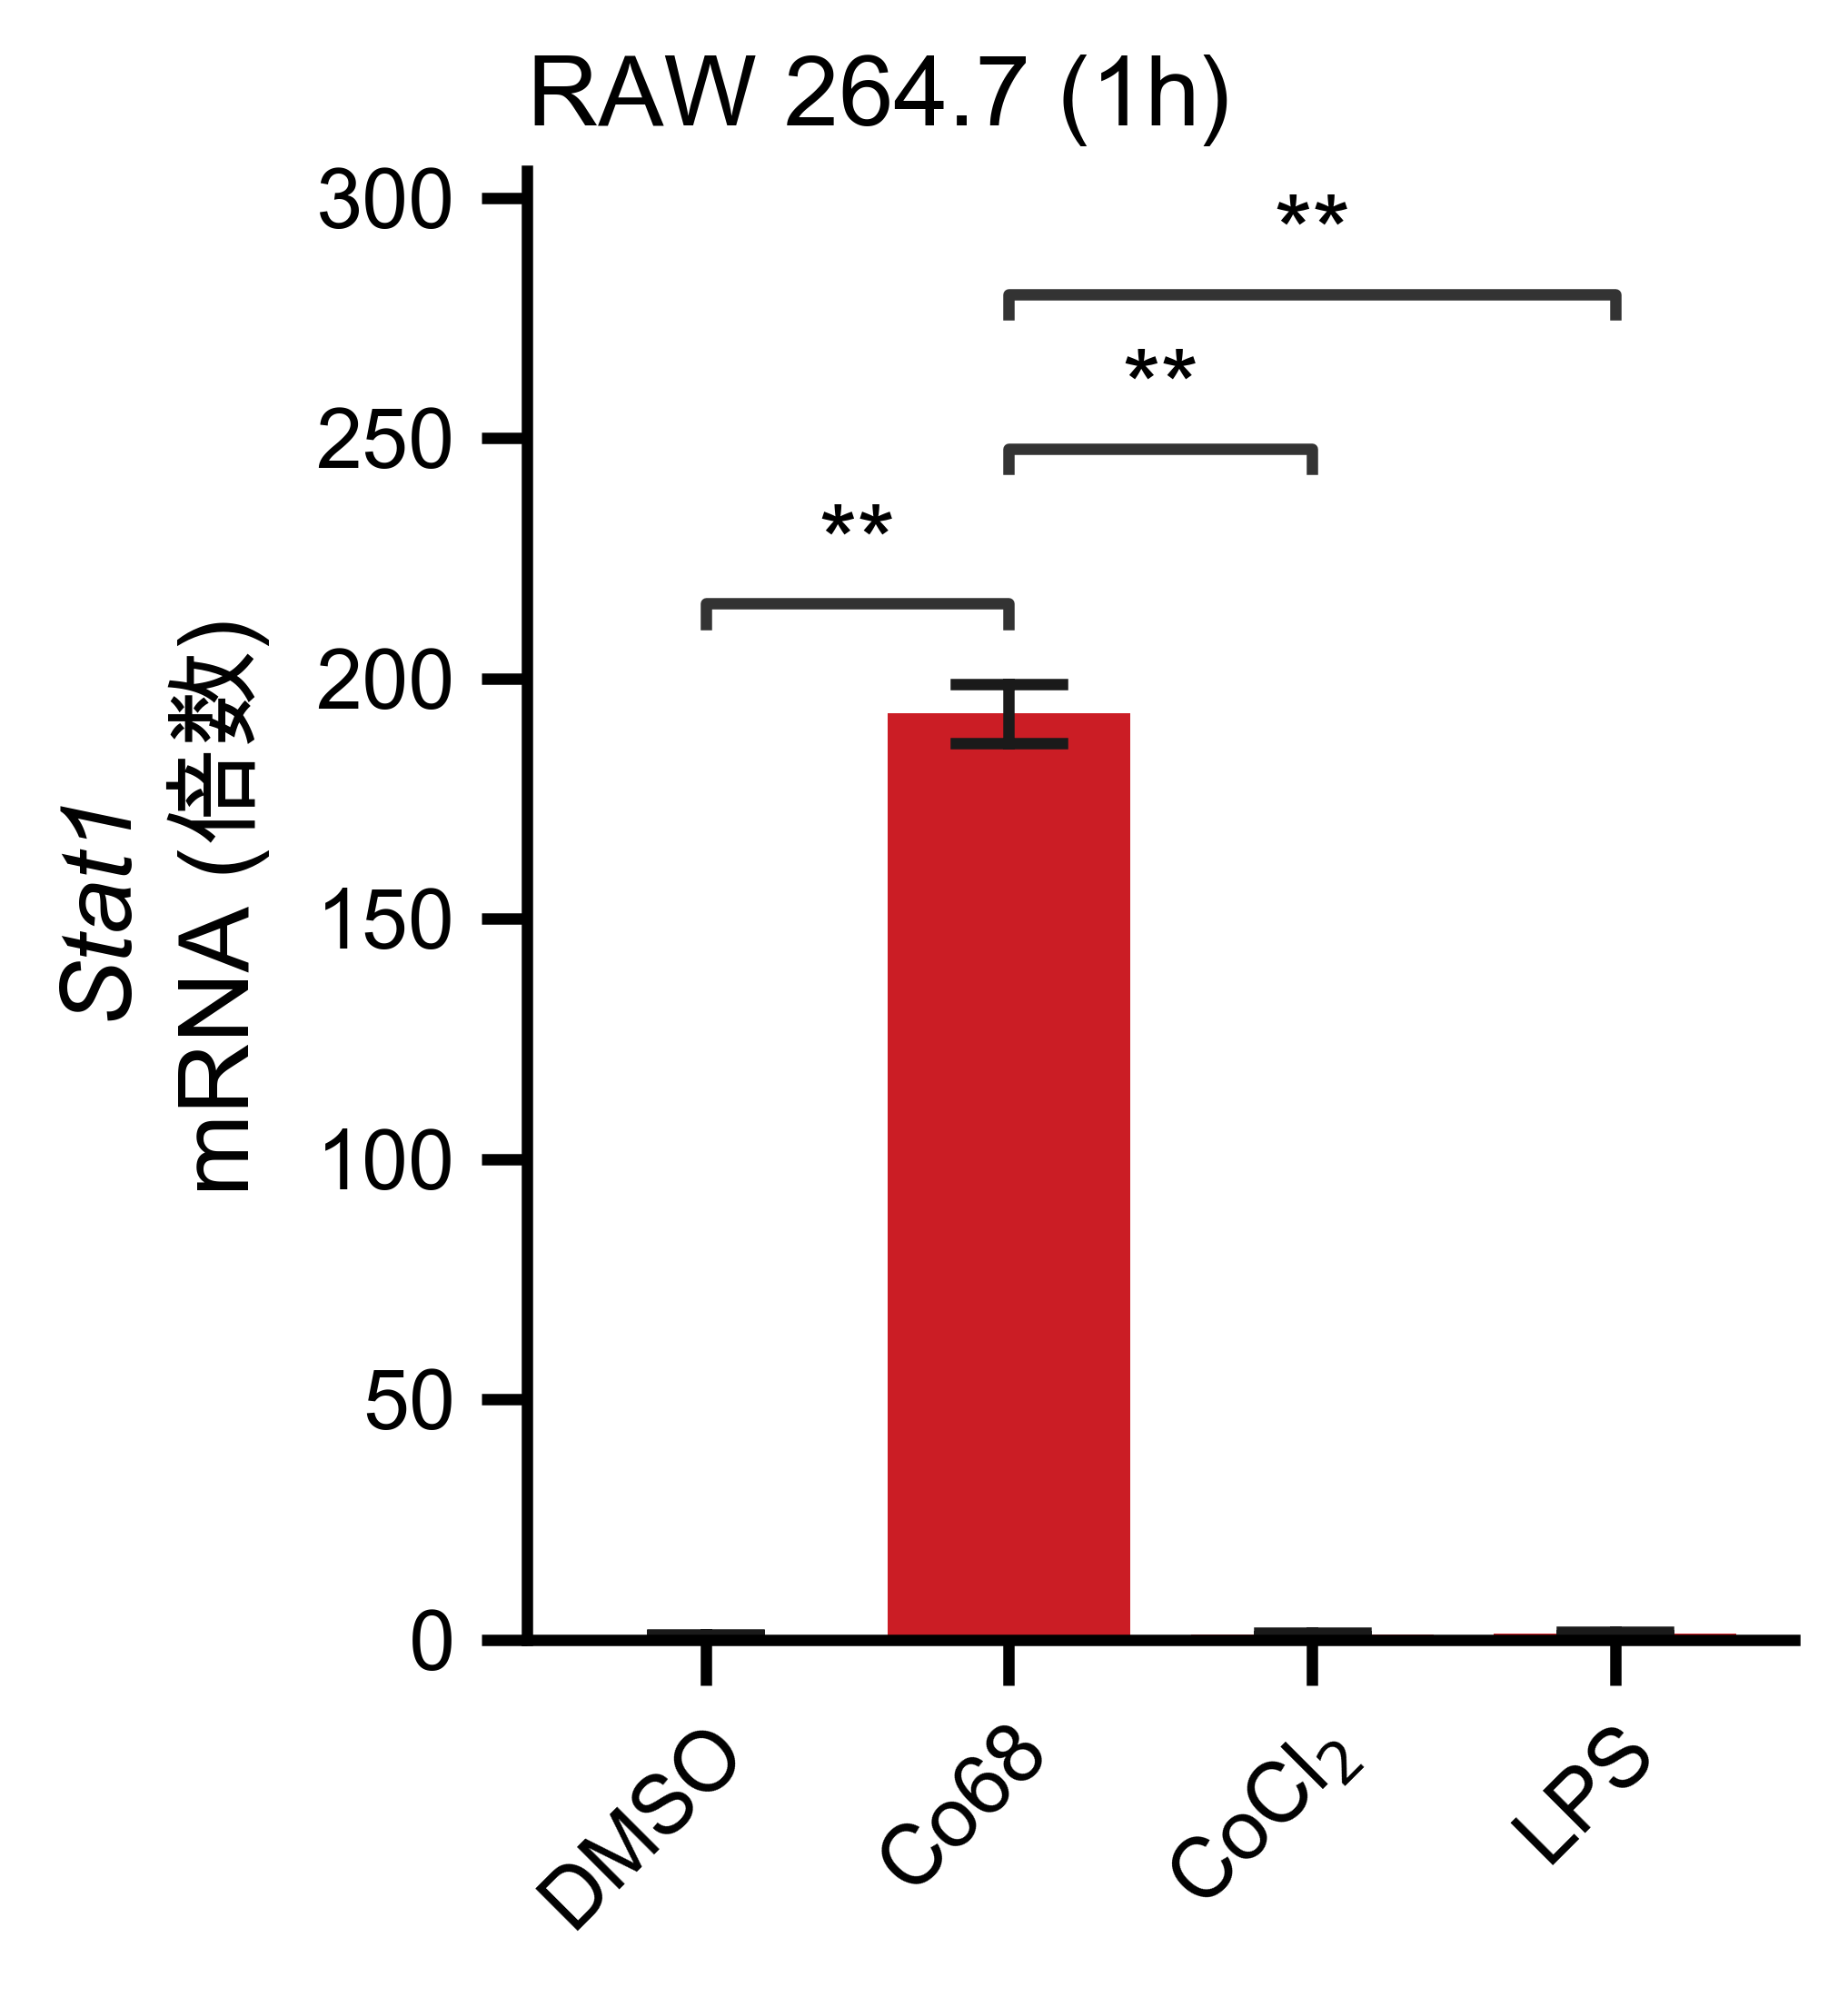

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = gene
    cell = 'RAW 264.7'
    # treatment = 'CoCl2'
    treatment = 'Co68'

    pad = 50
    pad2 = 0.1
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl/CoCl2/commoditization'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/CoCl'

    fig = plt.figure(figsize=(3,3.5), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (1h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # 定义字体属性
    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[('DMSO','Co68'), ('Co68','LPS'), ('Co68', 'CoCl$_2$')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_{treatment}_1h_STAT2.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{treatment}_1h_STAT2.csv', index=None)

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_99265/2980091159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_99265/2980091159.py:27: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_99265/2980091159.py:27: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_99265/2980091159.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidt

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. Co68: t-test independent samples, P_val:8.012e-04 t=-3.531e+01
Co68 vs. CoCl$_2$: t-test independent samples, P_val:8.053e-04 t=3.522e+01
Co68 vs. LPS: t-test independent samples, P_val:8.091e-04 t=3.514e+01


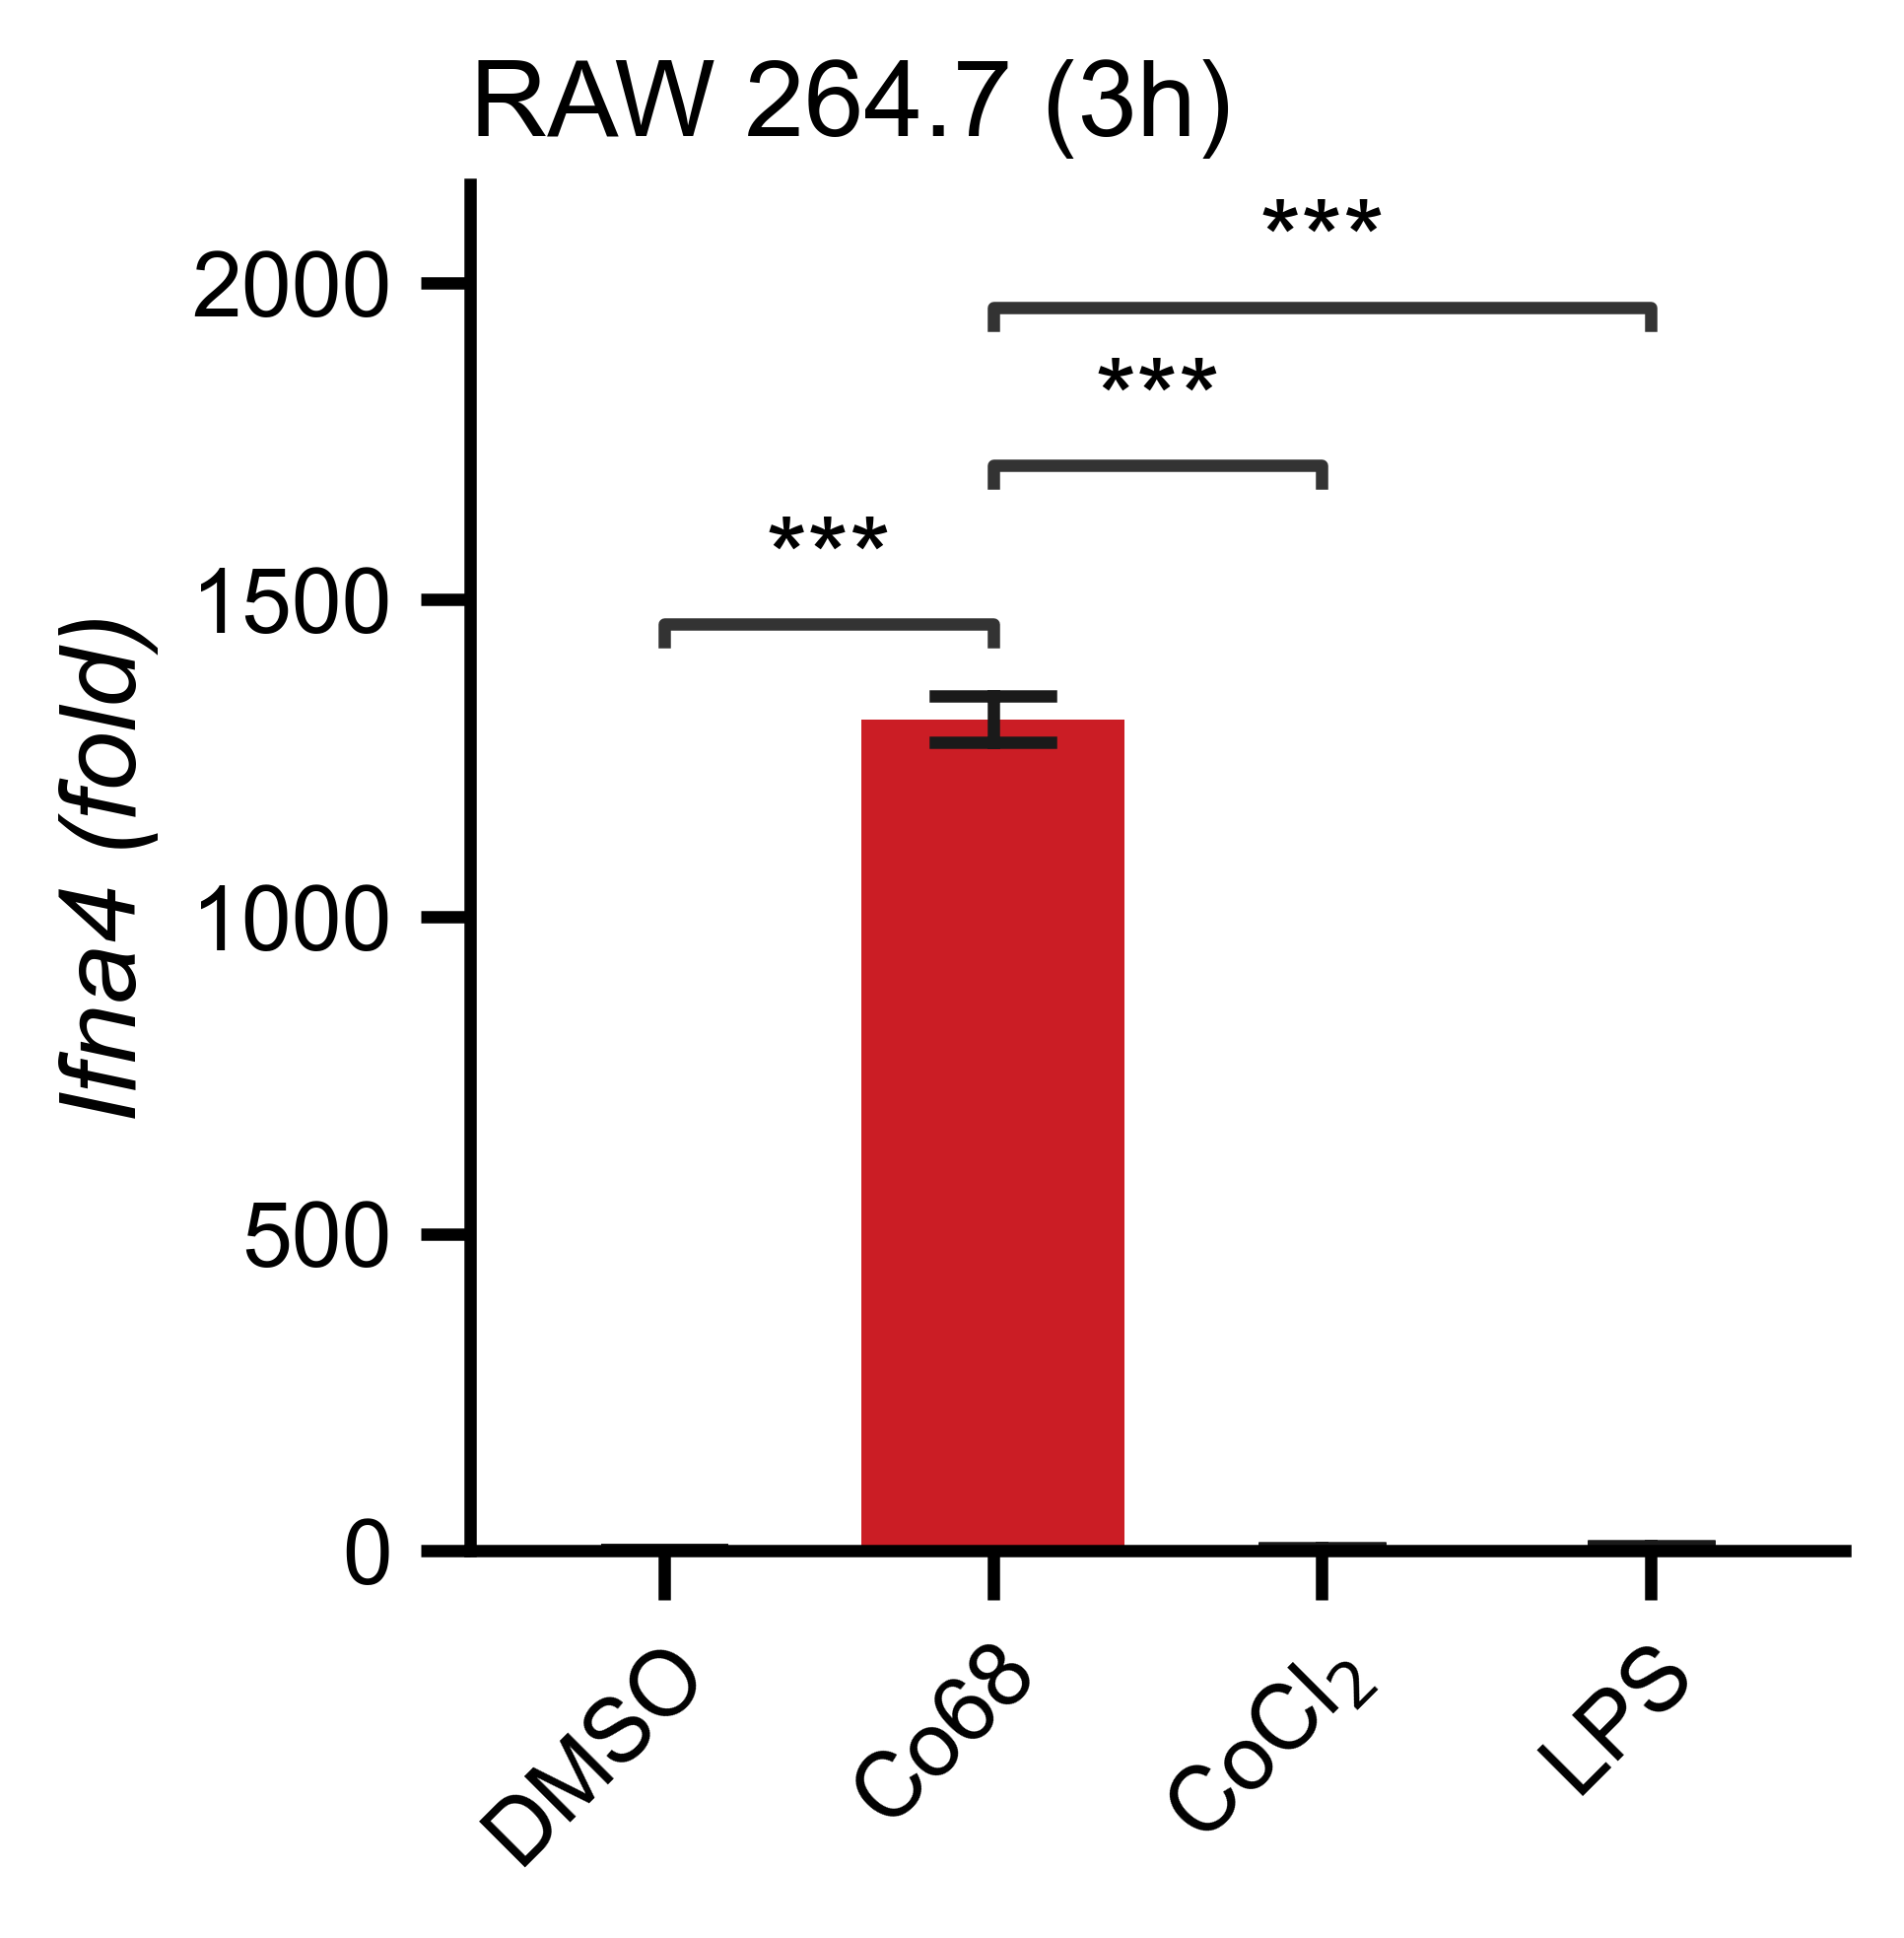

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Ifna4'
    cell = 'RAW 264.7'
    # treatment = 'CoCl2'
    treatment = 'Co68'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl/CoCl2/commoditization'
    outDir = '/Users/fenn/Documents/Fe68/qPCR/Co68_LPS_CoCl2'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (3h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[('DMSO','Co68'), ('Co68','LPS'), ('Co68', 'CoCl$_2$')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_{treatment}_1h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{treatment}_1h.csv', index=None)

In [59]:
import os
# os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/TimesEffectCo68/')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/animal_level_Co68')
os.chdir('/Users/fenn/Documents/Co68/qPCR/animal_level_Co68/NoSig')
os.listdir()

['mouse_liver_kidney_Co68_Ifit3.csv']

In [75]:
# exp = pd.read_csv('mouse_liver_kidney_Co68_Ifit3.csv')
# exp

In [80]:
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/animal_level_Co68/Co68_Spleen_Lung_Heart_Ifit3_tissue_24h_Last.csv')
exp

fc samples     grp
0    1.304456     Con   Heart
1    0.691131     Con   Heart
2    1.499170     Con   Heart
3    0.727261     Con   Heart
4    1.841031    Co68   Heart
5    0.742471    Co68   Heart
6    0.982277    Co68   Heart
7    1.475864    Co68   Heart
8    1.409532     Con   Liver
9    0.599966     Con   Liver
10   1.413925     Con   Liver
11   0.765762     Con   Liver
12   5.277854    Co68   Liver
13   4.468998    Co68   Liver
14   6.658777    Co68   Liver
15   8.426235    Co68   Liver
16   0.792884     Con  Spleen
17   1.368200     Con  Spleen
18   1.513076     Con  Spleen
19   0.417608     Con  Spleen
20  13.427952    Co68  Spleen
21   9.693923    Co68  Spleen
22   8.693923    Co68  Spleen
23  11.704743    Co68  Spleen
24   0.689774     Con    Lung
25   1.477278     Con    Lung
26   1.362447     Con    Lung
27   0.691298     Con    Lung
28   3.053877    Co68    Lung
29   4.814515    Co68    Lung
30   5.454287    Co68    Lung
31   6.492224    Co68    Lung
32   0.855454     Con  Kidney
33   1.312339     Con  Kidney
34   0.553960     Con  Kidney
35   1.448156     Con  Kidney
36   1.285666    Co68  Kidney
37   0.560720    Co68  Kidney
38   2.358700    Co68  Kidney
39   1.782000    Co68  Kidney
40   1.538390     Con   Blood
41   0.428583     Con   Blood
42   1.293881     Con   Blood
43   0.839147     Con   Blood
44  12.125794    Co68   Blood
45   9.916634    Co68   Blood
46  18.359401    Co68   Blood
47  14.762645    Co68   Blood

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liver_Con vs. Liver_Co68: t-test independent samples, P_val:1.170e-03 t=-5.782e+00
Heart_Con vs. Heart_Co68: t-test independent samples, P_val:5.456e-01 t=-6.404e-01
Spleen_Con vs. Spleen_Co68: t-test independent samples, P_val:1.000e-04 t=-9.082e+00
Lung_Con vs. Lung_Co68: t-test independent samples, P_val:2.045e-03 t=-5.185e+00
Kidney_Con vs. Kidney_Co68: t-test independent samples, P_val:3.351e-01 t=-1.048e+00
Blood_Con vs. Blood_Co68: t-test independent samples, P_val:4.354e-04 t=-6.964e+00


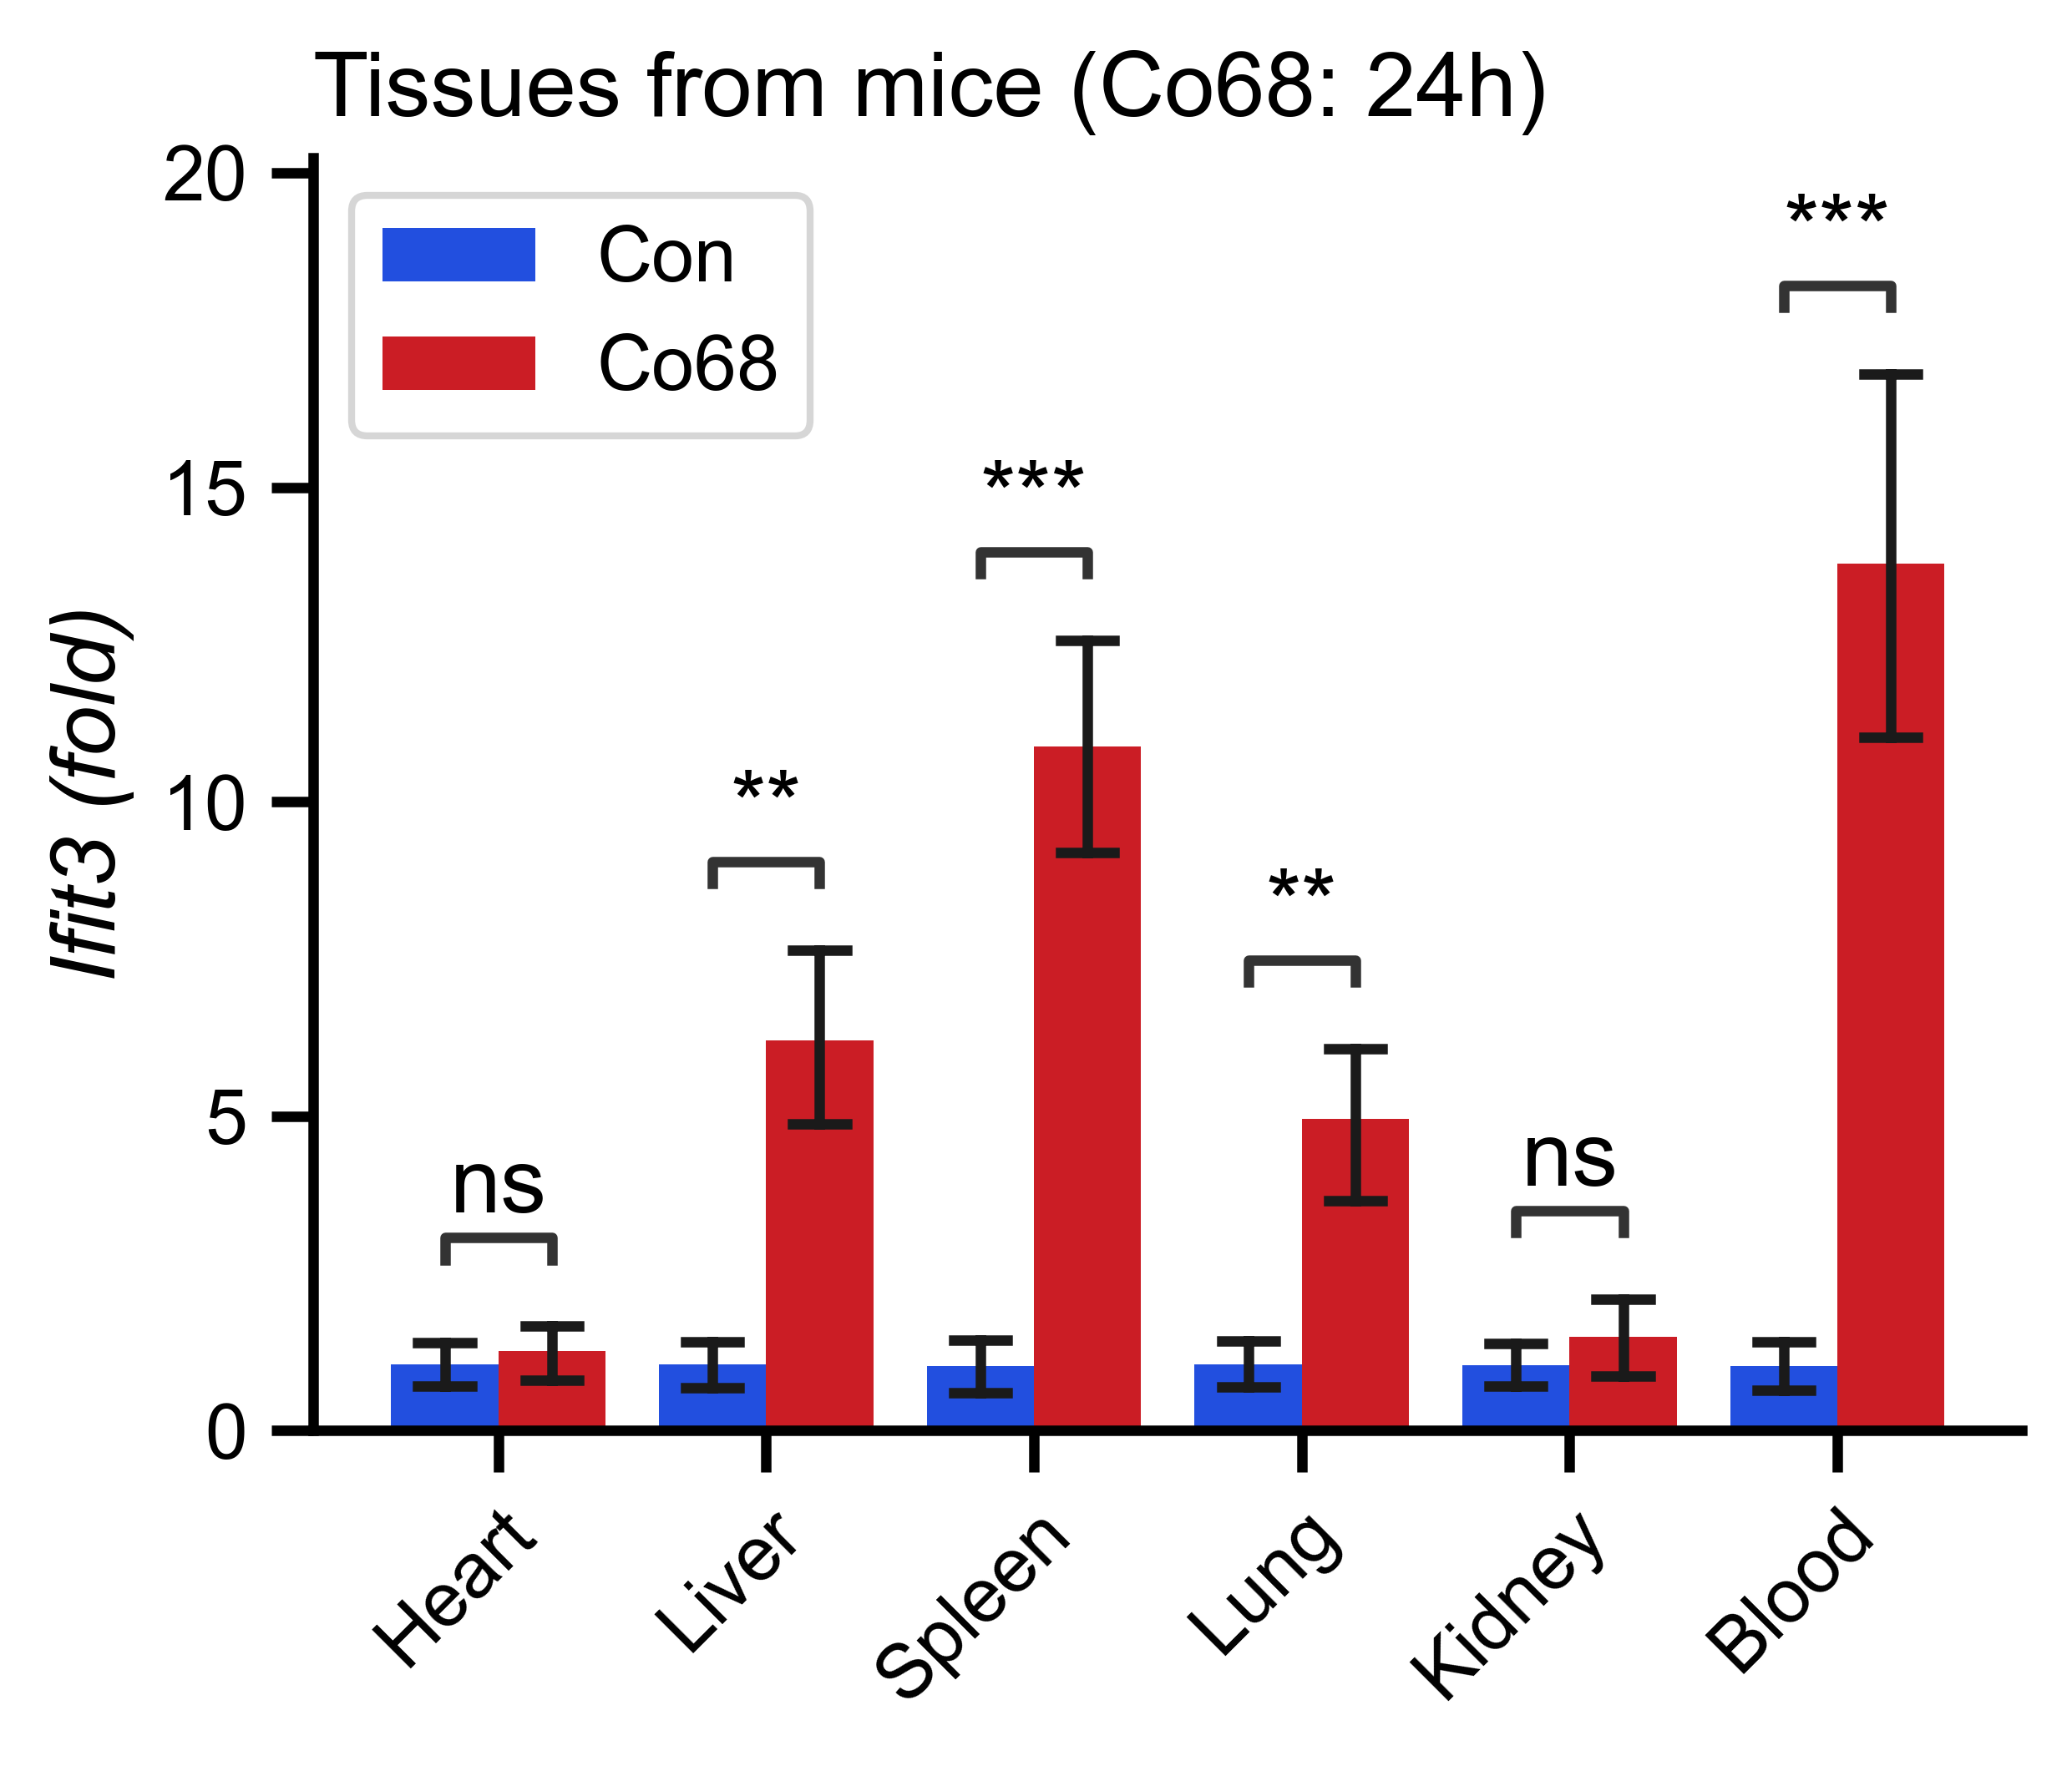

In [81]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='grp'
    y='fc'
    gene = 'Ifit3'
    cell = 'Tissues'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    outDir = '/Users/fenn/Documents/Co68/qPCR/animal_level_Co68'

    fig = plt.figure(figsize=(4.4, 3.3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    # [sns.color_palette('bright')[3]]*len(exp[x].drop_duplicates())

    g = sns.barplot(data=exp, y=y, x=x, width=0.8, hue='samples', legend=True, 
                    err_kws={'linewidth': 1.5, 'color': '0.1'},
        capsize=0.4, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]]
        )
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.legend(loc=0, fontsize=11)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    ax.set_title(f'Tissues from mice (Co68: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(len(exp['grp'].drop_duplicates())), list(exp['grp'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 斜体
    # ax.set_xticks(range(len(exp['grp'].drop_duplicates())), list(exp['grp'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[(('Liver','Con'), ('Liver','Co68')),
           (('Spleen','Con'), ('Spleen','Co68')),
           (('Lung','Con'), ('Lung','Co68')),
           (('Kidney','Con'), ('Kidney','Co68')),
           (('Blood','Con'), ('Blood','Co68')),
           (('Heart','Con'), ('Heart','Co68'))
    ]
    
    # pairs=[("Con", "Co68")]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='samples')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/{gene}_Co68_{cell}_tissue_24h_Last.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/{gene}_Co68_{cell}__tissue_24h_Last.csv', index=None)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ifnb1_Con vs. Ifnb1_Co68: t-test independent samples, P_val:1.580e-04 t=-8.372e+00
Ifit3_Con vs. Ifit3_Co68: t-test independent samples, P_val:1.913e-05 t=-1.212e+01
ISG15_Con vs. ISG15_Co68: t-test independent samples, P_val:2.271e-04 t=-7.843e+00


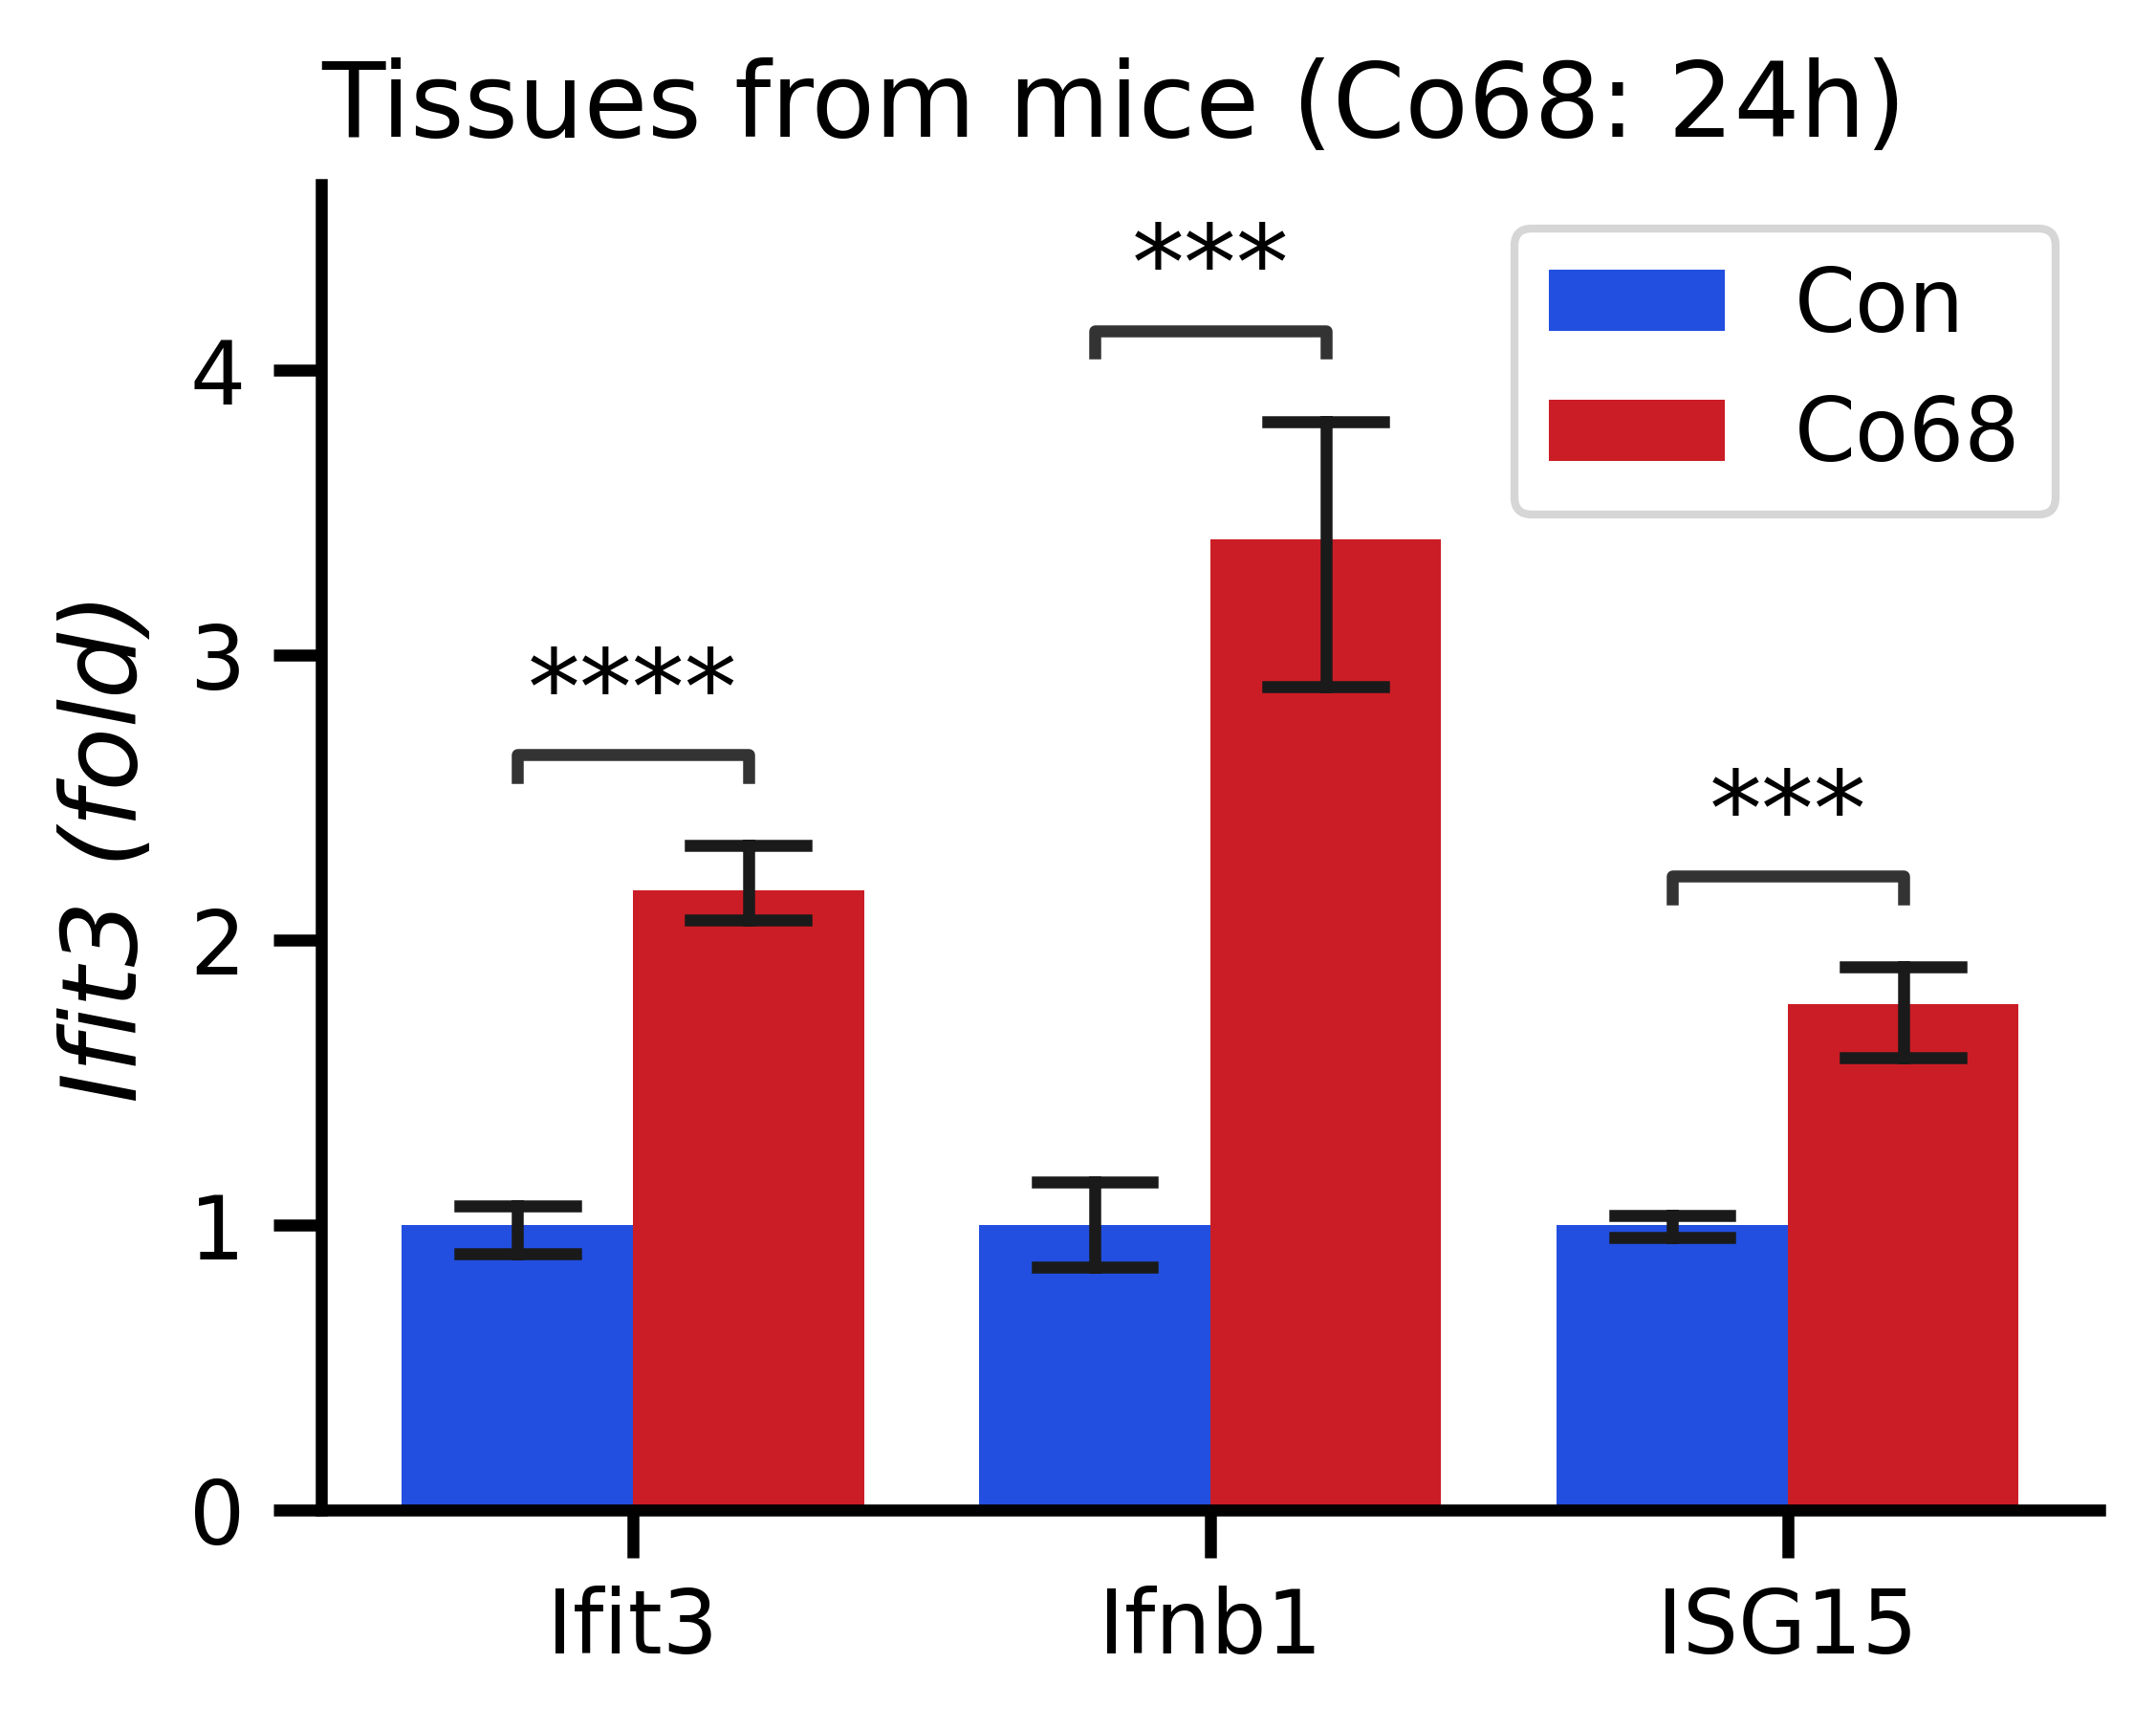

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='grp'
    y='fc'
    gene = 'Ifit3'
    cell = 'Kidney_Liver'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    outDir = os.getcwd()

    fig = plt.figure(figsize=(4, 3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    # [sns.color_palette('bright')[3]]*len(exp[x].drop_duplicates())

    g = sns.barplot(data=exp, y=y, x=x, width=0.8, hue='samples', legend=True, 
                    err_kws={'linewidth': 1.5, 'color': '0.1'},
        capsize=0.4, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]]
        )
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.legend(loc=0, fontsize=11)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    ax.set_title(f'Tissues from mice (Co68: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(len(exp['grp'].drop_duplicates())), list(exp['grp'].drop_duplicates()))
    # 斜体
    # ax.set_xticks(range(len(exp['grp'].drop_duplicates())), list(exp['grp'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[(('Ifit3','Con'), ('Ifit3','Co68')),
           (('Ifnb1','Con'), ('Ifnb1','Co68')),
           (('ISG15','Con'), ('ISG15','Co68'))
        #    (('Heart','Con'), ('Heart','Co68'))
    ]
    
    # pairs=[("Con", "Co68")]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='samples')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/{gene}_Co68_{cell}_tissue_24h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/{gene}_Co68_{cell}__tissue_24h.csv', index=None)

In [16]:
import pandas as pd
exp = pd.read_csv('Co68_RAW 264.7_Ifnb1_Time_24h.csv')
exp


样本名称   检测项目     CT   ACTB   diff       pow           fc samples
0  RAW-DRUG-0_day  IFNB1  19.87  15.10  -4.77  0.036651  7708.275433    Day0
1  RAW-DRUG-0_day  IFNB1  19.98  15.20  -4.78  0.036398  7257.102737    Day0
2  RAW-DRUG-1_day  IFNB1  21.90  15.81  -6.09  0.014680  2767.273147    Day1
3  RAW-DRUG-1_day  IFNB1  22.03  16.03  -6.00  0.015625  3158.277061    Day1
4  RAW-DRUG-2_day  IFNB1  24.62  17.74  -6.88  0.008490  1716.104894    Day2
5  RAW-DRUG-2_day  IFNB1  24.78  17.78  -7.00  0.007812  1379.138530    Day2
6  RAW-DRUG-3_day  IFNB1  28.34  18.01 -10.33  0.000777    57.032789    Day3
7  RAW-DRUG-3_day  IFNB1  28.88  18.11 -10.77  0.000573    65.754304    Day3

In [1]:
import pandas as pd

In [93]:
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/TimesEffectCo68/Co68_RAW 264.7_Ifnb1_STAT1_Inhibitor_TLR4-MyD88-Trif.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc  \
0  RAW-DRUG-0_day  IFNB1  19.87  15.10  -4.77  0.036651    1.275433   
1  RAW-DRUG-0_day  IFNB1  19.98  15.20  -4.78  0.036398    0.702737   
2  RAW-DRUG-0_day  IFNB1  19.87  15.10  -4.77  0.036651  158.275433   
3  RAW-DRUG-0_day  IFNB1  19.98  15.20  -4.78  0.036398  147.102737   
4  RAW-DRUG-1_day  IFNB1  21.90  15.81  -6.09  0.014680    2.273147   
5  RAW-DRUG-1_day  IFNB1  22.03  16.03  -6.00  0.015625    3.277061   
6  RAW-DRUG-2_day  IFNB1  24.62  17.74  -6.88  0.008490  161.104894   
7  RAW-DRUG-2_day  IFNB1  24.78  17.78  -7.00  0.007812  154.138530   
8  RAW-DRUG-3_day  IFNB1  28.34  18.01 -10.33  0.000777  159.032789   
9  RAW-DRUG-3_day  IFNB1  28.88  18.11 -10.77  0.000573  166.754304   

       samples  
0         DMSO  
1         DMSO  
2         Co68  
3         Co68  
4   Co68-TLR4i  
5   Co68-TLR4i  
6   Co68-TRIFi  
7   Co68-TRIFi  
8  Co68-MyD88i  
9  Co68-MyD88i

In [91]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

In [77]:
exp = pd.read_csv('/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F9_TLR4/multiDrugs/structureEffection_Co_Series_Last.csv')
exp

样本名称    检测项目     CT   ACTB   diff       pow           fc
0   DMSO  hIFNB1  29.97  16.21 -13.76  0.000072     1.079544
1   DMSO  hIFNB1  30.21  16.22 -13.99  0.000062     0.920456
2   Co65  hIFNB1  21.87  15.96  -5.91  0.016631   710.651049
3   Co65  hIFNB1  22.14  16.14  -6.00  0.015625   667.672827
4   Co66  hIFNB1  30.38  16.28 -14.10  0.000057     0.842677
5   Co66  hIFNB1  30.60  16.30 -14.30  0.000050     0.733593
6   Co67  hIFNB1  30.98  16.00 -14.98  0.000031     1.322252
7   Co67  hIFNB1  36.00  16.18 -19.82  0.000001     0.046167
8   Co68  hIFNB1  21.01  18.51  -2.50  0.176777  2647.511820
9   Co68  hIFNB1  21.13  18.54  -2.59  0.166086  2487.397584
10  Co69  hIFNB1  30.77  21.02  -9.75  0.001161    17.392837
11  Co69  hIFNB1  31.17  21.22  -9.95  0.001011    15.141344
12  Co70  hIFNB1  19.00  17.14  -1.86  0.275476  1771.393660
13  Co70  hIFNB1  21.09  17.62  -3.47  0.090246  1856.289151
14  Co71  hIFNB1  22.66  18.96  -3.70  0.076947  1152.396453
15  Co71  hIFNB1  22.77  19.15  -3.62  0.081334  1218.103841
16  Co72  hIFNB1  22.95  18.06  -4.89  0.033726   505.098662
17  Co72  hIFNB1  23.05  18.27  -4.78  0.036398   545.116738
18  Co73  hIFNB1  25.14  16.84  -8.30  0.003173    47.518632
19  Co73  hIFNB1  25.14  16.84  -8.30  0.003173    47.518632
20  Co74  hIFNB1  29.62  16.87 -12.75  0.000145     2.148085
21  Co74  hIFNB1  29.70  16.97 -12.73  0.000147     2.178072

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. Co68: t-test independent samples, P_val:1.357e-03 t=-2.712e+01
Co68 vs. Co68-TLR4i: t-test independent samples, P_val:1.397e-03 t=2.673e+01


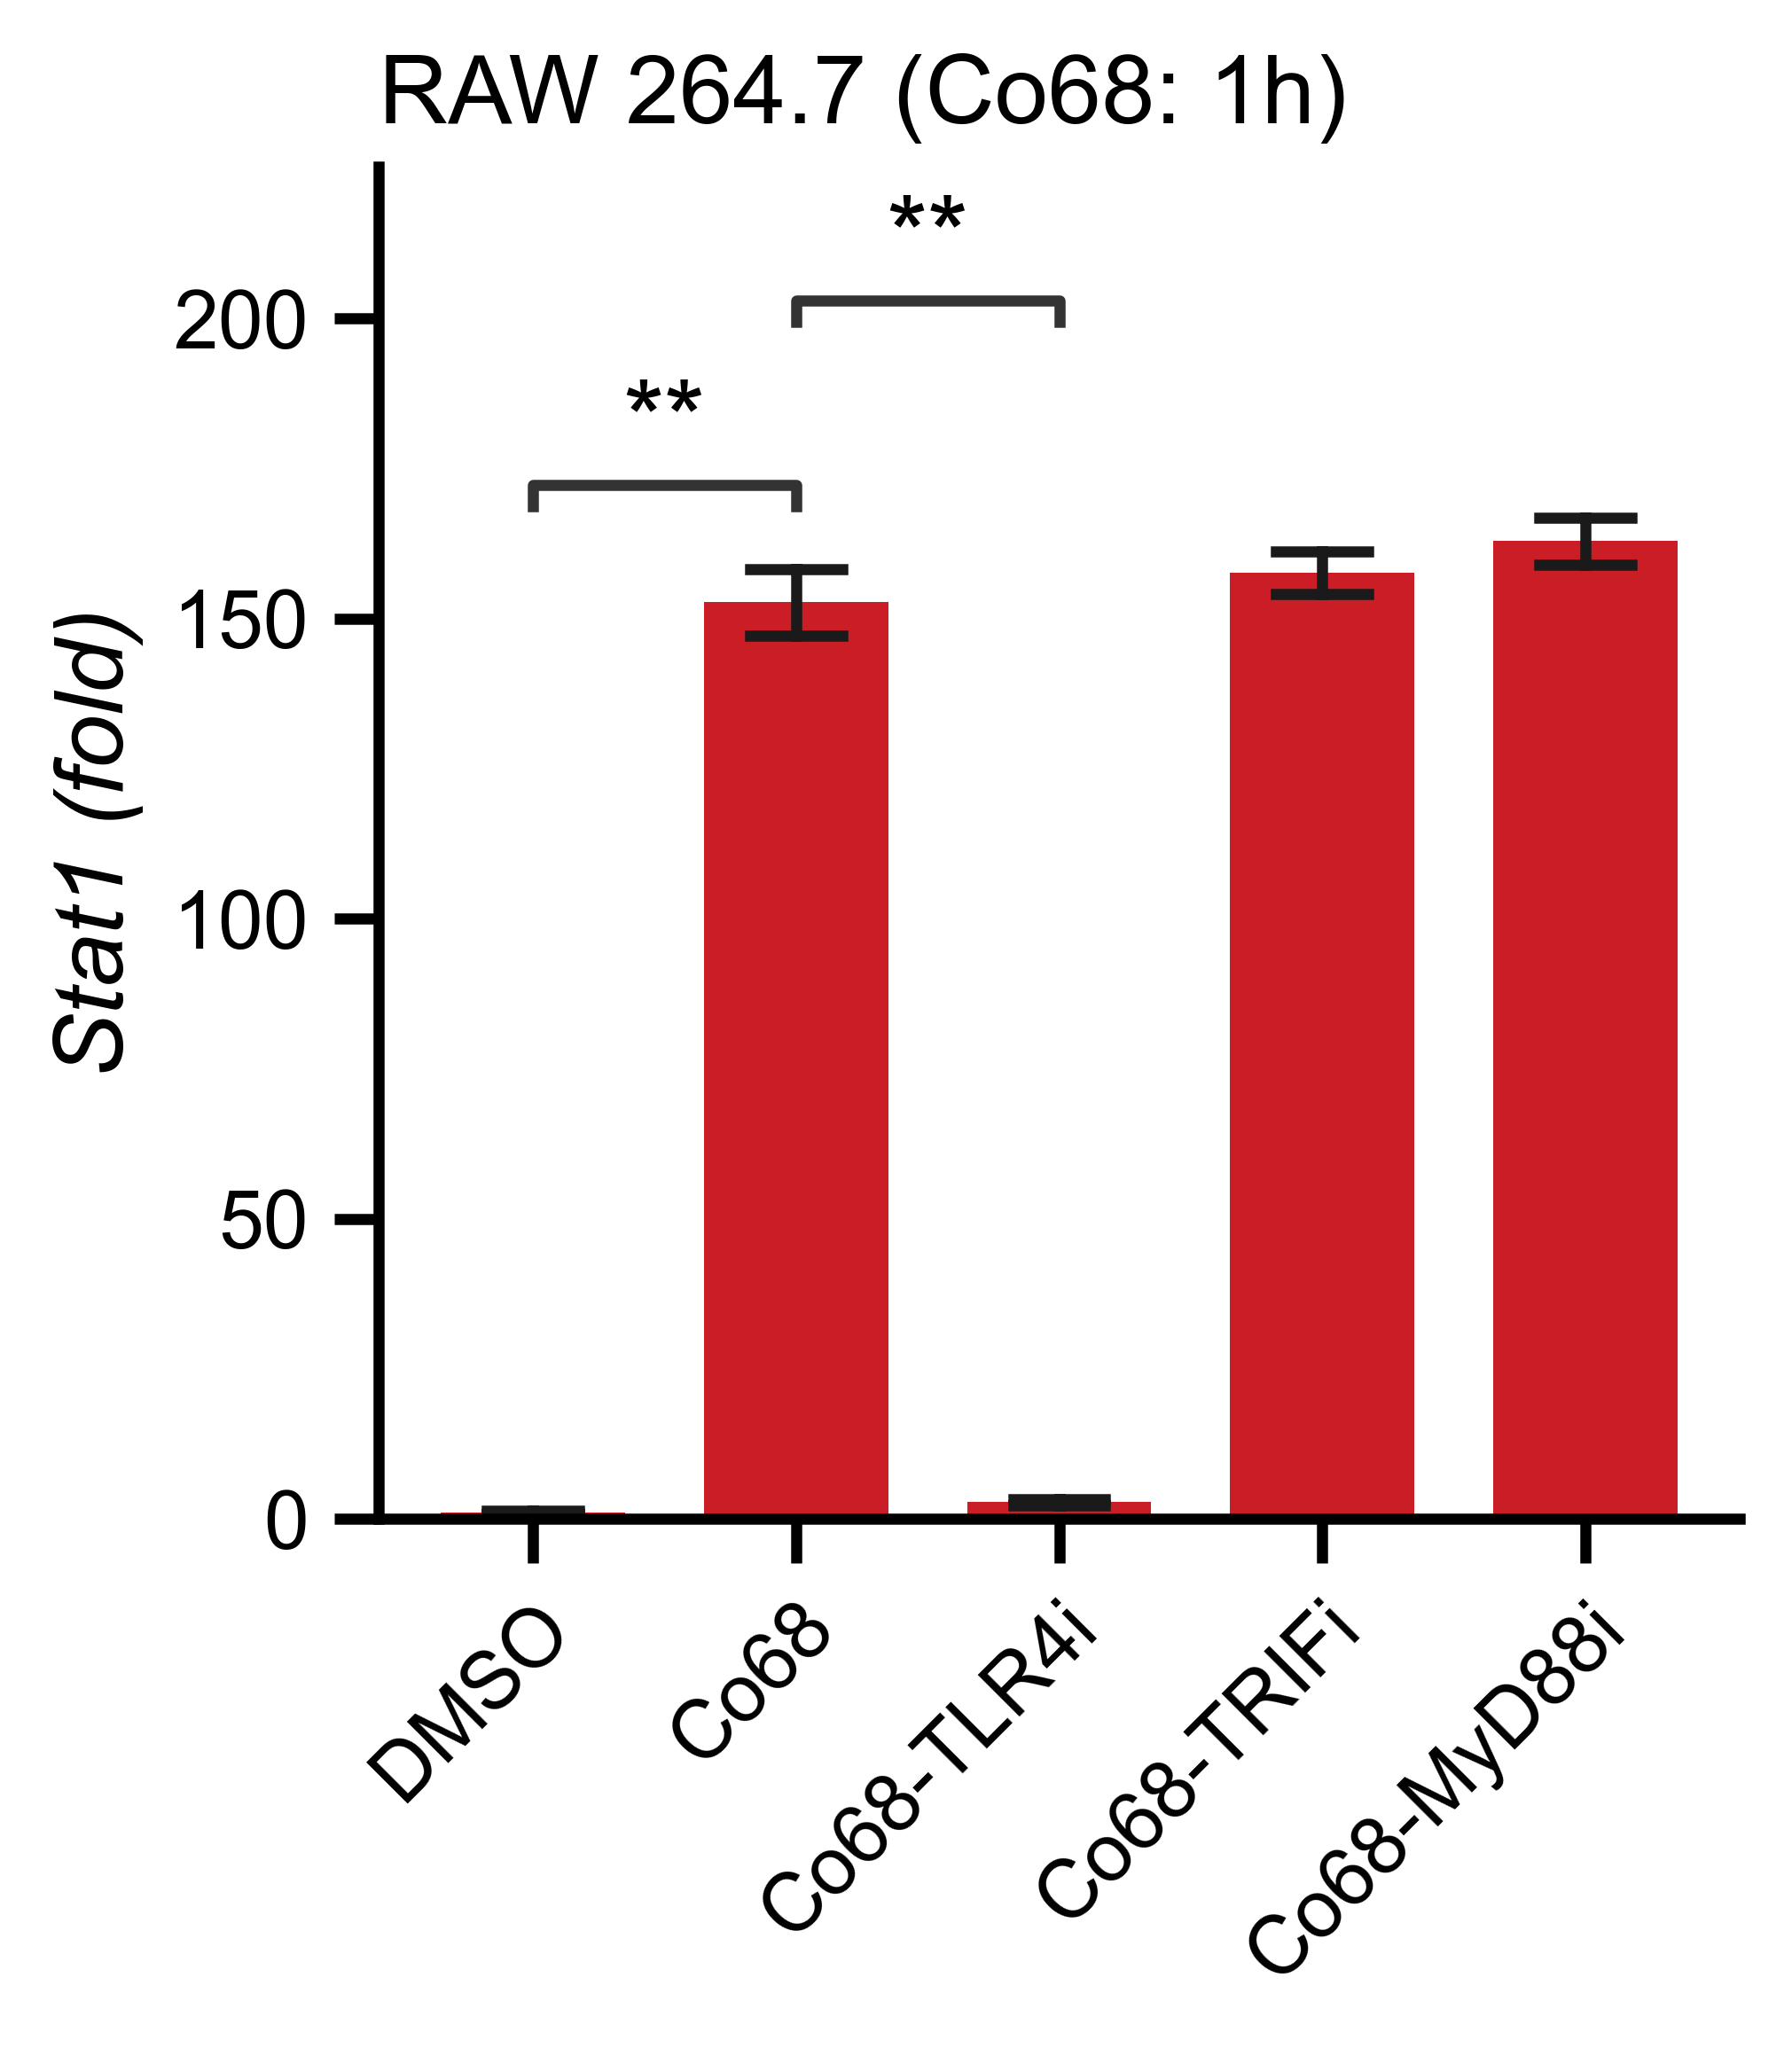

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.2):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Stat1'
    cell = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/TimesEffectCo68'

    fig = plt.figure(figsize=(3.3,3.3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, width=0.7, hue=x, legend=False, 
                    err_kws={'linewidth': 1.5, 'color': '0.1'},
        capsize=0.35, palette=[sns.color_palette('bright')[3]]*len(exp[x].drop_duplicates()),
        )
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    ax.set_title(f'{cell} (Co68: 1h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(len(exp[x].drop_duplicates())), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    #  ('Co68','Co68-TRIFi'), ('Co68', 'Co68-MyD88i')

    pairs=[('DMSO','Co68'), ('Co68','Co68-TLR4i')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_Time_STAT1_TLR4i_Trifi.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_Time_STAT1_TLR4i_Trifi.csv', index=None)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Day0 vs. Day1: t-test independent samples, P_val:4.333e-03 t=1.514e+01
Day0 vs. Day2: t-test independent samples, P_val:2.243e-03 t=2.108e+01
Day0 vs. Day3: t-test independent samples, P_val:9.231e-04 t=3.289e+01


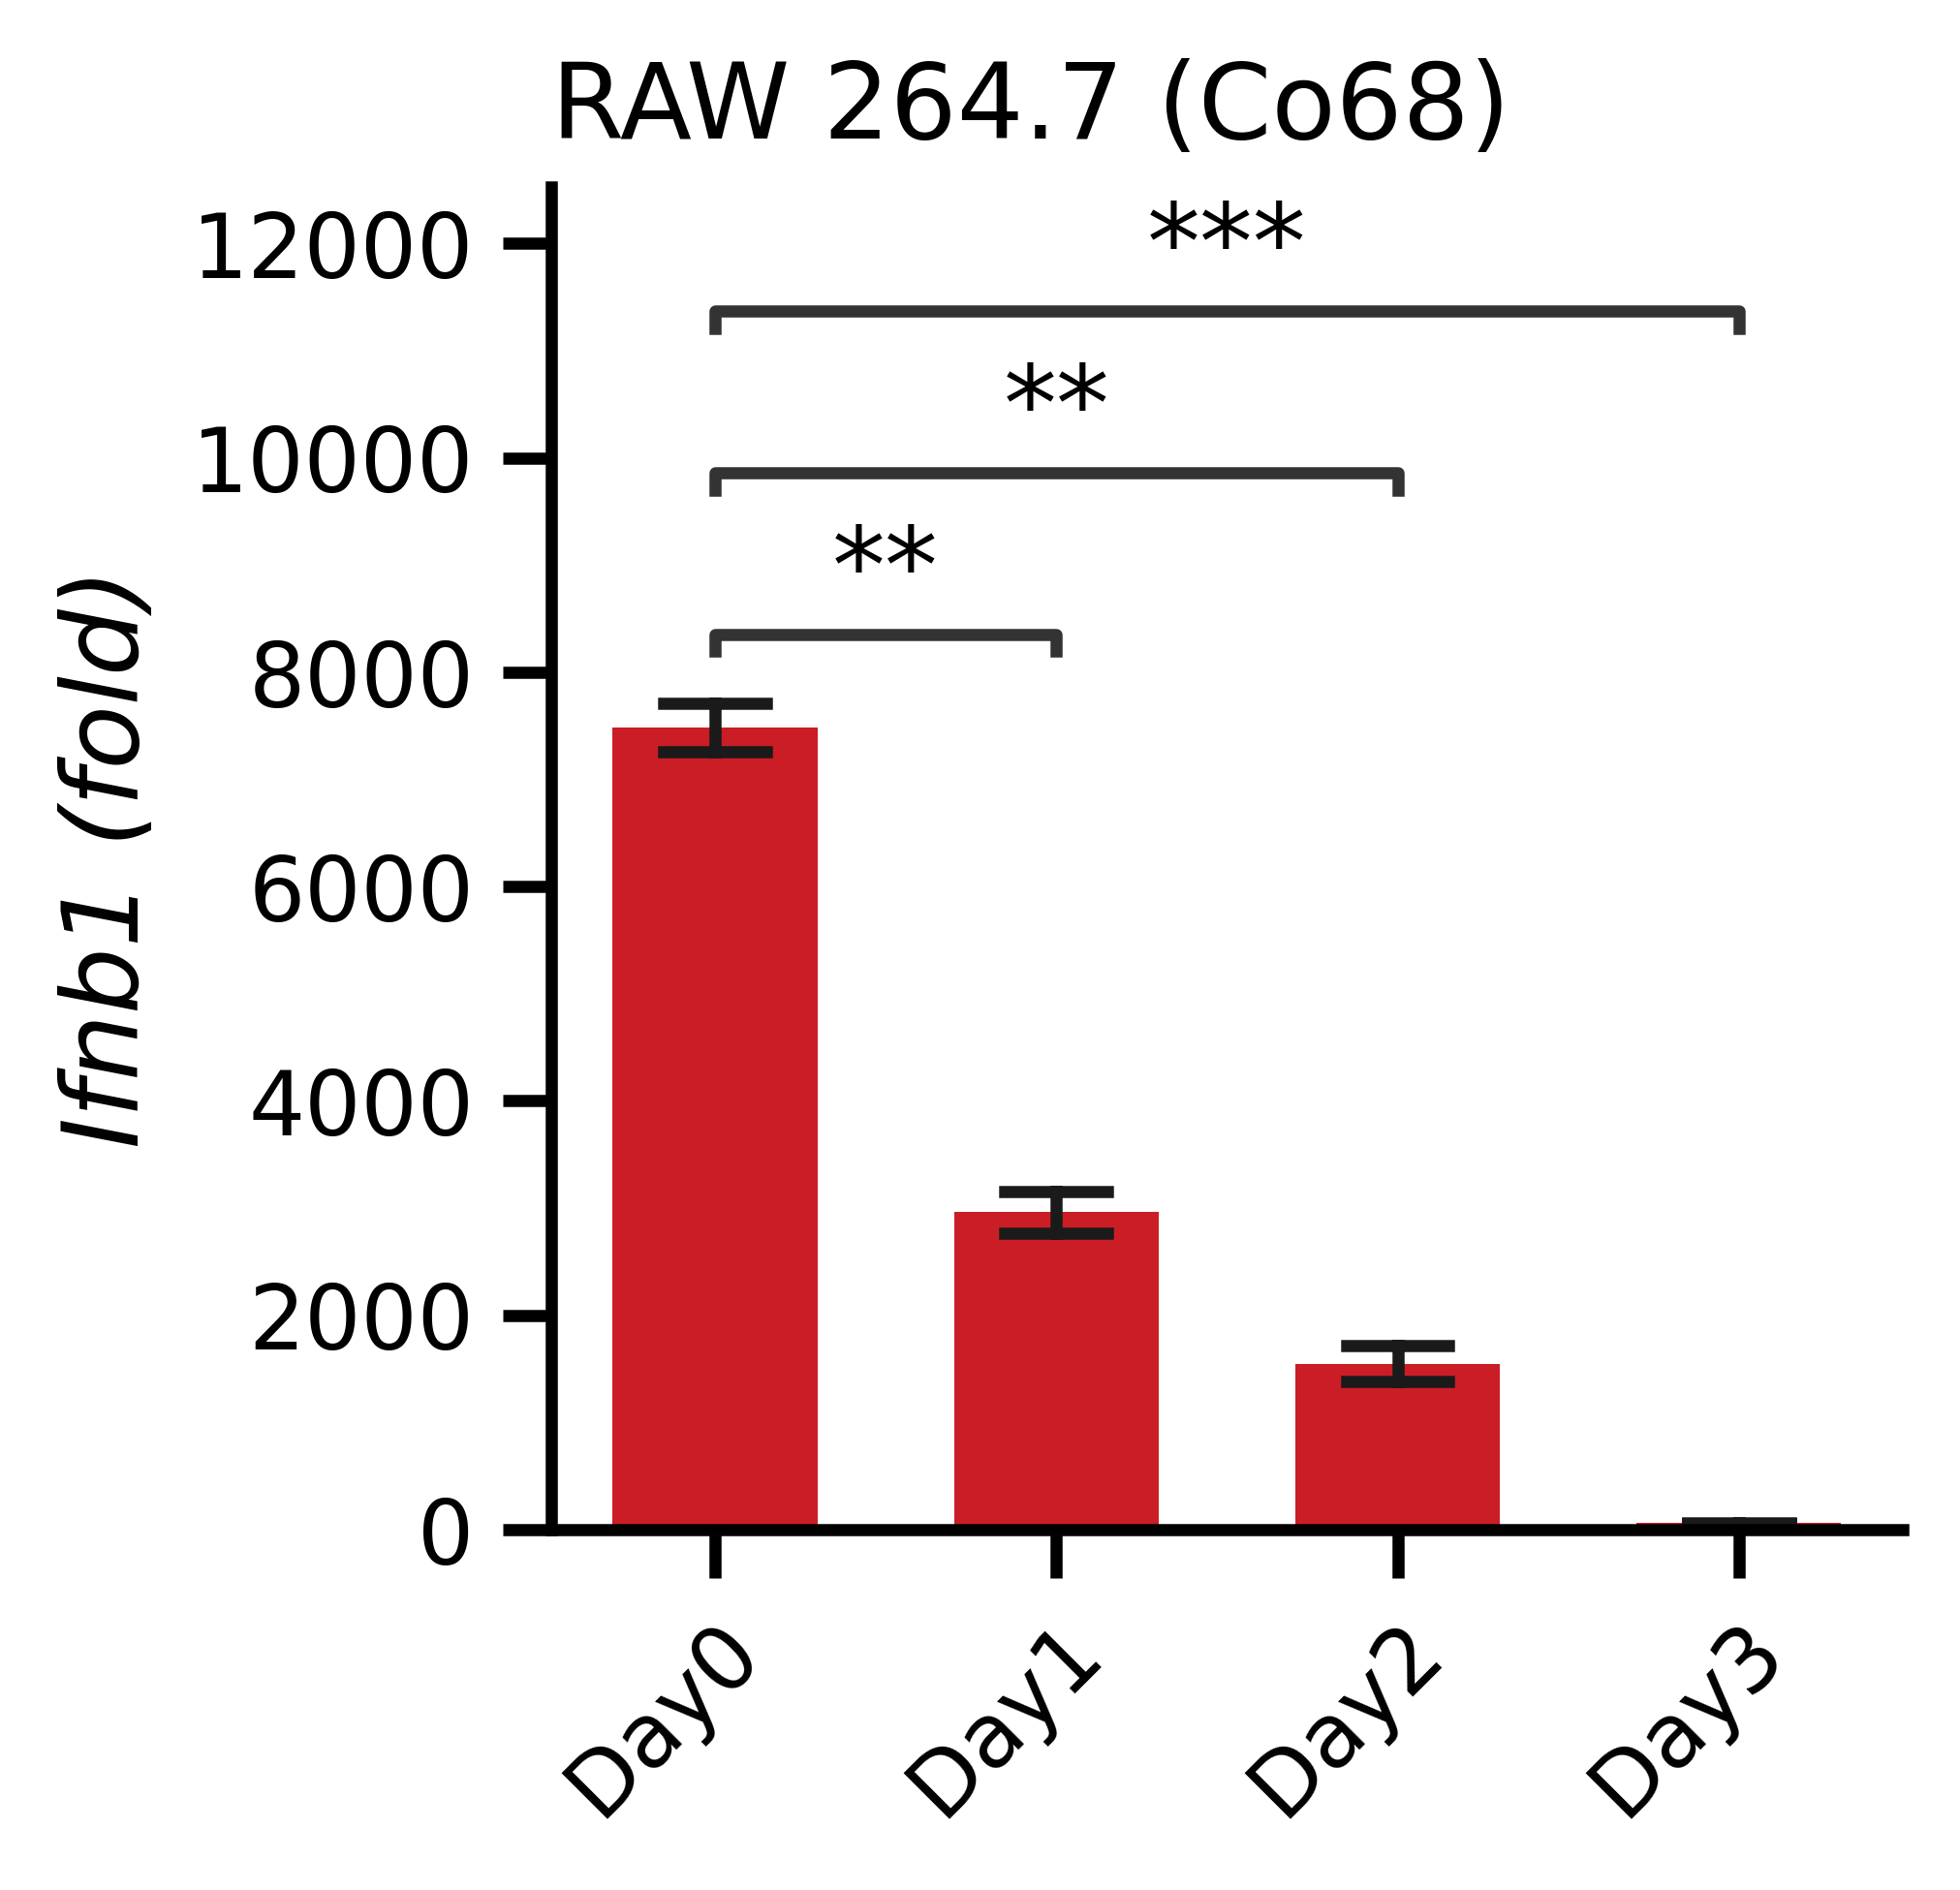

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Ifnb1'
    cell = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'
    outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/TimesEffectCo68'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, width=0.6, hue=x, legend=False, 
                    err_kws={'linewidth': 1.5, 'color': '0.1'},
        capsize=0.3, palette=[sns.color_palette('bright')[3]]*len(exp[x].drop_duplicates()),
        )
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    ax.set_title(f'{cell} (Co68)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(len(exp[x].drop_duplicates())), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[('Day0','Day1'), ('Day0','Day2'), ('Day0','Day3')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_Time_24h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_Time_24h.csv', index=None)

In [ ]:
import os  
import re  

# 指定目标目录  
directory = '/Users/fenn/Documents/scriptPyRS/博士学位论文/data/antiviral/Figures/'  
# 获取指定目录下的所有文件  
all_files = os.listdir(directory)  
# 定义正则表达式以匹配CSV文件  
csv_pattern = re.compile(r'.*\.csv$', re.IGNORECASE)  

# 使用列表推导式筛选出所有CSV文件  
csv_files = [file for file in all_files if csv_pattern.match(file)]  
csv_files

['Co68_PBMC_Il1b_Co68_24h.csv',
 'Co68_PBMC_Il6_Co68_24h.csv',
 'Co68_PBMC_Tnf_Co68_24h.csv',
 'Co68_Blood-VSV (day 2)_Il1b_Co68_24h.csv',
 'Co68_Gene expression of PBMC_Il6_Co68_24h.csv',
 'Co68_Blood-VSV (day 2)_Il6_Co68_24h.csv',
 'Co68_Blood-VSV (day 2)_Tnf_Co68_24h.csv']

In [253]:
exp.loc[[7],'fc'] = [15]
exp

样本名称   检测项目     CT   ACTB   diff           pow          fc samples
0         mock  mIl1a  34.04  13.20 -20.84  5.327640e-07    1.323568    DMSO
1         mock  mIl1a  34.56  13.26 -21.30  3.873121e-07    0.962216    DMSO
2         mock  mIl1a  35.04  13.31 -21.73  2.874870e-07    0.714216    DMSO
3     CoCl2 40  mIl1a  33.91  14.46 -19.45  1.396261e-06    3.468790   50 μM
4     CoCl2 40  mIl1a  35.51  14.51 -21.00  4.768372e-07    1.184627   50 μM
5     CoCl2 40  mIl1a  35.61  14.54 -21.07  4.542532e-07    1.128520   50 μM
6    CoCl2 100  mIl1a  32.69  15.56 -17.13  6.971981e-06   17.320785  100 μM
7    CoCl2 100  mIl1a  33.25  15.68 -17.57  5.139288e-06   15.000000  100 μM
8    CoCl2 100  mIl1a  33.28  15.72 -17.56  5.175035e-06   12.856557  100 μM
9   CoCl2 400  mIl1a  30.68  16.34 -14.34  4.822029e-05  119.795711  500 μM
10  CoCl2 400  mIl1a  30.78  16.50 -14.28  5.026801e-05  124.882927  500 μM
11  CoCl2 400  mIl1a  30.84  16.56 -14.28  5.026801e-05  124.882927  500 μM

In [244]:
exp.loc[[6,7,8,9,10,11],'fc'] = [97, 104, 99, 46, 43,39]
exp

样本名称    检测项目     CT   ACTB   diff           pow          fc samples
0         mock  mIFNB1  33.05  13.20 -19.85  1.058168e-06    1.459396    DMSO
1         mock  mIFNB1  33.94  13.26 -20.68  5.952504e-07    0.820953    DMSO
2         mock  mIFNB1  34.18  13.31 -20.87  5.217999e-07    0.719652    DMSO
3     CoCl2 40  mIFNB1  32.62  14.46 -18.16  3.414250e-06    4.708838   50 μM
4     CoCl2 40  mIFNB1  34.22  14.51 -19.71  1.166001e-06    1.608115   50 μM
5     CoCl2 40  mIFNB1  35.28  14.54 -20.74  5.710023e-07    0.787510   50 μM
6    CoCl2 100  mIFNB1  25.01  15.56  -9.45  1.429771e-03   97.000000  100 μM
7    CoCl2 100  mIFNB1  25.08  15.68  -9.40  1.480192e-03  104.000000  100 μM
8    CoCl2 100  mIFNB1  25.15  15.72  -9.43  1.449730e-03   99.000000  100 μM
9   CoCl2 400  mIFNB1  27.90  16.34 -11.56  3.312022e-04   46.000000  500 μM
10  CoCl2 400  mIFNB1  28.13  16.50 -11.63  3.155158e-04   43.000000  500 μM
11  CoCl2 400  mIFNB1  28.56  16.56 -12.00  2.441406e-04   39.000000  500 μM

In [280]:
os.listdir('/Users/fenn/Documents/Fe68/qPCR/PTX')

['Co68_RAW 264.7_Il6_CoCl2_24h.pdf', 'Co68_RAW 264.7_Il6_CoCl2_24h.csv']

In [281]:
os.chdir('/Users/fenn/Documents/Fe68/qPCR/PTX')

In [286]:
exp = pd.read_csv('Co68_RAW 264.7_Il6_PTX_24h.csv')
exp

样本名称  检测项目     CT   ACTB   diff           pow           fc samples
0     mock  mIl6  33.20  13.20 -20.00  9.540000e-07     1.380537    DMSO
1     mock  mIl6  33.51  13.26 -20.25  8.020000e-07     1.160888    DMSO
2     mock  mIl6  34.90  13.31 -21.59  3.170000e-07     0.458575    DMSO
3   pac 20  mIl6  29.65  14.76 -14.89  3.290000e-05    47.677255   20 μM
4   pac 20  mIl6  29.68  14.78 -14.90  3.270000e-05    41.347924   20 μM
5   pac 20  mIl6  29.71  14.98 -14.73  3.680000e-05    53.269184   20 μM
6  pac 100  mIl6  23.38  14.36  -9.02  1.926236e-03  2788.414400  100 μM
7  pac 100  mIl6  23.51  14.59  -8.92  2.064488e-03  2988.548556  100 μM
8  pac 100  mIl6  23.53  14.98  -8.55  2.668047e-03  2862.259186  100 μM

In [314]:
exp

样本名称  检测项目     CT   ACTB   diff           pow           fc samples
0     mock  mIl6  33.20  13.20 -20.00  9.540000e-07     1.380537    DMSO
1     mock  mIl6  33.51  13.26 -20.25  8.020000e-07     1.160888    DMSO
2     mock  mIl6  34.90  13.31 -21.59  3.170000e-07     0.458575    DMSO
3   pac 20  mIl6  29.65  14.76 -14.89  3.290000e-05    47.677255   20 μM
4   pac 20  mIl6  29.68  14.78 -14.90  3.270000e-05    41.347924   20 μM
5   pac 20  mIl6  29.71  14.98 -14.73  3.680000e-05    53.269184   20 μM
6  pac 100  mIl6  23.38  14.36  -9.02  1.926236e-03  2788.414400  100 μM
7  pac 100  mIl6  23.51  14.59  -8.92  2.064488e-03  2988.548556  100 μM
8  pac 100  mIl6  23.53  14.98  -8.55  2.668047e-03  2862.259186  100 μM

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. 20 μM: t-test independent samples, P_val:1.773e-04 t=-1.344e+01
DMSO vs. 100 μM: t-test independent samples, P_val:1.016e-06 t=-4.927e+01


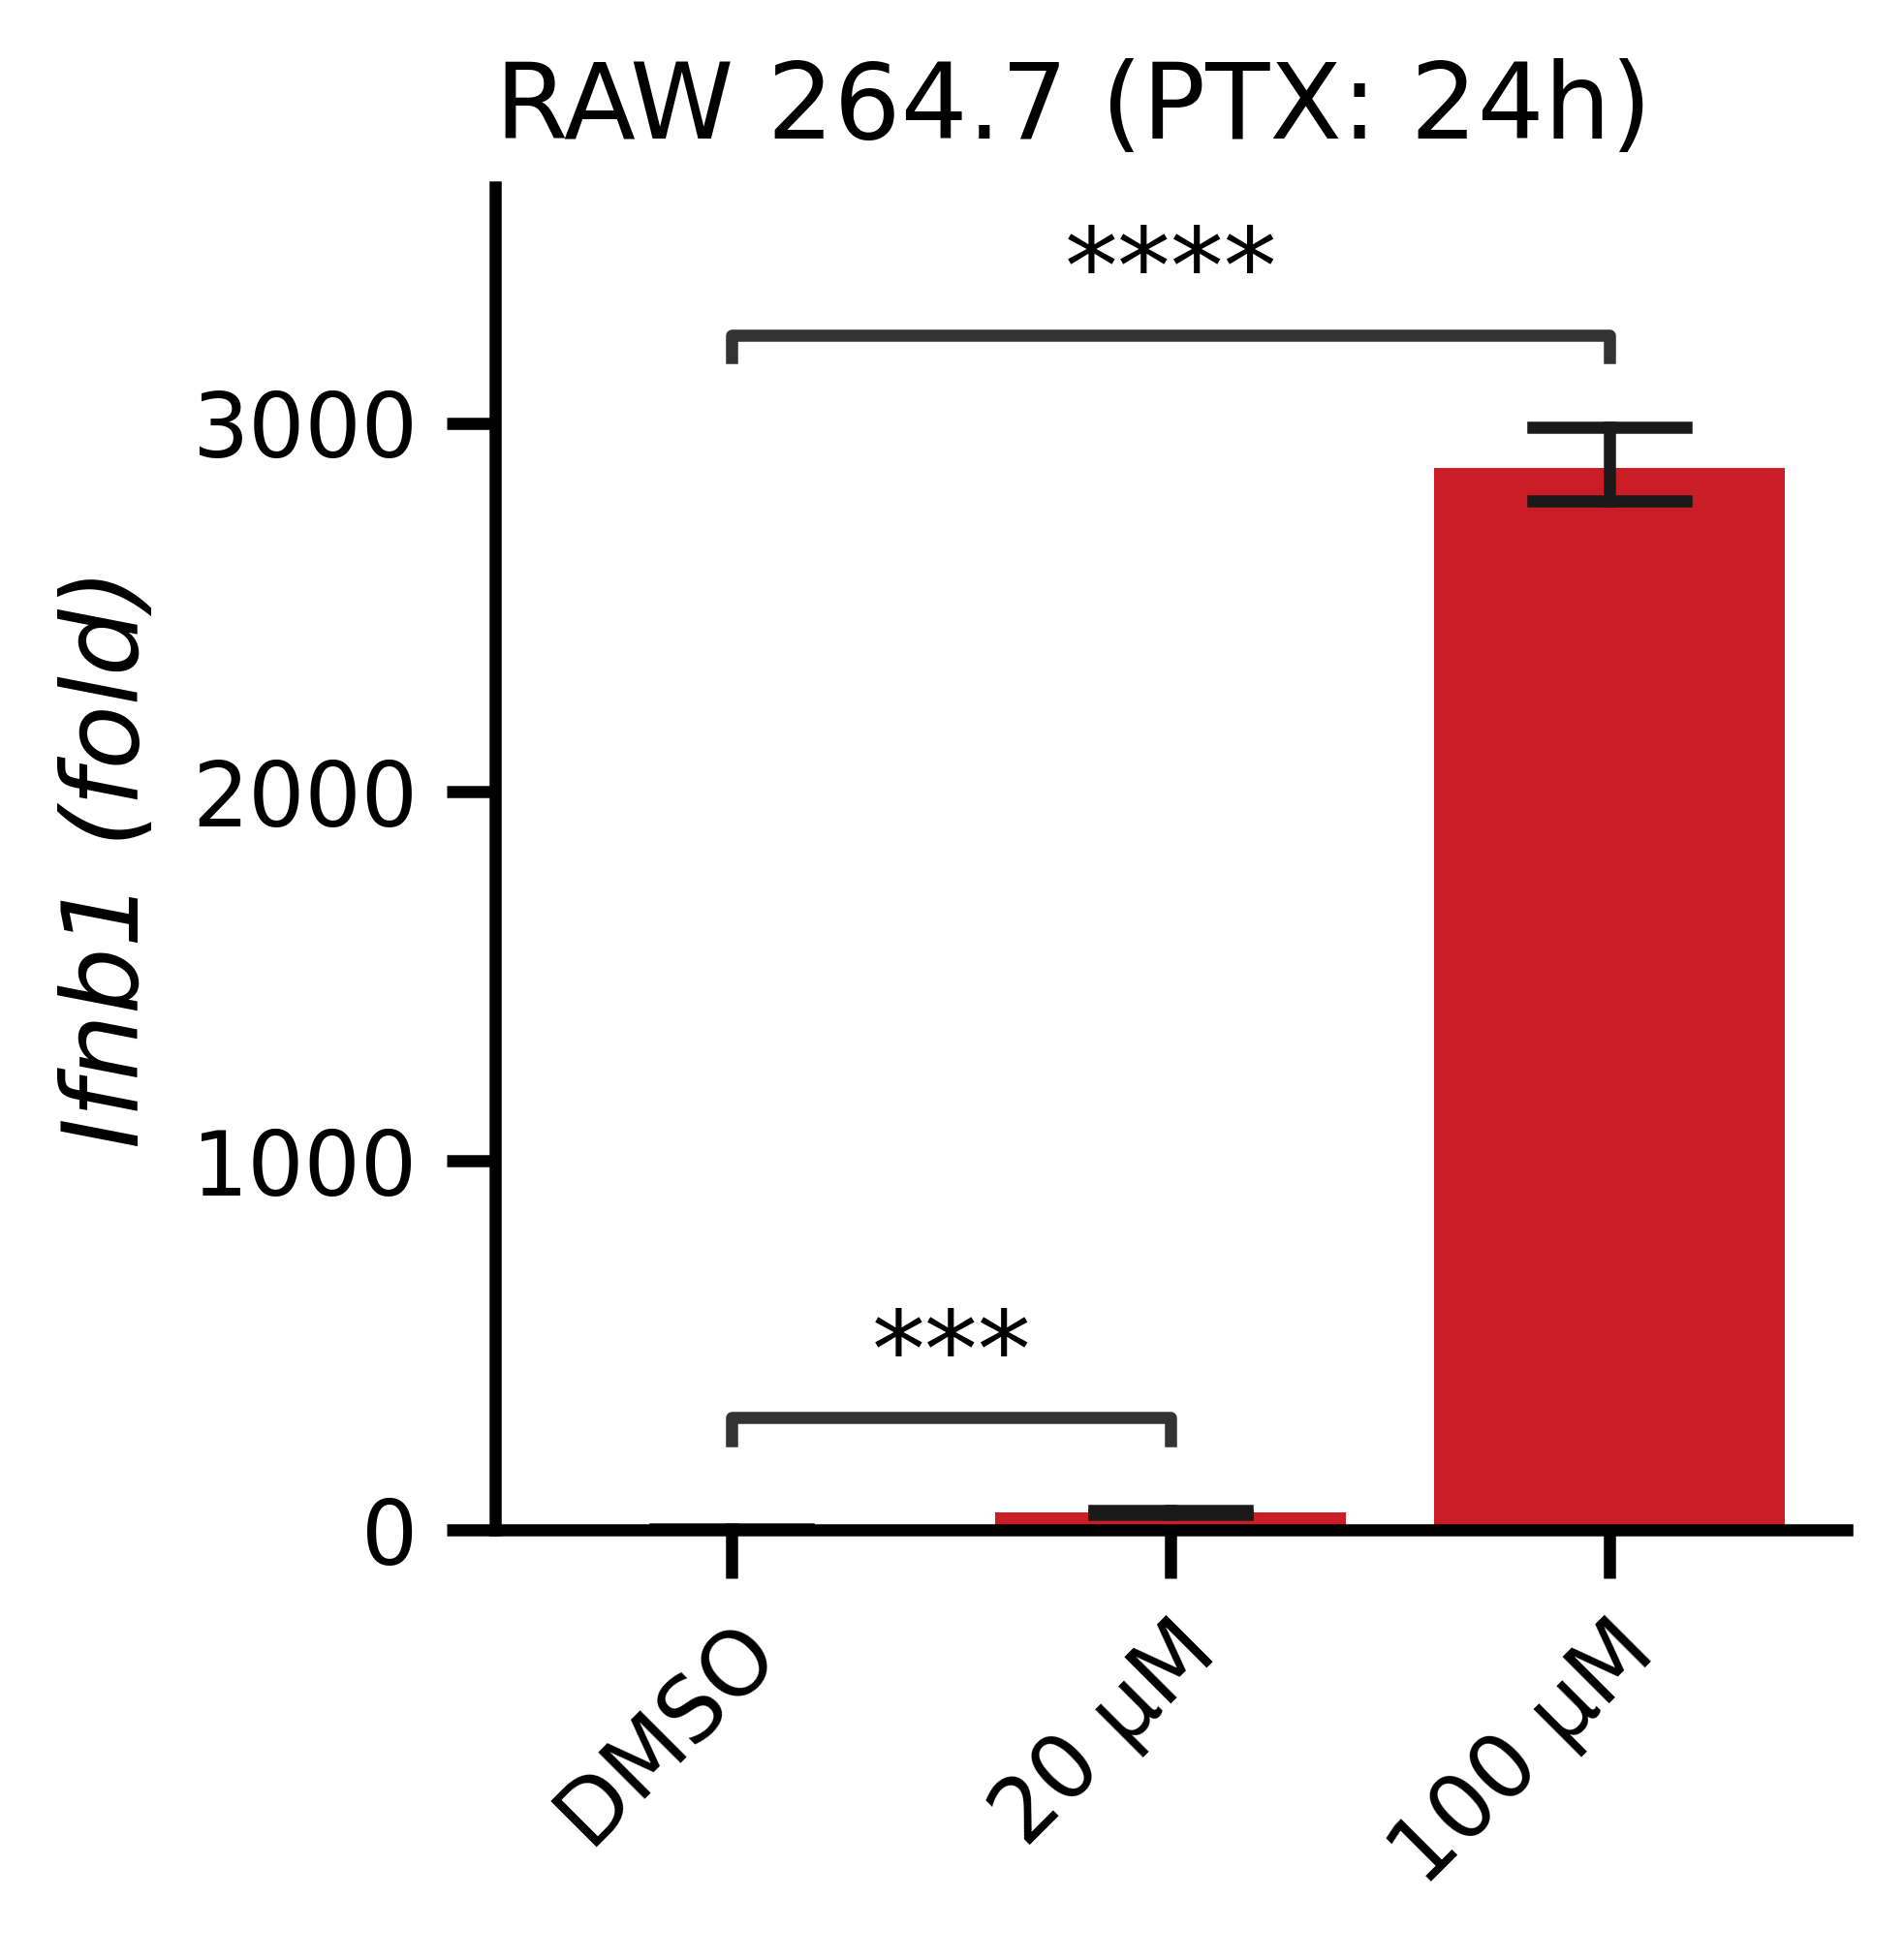

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Ifnb1'
    cell = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/Fe68/qPCR/CoCl'
    outDir = '/Users/fenn/Documents/Fe68/qPCR/PTX'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/3)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]

    pairs=[('DMSO','100 μM'), ('DMSO','20 μM')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_PTX_24h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_PTX_24h.csv', index=None)

In [31]:
# 打印目标函数的代码
from scriptGXF import power2
import inspect
print(inspect.getsource(power2))

def power2(x):
    return pow(2,x)



In [91]:
import re
def power2(x):
    return pow(2,x)

def geneFCCal(data,gene,base):
    data = data.loc[:,["样本名称","检测项目","CT"]].sort_values(by=["检测项目","样本名称", 'CT'], ascending=[True,True,True]).reset_index(drop=True)
    IFNB = data[data['检测项目'].str.contains(f'GAP|AC|{gene}', flags=re.IGNORECASE)]
    ifnb = IFNB.fillna(36).reset_index(drop=True)
    ifnb["diff"] = -ifnb["CT"].diff(periods=len(IFNB['CT'])/2)
    ifnb['pow'] = ifnb['diff'].apply(power2)
    exp = ifnb.dropna().reset_index(drop=True)
    #add the value of ACTB
    exp.insert(3,'ACTB', ifnb.loc[list(range(int(len(IFNB['CT'])/2))), 'CT'])
    fc1 = exp[exp['样本名称'].str.contains(f'{base}', flags=re.IGNORECASE)]['pow'].mean()
    # fc1 = exp[exp['样本名称'] == 'dmso']['pow'].mean()
    exp['fc'] = exp['pow'].div(fc1)
    return exp

In [95]:
# data_IFNB.to_csv('Ab-TLR4_EGR1.csv', index=None)

In [193]:
gene ='hISGs'

In [194]:
# 需要修改注释的顺序，如何目的基因的字母小于内参
data_IFNB = data[(data['检测项目']=='hGAPDH') | (data['检测项目']==gene)].sort_values(by=['检测项目']).reset_index(drop=True)
data_IFNB

孔位  样本ID           样本名称    检测项目  属性    染料     CT  CT值平均值  CT标准方差
0   A02     2  ht29_IgG_co68  hGAPDH  未知  SYBR  18.40   18.44    0.05
1   B02     2  ht29_IgG_co68  hGAPDH  未知  SYBR  18.48   18.44    0.05
2   A01     1  ht29_IgG_dmso  hGAPDH  未知  SYBR  16.51   16.46    0.08
3   B01     1  ht29_IgG_dmso  hGAPDH  未知  SYBR  16.40   16.46    0.08
4   A08     8  ht29_MD2_co68  hGAPDH  未知  SYBR  18.81   18.80    0.02
5   B08     8  ht29_MD2_co68  hGAPDH  未知  SYBR  18.78   18.80    0.02
6   A07     7  ht29_MD2_dmso  hGAPDH  未知  SYBR  17.40   17.46    0.08
7   B07     7  ht29_MD2_dmso  hGAPDH  未知  SYBR  17.52   17.46    0.08
8   G02     2  ht29_IgG_co68   hISGs  未知  SYBR  18.87   18.81    0.09
9   H02     2  ht29_IgG_co68   hISGs  未知  SYBR  18.75   18.81    0.09
10  G01     1  ht29_IgG_dmso   hISGs  未知  SYBR  20.92   20.91    0.02
11  H01     1  ht29_IgG_dmso   hISGs  未知  SYBR  20.89   20.91    0.02
12  G08     8  ht29_MD2_co68   hISGs  未知  SYBR  21.43   20.31    0.04
13  H08     8  ht29_MD2_co68   hISGs  未知  SYBR  21.22   20.31    0.04
14  G07     7  ht29_MD2_dmso   hISGs  未知  SYBR  21.15   21.13    0.03
15  H07     7  ht29_MD2_dmso   hISGs  未知  SYBR  21.11   21.13    0.03

In [195]:
data_IFNB

孔位  样本ID           样本名称    检测项目  属性    染料     CT  CT值平均值  CT标准方差
0   A02     2  ht29_IgG_co68  hGAPDH  未知  SYBR  18.40   18.44    0.05
1   B02     2  ht29_IgG_co68  hGAPDH  未知  SYBR  18.48   18.44    0.05
2   A01     1  ht29_IgG_dmso  hGAPDH  未知  SYBR  16.51   16.46    0.08
3   B01     1  ht29_IgG_dmso  hGAPDH  未知  SYBR  16.40   16.46    0.08
4   A08     8  ht29_MD2_co68  hGAPDH  未知  SYBR  18.81   18.80    0.02
5   B08     8  ht29_MD2_co68  hGAPDH  未知  SYBR  18.78   18.80    0.02
6   A07     7  ht29_MD2_dmso  hGAPDH  未知  SYBR  17.40   17.46    0.08
7   B07     7  ht29_MD2_dmso  hGAPDH  未知  SYBR  17.52   17.46    0.08
8   G02     2  ht29_IgG_co68   hISGs  未知  SYBR  18.87   18.81    0.09
9   H02     2  ht29_IgG_co68   hISGs  未知  SYBR  18.75   18.81    0.09
10  G01     1  ht29_IgG_dmso   hISGs  未知  SYBR  20.92   20.91    0.02
11  H01     1  ht29_IgG_dmso   hISGs  未知  SYBR  20.89   20.91    0.02
12  G08     8  ht29_MD2_co68   hISGs  未知  SYBR  21.43   20.31    0.04
13  H08     8  ht29_MD2_co68   hISGs  未知  SYBR  21.22   20.31    0.04
14  G07     7  ht29_MD2_dmso   hISGs  未知  SYBR  21.15   21.13    0.03
15  H07     7  ht29_MD2_dmso   hISGs  未知  SYBR  21.11   21.13    0.03

In [196]:
# from scriptGXF import geneFCCal
fc_Atf3 = geneFCCal(data_IFNB, gene, 'ht29_IgG_dmso')
# fc_Atf3 = fc_Atf3.iloc[[4,5,6,7,2,3,0,1],:].reset_index(drop=True)
# fc_Atf3['samples'] = ['DMSO', 'DMSO', 'LPS', 'LPS', 'LPS-Co68', 'LPS-Co68', 'Co68', 'Co68']
fc_Atf3

样本名称   检测项目     CT   ACTB  diff       pow         fc
0  ht29_IgG_co68  hISGs  18.75  18.40 -0.35  0.784584  17.141786
1  ht29_IgG_co68  hISGs  18.87  18.48 -0.39  0.763130  16.673043
2  ht29_IgG_dmso  hISGs  20.89  16.40 -4.49  0.044502   0.972281
3  ht29_IgG_dmso  hISGs  20.92  16.51 -4.41  0.047039   1.027719
4  ht29_MD2_co68  hISGs  21.22  18.78 -2.44  0.184284   4.026275
5  ht29_MD2_co68  hISGs  21.43  18.81 -2.62  0.162668   3.554005
6  ht29_MD2_dmso  hISGs  21.11  17.40 -3.71  0.076415   1.669534
7  ht29_MD2_dmso  hISGs  21.15  17.52 -3.63  0.080772   1.764728

In [197]:
fc_Atf3['样本名称'] = fc_Atf3['样本名称'].str.removeprefix('ht29_')
exp = fc_Atf3
exp['trt'] = exp['样本名称'].str.split('_',expand=True)[1]
exp['trt'] = exp['trt'].str.replace('co68','Co68')
exp['trt'] = exp['trt'].str.replace('dmso','DMSO')
exp['group'] = exp['样本名称'].str.split('_',expand=True)[0]
exp['group'] = exp['group'].str.replace('MD2','Ab-MD2')
exp = exp.iloc[[2,3,0,1,6,7,4,5],].reset_index(drop=True)
# exp = exp.iloc[[6,7,4,5,2,3,0,1,],].reset_index(drop=True)
exp

样本名称   检测项目     CT   ACTB  diff       pow         fc   trt   group
0  IgG_dmso  hISGs  20.89  16.40 -4.49  0.044502   0.972281  DMSO     IgG
1  IgG_dmso  hISGs  20.92  16.51 -4.41  0.047039   1.027719  DMSO     IgG
2  IgG_co68  hISGs  18.75  18.40 -0.35  0.784584  17.141786  Co68     IgG
3  IgG_co68  hISGs  18.87  18.48 -0.39  0.763130  16.673043  Co68     IgG
4  MD2_dmso  hISGs  21.11  17.40 -3.71  0.076415   1.669534  DMSO  Ab-MD2
5  MD2_dmso  hISGs  21.15  17.52 -3.63  0.080772   1.764728  DMSO  Ab-MD2
6  MD2_co68  hISGs  21.22  18.78 -2.44  0.184284   4.026275  Co68  Ab-MD2
7  MD2_co68  hISGs  21.43  18.81 -2.62  0.162668   3.554005  Co68  Ab-MD2

In [139]:
%%bash
head MD2-Ab_block-Egr1.csv

孔位,样本ID,样本名称,检测项目,属性,染料,CT,CT值平均值,CT标准方差
E02,2,ht29_IgG_co68,hEGR1,未知,SYBR,19.33,19.3,0.05
F02,2,ht29_IgG_co68,hEGR1,未知,SYBR,19.27,19.3,0.05
E01,1,ht29_IgG_dmso,hEGR1,未知,SYBR,23.78,23.79,0.02
F01,1,ht29_IgG_dmso,hEGR1,未知,SYBR,23.81,23.79,0.02
E08,8,ht29_MD2_co68,hEGR1,未知,SYBR,18.93,18.97,0.06
F08,8,ht29_MD2_co68,hEGR1,未知,SYBR,19.01,18.97,0.06
E07,7,ht29_MD2_dmso,hEGR1,未知,SYBR,24.29,24.25,0.05
F07,7,ht29_MD2_dmso,hEGR1,未知,SYBR,24.21,24.25,0.05
A02,2,ht29_IgG_co68,hGAPDH,未知,SYBR,18.4,18.44,0.05


In [136]:
# data_IFNB.to_csv('MD2-Ab_block-Egr1.csv', index=None)

In [46]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/antibody_block')
os.listdir()

['TLR4_block.csv']

In [198]:
exp.to_csv('MD2-Ab_block-ISG15.csv', index=None)
exp

样本名称   检测项目     CT   ACTB  diff       pow         fc   trt   group
0  IgG_dmso  hISGs  20.89  16.40 -4.49  0.044502   0.972281  DMSO     IgG
1  IgG_dmso  hISGs  20.92  16.51 -4.41  0.047039   1.027719  DMSO     IgG
2  IgG_co68  hISGs  18.75  18.40 -0.35  0.784584  17.141786  Co68     IgG
3  IgG_co68  hISGs  18.87  18.48 -0.39  0.763130  16.673043  Co68     IgG
4  MD2_dmso  hISGs  21.11  17.40 -3.71  0.076415   1.669534  DMSO  Ab-MD2
5  MD2_dmso  hISGs  21.15  17.52 -3.63  0.080772   1.764728  DMSO  Ab-MD2
6  MD2_co68  hISGs  21.22  18.78 -2.44  0.184284   4.026275  Co68  Ab-MD2
7  MD2_co68  hISGs  21.43  18.81 -2.62  0.162668   3.554005  Co68  Ab-MD2

In [162]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ab-MD2_DMSO vs. Ab-MD2_Co68: t-test independent samples, P_val:1.324e-02 t=-8.606e+00
IgG_DMSO vs. IgG_Co68: t-test independent samples, P_val:2.200e-04 t=-6.740e+01
IgG_Co68 vs. Ab-MD2_Co68: t-test independent samples, P_val:6.427e-04 t=3.943e+01


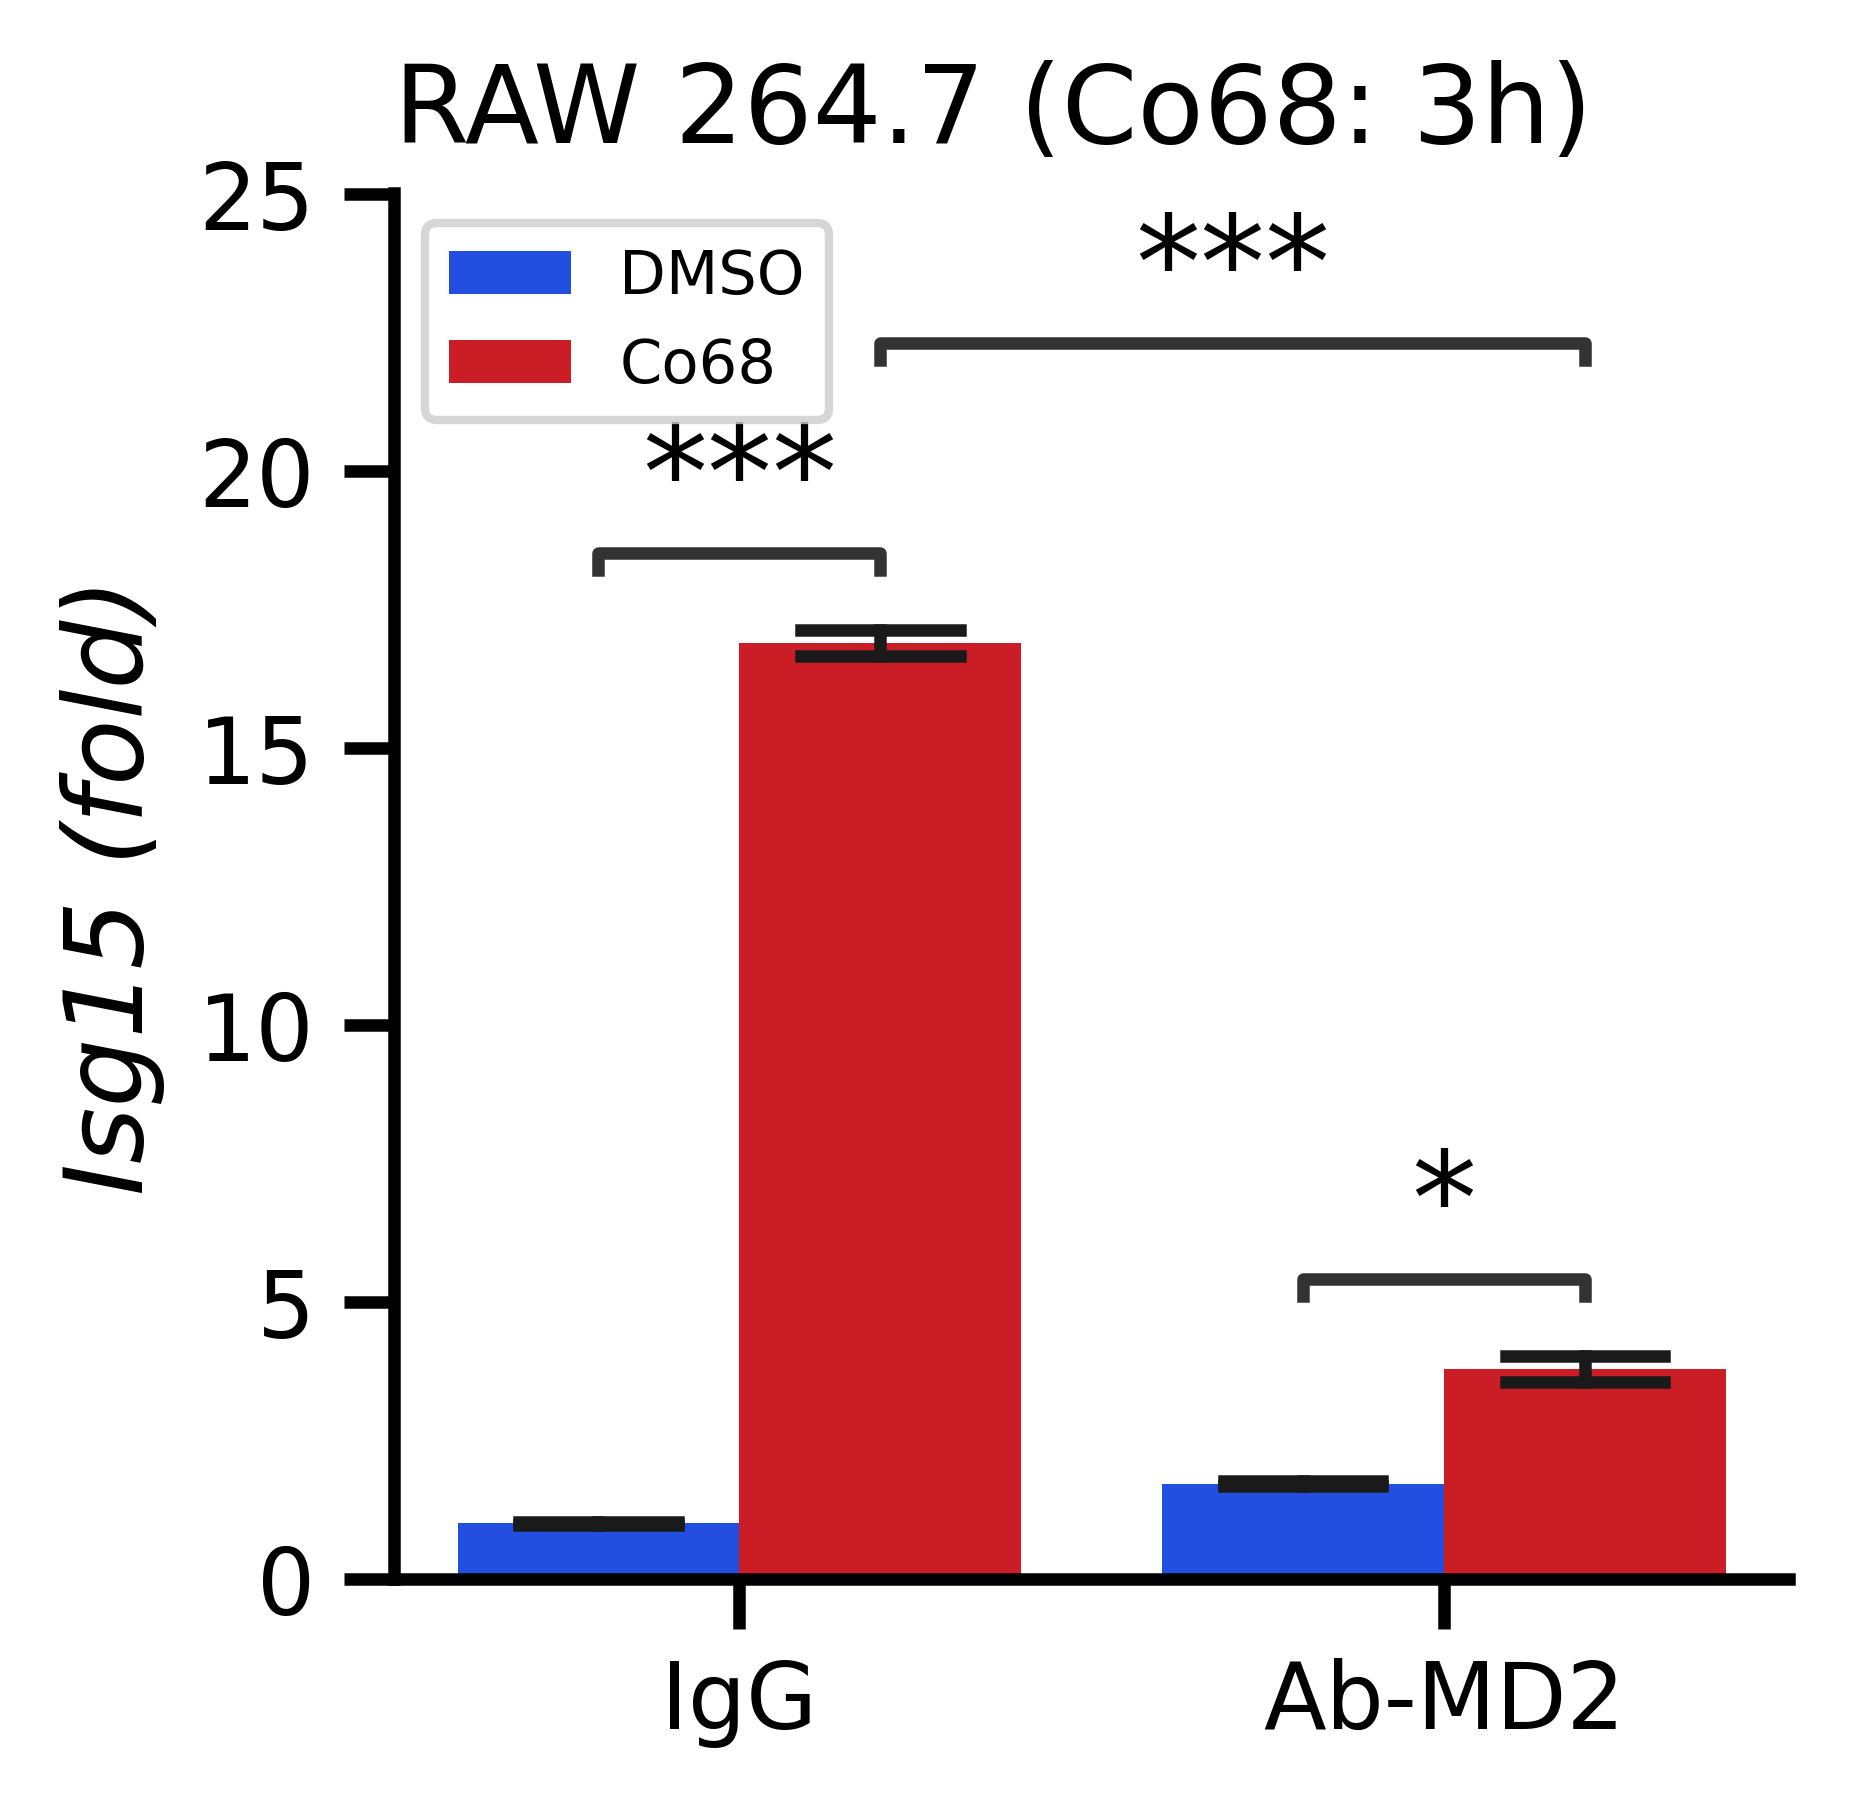

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Isg15'
    cell = 'RAW 264.7'

    trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    a = list(trt)


    fig = plt.figure(figsize=(3, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
        capsize=0.225, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    
    ax.legend(loc=0, fontsize=7.3)
    ax.set_title(f'{cell} (Co68: 3h)', fontsize=13, loc='left')
    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()))
   
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('IgG', 'DMSO'),('IgG', 'Co68')),
    (('IgG', 'Co68'),('Ab-MD2', 'Co68')),
    (('Ab-MD2', 'DMSO'),('Ab-MD2', 'Co68'))
        ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.017, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'./Co68_{gene}_Ab-MD2_block_deminish-{cell}.pdf', dpi=700, bbox_inches='tight')

In [200]:
os.getcwd()

'/Users/fenn/Documents/Co68/qPCR/antibody_block'

In [84]:
fc_Atf3.to_csv(f'RAW-Co68-LPS_{gene}.csv', index=None)

In [144]:
exp = pd.read_csv('Co_LPS_3h_Csf2.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc   samples
0    DMSO_3h  mIl1b  31.80  16.87 -14.93  0.000032    0.982673      DMSO
1    DMSO_3h  mIl1b  32.02  17.14 -14.88  0.000033    1.017327      DMSO
2     LPS_3h  mIl1b  19.78  16.67  -3.11  0.115824  357.837299       LPS
3     LPS_3h  mIl1b  19.89  16.71  -3.18  0.110338  385.995169       LPS
4  LPS-Co_3h  mIl1b  24.62  17.62  -7.00  0.007812   35.931353  LPS-Co68
5  LPS-Co_3h  mIl1b  24.64  17.65  -6.99  0.007867   41.713260  LPS-Co68
6      Co_3h  mIl1b  33.22  19.11 -14.11  0.000057    0.734817      Co68
7      Co_3h  mIl1b  33.49  19.17 -14.32  0.000049    2.299814      Co68

In [ ]:
exp = fc_Atf3
exp

样本名称       检测项目     CT   ACTB  diff       pow          fc
0      Co68  mIfnb_New  25.68  21.27 -4.41  0.047039   35.875375
1      Co68  mIfnb_New  26.13  21.34 -4.79  0.036147   27.567987
2  Co68_LPS  mIfnb_New  21.36  18.61 -2.75  0.148651  113.372115
3  Co68_LPS  mIfnb_New  21.52  18.93 -2.59  0.166086  126.669205
4       LPS  mIfnb_New  25.83  16.24 -9.59  0.001298    0.989603
5       LPS  mIfnb_New  25.90  16.34 -9.56  0.001325    1.010397
6    TLR4_i  mIfnb_New  27.78  25.43 -2.35  0.196146  149.595402
7    TLR4_i  mIfnb_New  28.24  25.53 -2.71  0.152830  116.559438

In [145]:
gene = 'Csf2'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS vs. LPS-Co68: t-test independent samples, P_val:1.857e-03 t=2.318e+01
LPS vs. Co68: t-test independent samples, P_val:1.446e-03 t=2.627e+01


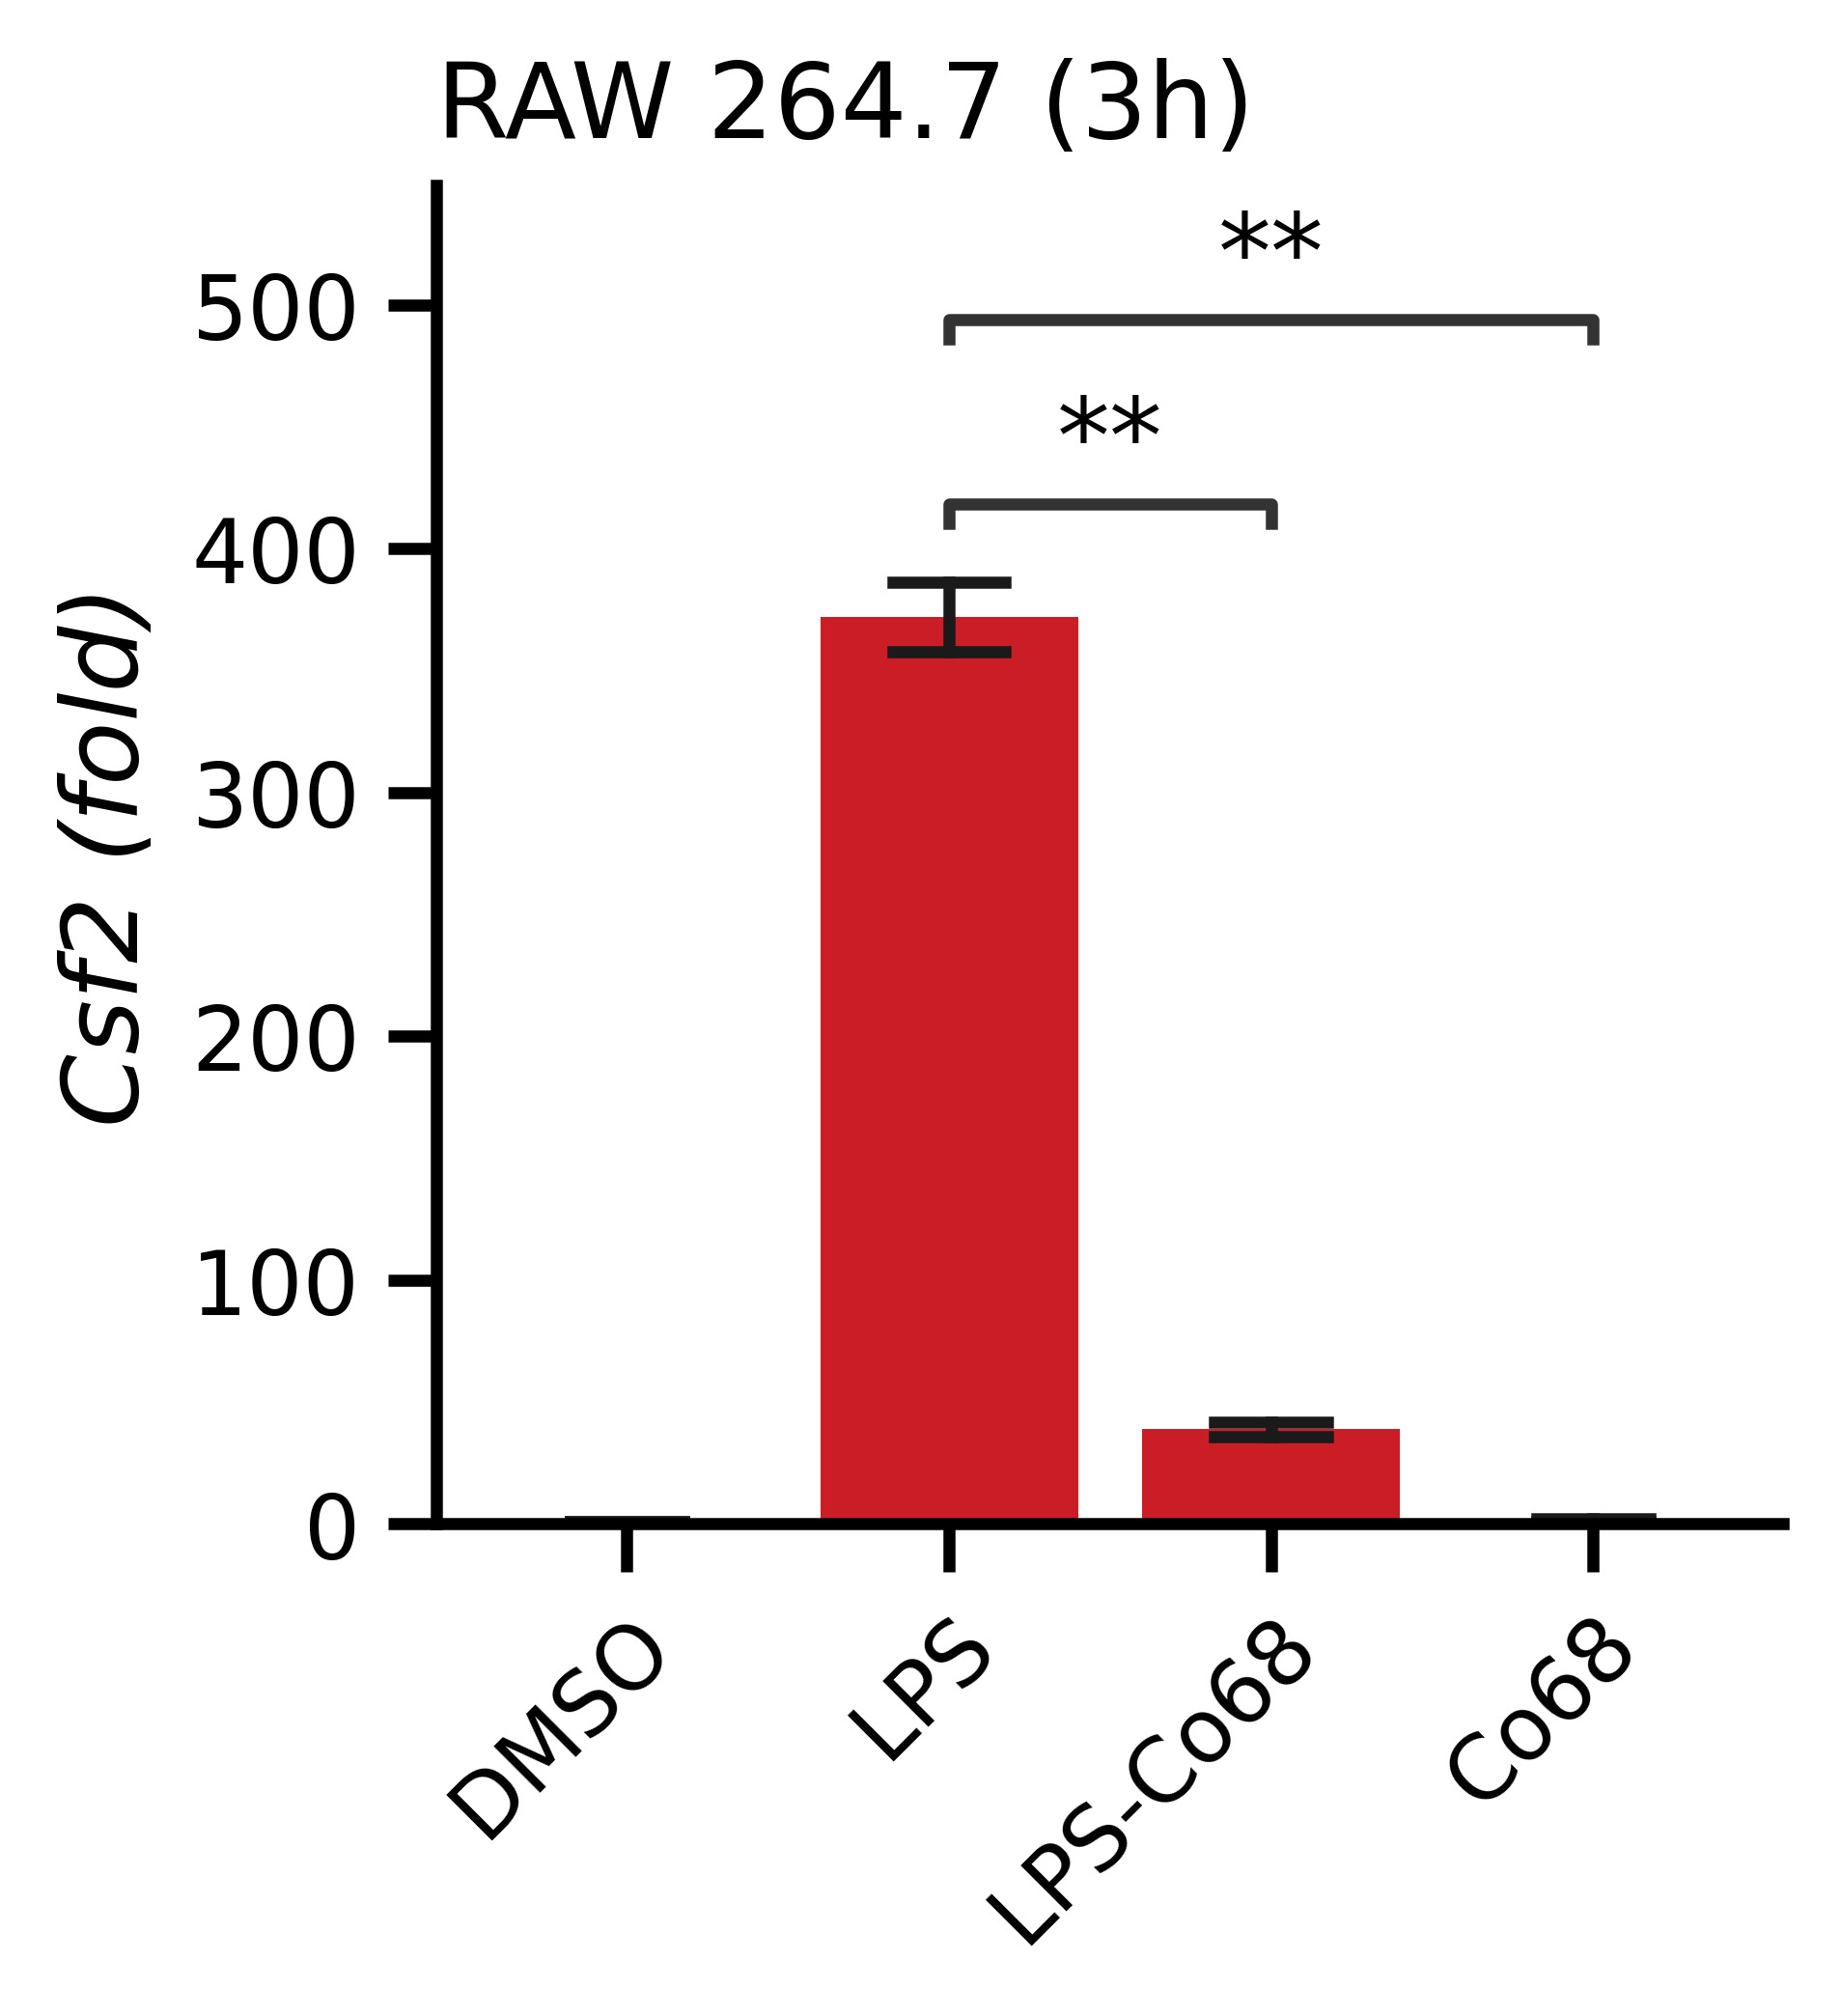

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# LPS-Co68 inhibit effect

with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    # gene = 'Il1a'
    cell = 'RAW 264.7'
    outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (Co68: 3h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (3h)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    pairs=[('LPS-Co68','LPS'), ('Co68','LPS')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_Co68_i_LPS_3h.pdf', dpi=700, bbox_inches='tight')

In [321]:
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/H293_Construction/')
os.getcwd()

'/Users/fenn/Documents/Co68/qPCR/qPCR/H293_Construction'

In [296]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/TLR4_KO')
os.listdir()

['.DS_Store',
 'Co7_Ifnb1_KO_TLR4-BMDM.pdf',
 'RAW_Co68_Ifnb1_KO_TLR4.pdf',
 'TRIF_KO_Ifnb1_BMDM_Co7.csv',
 'TLR4_KO_Ifnb1_BMDM_Co7.csv',
 'Co7_Ifnb1_KO_TRIF-BMDM.pdf',
 'TLR4_KO_Ifnb1_BMDM_Co68.csv',
 'Co68_Ifnb1_KO_TLR4-BMDM.pdf',
 'TLR4_KO_Ifnb1.csv',
 'TLR4_KO_Ifnb1_BMDM.csv']

In [345]:
exp = pd.read_csv('HEK293T_Overexpression_TLR4_ISG15.csv')
exp

Unnamed: 0                样本名称    检测项目     CT   ACTB   diff       pow  \
0            0           293T_DMSO  hISG15  26.98  18.82  -8.16  0.003496   
1            1           293T_DMSO  hISG15  27.58  19.15  -8.43  0.002899   
2            2           293T_CO68  hISG15  25.68  15.99  -9.69  0.001211   
3            3           293T_CO68  hISG15  25.72  16.60  -9.12  0.001797   
4            4            293T_LPS  hISG15  25.46  15.95  -9.51  0.001372   
5            5            293T_LPS  hISG15  26.02  15.98 -10.04  0.000950   
6            6  TLR4_MD2_CD14_DMSO  hISG15  25.23  17.07  -8.16  0.003496   
7            7  TLR4_MD2_CD14_DMSO  hISG15  25.53  17.30  -8.23  0.003331   
8            8  TLR4_MD2_CD14_CO68  hISG15  19.23  17.50  -1.73  0.301452   
9            9  TLR4_MD2_CD14_CO68  hISG15  19.53  17.81  -1.72  0.303549   
10          10   TLR4_MD2_CD14_LPS  hISG15  19.97  17.22  -2.75  0.148651   
11          11   TLR4_MD2_CD14_LPS  hISG15  20.30  17.39  -2.91  0.133046   

           fc          group   trt  
0    1.057653        Control  DMSO  
1    0.877133        Control  DMSO  
2    0.366241        Control  Co68  
3    0.543694        Control  Co68  
4    0.414909        Control   LPS  
5    0.287347        Control   LPS  
6    1.057653  TLR4-CD14-MD2  DMSO  
7    1.007561  TLR4-CD14-MD2  DMSO  
8   91.193989  TLR4-CD14-MD2  Co68  
9   97.828294  TLR4-CD14-MD2  Co68  
10  44.969247  TLR4-CD14-MD2   LPS  
11  40.248604  TLR4-CD14-MD2   LPS

In [327]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [372]:
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/cellLineTest/lastFigures/THP1_Co68_IFNB1.csv')
exp

样本名称   检测项目     CT   diff       pow          fc group   trt
0   M0_DMSO  hIFNB  30.01 -14.04  0.000059    0.945427    M0  DMSO
1   M0_DMSO  hIFNB  30.01 -13.98  0.000062    0.985576    M0  DMSO
2   M0_Co68  hIFNB  21.33  -4.75  0.037163  691.829823    M0  Co68
3   M0_Co68  hIFNB  21.37  -4.67  0.039282  635.574799    M0  Co68
4   M1_DMSO  hIFNB  30.59 -13.76  0.000072    1.147933    M1  DMSO
5   M1_DMSO  hIFNB  31.16 -14.19  0.000053    0.852067    M1  DMSO
6   M1_Co68  hIFNB  22.55  -4.46  0.045437  823.594979    M1  Co68
7   M1_Co68  hIFNB  22.68  -4.58  0.041810  785.843163    M1  Co68
8   M2_DMSO  hIFNB  26.93 -11.23  0.000416    4.630137    M2  DMSO
9   M2_DMSO  hIFNB  27.24 -11.38  0.000375    5.975414    M2  DMSO
10  M2_Co68  hIFNB  21.92  -4.36  0.048698  695.529896    M2  Co68
11  M2_Co68  hIFNB  22.01  -4.37  0.048361  720.172919    M2  Co68

In [389]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation/')
os.listdir()

['Co68_HSV_EMCV_12h.csv']

In [1]:
import os 
os.chdir('/Users/fenn/Documents/PhDProjects/Co68/AntiCancer')
os.listdir()

['KO_mice_validation',
 '.DS_Store',
 'Pan02_Volumn_Co68_PD1.pdf',
 '20231115_Co68_Tumor.xlsx',
 'PD1',
 'DMXAA',
 'Pan02_Weight_Co68_PD1.pdf',
 'pan02',
 'B16F10',
 'MC38',
 'cellRatioFlowCytometry.csv',
 'cellRatioFlowCytometry_Cell_Co68.csv',
 'TumorViolin.ipynb']

In [20]:
import pandas as pd
exp = pd.read_csv('cellRatioFlowCytometry_Cell_Co68.csv')
exp

trt  group  Ratio
0    PBS  CD4 T   2.86
1    PBS  CD4 T   2.56
2   Co68  CD4 T   1.08
3   Co68  CD4 T   1.19
4    PBS  CD8 T  14.26
5    PBS  CD8 T  12.37
6   Co68  CD8 T  24.32
7   Co68  CD8 T  25.90
8    PBS     NK   6.14
9    PBS     NK   8.75
10  Co68     NK  21.99
11  Co68     NK  20.76

In [ ]:
cellNumber = cellNumber.apply()

Index(['PMNs', 'CAF1', 'CAF2', 'Macro 1', 'NKT', 'Macro 2', 'Cancer cell 1',
       'Cancer cell 2', 'pDC', 'CD4 T', 'N2 TANs', 'CD8 T', 'N1 TANs', 'NK ',
       'Cancer cell 3', 'CD14CD16 Mono', 'Hmgb2 CD8 T', 'DC_Ppt1', 'DC_Ccr7',
       'Fibroblasts', 'Endothelials'],
      dtype='object')

In [163]:
cellNumberRatioCol.sum(axis=1)

PMNs             27.08
CAF1             19.28
CAF2             18.42
Macro 1          16.59
NKT              15.71
Macro 2          13.52
Cancer cell 1    12.59
Cancer cell 2    12.22
pDC               8.11
CD4 T             8.04
N2 TANs           7.80
CD8 T             7.13
N1 TANs           6.12
NK                5.92
Cancer cell 3     5.78
CD14CD16 Mono     5.21
Hmgb2 CD8 T       3.94
DC_Ppt1           2.55
DC_Ccr7           1.73
Fibroblasts       1.14
Endothelials      1.11
dtype: float64

In [ ]:
# 横向数据
cellNumber = pd.read_csv('/Users/fenn/Documents/Co68/scRNA-seq/scRNA-seq/cluster25/cellNumber.csv')
cellNumber = cellNumber.rename(columns={'Unnamed: 0': 'Group'}).set_index('Group').T
cellNumber

Co68  Mock
Group                    
B/Plasma        316   284
CD8 T           508   319
Mono            228   160
TANs1           331   131
TANs2           189   376
Epithelials      53    32
DCs             153   162
TAMs1           696   536
TAMs2           561   443
CAFs1           843   592
PMNs            707  1261
CAF2            864   513
NKT             663   504
Cancer cell 1   484   446
Cancer cell 2   374   520
CD4 T           322   273
NK              232   206
Cancer cell 3   219   208
Endothelials     44    38

In [196]:
# 纵向数据
# cellNumber = pd.read_csv('/Users/fenn/Documents/Co68/scRNA-seq/scRNA-seq/CellNumber_B_last.csv')
cellNumber = pd.read_csv('/Users/fenn/Documents/Co68/scRNA-seq/Figure_last/TANs/CellRatio_TANs.csv')
cellNumber = cellNumber.rename(columns={'Unnamed: 0': 'Cell'}).set_index('Cell')
cellNumber

PBS  Co68
Cell             
TANs1   131   331
TANs2   376   189
PMNs   1261   707

In [199]:
# 只求列和的百分数
column_sums = cellNumber.sum()
cellNumberRatioCol = (cellNumber.div(column_sums) * 100).round(2)
cellNumberRatioCol
# row_sums = cellNumberRatioCol.sum(axis=1)
# cellNumberRatioColRow = (cellNumberRatioCol.div(row_sums, axis=0) * 100).round(2).sort_index()
cellNumberRatioCol.to_csv('/Users/fenn/Documents/Co68/scRNA-seq/Figure_last/TANs/CellRatios_TANs.csv')
cellNumberRatioCol

PBS   Co68
Cell               
TANs1   7.41  26.98
TANs2  21.27  15.40
PMNs   71.32  57.62

In [ ]:
# 同时求行和和列和的百分比
column_sums = cellNumber.sum()
cellNumberRatioCol = (cellNumber.div(column_sums) * 100).round(2)
cellNumberRatioCol
row_sums = cellNumberRatioCol.sum(axis=1)
cellNumberRatioColRow = (cellNumberRatioCol.div(row_sums, axis=0) * 100).round(2).sort_index()
cellNumberRatioColRow.to_csv('/Users/fenn/Documents/Co68/scRNA-seq/Figure_last/cellRatio/CellRatios_TANs.csv')
cellNumberRatioColRow

PBS   Co68
Cell               
PMNs   55.31  44.69
TANs1  21.55  78.45
TANs2  58.00  42.00

In [266]:
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/stat1/shRNA_STAT1_SYK1_Cell_Co68.csv')
exp

trt  group     fc
0   Scramble  STAT1  0.960
1   Scramble  STAT1  1.040
2      shRNA  STAT1  0.210
3      shRNA  STAT1  0.270
4   Scramble    SYK  0.947
5   Scramble    SYK  1.053
6      shRNA    SYK  0.350
7      shRNA    SYK  0.280
8   Scramble    FGR  1.050
9   Scramble    FGR  0.950
10     shRNA    FGR  0.340
11     shRNA    FGR  0.390
12  Scramble    FYN  0.963
13  Scramble    FYN  1.037
14     shRNA    FYN  0.360
15     shRNA    FYN  0.280

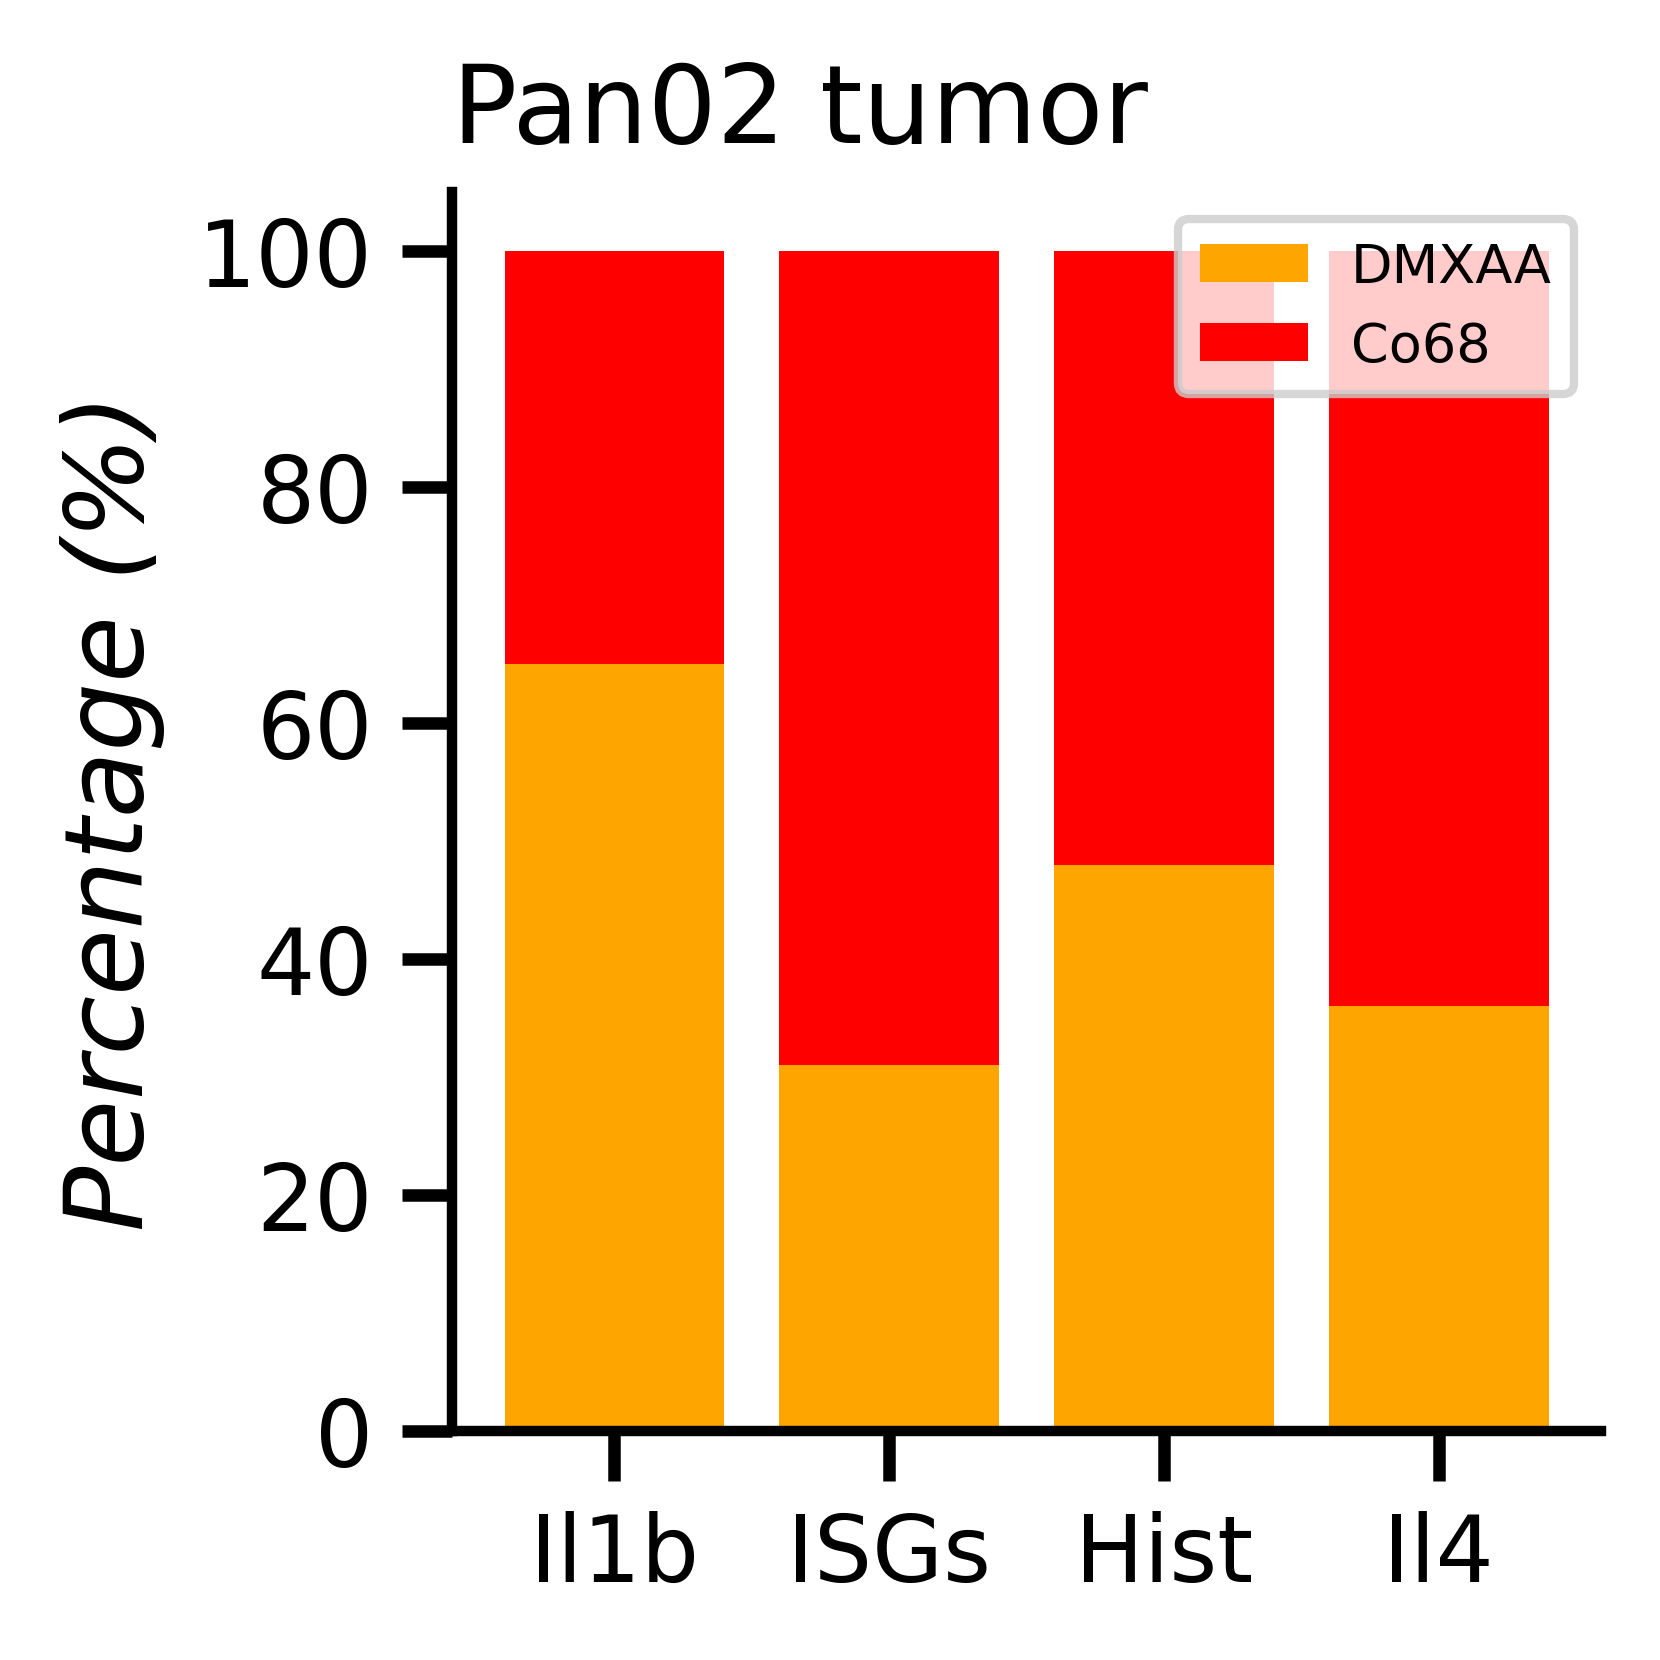

In [65]:
import matplotlib.pyplot as plt
import numpy as np


outDir = '/Users/fenn/Documents/Co68/scRNA-seq/figures_DMXAA'
# 示例数据
# categories = ['A', 'B', 'C']
categories = ['Il1b', 'ISGs', 'Hist', 'Il4']
group1 = [65, 31, 48, 36]  # 组1的值
group2 = [35, 69, 52, 64]  # 组2的值

# 生成 x 轴的位置
x = np.arange(len(categories))  # 分类数量
with sns.plotting_context('notebook', font_scale=1.2):
    fig = plt.figure(figsize=(3, 3), dpi=600)
    ax = fig.add_subplot(111)
    # 绘制堆积条形图
    plt.bar(x, group1, label='DMXAA', color='orange')
    plt.bar(x, group2, bottom=group1, label='Co68', color='red')  # 注意底部的设置

    sns.despine()

    # 添加标签和标题
    # plt.xlabel('')
    plt.ylabel('Percentage (%)', fontsize=13, fontstyle='italic')
    # plt.title('组1和组2的堆积条形图')
    plt.xticks(x, categories)  # 设置 X 轴刻度为类别

    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    ax.set_title('Pan02 tumor', fontsize=13, loc='left')
    
    ax.legend(loc=0, fontsize=6.5)

    plt.savefig(f'{outDir}/Co68_scRNA-seq_CellRatio_DMXAA.pdf', dpi=700, bbox_inches='tight')
    # 显示图形
    plt.tight_layout()  # 自动调整布局
    plt.show()


In [186]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CD8 T_PBS vs. CD8 T_Co68: t-test independent samples, P_val:1.073e-02 t=-9.576e+00
CD4 T_PBS vs. CD4 T_Co68: t-test independent samples, P_val:1.013e-02 t=9.858e+00
NK_PBS vs. NK_Co68: t-test independent samples, P_val:1.056e-02 t=-9.656e+00


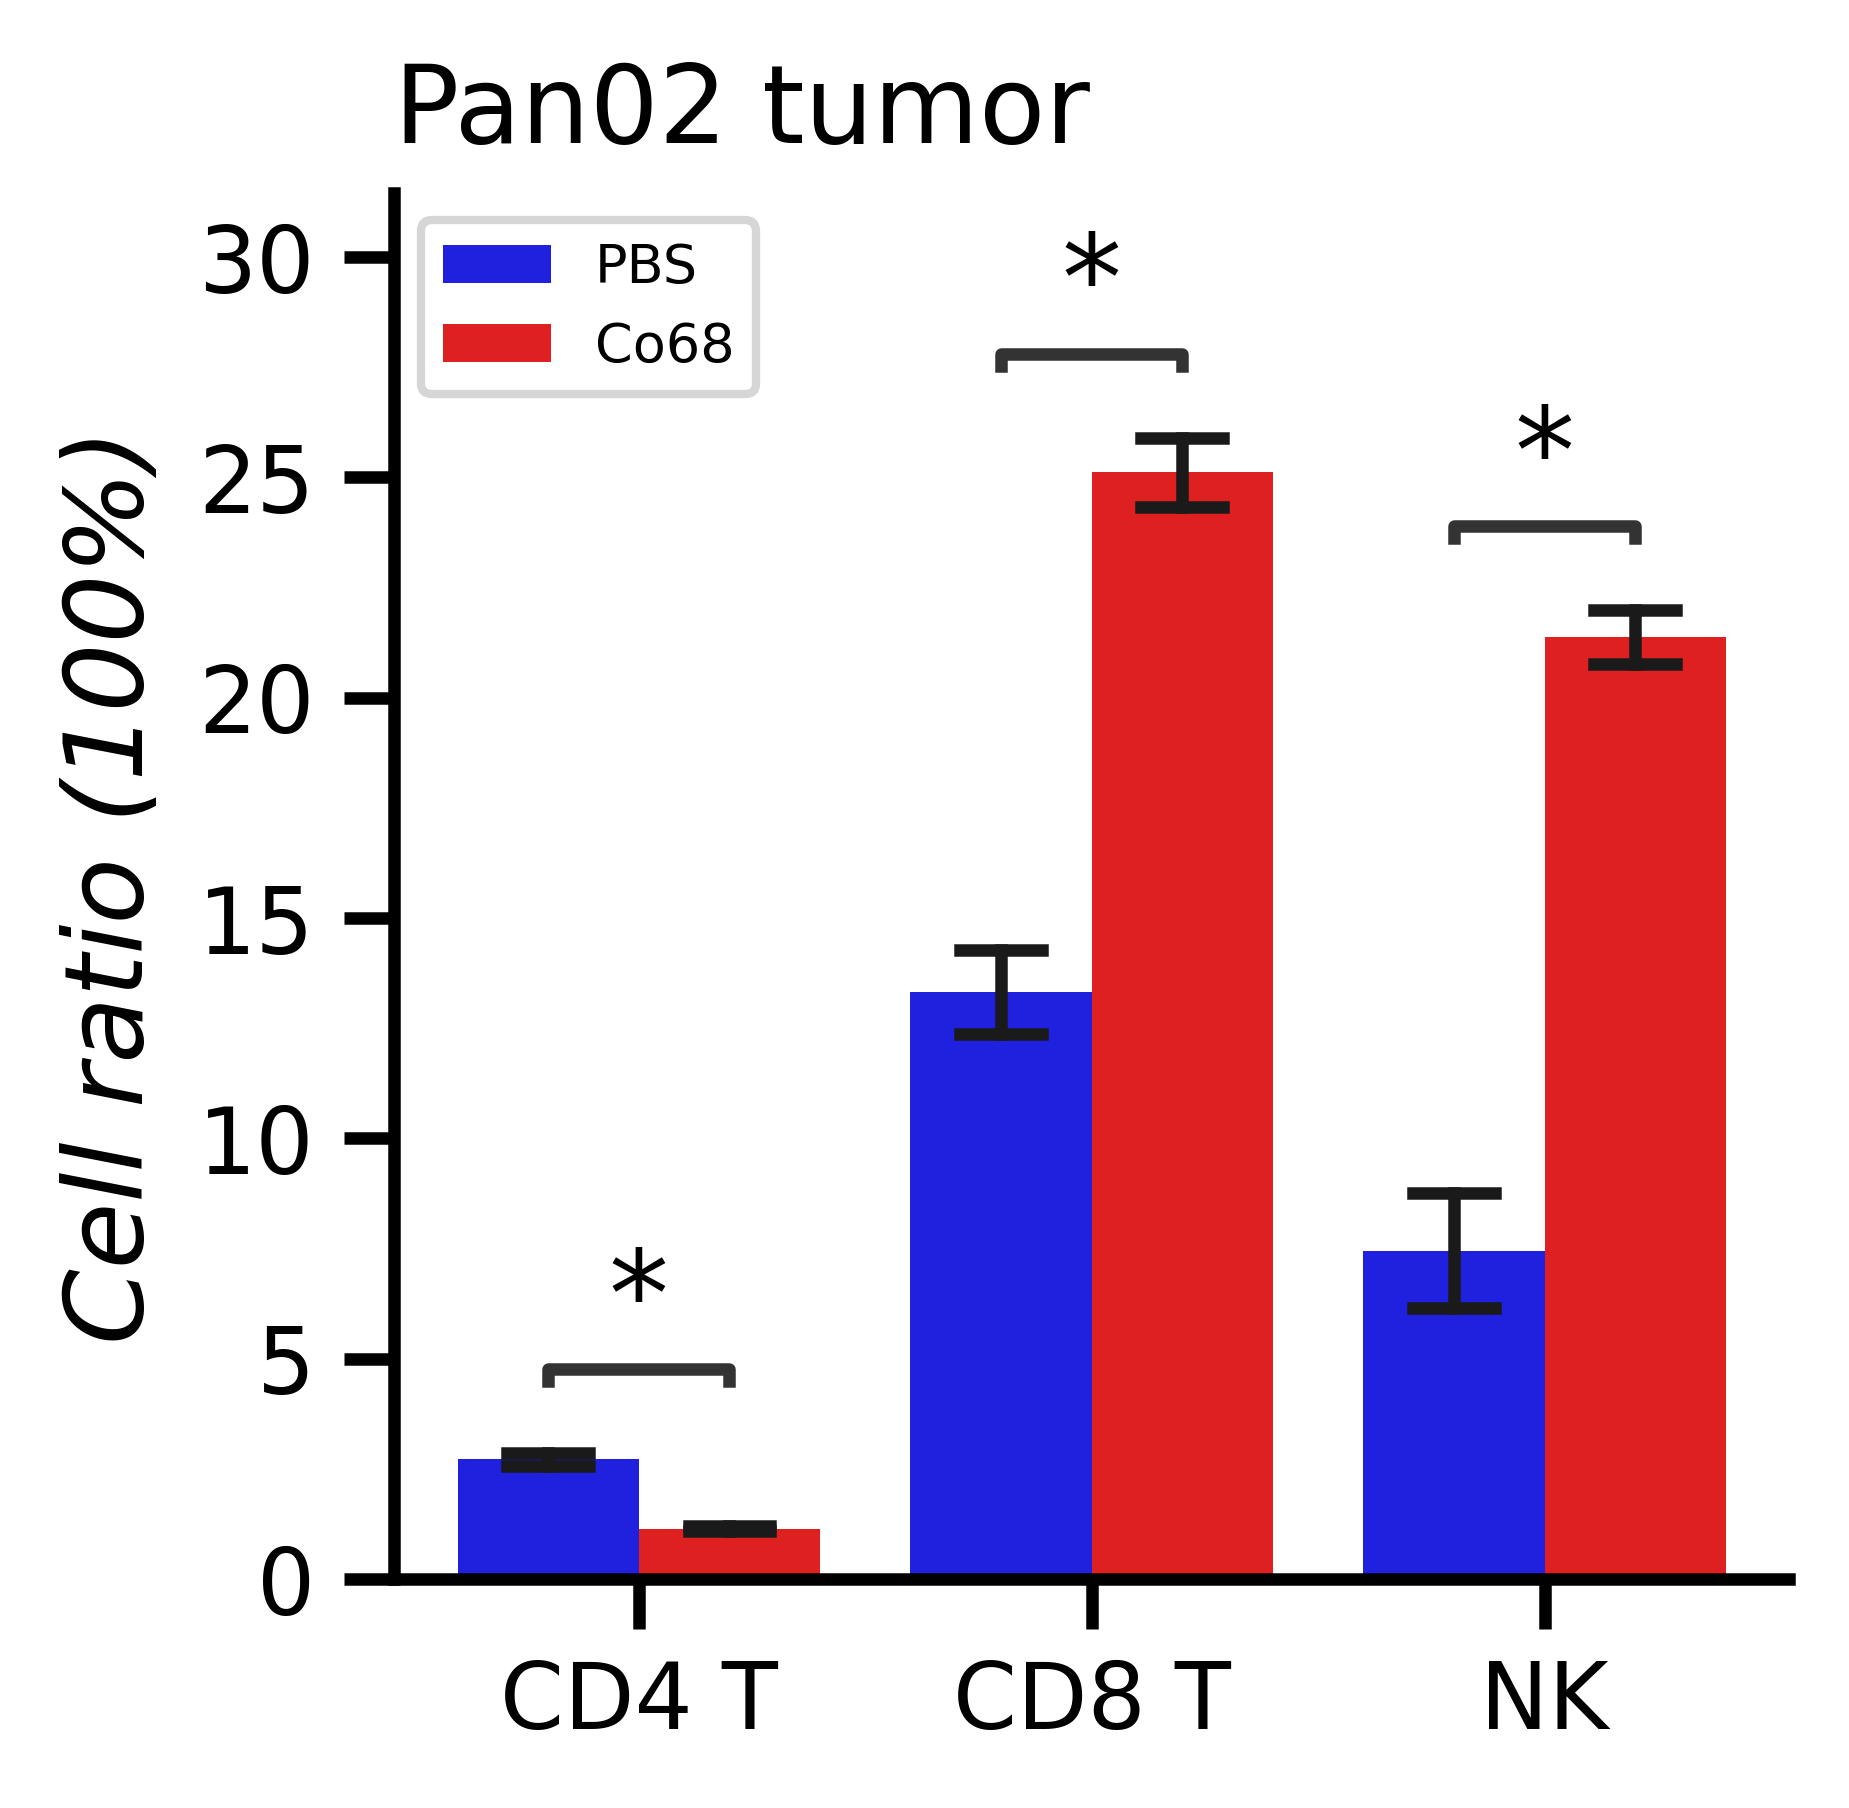

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

exp = pd.read_csv('/Users/fenn/Documents/Co68/AntiCancer/cellRatioFlowCytometry_Cell_Co68.csv')
# 肿瘤细胞多维二分类
with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='Ratio'
    gene = 'Cell ratio (100%)'
    cells = 'Pan02 tumor'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    outDir = '/Users/fenn/Documents/Co68/AntiCancer/'

    # trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    # a = ['DMSO', 'Co68']

    fig = plt.figure(figsize=(3, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        capsize=0.18, errwidth=1.5, palette=['#0000FF', '#FF0000'],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells}', fontsize=13, loc='left')
    
    ax.legend(loc=2, fontsize=6.5)

    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('NK', 'PBS'),('NK', 'Co68')),
    (('CD8 T', 'PBS'),('CD8 T', 'Co68')),
    (('CD4 T', 'PBS'),('CD4 T', 'Co68'))
        ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]、
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_CellRatio_2.pdf', dpi=700, bbox_inches='tight')

In [23]:
os.listdir()

['Co68_Il1b_RAW 264.7_FGR-shRNA.pdf',
 'Fgr_KD_i_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_FYN-SFKi.pdf',
 'SFKs_inhibitor_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_SYK-shRNA.pdf',
 'STAT1_KD_i_Inflammation.csv',
 'Fgr_Fyn_KD_i_Inflammation_2024-12-09.csv',
 'Co68_Il1b_RAW 264.7_SYK-shRNA_SYK_last.pdf',
 '2024-12-09_Co68_Il1b_RAW 264.7_Fgr-Fyn-shRNA_LYNi.pdf',
 'Fyn_KD_i_Inflammation.csv',
 '2024-12-09_Co68_Il1b_RAW 264.7_LYN-shRNA_LYNi.pdf',
 'Lyn_inhibitor_Inflammation.csv',
 'SYK_KD_i_Inflammation.csv',
 'STAT1_inhibitor_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_STAT1i.pdf',
 'Co68_Il1b_RAW 264.7_FYN-shRNA.pdf',
 'Co68_Il1b_RAW 264.7_STAT1-shRNA.pdf',
 'Co68_Il1b_RAW 264.7_SYK-shRNA_SYK.pdf',
 'Lyn_KD_i_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_LYN-shRNA_LYNi.pdf']

In [80]:
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/stat1/shRNA_STAT1_SYK1_2_co68.csv')
exp

trt  group     fc
0  Scramble  Stat1  0.960
1  Scramble  Stat1  1.040
2     shRNA  Stat1  0.210
3     shRNA  Stat1  0.270
4  Scramble    Syk  0.947
5  Scramble    Syk  1.053
6     shRNA    Syk  0.350
7     shRNA    Syk  0.280

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3386604792.py:26: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt', width=0.6,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3386604792.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt', width=0.6,


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Syk_Scramble vs. Syk_shRNA: t-test independent samples, P_val:8.488e-03 t=1.079e+01
Stat1_Scramble vs. Stat1_shRNA: t-test independent samples, P_val:4.300e-03 t=1.520e+01


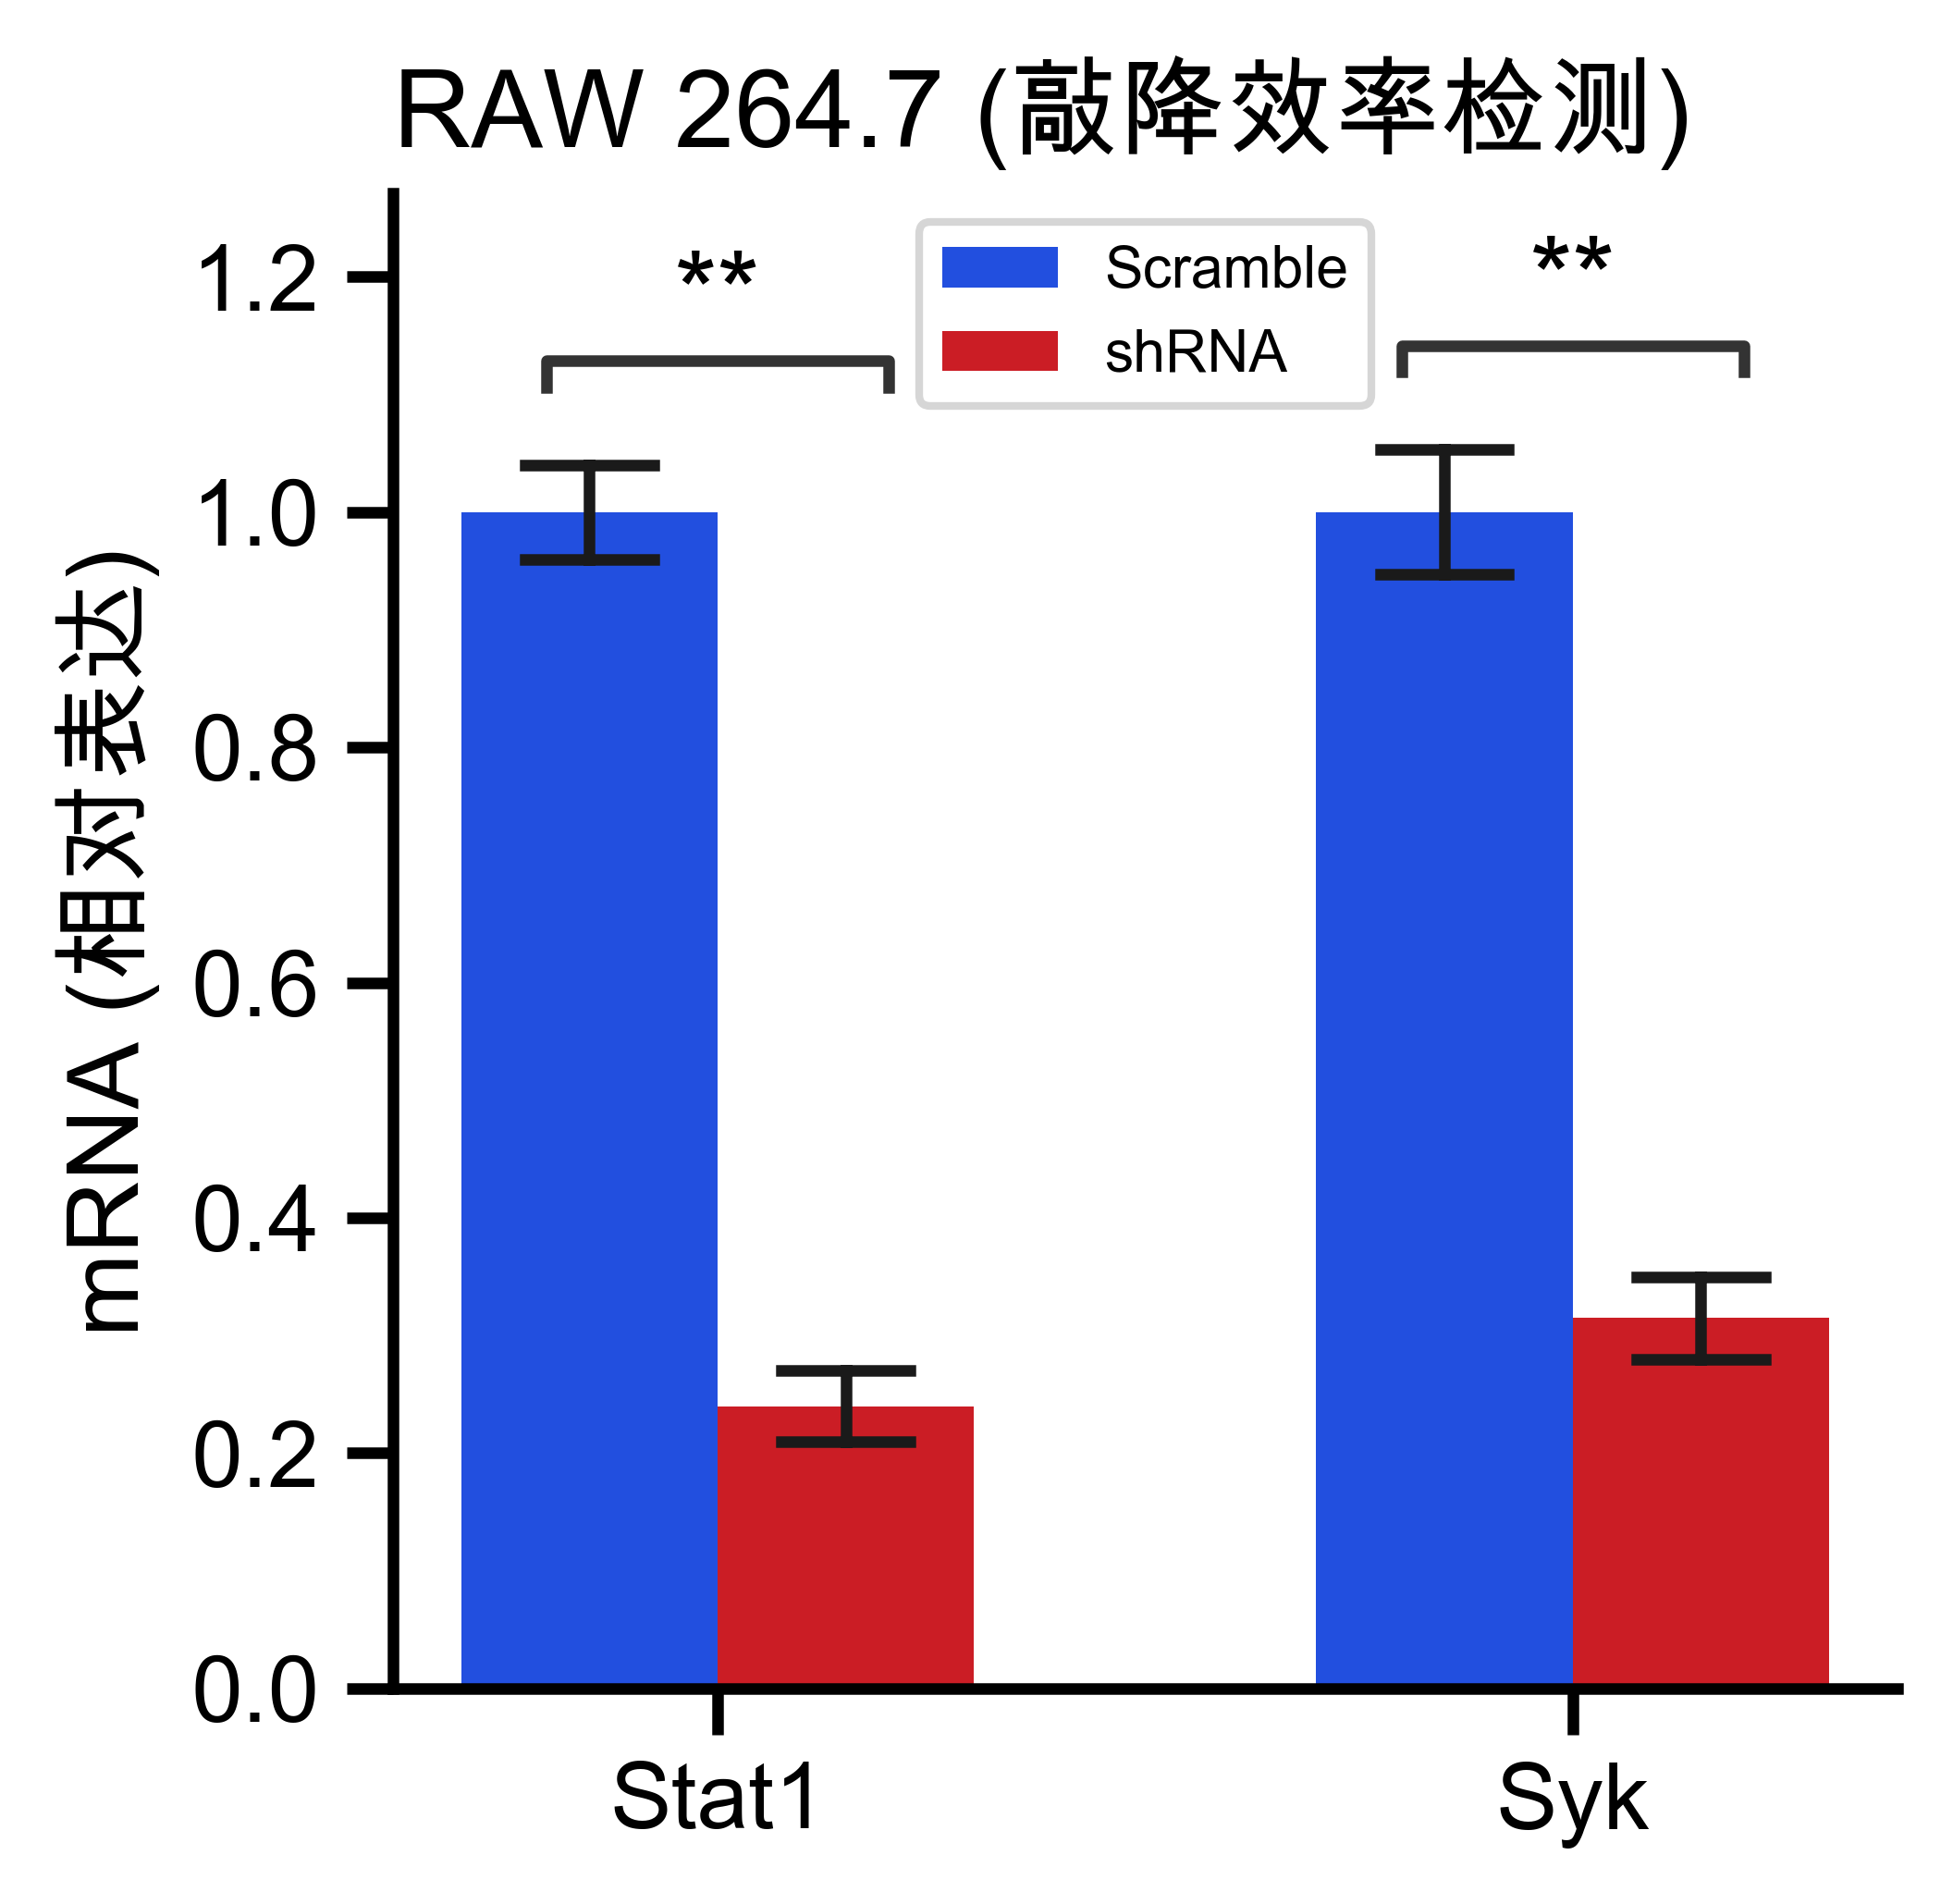

In [94]:
# 中文绘图
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 多维二分类
with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='fc'
    gene = 'mRNA (相对表达)'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/stat1'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/shRNA'

    # outDir = os.getcwd()


    fig = plt.figure(figsize=(3.5, 3.5), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt', width=0.6,
                    # 设置两列颜色
        capsize=0.3, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=12)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (敲降效率检测)', fontsize=14, loc='left')
    
    ax.legend(loc=0, fontsize=7.5)

    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()))
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('Stat1', 'Scramble'),('Stat1', 'shRNA')),
    (('Syk', 'Scramble'),('Syk', 'shRNA')),
    # (('FGR', 'Scramble'),('FGR', 'shRNA')),
    # (('FYN', 'Scramble'),('FYN', 'shRNA'))
        ]

    # # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    # #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # # ]、
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_shRNA.csv', index=None)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_shRNA.pdf', dpi=700, bbox_inches='tight')

In [95]:
exp = pd.read_csv('/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK/SYK_KD_i_Inflammation.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  749.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  804.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   93.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   79.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031    1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029    0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  881.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  827.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  872.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  814.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007    0.839117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203    1.180430   

       group       trt  
0   Scramble       LPS  
1   Scramble       LPS  
2   Scramble  LPS-Co68  
3   Scramble  LPS-Co68  
4   Scramble      Co68  
5   Scramble      Co68  
6     sh-Syk       LPS  
7     sh-Syk       LPS  
8     sh-Syk  LPS-Co68  
9     sh-Syk  LPS-Co68  
10    sh-Syk      Co68  
11    sh-Syk      Co68

In [130]:
exp = pd.read_csv('/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK/SYK_KO_i_Inflammation.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow           fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  2869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  2604.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   333.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   399.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031     1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029     0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  2897.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  2737.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  2732.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  2578.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007     1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203     1.180430   

     group       trt  
0       WT       LPS  
1       WT       LPS  
2       WT  LPS-Co68  
3       WT  LPS-Co68  
4       WT      Co68  
5       WT      Co68  
6   SYK KO       LPS  
7   SYK KO       LPS  
8   SYK KO  LPS-Co68  
9   SYK KO  LPS-Co68  
10  SYK KO      Co68  
11  SYK KO      Co68

In [131]:
exp[['group', 'trt']] = exp[['trt', 'group']]
exp

样本名称  检测项目     CT   ACTB   diff       pow           fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  2869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  2604.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   333.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   399.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031     1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029     0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  2897.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  2737.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  2732.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  2578.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007     1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203     1.180430   

       group     trt  
0        LPS      WT  
1        LPS      WT  
2   LPS-Co68      WT  
3   LPS-Co68      WT  
4       Co68      WT  
5       Co68      WT  
6        LPS  SYK KO  
7        LPS  SYK KO  
8   LPS-Co68  SYK KO  
9   LPS-Co68  SYK KO  
10      Co68  SYK KO  
11      Co68  SYK KO

In [132]:
exp.loc[[1, 6, 8],'fc'] = [2704.296422, 2947.896511, 2372.806322]
exp

样本名称  检测项目     CT   ACTB   diff       pow           fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  2869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  2704.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   333.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   399.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031     1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029     0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  2947.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  2737.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  2372.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  2578.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007     1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203     1.180430   

       group     trt  
0        LPS      WT  
1        LPS      WT  
2   LPS-Co68      WT  
3   LPS-Co68      WT  
4       Co68      WT  
5       Co68      WT  
6        LPS  SYK KO  
7        LPS  SYK KO  
8   LPS-Co68  SYK KO  
9   LPS-Co68  SYK KO  
10      Co68  SYK KO  
11      Co68  SYK KO

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/115469423.py:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/115469423.py:26: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/115469423.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS-Co68_WT vs. LPS-Co68_SYK KO: t-test independent samples, P_val:2.615e-03 t=-1.952e+01
LPS_WT vs. LPS_SYK KO: t-test independent samples, P_val:7.170e-01 t=-4.172e-01
LPS_WT vs. LPS-Co68_WT: t-test independent samples, P_val:1.351e-03 t=2.718e+01


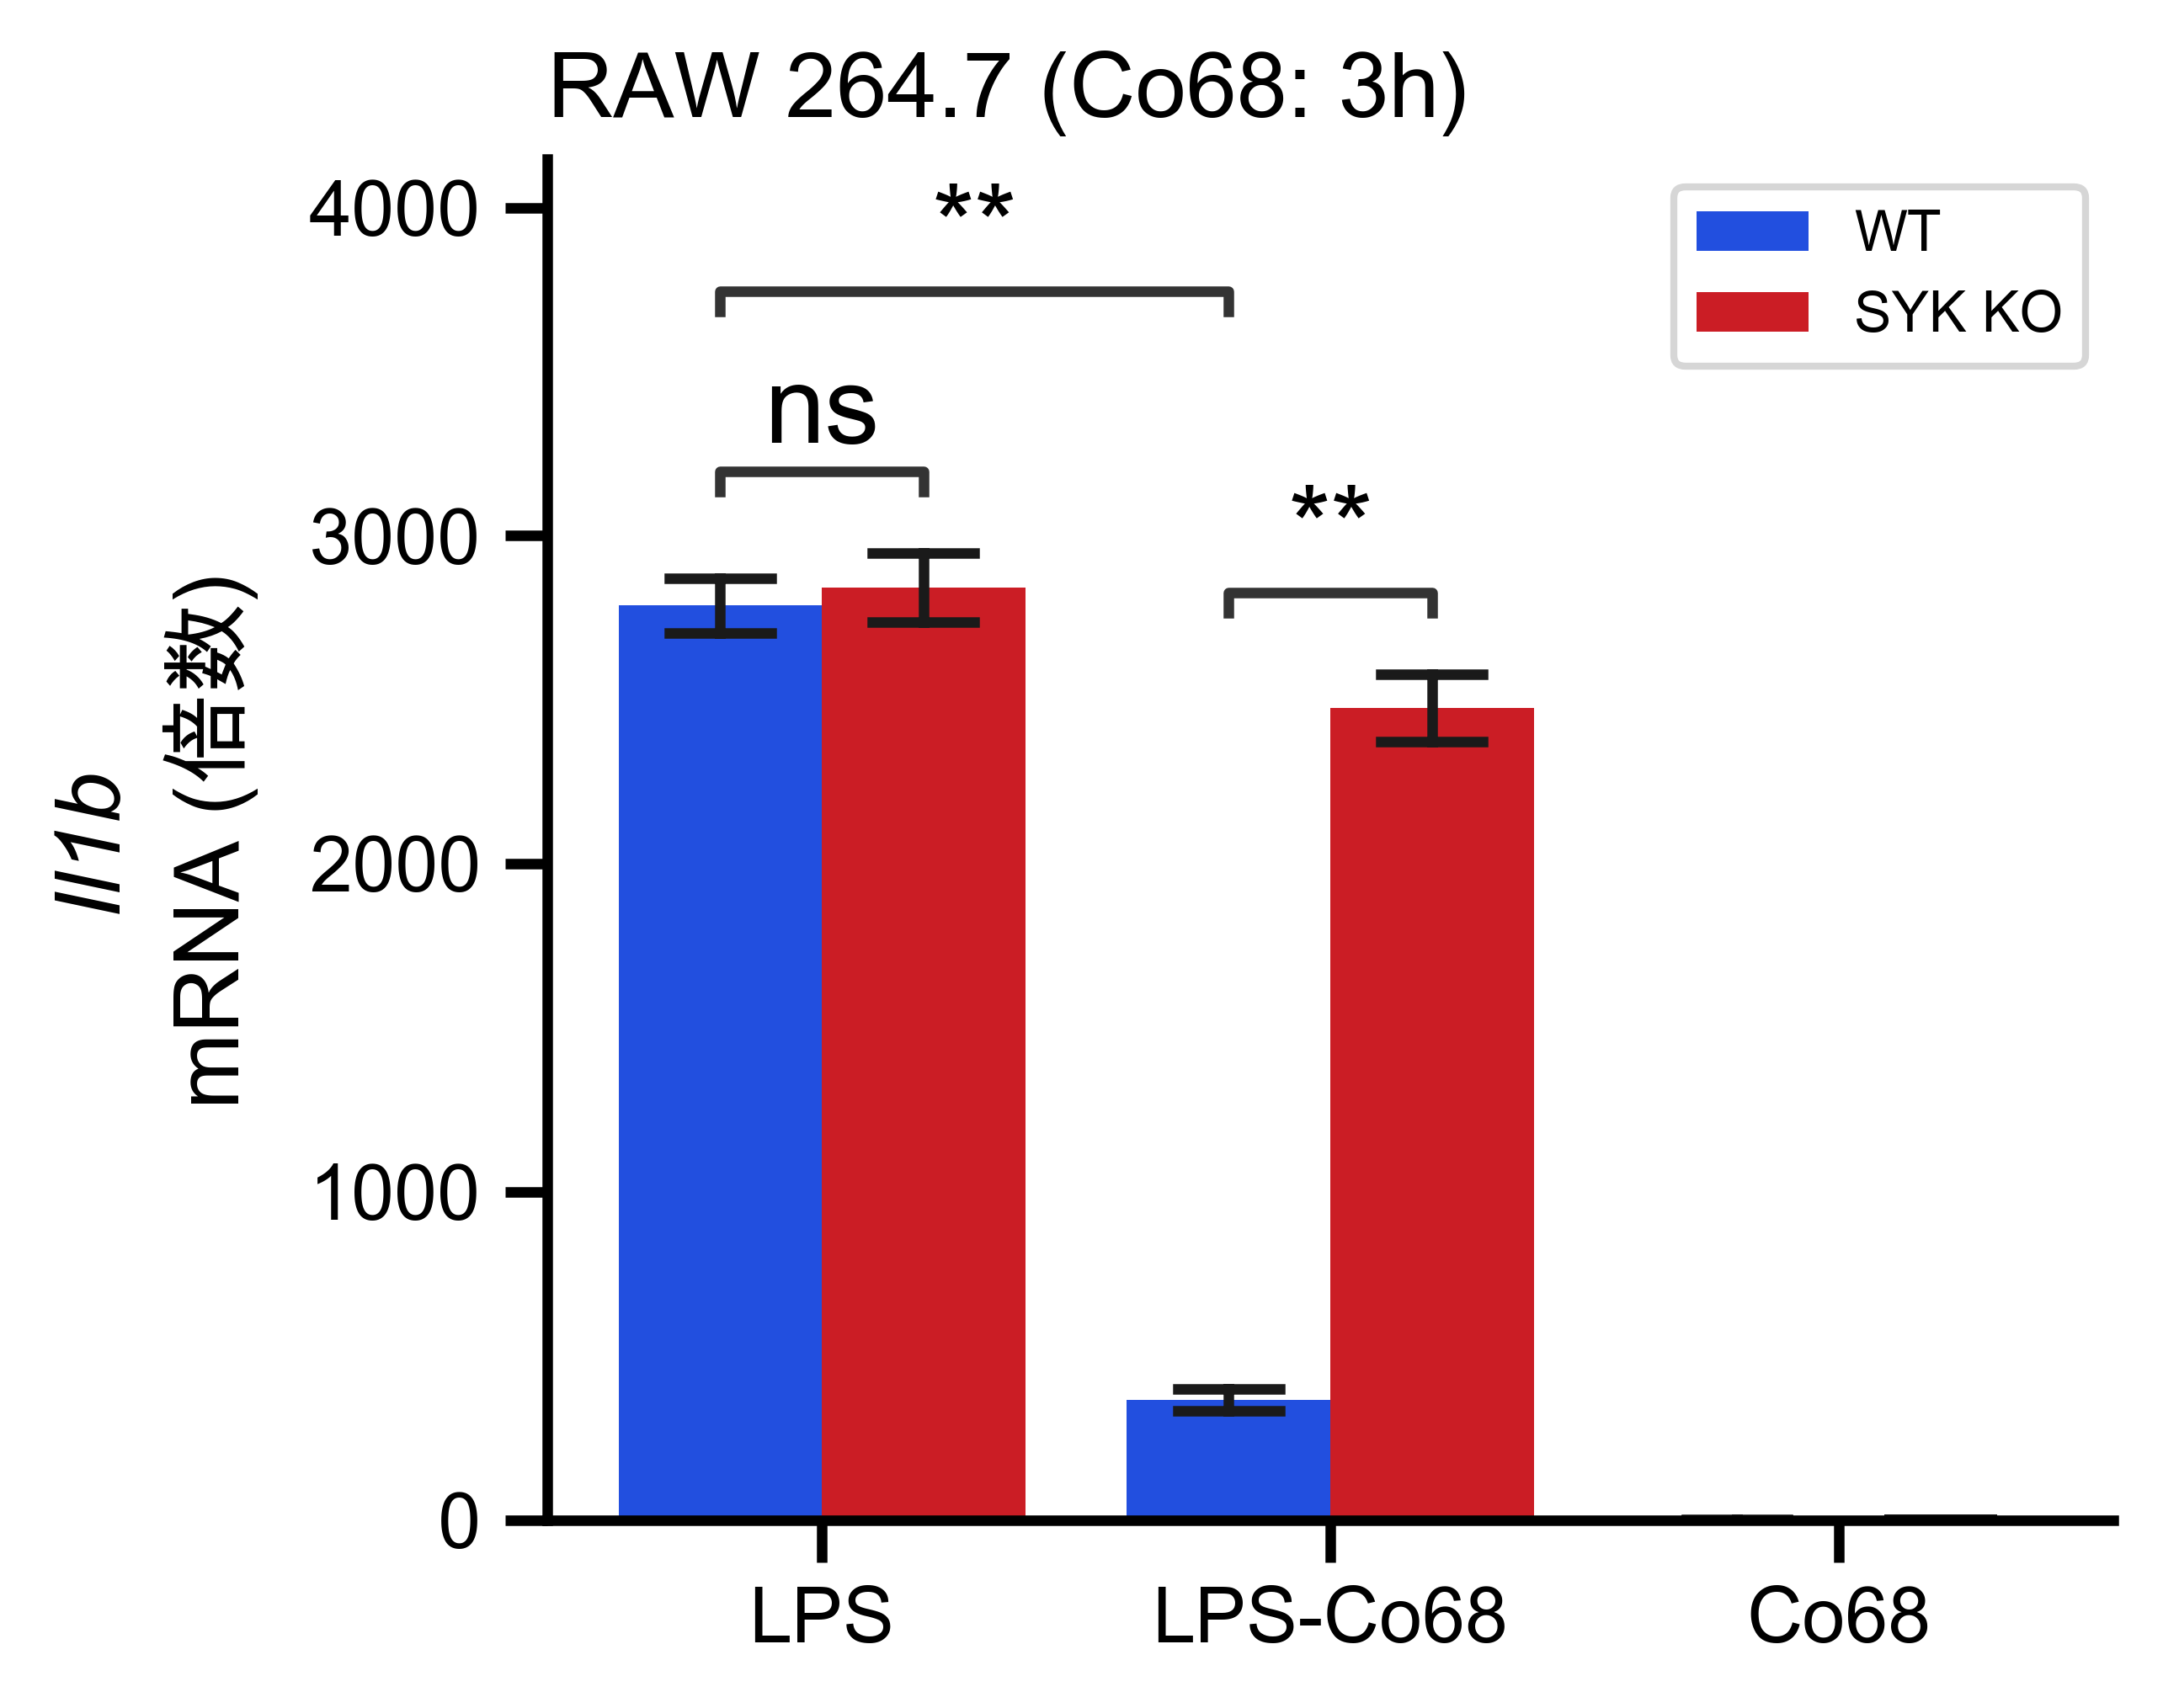

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/stat1/lastData'

with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'SYK'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    pad = 60
    pad2 = 0.08
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK'


    fig = plt.figure(figsize=(4, 3.5), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.4, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp['group'].drop_duplicates()))), list(exp['group'].drop_duplicates()))
    
    ax.legend(loc=1, fontsize=8)
    
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    

    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )


    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    pairs=[
    (('LPS', 'WT'),('LPS', 'SYK KO')),
    (('LPS-Co68', 'WT'),('LPS-Co68', 'SYK KO')),
    (('LPS', 'WT'), ('LPS-Co68', 'WT'))
        ]

    # pairs=[
    # (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    # (('sh-Syk', 'LPS'),('sh-Syk', 'LPS-Co68')),
    # (('Scramble', 'LPS-Co68'), ('sh-Syk', 'LPS-Co68'))
    #     ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-KO_SYK.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_{label}-KO_SYK.csv', index=None)

In [141]:
exp = pd.read_csv('/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/STAT1/STAT1_inhibitor_Inflammation.csv')

exp[['group', 'trt']] = exp[['trt', 'group']]
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc  \
0               DMSO  IL1B  32.74  17.77 -14.97  0.000031  452.145943   
1               DMSO  IL1B  33.52  17.82 -15.70  0.000019  483.065984   
2               Co68  IL1B  32.79  17.59 -15.20  0.000027   54.063863   
3               Co68  IL1B  32.85  17.70 -15.15  0.000028   62.101380   
4       Co68_STAT1-i  IL1B  32.20  17.77 -14.43  0.000045    1.814173   
5       Co68_STAT1-i  IL1B  32.86  17.88 -14.98  0.000031    1.239117   
6                LPS  IL1B  24.95  16.91  -8.04  0.003799  472.145943   
7                LPS  IL1B  24.99  17.05  -7.94  0.004072  495.065984   
8           LPS_Co68  IL1B  29.93  17.63 -12.30  0.000198  521.754699   
9           LPS_Co68  IL1B  29.93  17.82 -12.11  0.000226  493.560249   
10  LPS_Co68_STAT1-i  IL1B  24.28  16.79  -7.49  0.005563    2.754699   
11  LPS_Co68_STAT1-i  IL1B  24.44  16.82  -7.62  0.005083    3.560249   

       group     trt  
0        LPS    DMSO  
1        LPS    DMSO  
2   LPS-Co68    DMSO  
3   LPS-Co68    DMSO  
4       Co68    DMSO  
5       Co68    DMSO  
6        LPS  STAT1i  
7        LPS  STAT1i  
8   LPS-Co68  STAT1i  
9   LPS-Co68  STAT1i  
10      Co68  STAT1i  
11      Co68  STAT1i

In [156]:
exp.loc[[0,1,6,7,8,9], 'fc'] = [1572.145943, 1683.065984, 1772.145943, 1645.065984, 1521.754699, 1343.560249]
exp

样本名称  检测项目     CT   ACTB   diff       pow           fc  \
0               DMSO  IL1B  32.74  17.77 -14.97  0.000031  1572.145943   
1               DMSO  IL1B  33.52  17.82 -15.70  0.000019  1683.065984   
2               Co68  IL1B  32.79  17.59 -15.20  0.000027    54.063863   
3               Co68  IL1B  32.85  17.70 -15.15  0.000028    62.101380   
4       Co68_STAT1-i  IL1B  32.20  17.77 -14.43  0.000045     1.814173   
5       Co68_STAT1-i  IL1B  32.86  17.88 -14.98  0.000031     1.239117   
6                LPS  IL1B  24.95  16.91  -8.04  0.003799  1772.145943   
7                LPS  IL1B  24.99  17.05  -7.94  0.004072  1645.065984   
8           LPS_Co68  IL1B  29.93  17.63 -12.30  0.000198  1521.754699   
9           LPS_Co68  IL1B  29.93  17.82 -12.11  0.000226  1343.560249   
10  LPS_Co68_STAT1-i  IL1B  24.28  16.79  -7.49  0.005563     2.754699   
11  LPS_Co68_STAT1-i  IL1B  24.44  16.82  -7.62  0.005083     3.560249   

       group     trt  
0        LPS    DMSO  
1        LPS    DMSO  
2   LPS-Co68    DMSO  
3   LPS-Co68    DMSO  
4       Co68    DMSO  
5       Co68    DMSO  
6        LPS  STAT1i  
7        LPS  STAT1i  
8   LPS-Co68  STAT1i  
9   LPS-Co68  STAT1i  
10      Co68  STAT1i  
11      Co68  STAT1i

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/2674661030.py:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/2674661030.py:26: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/2674661030.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS-Co68_DMSO vs. LPS-Co68_STAT1i: t-test independent samples, P_val:4.184e-03 t=-1.541e+01
LPS_DMSO vs. LPS_STAT1i: t-test independent samples, P_val:4.382e-01 t=-9.604e-01
LPS_DMSO vs. LPS-Co68_DMSO: t-test independent samples, P_val:1.253e-03 t=2.823e+01


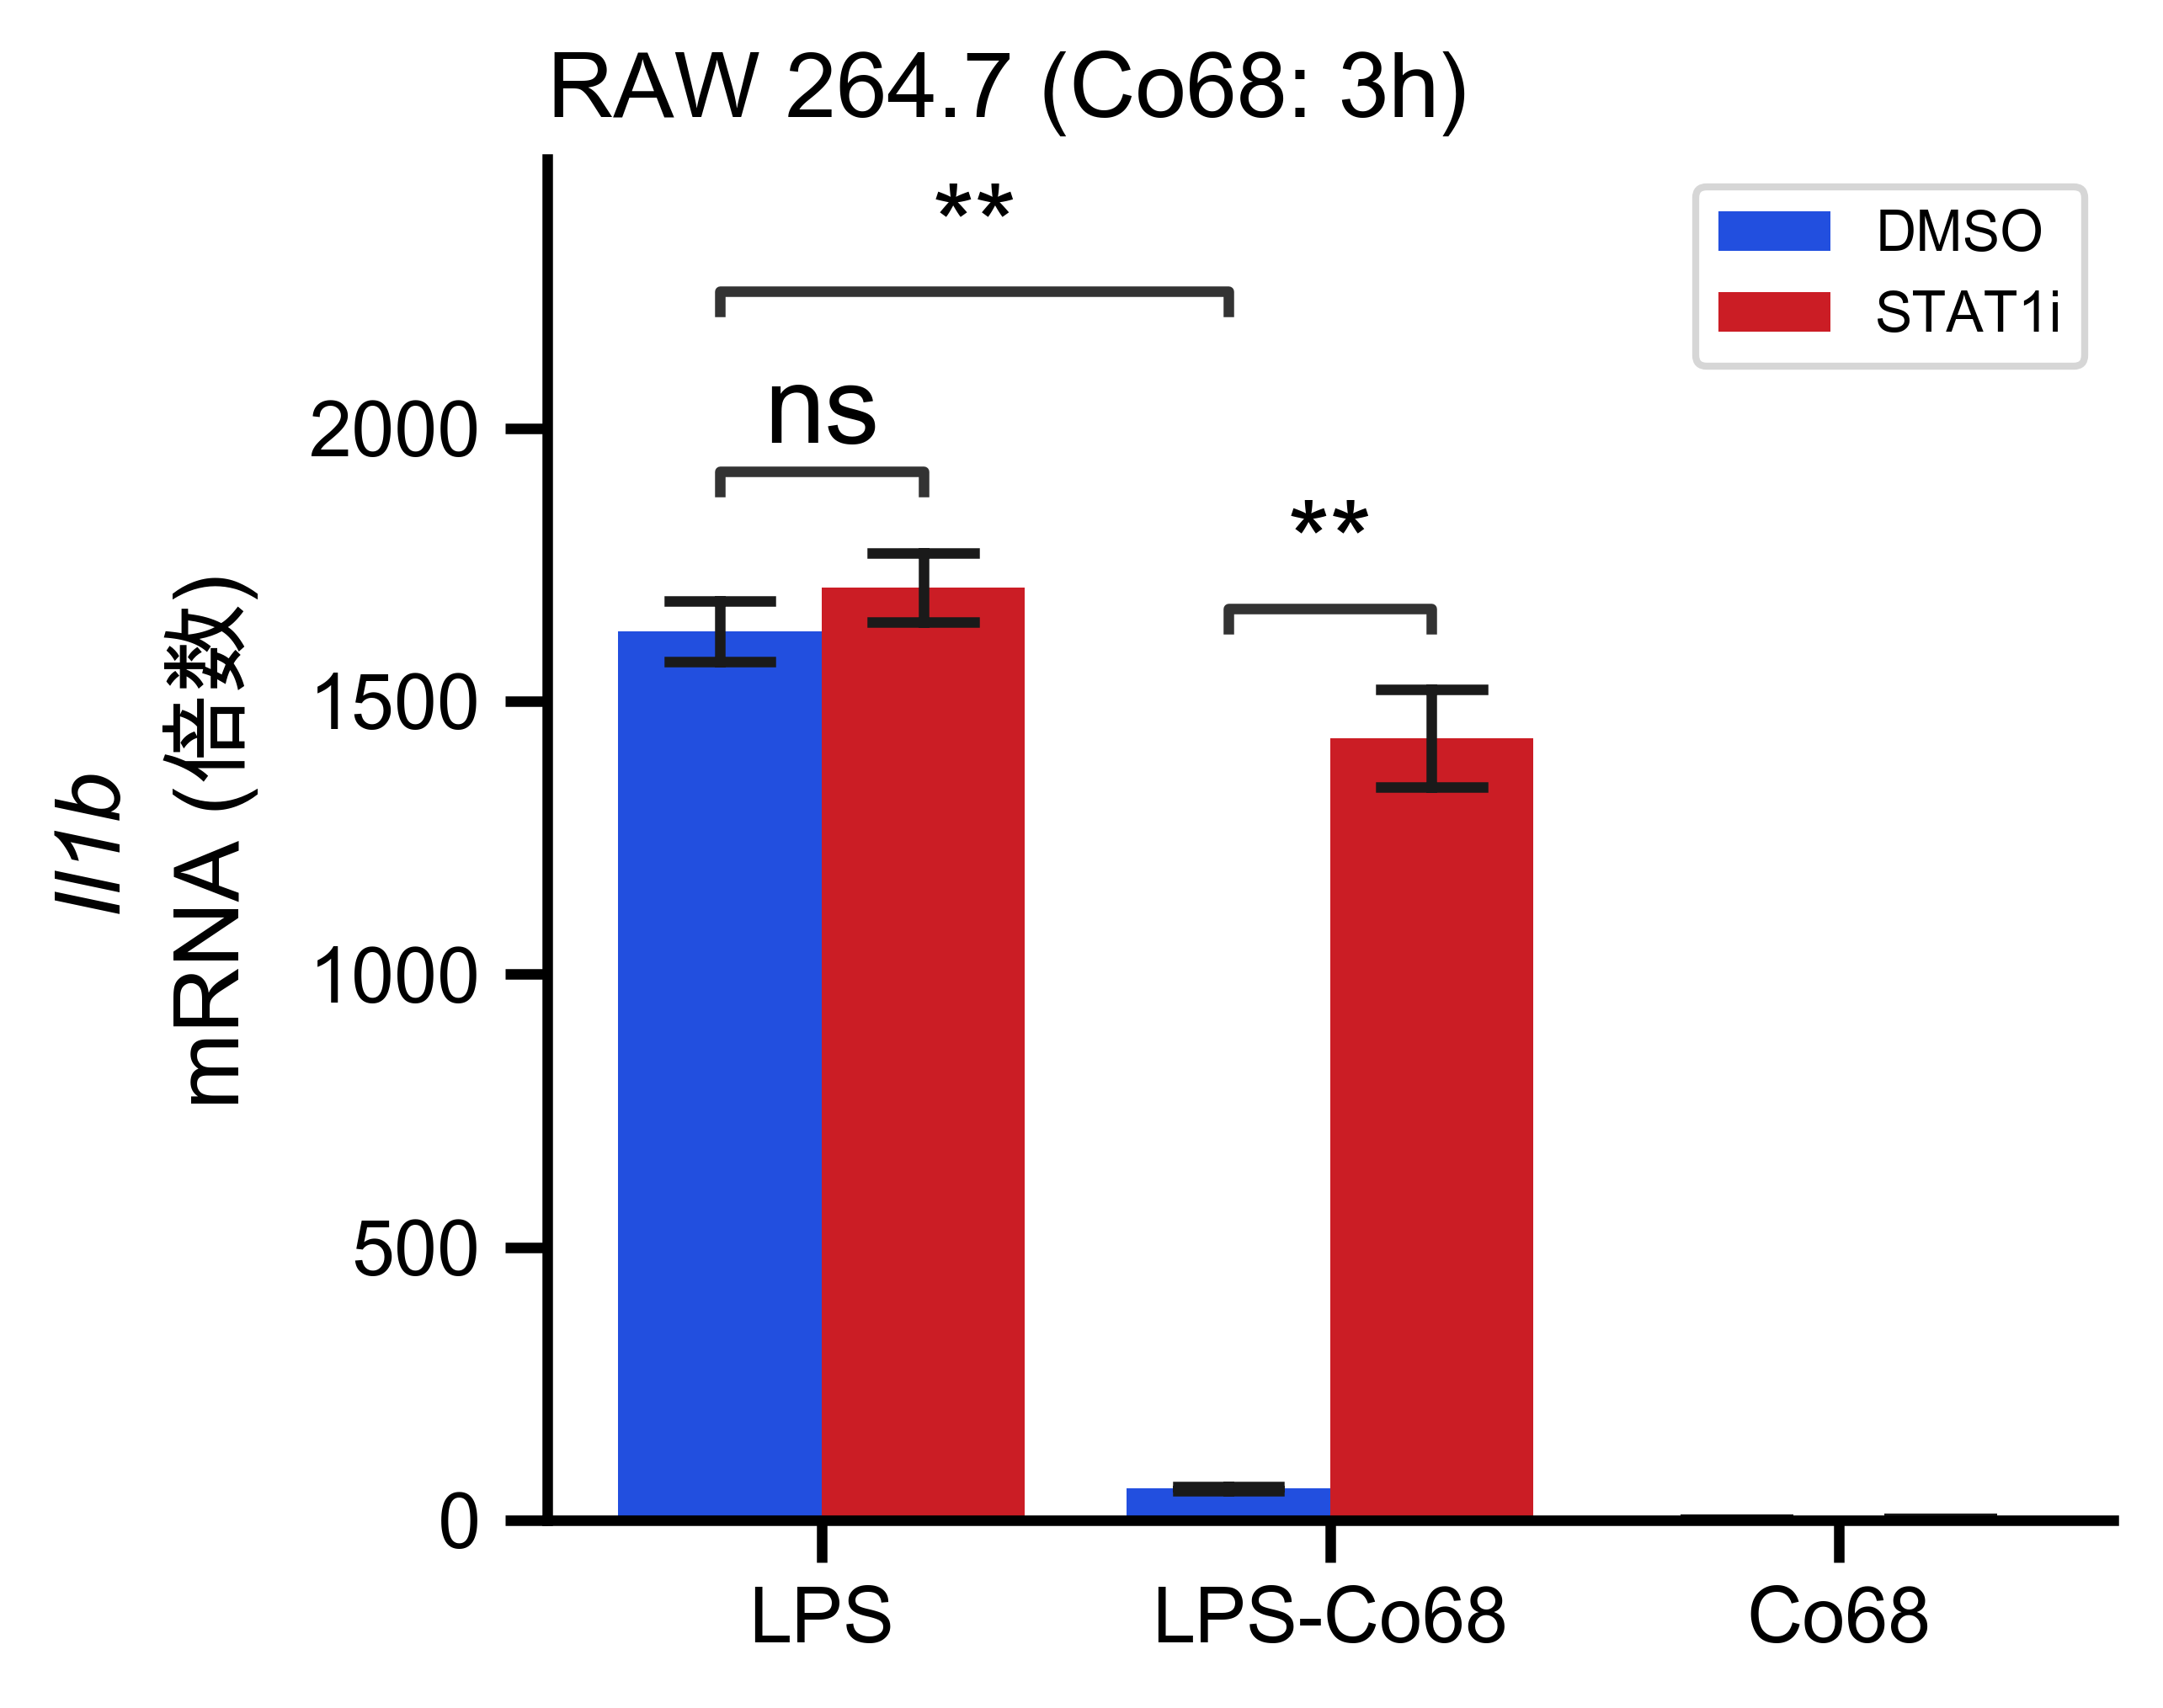

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'STAT1'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    pad = 60
    pad2 = 0.08
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/STAT1'


    fig = plt.figure(figsize=(4, 3.5), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.4, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp['group'].drop_duplicates()))), list(exp['group'].drop_duplicates()))
    
    ax.legend(loc=1, fontsize=8)
    
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    

    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )


    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    pairs=[
    (('LPS', 'DMSO'),('LPS', 'STAT1i')),
    (('LPS-Co68', 'DMSO'),('LPS-Co68', 'STAT1i')),
    (('LPS', 'DMSO'), ('LPS-Co68', 'DMSO'))
        ]

    # pairs=[
    # (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    # (('sh-Syk', 'LPS'),('sh-Syk', 'LPS-Co68')),
    # (('Scramble', 'LPS-Co68'), ('sh-Syk', 'LPS-Co68'))
    #     ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-inhibitor.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_{label}-inhibitor.csv', index=None)

In [158]:
# STAT1抑制剂实验
exp = pd.read_csv('/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/STAT1/STAT1_KD_i_Inflammation.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  804.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   63.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   49.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031    1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029    0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  997.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  937.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  932.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  878.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007    1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203    1.180430   

       group       trt  
0   Scramble       LPS  
1   Scramble       LPS  
2   Scramble  LPS-Co68  
3   Scramble  LPS-Co68  
4   Scramble      Co68  
5   Scramble      Co68  
6   sh-STAT1       LPS  
7   sh-STAT1       LPS  
8   sh-STAT1  LPS-Co68  
9   sh-STAT1  LPS-Co68  
10  sh-STAT1      Co68  
11  sh-STAT1      Co68

In [159]:
exp[['group', 'trt']] = exp[['trt', 'group']]
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  804.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   63.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   49.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031    1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029    0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  997.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  937.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  932.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  878.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007    1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203    1.180430   

       group       trt  
0        LPS  Scramble  
1        LPS  Scramble  
2   LPS-Co68  Scramble  
3   LPS-Co68  Scramble  
4       Co68  Scramble  
5       Co68  Scramble  
6        LPS  sh-STAT1  
7        LPS  sh-STAT1  
8   LPS-Co68  sh-STAT1  
9   LPS-Co68  sh-STAT1  
10      Co68  sh-STAT1  
11      Co68  sh-STAT1

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3346321561.py:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3346321561.py:26: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3346321561.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS-Co68_Scramble vs. LPS-Co68_sh-STAT1: t-test independent samples, P_val:1.083e-03 t=-3.036e+01
LPS_Scramble vs. LPS_sh-STAT1: t-test independent samples, P_val:9.867e-02 t=-2.943e+00
LPS_Scramble vs. LPS-Co68_Scramble: t-test independent samples, P_val:1.831e-03 t=2.334e+01


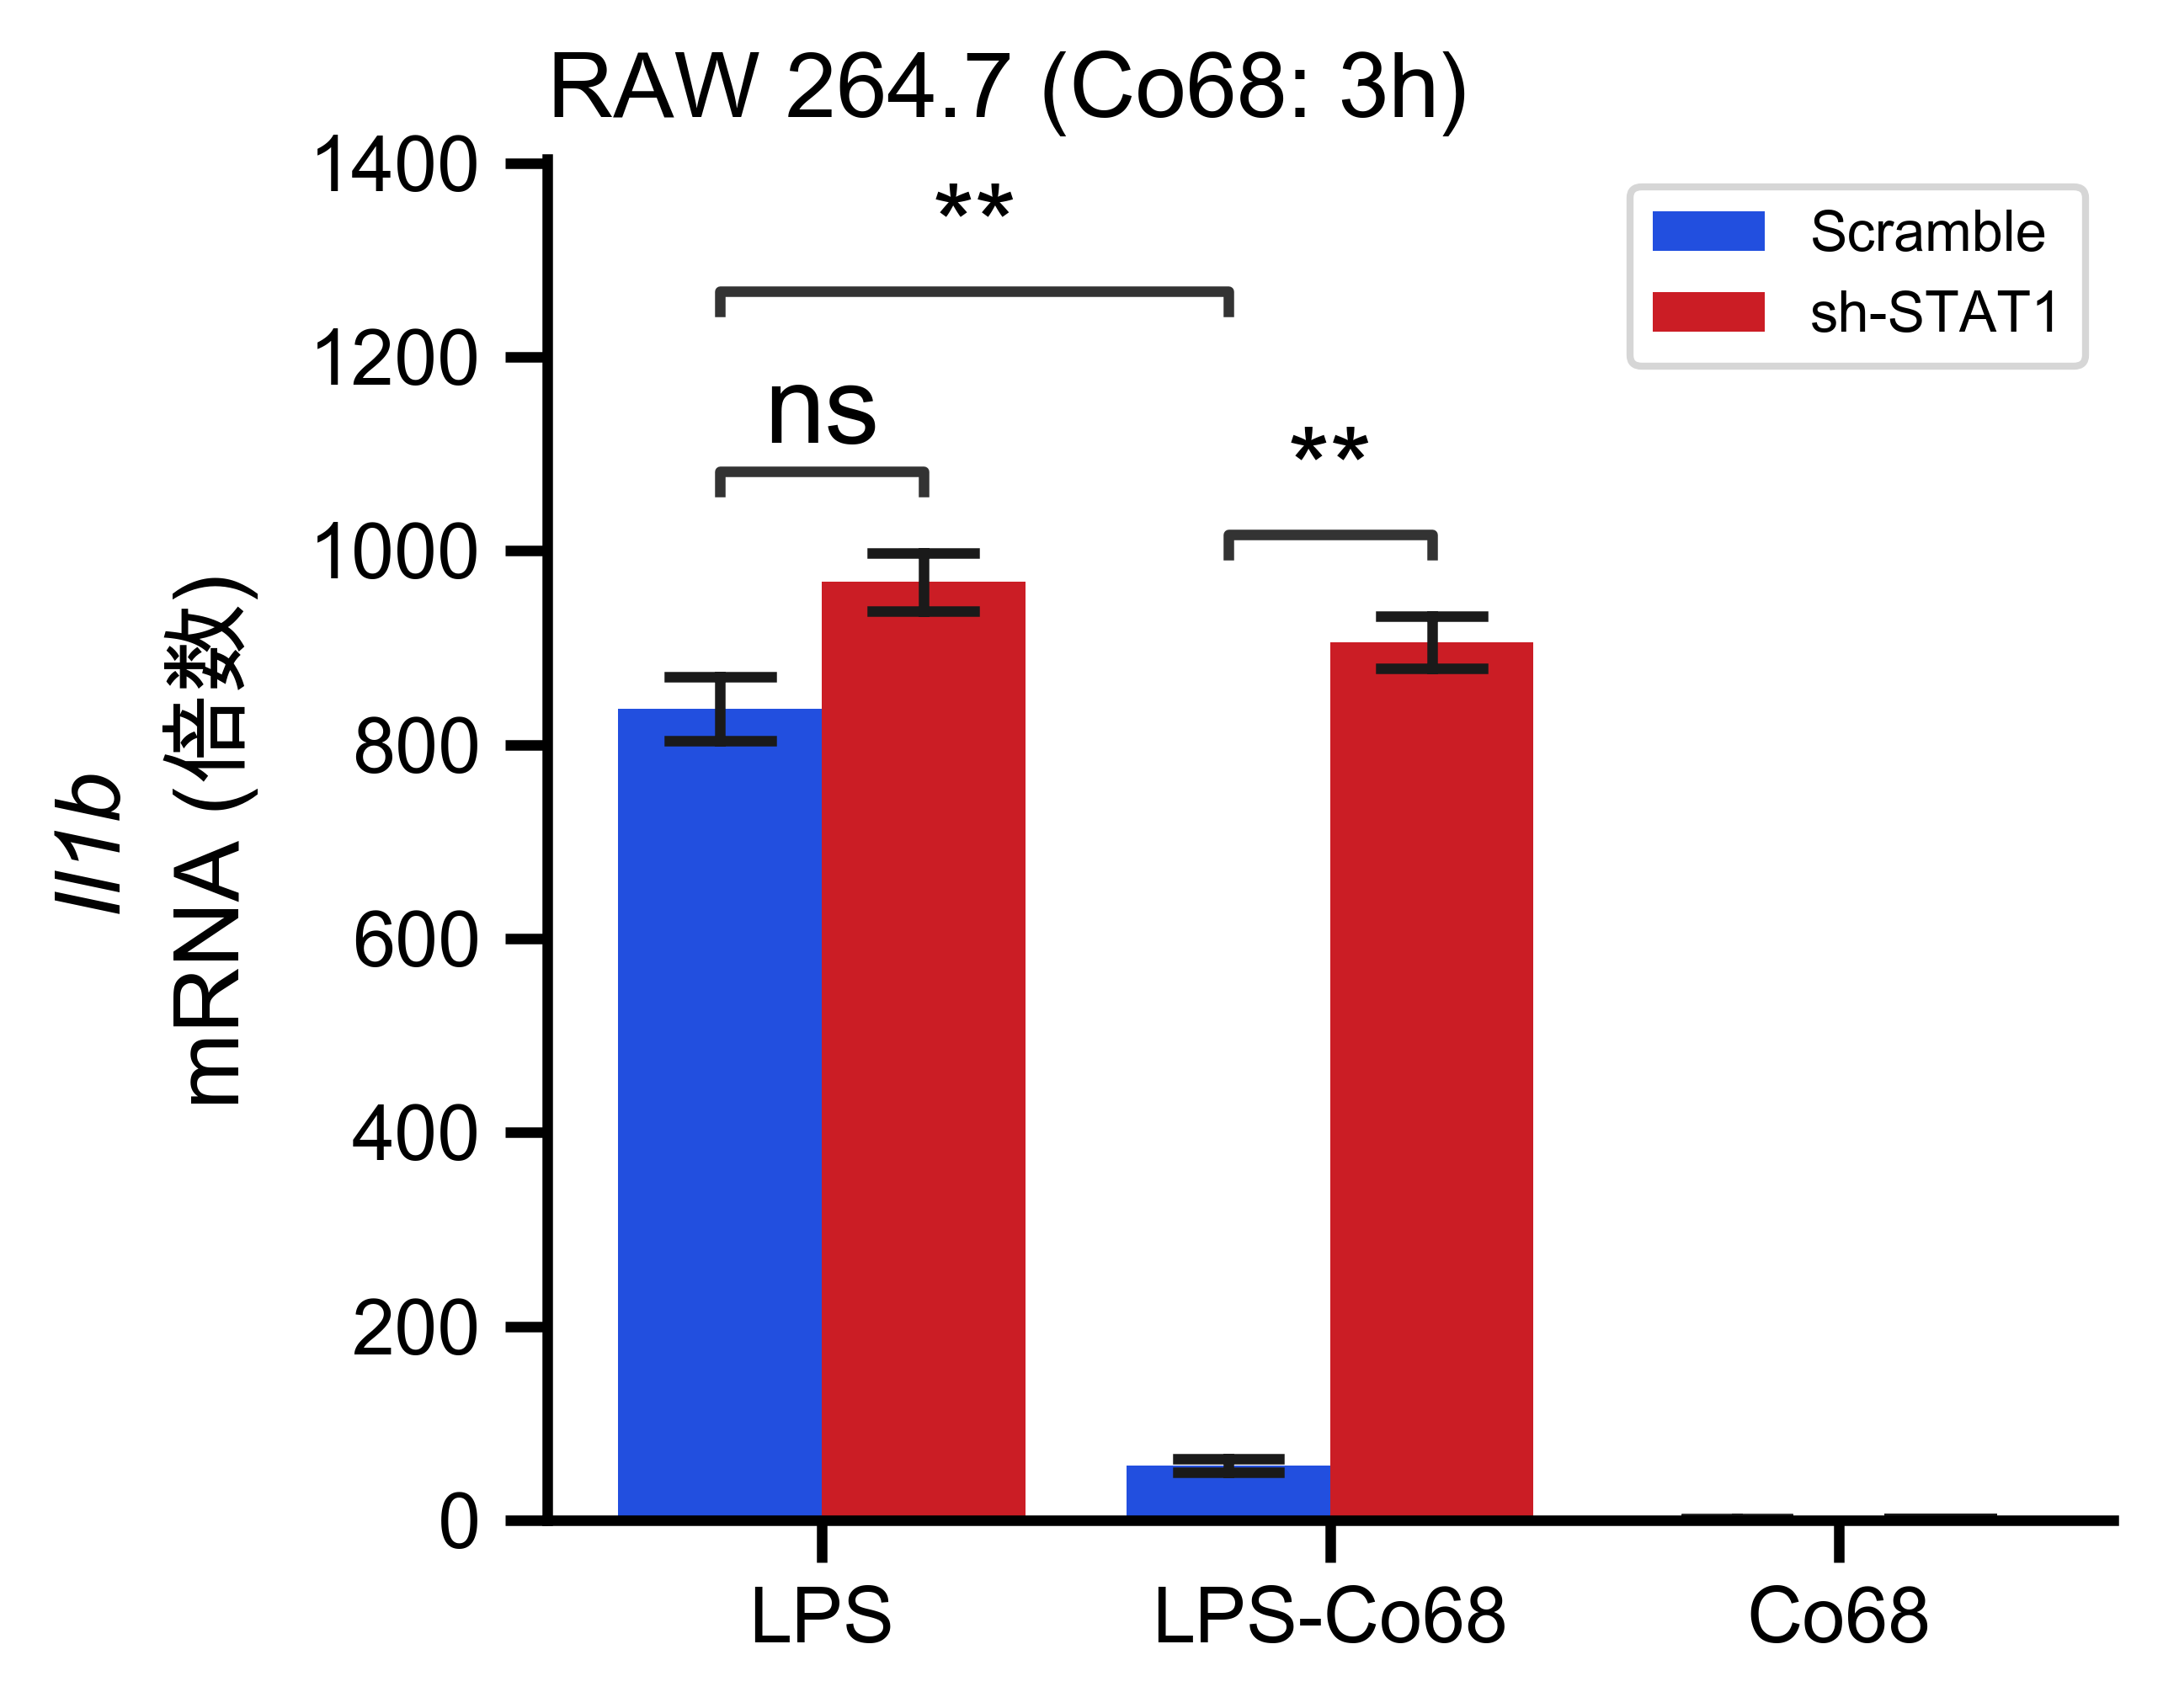

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'STAT1'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    pad = 60
    pad2 = 0.08
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/STAT1'


    fig = plt.figure(figsize=(4, 3.5), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.4, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp['group'].drop_duplicates()))), list(exp['group'].drop_duplicates()))
    
    ax.legend(loc=1, fontsize=8)
    
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    

    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )


    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    pairs=[
    (('LPS', 'Scramble'),('LPS', 'sh-STAT1')),
    (('LPS-Co68', 'Scramble'),('LPS-Co68', 'sh-STAT1')),
    (('LPS', 'Scramble'), ('LPS-Co68', 'Scramble'))
        ]

    # pairs=[
    # (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    # (('sh-Syk', 'LPS'),('sh-Syk', 'LPS-Co68')),
    # (('Scramble', 'LPS-Co68'), ('sh-Syk', 'LPS-Co68'))
    #     ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-shRNA.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_{label}-shRNA.csv', index=None)

In [162]:
exp = pd.read_csv('/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/STAT1/Co68_Il1b_RAW 264.7_STAT1-shRNA.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  804.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   63.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   49.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031    1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029    0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  997.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  937.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  932.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  878.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007    1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203    1.180430   

       group       trt  
0        LPS  Scramble  
1        LPS  Scramble  
2   LPS-Co68  Scramble  
3   LPS-Co68  Scramble  
4       Co68  Scramble  
5       Co68  Scramble  
6        LPS  sh-Stat1  
7        LPS  sh-Stat1  
8   LPS-Co68  sh-Stat1  
9   LPS-Co68  sh-Stat1  
10      Co68  sh-Stat1  
11      Co68  sh-Stat1

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/4157923134.py:26: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/4157923134.py:26: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/4157923134.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS-Co68_Scramble vs. LPS-Co68_sh-Stat1: t-test independent samples, P_val:1.083e-03 t=-3.036e+01
LPS_Scramble vs. LPS_sh-Stat1: t-test independent samples, P_val:9.867e-02 t=-2.943e+00
LPS_Scramble vs. LPS-Co68_Scramble: t-test independent samples, P_val:1.831e-03 t=2.334e+01


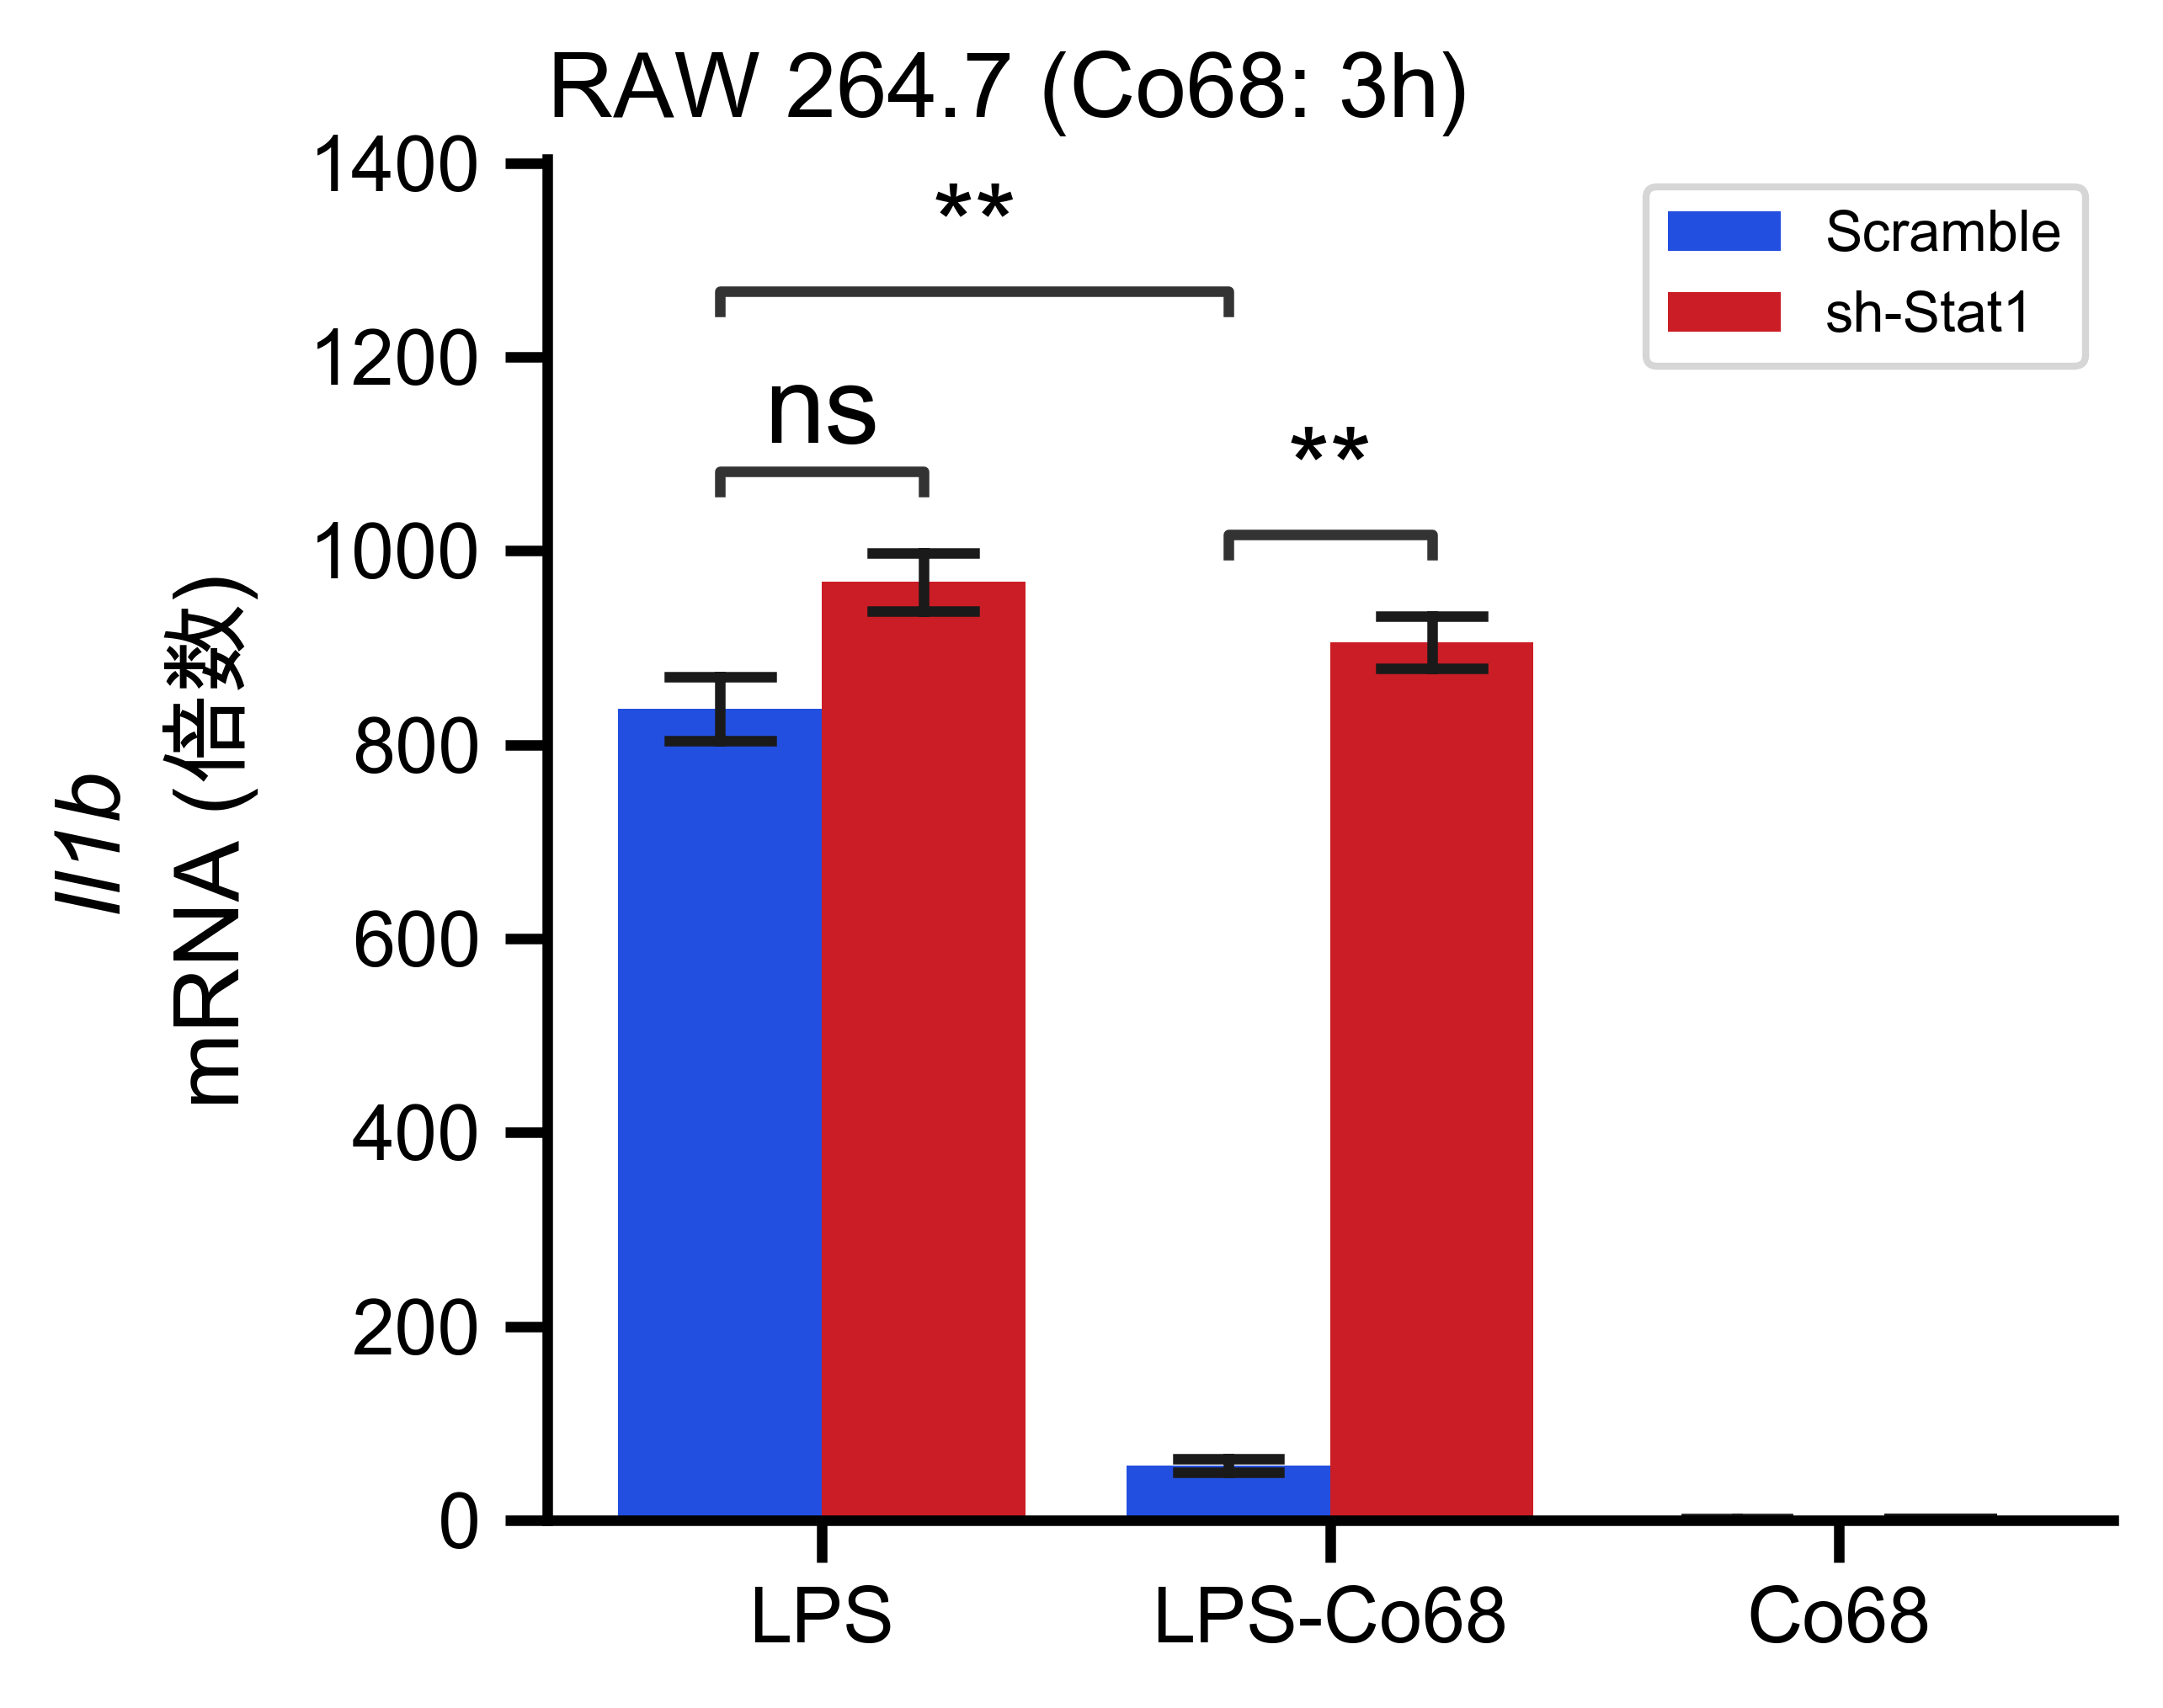

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'STAT1'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    pad = 60
    pad2 = 0.08
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/STAT1'


    fig = plt.figure(figsize=(4, 3.5), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.4, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp['group'].drop_duplicates()))), list(exp['group'].drop_duplicates()))
    
    ax.legend(loc=1, fontsize=8)
    
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    

    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )


    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    pairs=[
    (('LPS', 'Scramble'),('LPS', 'sh-Stat1')),
    (('LPS-Co68', 'Scramble'),('LPS-Co68', 'sh-Stat1')),
    (('LPS', 'Scramble'), ('LPS-Co68', 'Scramble'))
        ]

    # pairs=[
    # (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    # (('sh-Syk', 'LPS'),('sh-Syk', 'LPS-Co68')),
    # (('Scramble', 'LPS-Co68'), ('sh-Syk', 'LPS-Co68'))
    #     ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-shRNA_Stat1.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_{label}-shRNA_Stat1.csv', index=None)

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/4225890160.py:28: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/4225890160.py:28: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/4225890160.py:28: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS-Co68_Scramble vs. LPS-Co68_sh-Syk: t-test independent samples, P_val:1.313e-03 t=-2.757e+01
LPS_Scramble vs. LPS_sh-Syk: t-test independent samples, P_val:1.803e-01 t=-2.024e+00
LPS_Scramble vs. LPS-Co68_Scramble: t-test independent samples, P_val:1.658e-03 t=2.453e+01


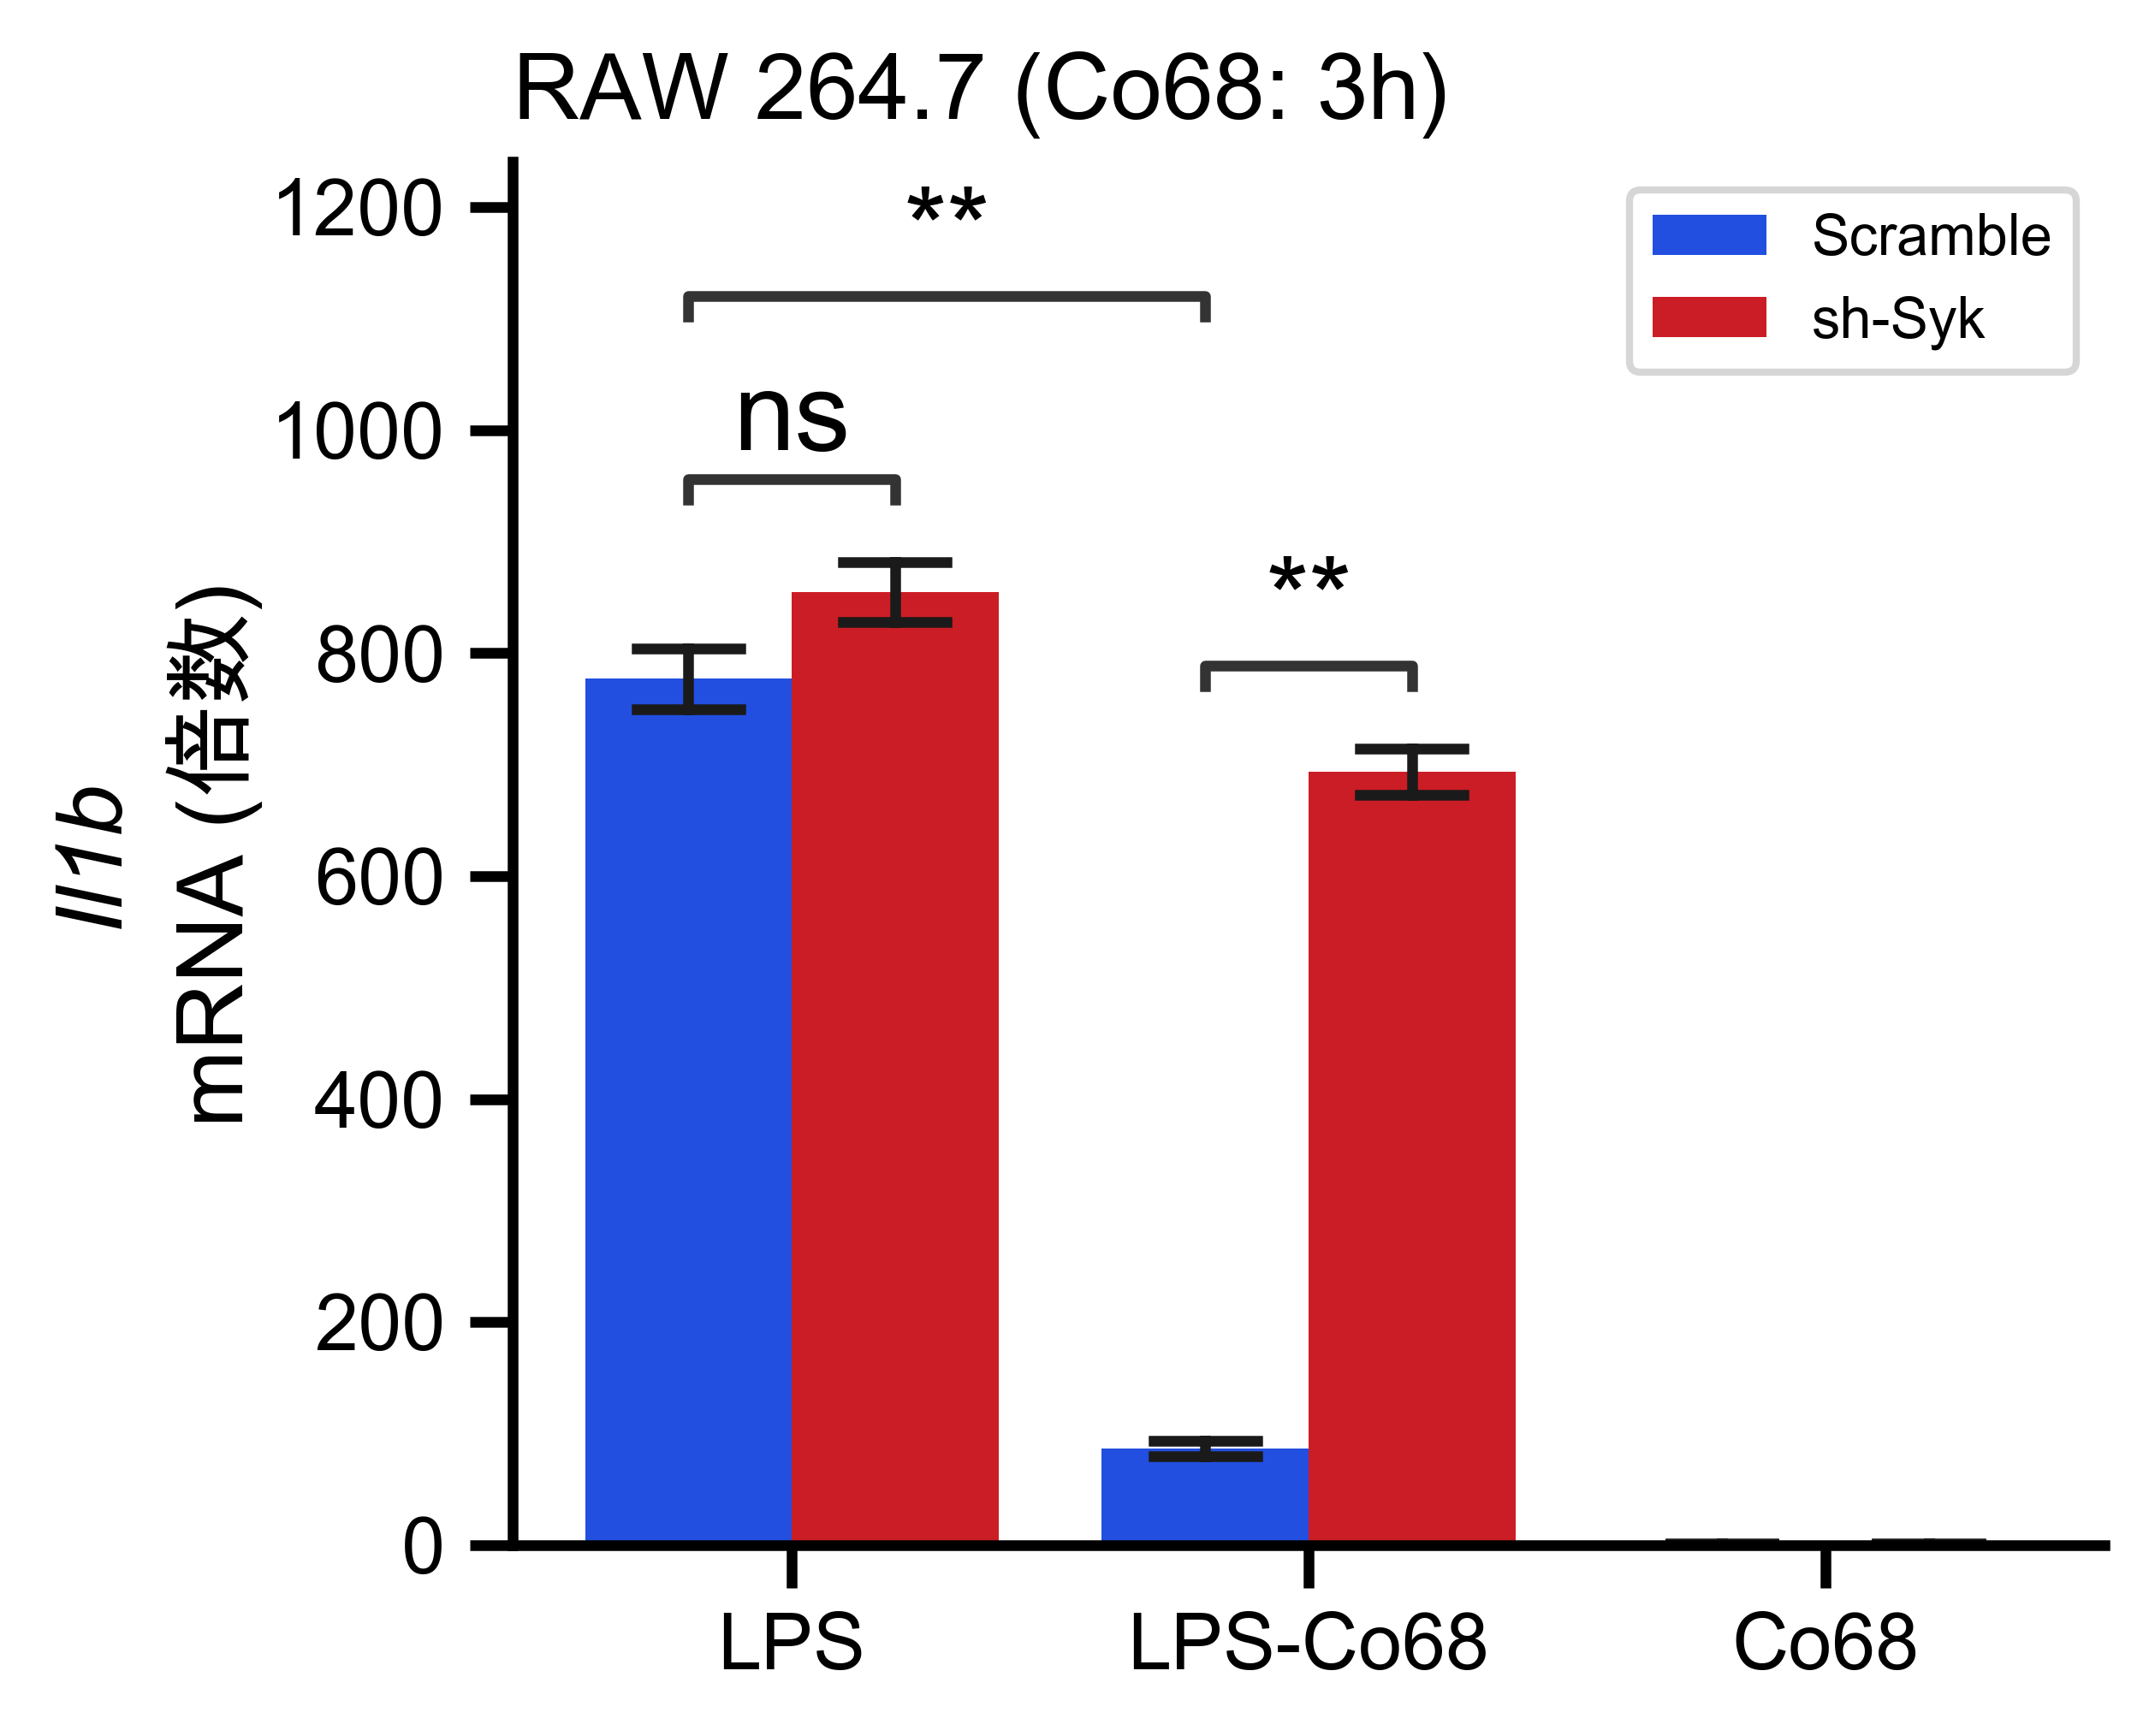

In [ ]:
# 分层三变量分析
# 中文版本
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/stat1/lastData'

with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'SYK'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    pad = 60
    pad2 = 0.08
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/SYK'


    fig = plt.figure(figsize=(4, 3.5), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.4, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp['group'].drop_duplicates()))), list(exp['group'].drop_duplicates()))
    
    ax.legend(loc=1, fontsize=8)
    
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    

    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - pad2


    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )


    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    pairs=[
    (('LPS', 'Scramble'),('LPS', 'sh-Syk')),
    (('LPS-Co68', 'Scramble'),('LPS-Co68', 'sh-Syk')),
    (('LPS', 'Scramble'), ('LPS-Co68', 'Scramble'))
        ]

    # pairs=[
    # (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    # (('sh-Syk', 'LPS'),('sh-Syk', 'LPS-Co68')),
    # (('Scramble', 'LPS-Co68'), ('sh-Syk', 'LPS-Co68'))
    #     ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-KO_SYK.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_{label}-KO_SYK.csv', index=None)

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1440629286.py:25: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/1440629286.py:25: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.barplot(data=exp, y=y, x=x, hue='trt',


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Syk_Scramble vs. Syk_shRNA: t-test independent samples, P_val:8.488e-03 t=1.079e+01
Stat1_Scramble vs. Stat1_shRNA: t-test independent samples, P_val:4.300e-03 t=1.520e+01


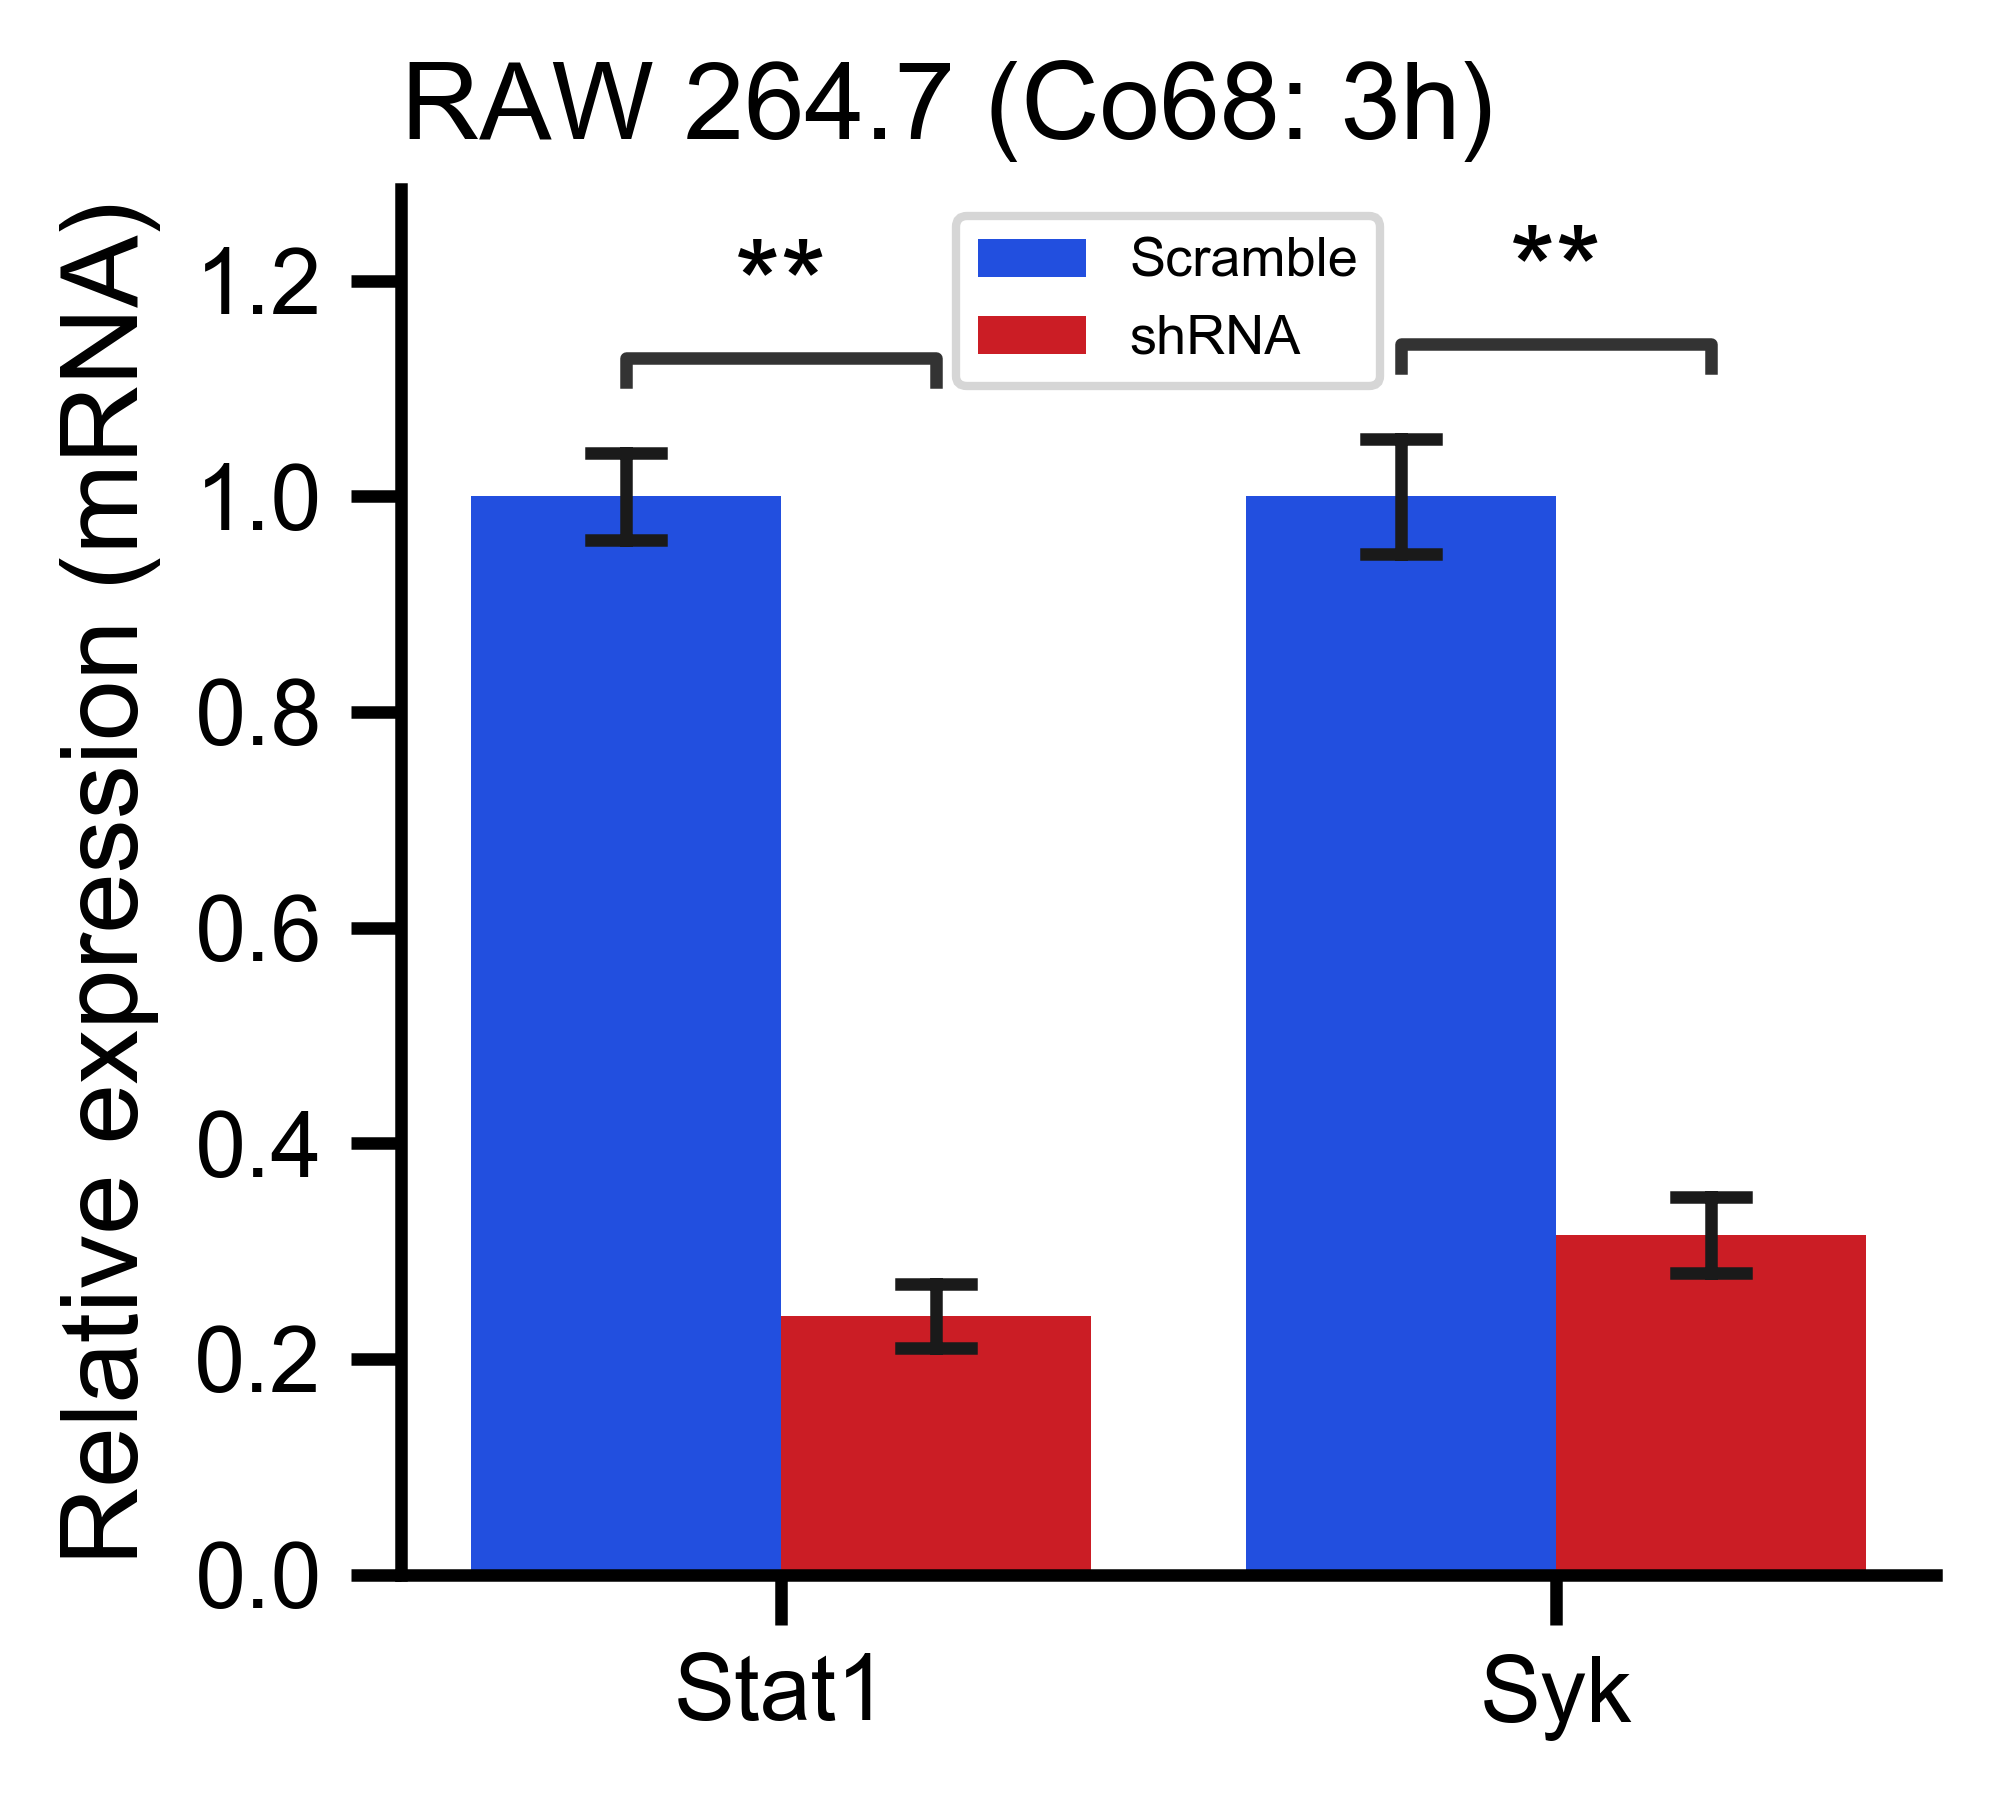

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 多维二分类
with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='fc'
    gene = 'Relative expression (mRNA)'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/stat1'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F10_STAT1/qPCR/shRNA'

    # outDir = os.getcwd()


    fig = plt.figure(figsize=(3.3, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    
    ax.legend(loc=0, fontsize=6.5)

    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()))
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('Stat1', 'Scramble'),('Stat1', 'shRNA')),
    (('Syk', 'Scramble'),('Syk', 'shRNA')),
    # (('FGR', 'Scramble'),('FGR', 'shRNA')),
    # (('FYN', 'Scramble'),('FYN', 'shRNA'))
        ]

    # # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    # #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # # ]、
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
exp.to_csv(f'{outDir}/Co68_{gene}_{cells}_shRNA.csv', index=None)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_shRNA.pdf', dpi=700, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SYK_Scramble vs. SYK_shRNA: t-test independent samples, P_val:8.488e-03 t=1.079e+01
STAT1_Scramble vs. STAT1_shRNA: t-test independent samples, P_val:4.300e-03 t=1.520e+01
FGR_Scramble vs. FGR_shRNA: t-test independent samples, P_val:7.661e-03 t=1.136e+01
FYN_Scramble vs. FYN_shRNA: t-test independent samples, P_val:6.360e-03 t=1.248e+01


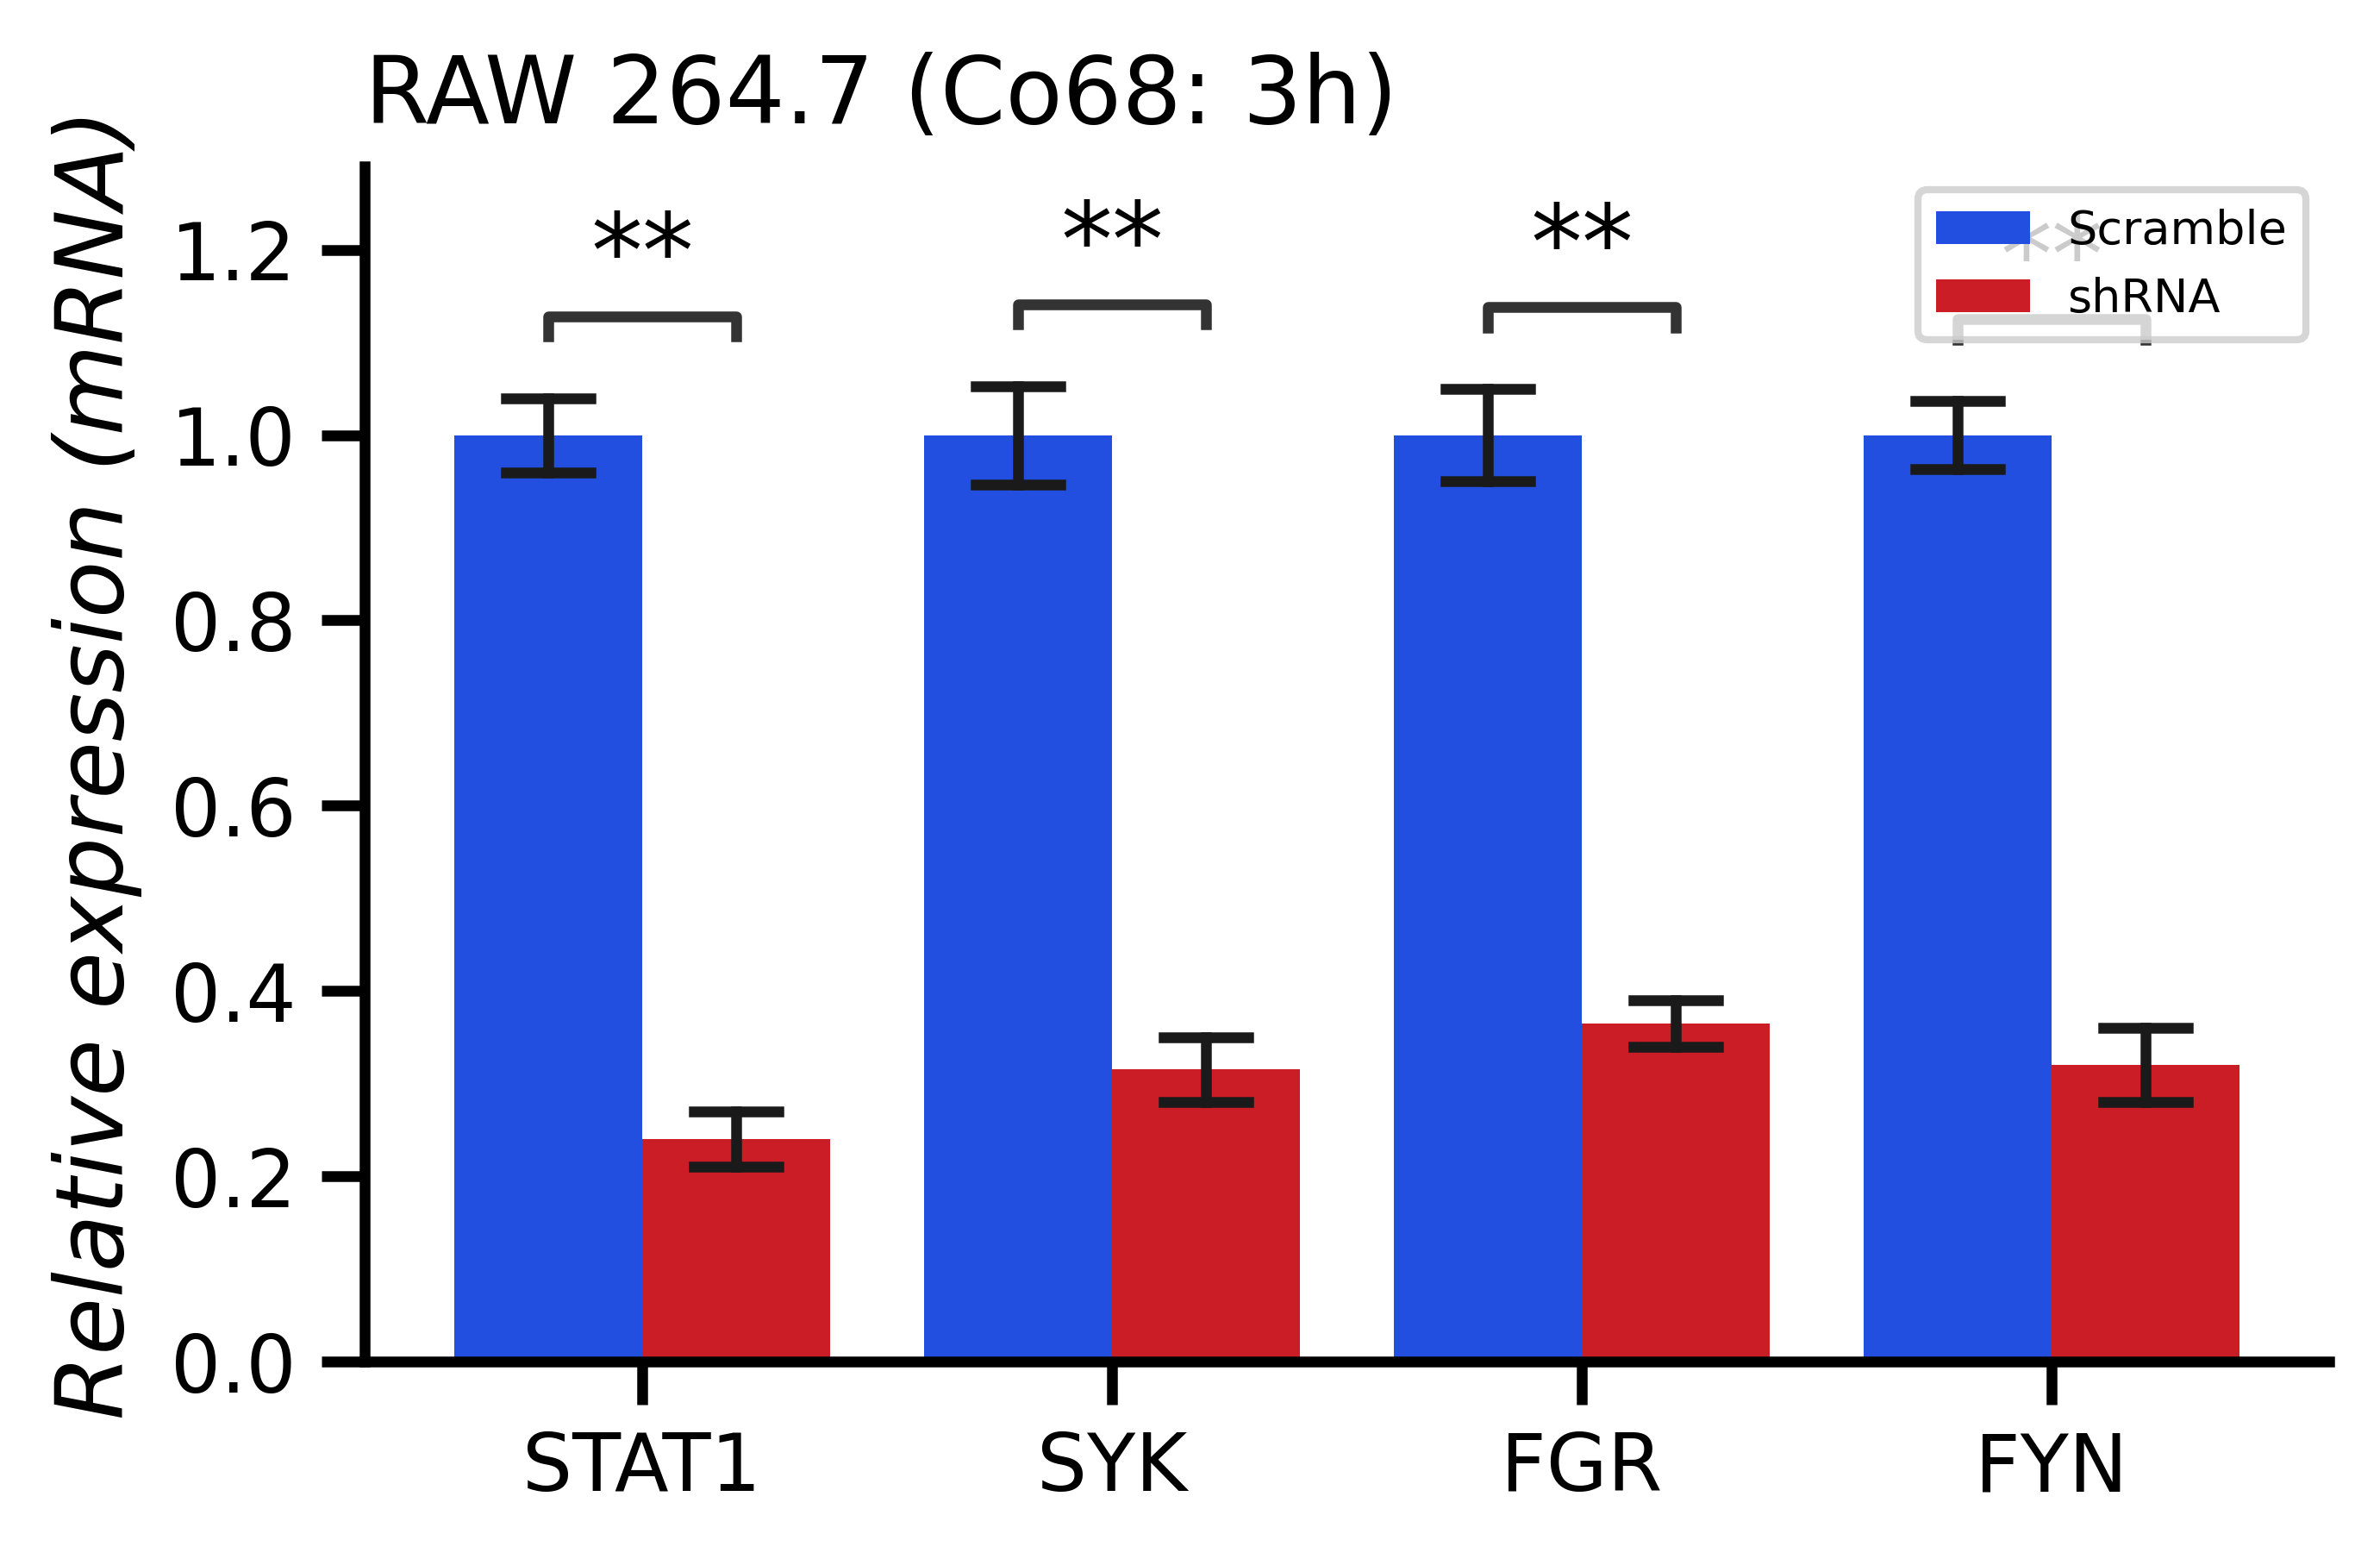

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# 多维二分类
with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='fc'
    gene = 'Relative expression (mRNA)'
    cells = 'RAW 264.7'
    outDir = '/Users/fenn/Documents/Co68/qPCR/stat1'

    # outDir = os.getcwd()


    fig = plt.figure(figsize=(4.9, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    
    ax.legend(loc=1, fontsize=6.5)

    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()))
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('STAT1', 'Scramble'),('STAT1', 'shRNA')),
    (('SYK', 'Scramble'),('SYK', 'shRNA')),
    # (('FGR', 'Scramble'),('FGR', 'shRNA')),
    # (('FYN', 'Scramble'),('FYN', 'shRNA'))
        ]

    # # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    # #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # # ]、
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_antiInflammation_2024-12-09.pdf', dpi=700, bbox_inches='tight')

In [1]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/stat1/lastData')
os.listdir()

['Co68_Il1b_RAW 264.7_FGR-shRNA.pdf',
 'Fgr_KD_i_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_FYN-SFKi.pdf',
 'SFKs_inhibitor_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_SYK-shRNA.pdf',
 'STAT1_KD_i_Inflammation.csv',
 'Fgr_Fyn_KD_i_Inflammation_2024-12-09.csv',
 'Co68_Il1b_RAW 264.7_SYK-shRNA_SYK_last.pdf',
 '2024-12-09_Co68_Il1b_RAW 264.7_Fgr-Fyn-shRNA_LYNi.pdf',
 'Fyn_KD_i_Inflammation.csv',
 '2024-12-09_Co68_Il1b_RAW 264.7_LYN-shRNA_LYNi.pdf',
 'Lyn_inhibitor_Inflammation.csv',
 'SYK_KD_i_Inflammation.csv',
 'STAT1_inhibitor_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_STAT1i.pdf',
 'Co68_Il1b_RAW 264.7_FYN-shRNA.pdf',
 'Co68_Il1b_RAW 264.7_STAT1-shRNA.pdf',
 'Lyn_KD_i_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_LYN-shRNA_LYNi.pdf']

In [ ]:
# /Users/fenn/Documents/Co68/qPCR/qPCR/stat1/lastData/Lyn_inhibitor_Inflammation.csv

In [231]:
exp = pd.read_csv('Fgr_Fyn_KD_i_Inflammation_2024-12-09.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow           fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  1769.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  1904.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   373.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   319.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031     1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029     0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  1581.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  1478.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  1322.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  1211.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007     0.839117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203     1.180430   
12                    LPS  IL1B  21.61  17.29  -4.32  0.050067  1581.896511   
13                    LPS  IL1B  21.80  17.30  -4.50  0.044194  1657.728158   
14               LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833   612.806322   
15               LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735   689.608161   
16  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007     0.839117   
17  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203     1.180430   

       group       trt  
0   Scramble       LPS  
1   Scramble       LPS  
2   Scramble  LPS-Co68  
3   Scramble  LPS-Co68  
4   Scramble      Co68  
5   Scramble      Co68  
6     sh-FGR       LPS  
7     sh-FGR       LPS  
8     sh-FGR  LPS-Co68  
9     sh-FGR  LPS-Co68  
10    sh-FGR      Co68  
11    sh-FGR      Co68  
12    sh-FYN       LPS  
13    sh-FYN       LPS  
14    sh-FYN  LPS-Co68  
15    sh-FYN  LPS-Co68  
16    sh-FYN      Co68  
17    sh-FYN      Co68

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

sh-FYN_LPS vs. sh-FYN_LPS-Co68: t-test independent samples, P_val:3.090e-03 t=1.795e+01
Scramble_LPS vs. Scramble_LPS-Co68: t-test independent samples, P_val:2.356e-03 t=2.057e+01
sh-FGR_LPS vs. sh-FGR_LPS-Co68: t-test independent samples, P_val:7.399e-02 t=3.469e+00
Scramble_LPS-Co68 vs. sh-FGR_LPS-Co68: t-test independent samples, P_val:4.472e-03 t=-1.490e+01
Scramble_LPS-Co68 vs. sh-FYN_LPS-Co68: t-test independent samples, P_val:2.288e-02 t=-6.497e+00


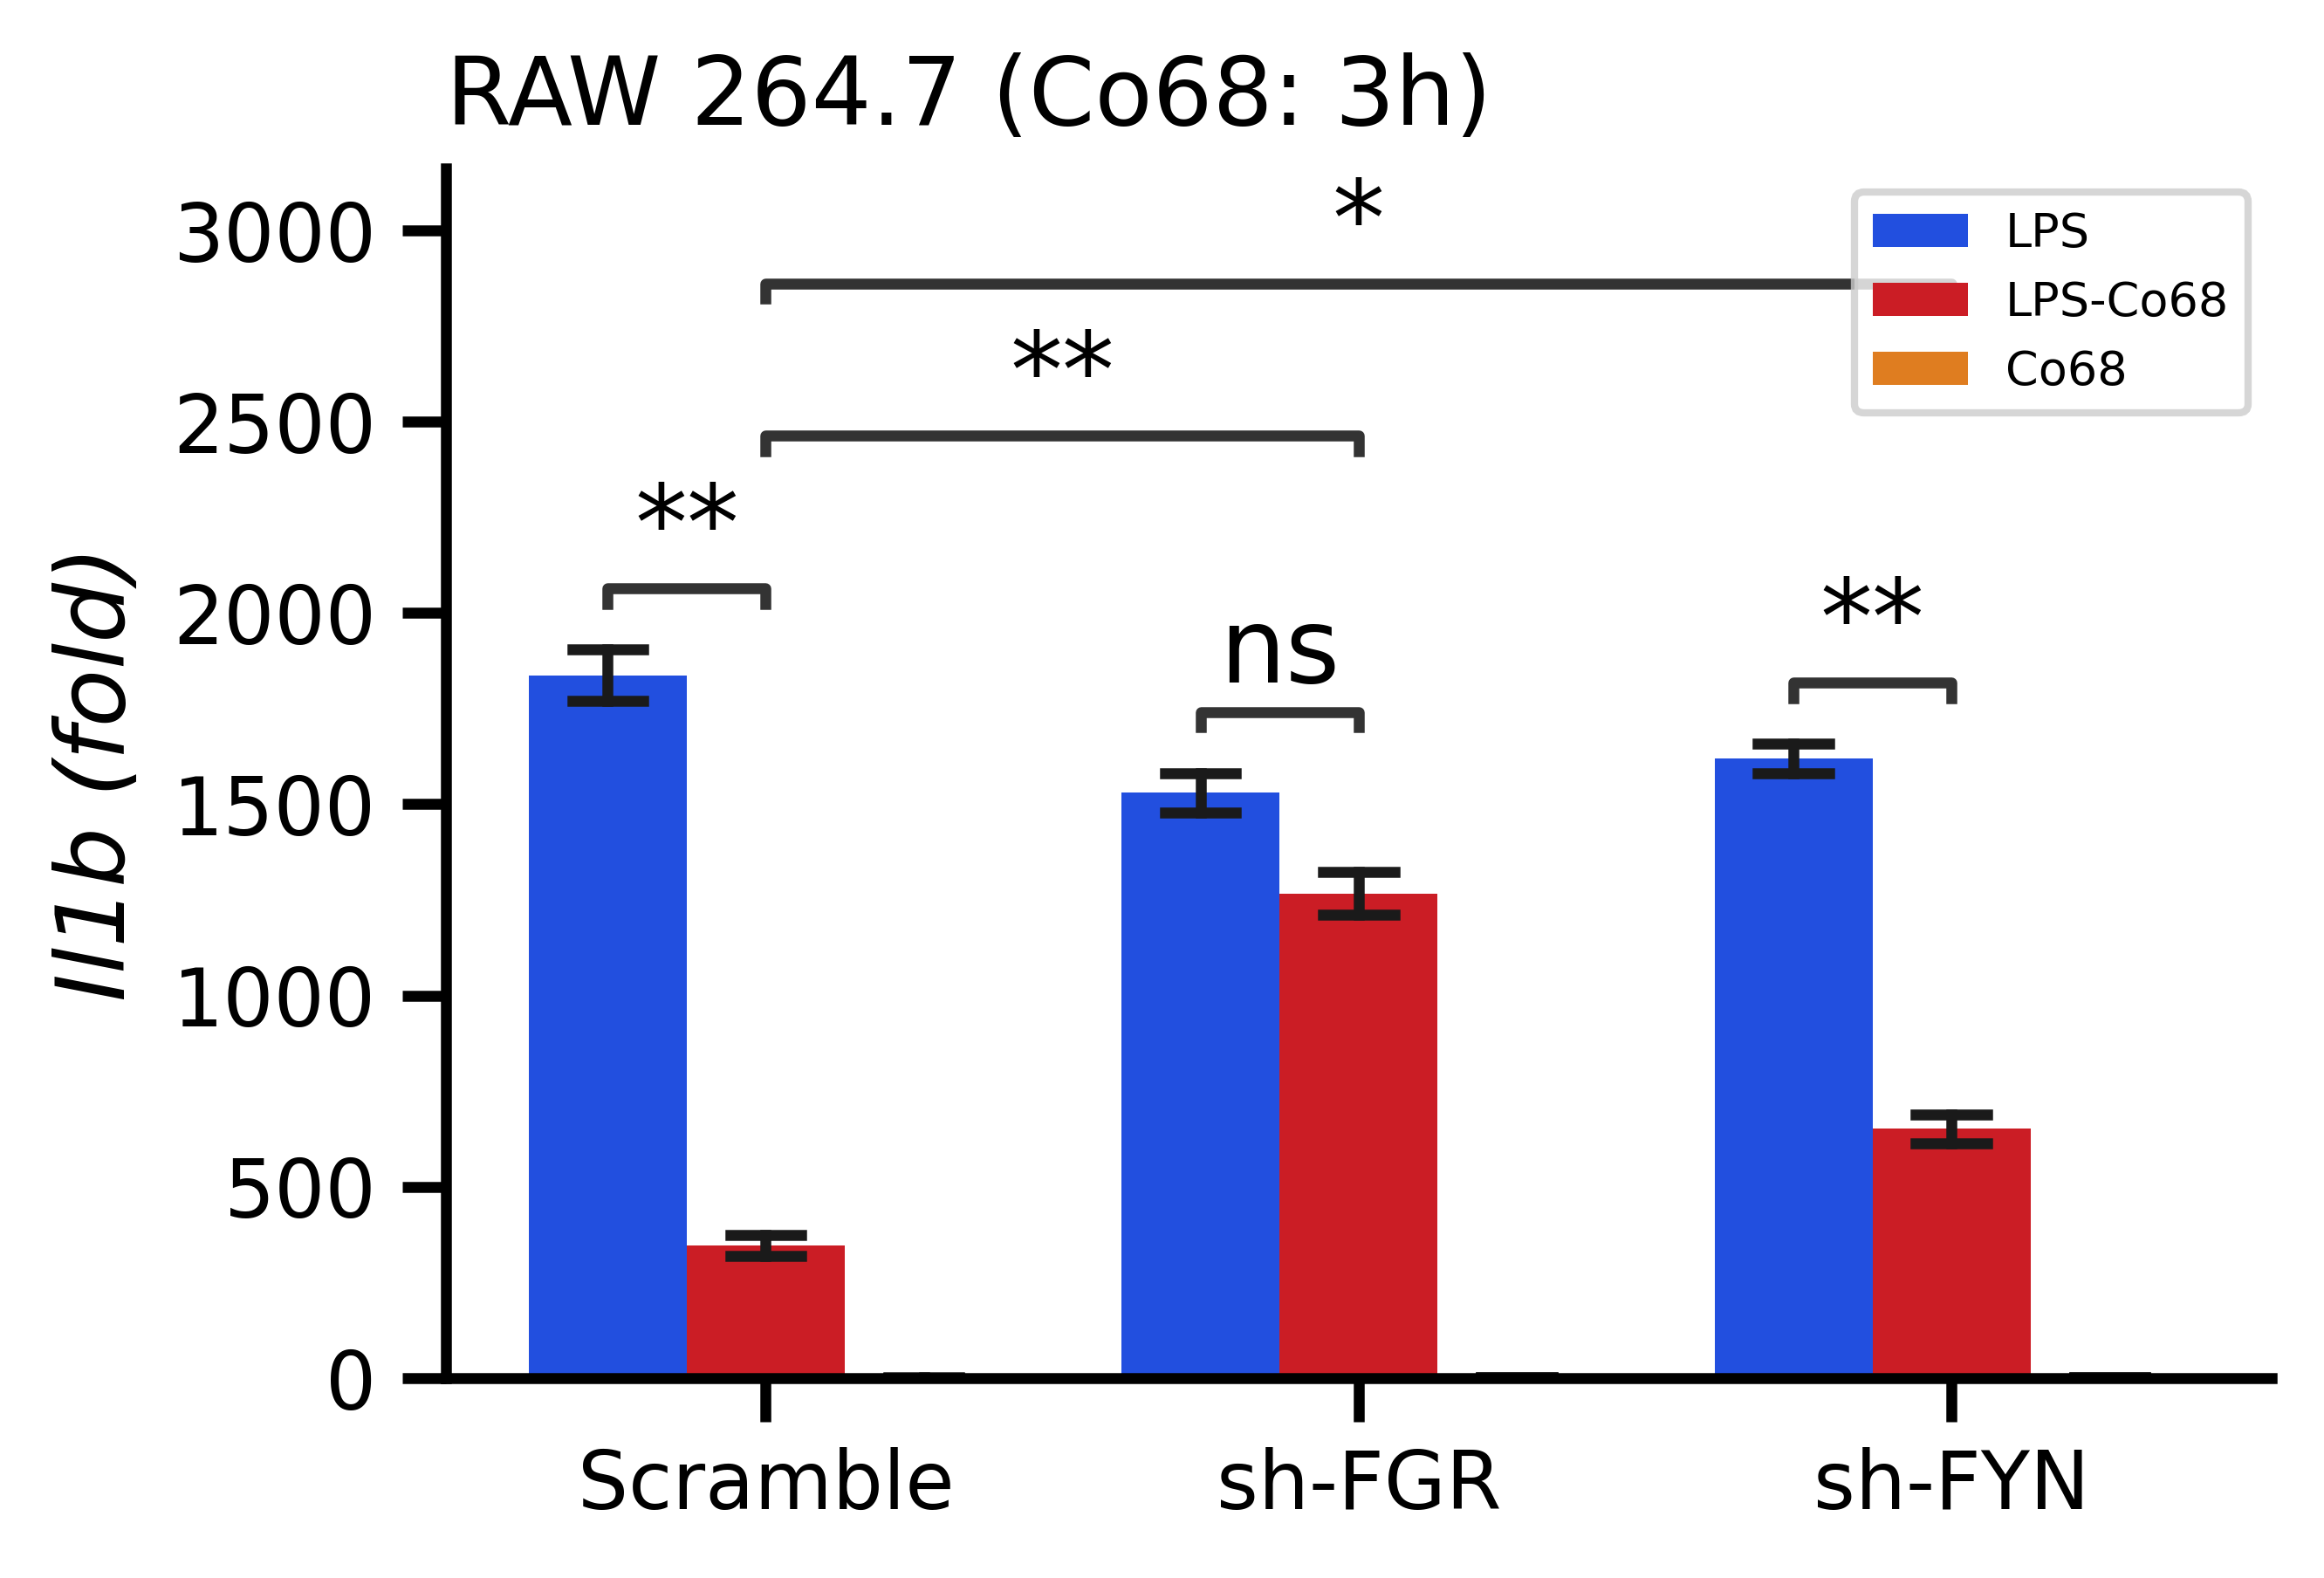

In [232]:
# 分层三变量分析
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'Fgr-Fyn'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    outDir = os.getcwd()

    trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    a = list(trt)

    fig = plt.figure(figsize=(4.5, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.12, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    
    ax.legend(loc=1, fontsize=6.5)

    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()))
  
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    (('sh-FYN', 'LPS'),('sh-FYN', 'LPS-Co68')),
    (('Scramble', 'LPS-Co68'), ('sh-FYN', 'LPS-Co68')),
    (('sh-FGR', 'LPS'),('sh-FGR', 'LPS-Co68')),
    (('Scramble', 'LPS-Co68'), ('sh-FGR', 'LPS-Co68'))
        ]

    # pairs=[
    # (('DMSO', 'LPS'),('DMSO', 'LPS-Co68')),
    # (('LYNi', 'LPS'),('LYNi', 'LPS-Co68')),
    # (('DMSO', 'LPS-Co68'), ('LYNi', 'LPS-Co68'))
    #     ]

    # # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    # #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/2024-12-09_Co68_{gene}_{cells}_{label}-shRNA_LYNi.pdf', dpi=700, bbox_inches='tight')

In [13]:
import pandas as pd
exp = pd.read_csv('SYK_KD_i_Inflammation.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  749.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  804.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   93.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   79.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031    1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029    0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  881.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  827.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  872.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  814.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007    0.839117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203    1.180430   

       group       trt  
0   Scramble       LPS  
1   Scramble       LPS  
2   Scramble  LPS-Co68  
3   Scramble  LPS-Co68  
4   Scramble      Co68  
5   Scramble      Co68  
6     sh-Syk       LPS  
7     sh-Syk       LPS  
8     sh-Syk  LPS-Co68  
9     sh-Syk  LPS-Co68  
10    sh-Syk      Co68  
11    sh-Syk      Co68

In [21]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Scramble_LPS vs. Scramble_LPS-Co68: t-test independent samples, P_val:1.658e-03 t=2.453e+01
sh-Syk_LPS vs. sh-Syk_LPS-Co68: t-test independent samples, P_val:8.062e-01 t=2.794e-01
Scramble_LPS-Co68 vs. sh-Syk_LPS-Co68: t-test independent samples, P_val:1.557e-03 t=-2.531e+01


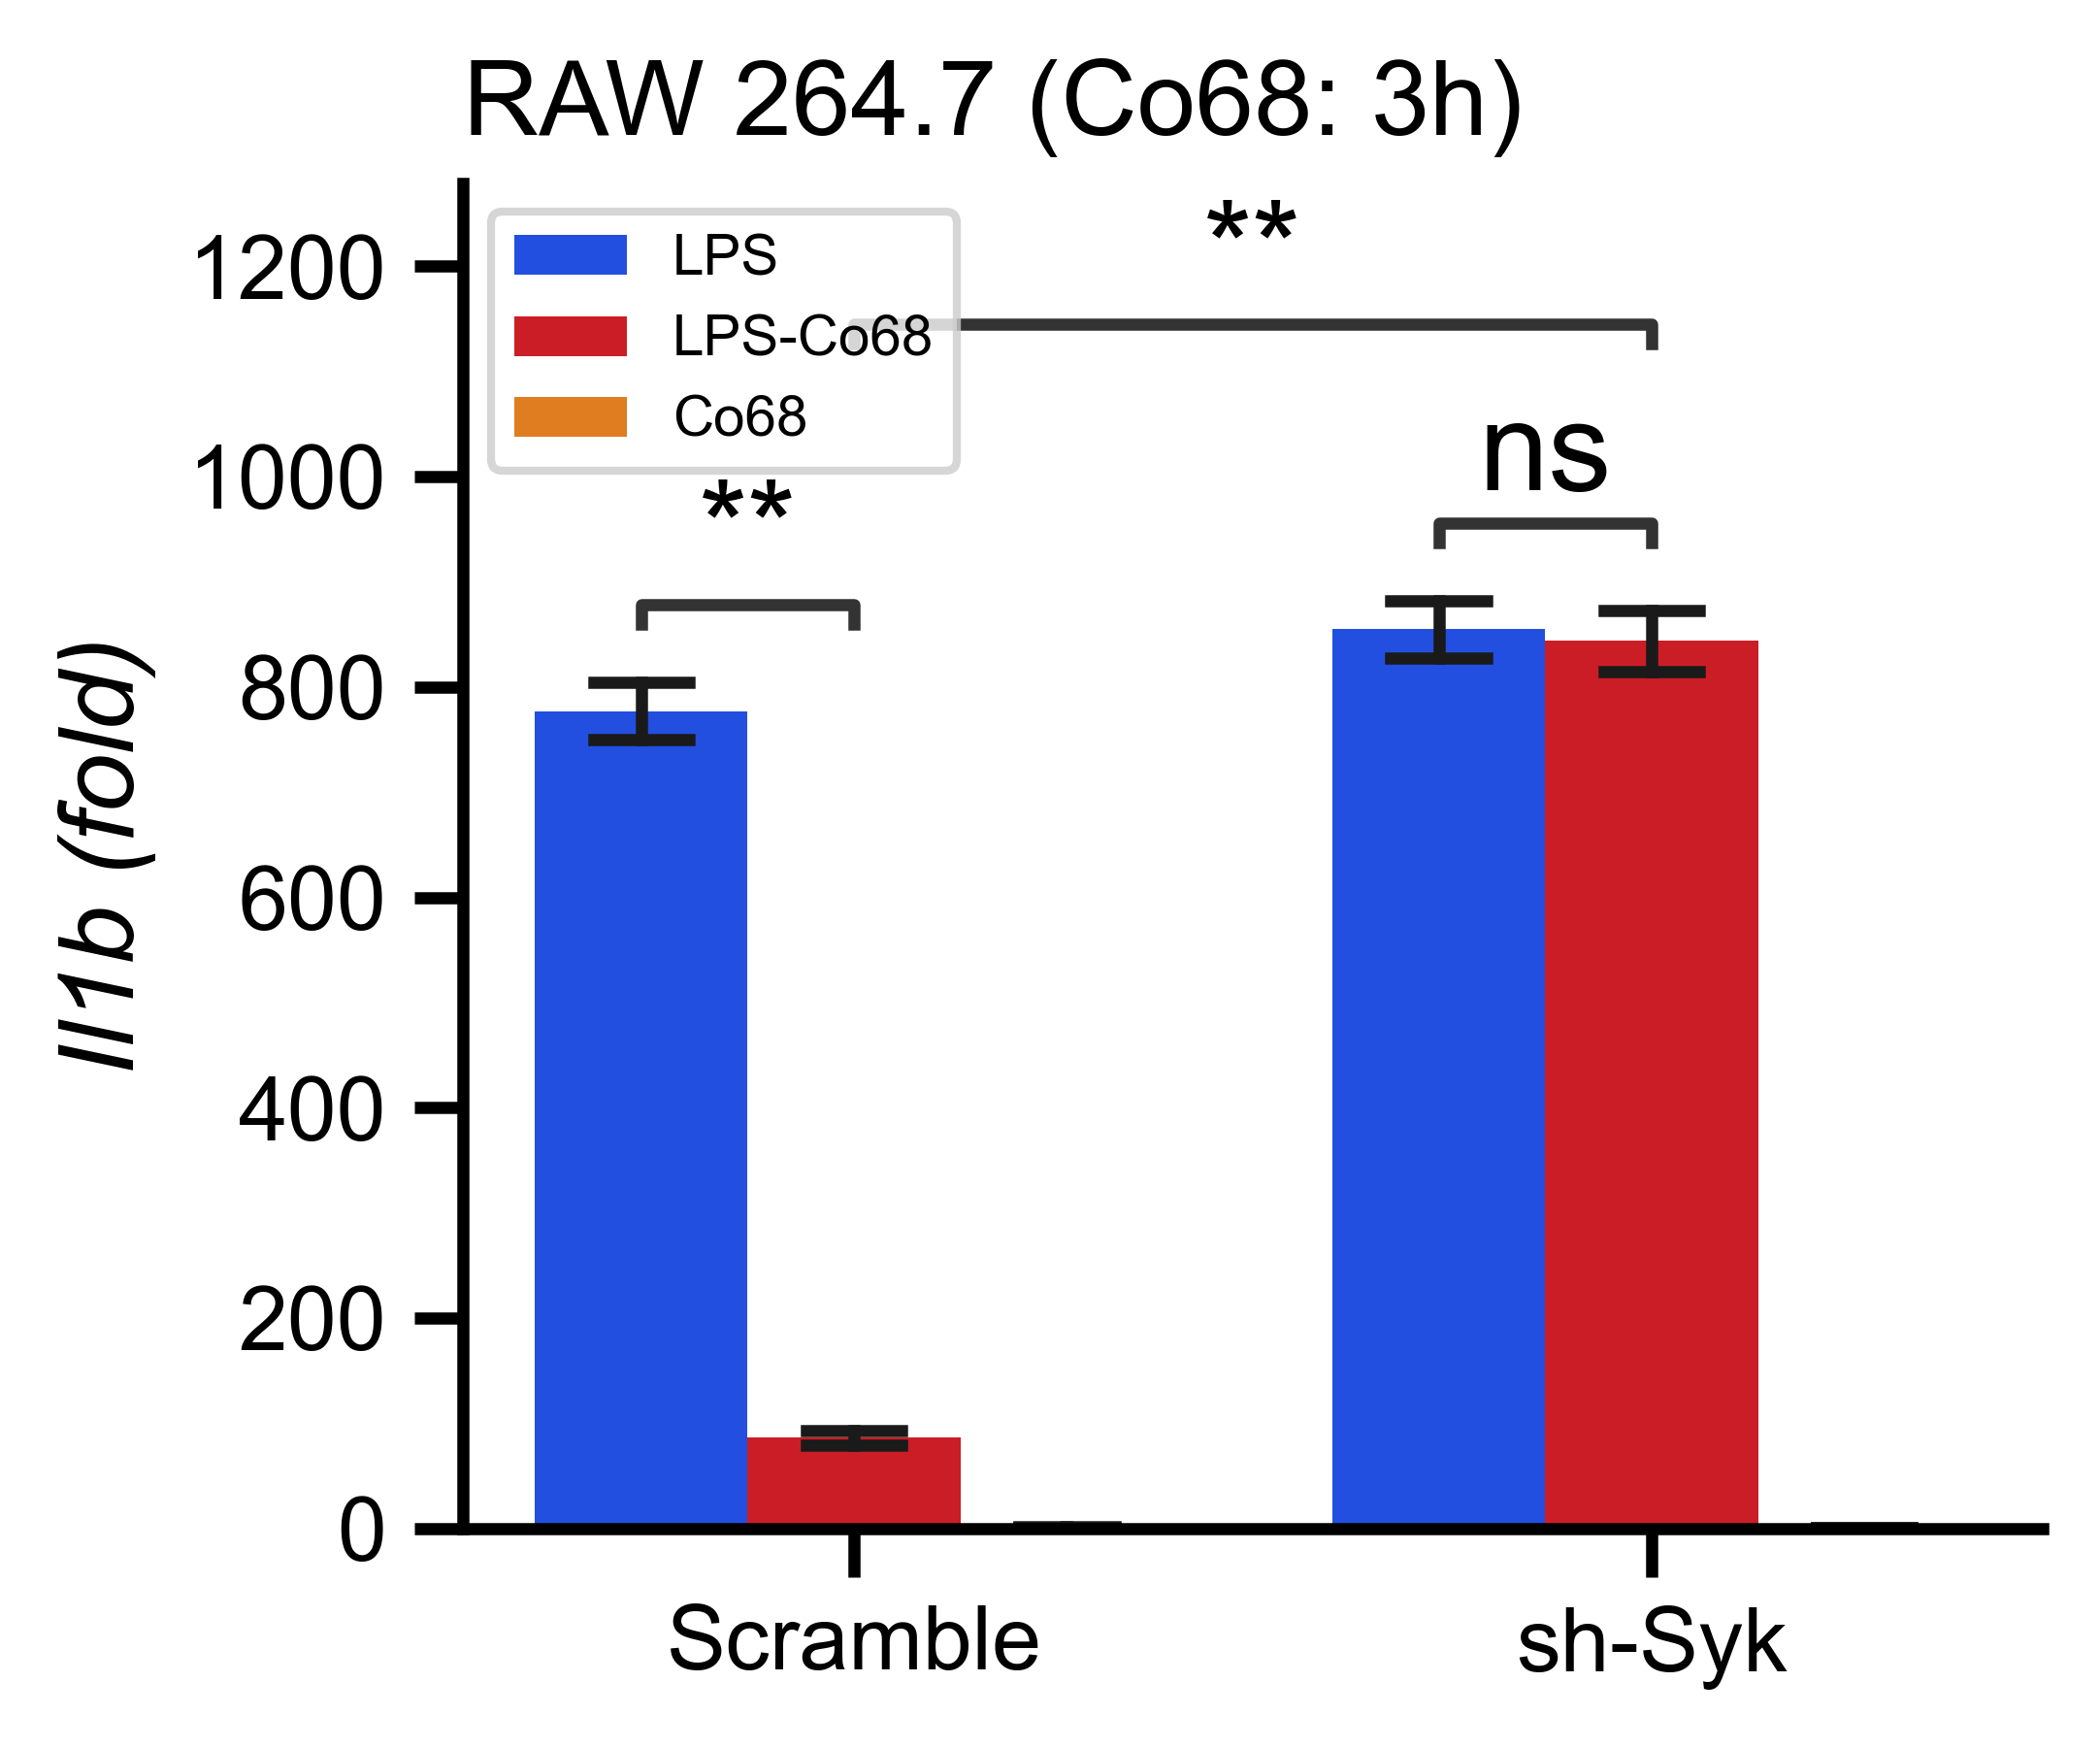

In [22]:
# 分层三变量分析
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/stat1/lastData'

with sns.plotting_context('notebook', font_scale=1.3):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'SYK'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    outDir = os.getcwd()


    fig = plt.figure(figsize=(3.5, 3), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.12, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    # ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()))
    
    ax.legend(loc=2, fontsize=7)
    
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    


    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
     
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('Scramble', 'LPS'),('Scramble', 'LPS-Co68')),
    (('sh-Syk', 'LPS'),('sh-Syk', 'LPS-Co68')),
    (('Scramble', 'LPS-Co68'), ('sh-Syk', 'LPS-Co68'))
        ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-shRNA_SYK.pdf', dpi=700, bbox_inches='tight')

In [36]:
os.listdir()

['Co68_Il1b_RAW 264.7_FGR-shRNA.pdf',
 'Fgr_KD_i_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_FYN-SFKi.pdf',
 'SFKs_inhibitor_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_SYK-shRNA.pdf',
 'STAT1_KD_i_Inflammation.csv',
 'Fgr_Fyn_KD_i_Inflammation_2024-12-09.csv',
 'Co68_Il1b_RAW 264.7_SYK-shRNA_SYK_last.pdf',
 '2024-12-09_Co68_Il1b_RAW 264.7_Fgr-Fyn-shRNA_LYNi.pdf',
 'Fyn_KD_i_Inflammation.csv',
 '2024-12-09_Co68_Il1b_RAW 264.7_LYN-shRNA_LYNi.pdf',
 'Lyn_inhibitor_Inflammation.csv',
 'SYK_KD_i_Inflammation.csv',
 'STAT1_inhibitor_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_STAT1i.pdf',
 'Co68_Il1b_RAW 264.7_FYN-shRNA.pdf',
 'Co68_Il1b_RAW 264.7_STAT1-shRNA.pdf',
 'Co68_Il1b_RAW 264.7_SYK-shRNA_SYK.pdf',
 'SYK_KO_i_Inflammation.csv',
 'Lyn_KD_i_Inflammation.csv',
 'Co68_Il1b_RAW 264.7_LYN-shRNA_LYNi.pdf']

In [38]:
exp = pd.read_csv('SYK_KO_i_Inflammation.csv')
exp

样本名称  检测项目     CT   ACTB   diff       pow           fc  \
0                    DMSO  IL1B  32.74  17.77 -14.97  0.000031  2869.728158   
1                    DMSO  IL1B  33.52  17.82 -15.70  0.000019  2604.296422   
2                    Co68  IL1B  32.36  17.59 -14.77  0.000036   333.343001   
3                    Co68  IL1B  33.36  17.60 -15.76  0.000018   399.431967   
4                STAT1-KD  IL1B  32.37  17.39 -14.98  0.000031     1.247735   
5                STAT1-KD  IL1B  32.46  17.41 -15.05  0.000029     0.752265   
6                     LPS  IL1B  21.61  17.29  -4.32  0.050067  2897.896511   
7                     LPS  IL1B  21.80  17.30  -4.50  0.044194  2737.728158   
8                LPS_Co68  IL1B  29.36  19.13 -10.23  0.000833  2732.806322   
9                LPS_Co68  IL1B  29.59  19.18 -10.41  0.000735  2578.608161   
10  LPS_Co68_STAT1-iAT1-i  IL1B  23.20  16.82  -6.38  0.012007     1.239117   
11  LPS_Co68_STAT1-iAT1-i  IL1B  23.30  16.82  -6.48  0.011203     1.180430   

     group       trt  
0       WT       LPS  
1       WT       LPS  
2       WT  LPS-Co68  
3       WT  LPS-Co68  
4       WT      Co68  
5       WT      Co68  
6   SYK KO       LPS  
7   SYK KO       LPS  
8   SYK KO  LPS-Co68  
9   SYK KO  LPS-Co68  
10  SYK KO      Co68  
11  SYK KO      Co68

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WT_LPS vs. WT_LPS-Co68: t-test independent samples, P_val:3.312e-03 t=1.733e+01
SYK KO_LPS vs. SYK KO_LPS-Co68: t-test independent samples, P_val:2.821e-01 t=1.458e+00
WT_LPS-Co68 vs. SYK KO_LPS-Co68: t-test independent samples, P_val:1.340e-03 t=-2.729e+01


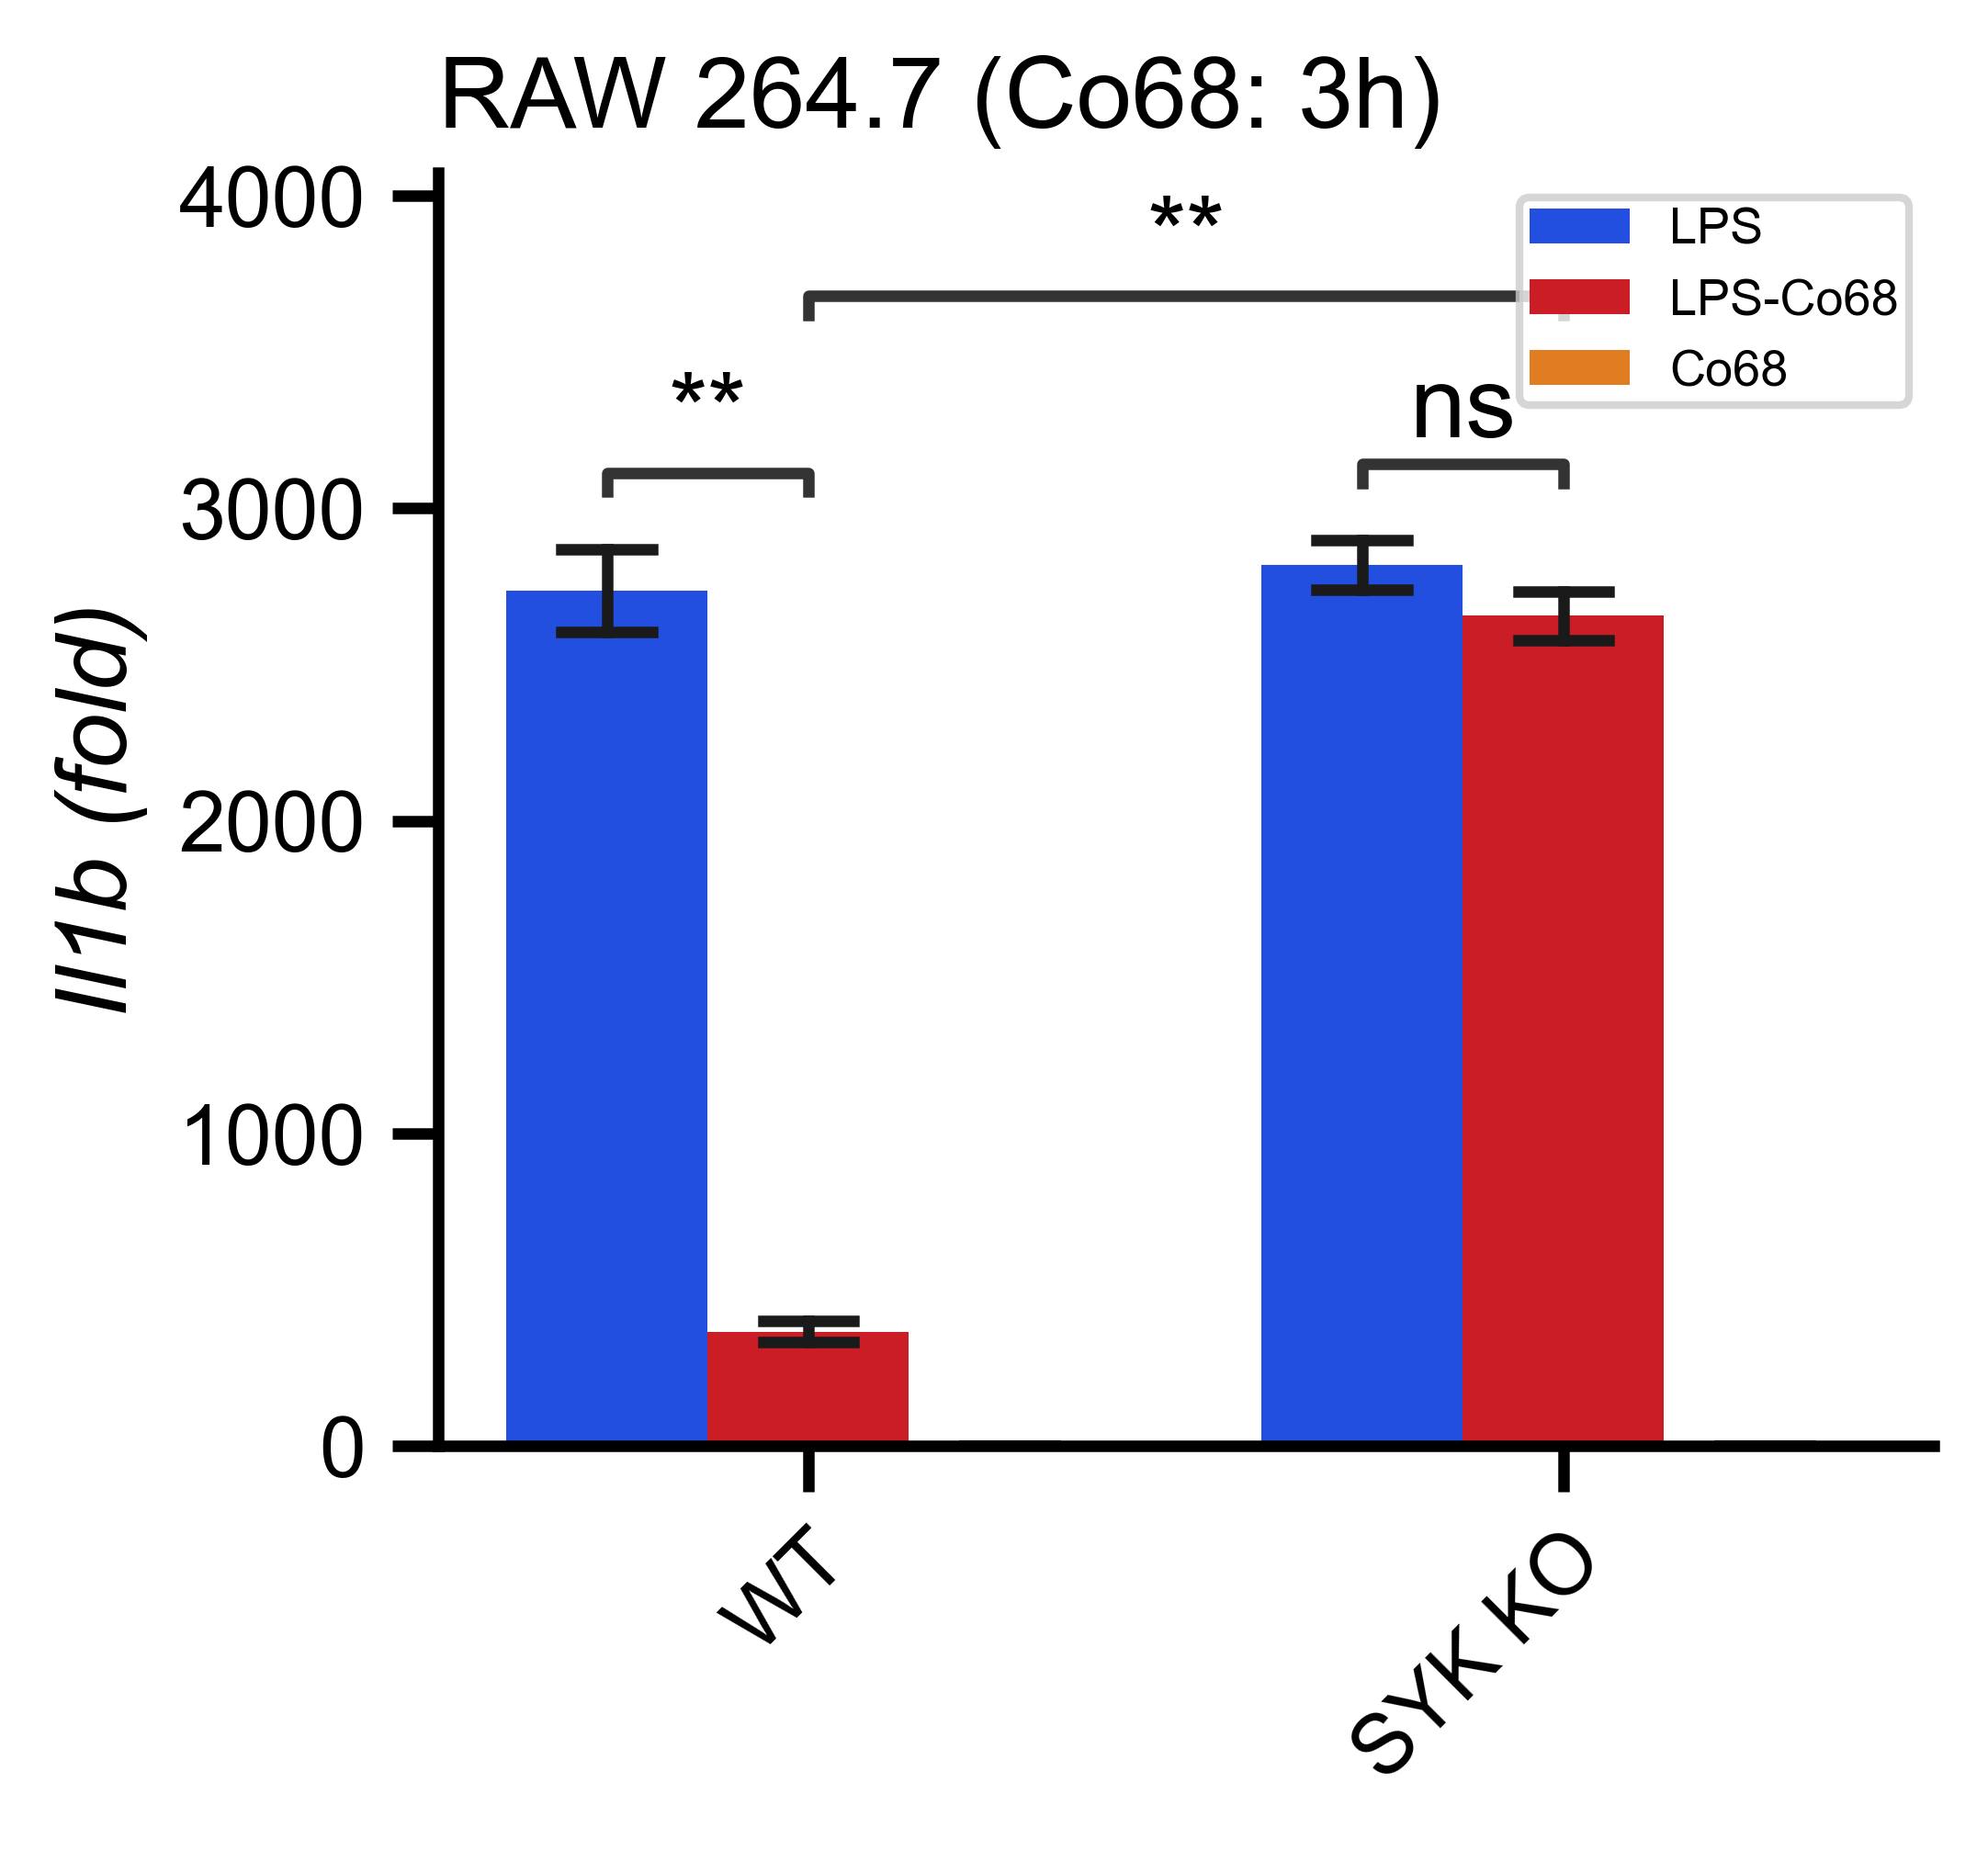

In [58]:
# 分层三变量分析
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.1):
    x='group'
    y='fc'
    gene = 'Il1b'
    label = 'SYK'
    cells = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/Egr1'
    outDir = os.getcwd()


    fig = plt.figure(figsize=(3.5, 3), dpi=600)
    ax = fig.add_subplot(111)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)


    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
                    # 设置两列颜色
        # capsize=0.18, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        # 设置三列颜色
        capsize=0.12, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3], sns.color_palette('bright')[1]],
        errcolor='0.1')
    sns.despine()

    ax.legend(loc=1, fontsize=6.5, borderpad=0.2)
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    ax.set_title(f'{cells} (Co68: 3h)', fontsize=13, loc='left')
    
    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    # ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # 设置三列group
    ax.set_xticks(range(int(len(exp)/6)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('WT', 'LPS'),('WT', 'LPS-Co68')),
    (('SYK KO', 'LPS'),('SYK KO', 'LPS-Co68')),
    (('WT', 'LPS-Co68'), ('SYK KO', 'LPS-Co68'))
        ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()



# print(sns.__file__)
plt.savefig(f'{outDir}/Co68_{gene}_{cells}_{label}-KO_SYK.pdf', dpi=700, bbox_inches='tight')

In [215]:
genes = list(data['检测项目'].drop_duplicates())
# genes.remove('mActb')
genes

['ACTB', 'IFNB1']

In [252]:
from scriptGXF import geneFCCal
fc_Atf3 = geneFCCal(data, 'IFNB1', 'dmso')
fc_Atf3

In [220]:
name = ['STINGi', 'TLR2i', 'DMSO', 'Co68', 'TBK1/IKKe-i', 'TLR4i', 'MyD88i', 'TRIFi']

sam = [n for n in name for i in range(2)]

len(sam)

16

In [225]:
exp = fc_Atf3.iloc[[4,5,6,7,2,3,10,11,12,13,14,15,8,9],].reset_index(drop=True)
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc      samples
0      RAW-DMSO  IFNB1  29.41  14.85 -14.56  0.000041    0.996534         DMSO
1      RAW-DMSO  IFNB1  29.56  15.01 -14.55  0.000042    1.003466         DMSO
2      RAW-DRUG  IFNB1  24.53  15.81  -8.72  0.002371   57.083082         Co68
3      RAW-DRUG  IFNB1  24.63  15.96  -8.67  0.002455   59.096113         Co68
4       RAW-C29  IFNB1  22.88  16.60  -6.28  0.012869  309.756627        TLR2i
5       RAW-C29  IFNB1  23.04  16.65  -6.39  0.011924  287.016792        TLR2i
6   RAW-TLR4-MD  IFNB1  30.94  15.44 -15.50  0.000022    0.519426        TLR4i
7   RAW-TLR4-MD  IFNB1  31.11  15.45 -15.66  0.000019    0.464900        TLR4i
8   RAW-TLR4-YS  IFNB1  23.34  16.23  -7.11  0.007239  174.247160       MyD88i
9   RAW-TLR4-YS  IFNB1  23.42  16.44  -6.98  0.007922  190.677570       MyD88i
10     RAW-TRIF  IFNB1  29.08  15.48 -13.60  0.000081    1.938568        TRIFi
11     RAW-TRIF  IFNB1  29.14  15.59 -13.55  0.000083    2.006931        TRIFi
12     RAW-IN-1  IFNB1  31.73  15.49 -16.24  0.000013    0.311001  TBK1/IKKe-i
13     RAW-IN-1  IFNB1  31.82  15.62 -16.20  0.000013    0.319744  TBK1/IKKe-i

In [229]:
exp = pd.read_csv('target_inhibitors_Co7_RAW.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc      samples
0      RAW-DMSO  IFNB1  29.41  14.85 -14.56  0.000041    0.996534         DMSO
1      RAW-DMSO  IFNB1  29.56  15.01 -14.55  0.000042    1.003466         DMSO
2      RAW-DRUG  IFNB1  24.53  15.81  -8.72  0.002371  274.247160         Co68
3      RAW-DRUG  IFNB1  24.63  15.96  -8.67  0.002455  290.677570         Co68
4       RAW-C29  IFNB1  22.88  16.60  -6.28  0.012869  299.756626        TLR2i
5       RAW-C29  IFNB1  23.04  16.65  -6.39  0.011924  287.016792        TLR2i
6   RAW-TLR4-MD  IFNB1  30.94  15.44 -15.50  0.000022    0.519426        TLR4i
7   RAW-TLR4-MD  IFNB1  31.11  15.45 -15.66  0.000019    0.464900        TLR4i
8   RAW-TLR4-YS  IFNB1  23.34  16.23  -7.11  0.007239  257.083082       MyD88i
9   RAW-TLR4-YS  IFNB1  23.42  16.44  -6.98  0.007922  239.096113       MyD88i
10     RAW-TRIF  IFNB1  29.08  15.48 -13.60  0.000081    1.938568        TRIFi
11     RAW-TRIF  IFNB1  29.14  15.59 -13.55  0.000083    2.006931        TRIFi
12     RAW-IN-1  IFNB1  31.73  15.49 -16.24  0.000013    0.311001  TBK1/IKKe-i
13     RAW-IN-1  IFNB1  31.82  15.62 -16.20  0.000013    0.319744  TBK1/IKKe-i

In [28]:
import re
def power2(x):
    return pow(2,x)

def FCCal(data,gene,base):
    data = data.loc[:,["样本名称","检测项目","CT"]].sort_values(by=["检测项目","样本名称", 'CT'], ascending=[True,True,True]).reset_index(drop=True)
    IFNB = data[data['检测项目'].str.contains(f'AC|{gene}', flags=re.IGNORECASE)]
    ifnb = IFNB.fillna(36).reset_index(drop=True)
    ifnb["diff"] = -ifnb["CT"].diff(periods=len(IFNB['CT'])/2)
    ifnb['pow'] = ifnb['diff'].apply(power2)
    exp = ifnb.dropna().reset_index(drop=True)
    #add the value of ACTB
    exp.insert(3,'ACTB', ifnb.loc[list(range(int(len(IFNB['CT'])/2))), 'CT'])
    fc1 = exp[exp['样本名称'].str.contains(f'{base}', flags=re.IGNORECASE)]['pow'].mean()
    # fc1 = exp[exp['样本名称'] == 'dmso']['pow'].mean()
    exp['fc'] = exp['pow'].div(fc1)
    return exp


In [94]:
fc_Atf3 = geneFCCal(data, 'mAtf3', 'dmso')
fc_Atf3

样本名称   检测项目     CT   ACTB  diff       pow         fc
0       RAW_CO68  mAtf3  23.29  20.33 -2.96  0.128514   9.938660
1       RAW_CO68  mAtf3  23.57  20.52 -3.05  0.120742   9.337597
2   RAW_CO68_p65  mAtf3  24.33  20.90 -3.43  0.092783   7.175361
3   RAW_CO68_p65  mAtf3  24.79  21.36 -3.43  0.092783   7.175361
4       RAW_DMSO  mAtf3  26.15  19.95 -6.20  0.013602   1.051939
5       RAW_DMSO  mAtf3  26.38  20.03 -6.35  0.012259   0.948061
6        RAW_LPS  mAtf3  18.90  18.17 -0.73  0.602904  46.625633
7        RAW_LPS  mAtf3  18.92  18.31 -0.61  0.655197  50.669701
8   RAW_LPS_MCB1  mAtf3  24.05  20.50 -3.55  0.085378   6.602679
9   RAW_LPS_MCB1  mAtf3  24.21  20.51 -3.70  0.076947   5.950667
10      RAW_MCB1  mAtf3  26.74  20.33 -6.41  0.011760   0.909441
11      RAW_MCB1  mAtf3  26.98  20.77 -6.21  0.013508   1.044673

In [99]:
one_Way(fc_Atf3)

BartlettResult(statistic=nan, pvalue=nan)
nan nan

多重比较:


/Users/fenn/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [103]:
fc_Atf3

样本名称   检测项目     CT   ACTB  diff       pow         fc
0       RAW_CO68  mAtf3  23.29  20.33 -2.96  0.128514   9.938660
1       RAW_CO68  mAtf3  23.57  20.52 -3.05  0.120742   9.337597
2   RAW_CO68_p65  mAtf3  24.33  20.90 -3.43  0.092783   7.175361
3   RAW_CO68_p65  mAtf3  24.79  21.36 -3.43  0.092783   7.175361
4       RAW_DMSO  mAtf3  26.15  19.95 -6.20  0.013602   1.051939
5       RAW_DMSO  mAtf3  26.38  20.03 -6.35  0.012259   0.948061
6        RAW_LPS  mAtf3  18.90  18.17 -0.73  0.602904  46.625633
7        RAW_LPS  mAtf3  18.92  18.31 -0.61  0.655197  50.669701
8   RAW_LPS_MCB1  mAtf3  24.05  20.50 -3.55  0.085378   6.602679
9   RAW_LPS_MCB1  mAtf3  24.21  20.51 -3.70  0.076947   5.950667
10      RAW_MCB1  mAtf3  26.74  20.33 -6.41  0.011760   0.909441
11      RAW_MCB1  mAtf3  26.98  20.77 -6.21  0.013508   1.044673

In [108]:
exp = fc_Atf3
exp['样本名称'] = exp['样本名称'].str.replace('Co68-LPS','Co68_LPS')
exp['样本名称'] = exp['样本名称'].str.removeprefix('RAW_')
exp = exp[~exp['样本名称'].isin(['CO68','CO68_p65'])]
exp = exp.sort_values('样本名称').reset_index(drop=True)
exp

样本名称   检测项目     CT   ACTB  diff       pow         fc
0      DMSO  mAtf3  26.15  19.95 -6.20  0.013602   1.051939
1      DMSO  mAtf3  26.38  20.03 -6.35  0.012259   0.948061
2       LPS  mAtf3  18.90  18.17 -0.73  0.602904  46.625633
3       LPS  mAtf3  18.92  18.31 -0.61  0.655197  50.669701
4  LPS_MCB1  mAtf3  24.05  20.50 -3.55  0.085378   6.602679
5  LPS_MCB1  mAtf3  24.21  20.51 -3.70  0.076947   5.950667
6      MCB1  mAtf3  26.74  20.33 -6.41  0.011760   0.909441
7      MCB1  mAtf3  26.98  20.77 -6.21  0.013508   1.044673

In [109]:
grp1 = list(exp[exp['样本名称']=='DMSO']['fc'])
grp2 = list(exp[exp['样本名称']=='LPS']['fc'])
grp3 = list(exp[exp['样本名称']=='LPS_MCB1']['fc'])
grp4 = list(exp[exp['样本名称']=='MCB1']['fc'])
print(stats.bartlett(grp1, grp2, grp3, grp4))
F,p = stats.f_oneway(grp1, grp2, grp3, grp4)
print(F,p)
print(red('\n多重比较:', 'italic'))
if p<0.05:
    dataMerge = grp1+grp2+grp3+grp4
    grpLabels = ['DMSO']*len(grp1) + ['LPS']*len(grp2) + ['LPS_MCB1']*len(grp3) + ['MCB1']*len(grp4)
    tukeyRes = pairwise_tukeyhsd(dataMerge, grpLabels)
    print(tukeyRes)

BartlettResult(statistic=8.706266364490876, pvalue=0.03346222960675049)
507.19962940689175 1.287836153043276e-05

多重比较:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
    DMSO      LPS  47.6477   0.0  41.7469  53.5484   True
    DMSO LPS_MCB1   5.2767 0.071  -0.6241  11.1774  False
    DMSO     MCB1  -0.0229   1.0  -5.9237   5.8778  False
     LPS LPS_MCB1  -42.371   0.0 -48.2717 -36.4702   True
     LPS     MCB1 -47.6706   0.0 -53.5714 -41.7699   True
LPS_MCB1     MCB1  -5.2996  0.07 -11.2004   0.6011  False
---------------------------------------------------------


In [131]:
one_Way(exp)

BartlettResult(statistic=8.706266364490876, pvalue=0.03346222960675049)
507.19962940689175 1.287836153043276e-05

多重比较:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
    DMSO      LPS  47.6477   0.0  41.7469  53.5484   True
    DMSO LPS_MCB1   5.2767 0.071  -0.6241  11.1774  False
    DMSO     MCB1  -0.0229   1.0  -5.9237   5.8778  False
     LPS LPS_MCB1  -42.371   0.0 -48.2717 -36.4702   True
     LPS     MCB1 -47.6706   0.0 -53.5714 -41.7699   True
LPS_MCB1     MCB1  -5.2996  0.07 -11.2004   0.6011  False
---------------------------------------------------------


In [194]:
samples = list(exp['样本名称'].drop_duplicates())
# samples
grp = {}
for i in list(range(len(samples))):
    grp[f'grp{i+1}'] = list(exp[exp['样本名称']== samples[i]]['fc'])    
values = tuple(grp.values())
print(stats.bartlett(*values))
F,p = stats.f_oneway(*values)
print(F,p)
print(red('\n多重比较:', 'italic'))
if p<0.05:
    dataMerge = list(exp['fc'])
    bioDup = int(len(exp)/len(samples))
    grpLabels = [samples[0]]*bioDup + [samples[1]]*bioDup + [samples[2]]*bioDup + [samples[3]]*bioDup
    tukeyRes = pairwise_tukeyhsd(dataMerge, grpLabels)
    print(tukeyRes)

BartlettResult(statistic=8.706266364490876, pvalue=0.03346222960675049)
507.19962940689175 1.287836153043276e-05

多重比较:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
    DMSO      LPS  47.6477   0.0  41.7469  53.5484   True
    DMSO LPS_MCB1   5.2767 0.071  -0.6241  11.1774  False
    DMSO     MCB1  -0.0229   1.0  -5.9237   5.8778  False
     LPS LPS_MCB1  -42.371   0.0 -48.2717 -36.4702   True
     LPS     MCB1 -47.6706   0.0 -53.5714 -41.7699   True
LPS_MCB1     MCB1  -5.2996  0.07 -11.2004   0.6011  False
---------------------------------------------------------


In [202]:
one_Way(exp)

BartlettResult(statistic=8.706266364490876, pvalue=0.03346222960675049)
507.19962940689175 1.287836153043276e-05

多重比较:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
    DMSO      LPS  47.6477   0.0  41.7469  53.5484   True
    DMSO LPS_MCB1   5.2767 0.071  -0.6241  11.1774  False
    DMSO     MCB1  -0.0229   1.0  -5.9237   5.8778  False
     LPS LPS_MCB1  -42.371   0.0 -48.2717 -36.4702   True
     LPS     MCB1 -47.6706   0.0 -53.5714 -41.7699   True
LPS_MCB1     MCB1  -5.2996  0.07 -11.2004   0.6011  False
---------------------------------------------------------


In [201]:
from scipy import stats
from scipy.stats import f_oneway
from simple_colors import *

def one_Way(exp):
    samples = list(exp['样本名称'].drop_duplicates())
    # samples
    grp = {}
    for i in list(range(len(samples))):
        grp[f'grp{i+1}'] = list(exp[exp['样本名称']== samples[i]]['fc'])    
    values = tuple(grp.values())
    print(stats.bartlett(*values))
    F,p = stats.f_oneway(*values)
    print(F,p)
    if p<0.05:
        print(red('\n多重比较:', 'italic'))
        dataMerge = list(exp['fc'])
        bioDup = int(len(exp)/len(samples))
        grpLabels = [samples[0]]*bioDup + [samples[1]]*bioDup + [samples[2]]*bioDup + [samples[3]]*bioDup
        tukeyRes = pairwise_tukeyhsd(dataMerge, grpLabels)
        print(tukeyRes)

In [3]:
import pandas as pd
import os
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/filterqPCR_Table/')
os.listdir()

['RAW_LPS-MCB_24h_33_Atf3.pdf',
 'RAW_LPS-MCB_24h_33_Il1b.pdf',
 'mRNA-Egr1-filter_LPS-MCB_24h.csv',
 'Nos2_filter_LPS-MCB.csv',
 'mRNA-TNF-filter_LPS-MCB_24h.csv',
 'Cxcl11_filter_LPS-MCB_24h.csv',
 'RAW_LPS-MCB_24h_33_Cxcl11.pdf',
 'RAW_LPS-MCB_24h_33_Il6.pdf',
 'mRNA-Fgr-filter_LPS-MCB_24h.csv',
 'RAW_LPS-MCB_24h_33_Fgr.pdf',
 'Ptgs2_filter_LPS-MCB_24h.csv',
 'RAW_LPS-MCB_24h_33_Egr1.pdf',
 'RAW_LPS-MCB_24h_33_Nos2.pdf',
 'RAW_LPS-MCB_24h_33_Tnf.pdf',
 'mRNA-Atf3-filter_LPS-MCB_24h.csv',
 'mRNA-Il1b-filter_LPS-MCB_24h.csv',
 'RAW_LPS-MCB_24h_33_Ptgs2.pdf',
 'mRNA-IL6-filter_LPS-MCB_24h.csv']

In [347]:
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/cellLineTest/')

In [349]:
gene = 'Ifnb1'
exp = pd.read_csv('BMDM_Co68_Drugs_TimeSeries.csv')
exp

样本名称   检测项目     CT   diff       pow          fc samples
0  BMDM-DMSO  IFNB1  36.59 -17.30  0.000006    1.178292      0h
1  BMDM-DMSO  IFNB1  37.15 -17.82  0.000004    0.821708      0h
2   BMDM-C29  IFNB1  33.50 -13.03  0.000120   22.732703      1h
3   BMDM-C29  IFNB1  33.82 -13.25  0.000103   19.517513      1h
4    BMDM-2H  IFNB1  31.44 -11.26  0.000408  177.530785      3h
5    BMDM-2H  IFNB1  31.47 -11.28  0.000402  162.463395      3h
6    BMDM-5H  IFNB1  31.49  -9.66  0.001236  535.029389      5h
7    BMDM-5H  IFNB1  31.84  -9.96  0.001004  519.000000      5h
8  BMDM-C176  IFNB1  29.79  -9.07  0.001861  453.777223      7h
9  BMDM-C176  IFNB1  29.81  -8.97  0.001994  479.169040      7h

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. LPS: t-test independent samples, P_val:4.411e-04 t=-4.760e+01
LPS vs. LPS-MCB: t-test independent samples, P_val:2.851e-03 t=1.869e+01
LPS vs. MCB: t-test independent samples, P_val:4.893e-04 t=4.519e+01


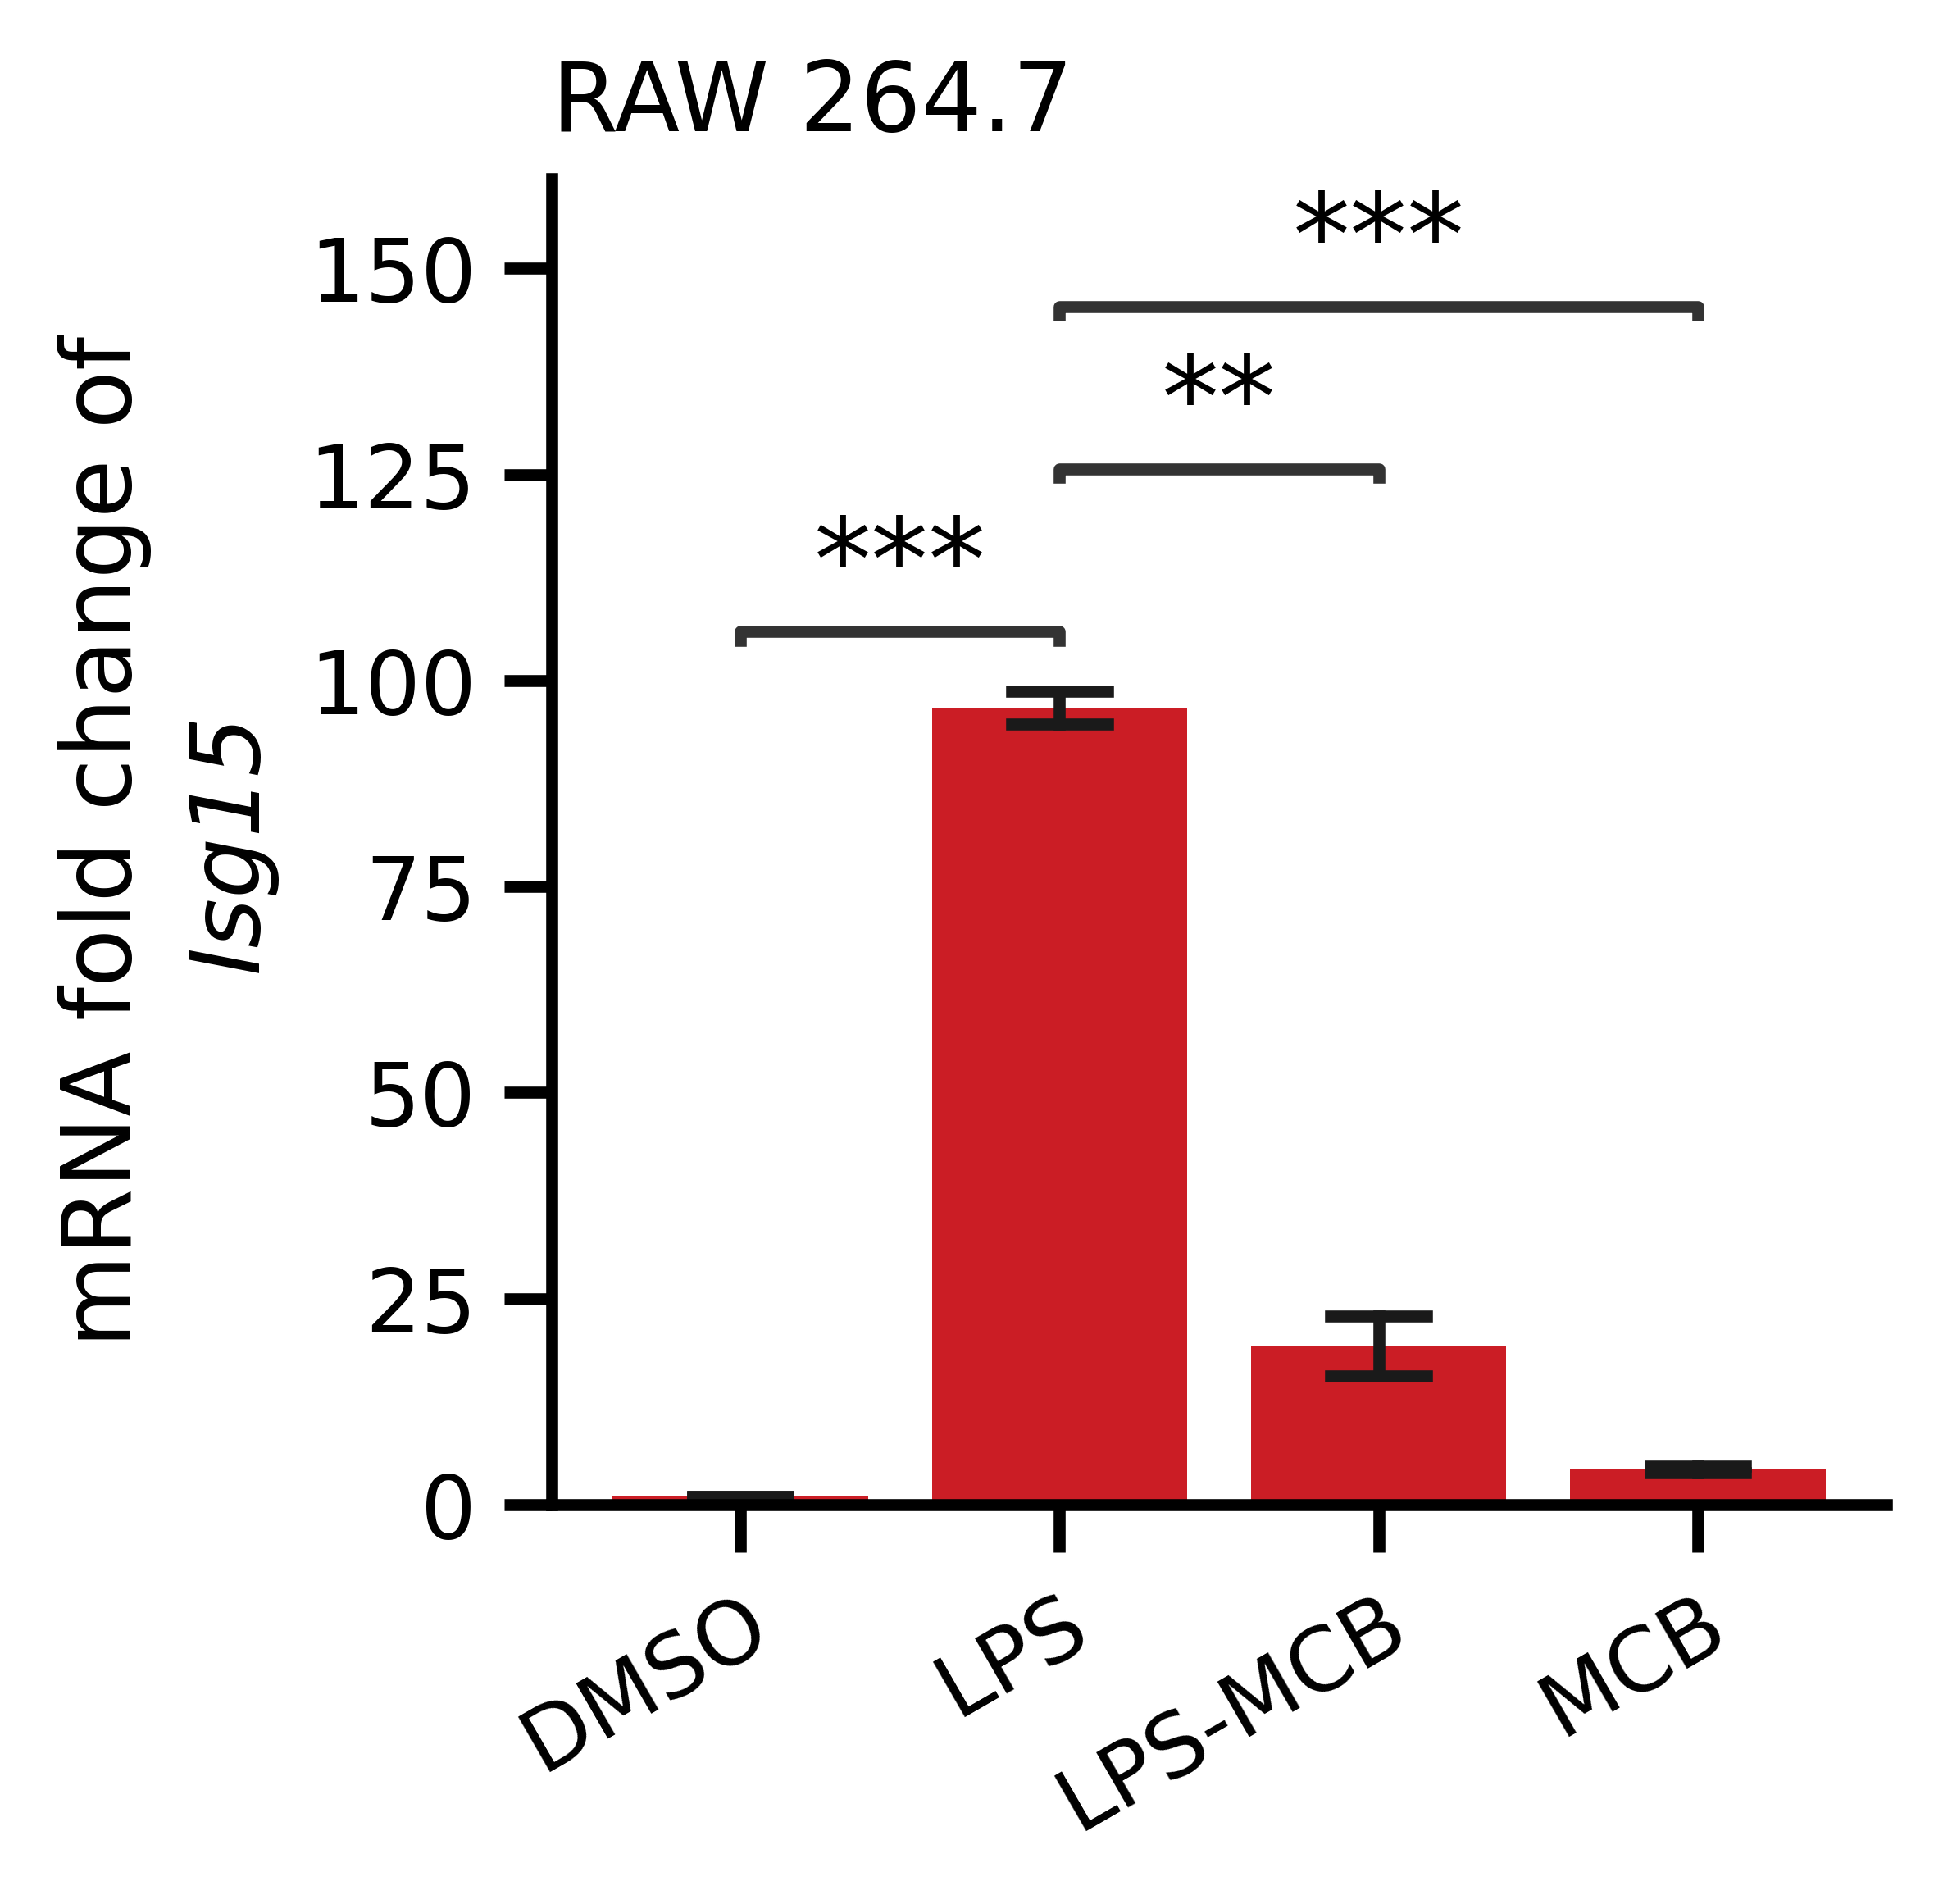

In [168]:
# plt.rcParams['text.latex.preamble'] = r'\usepackage{helvet}\renewcommand\familydefault{\sfdefault}'
# 设置字体为 Arial
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "Arial",
#     "font.sans-serif": "Arial",
# })

### 单因素方差分析
import seaborn as sns
import matplotlib.pyplot as plt
with sns.plotting_context('notebook', font_scale=1.2):
    x='样本名称'
    y='fc'
    gene = 'Ifnb1'
    # fc = 'mRNA fold change of'
    fig = plt.figure(figsize=(3,3), dpi=700)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
#  width=0.6, hue=x, legend=False,
    g = sns.barplot(data=exp, y=y, x=x, errwidth=1.5,
        capsize=0.3, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)

    
    # print(ax.get_ylim())
    ax.set_title('RAW 264.7', fontsize=12, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=30, horizontalalignment='right')
    ax.set_ylabel(f'{gene}', fontsize=12, fontstyle='italic', loc='center', labelpad=4)
    
    # ylabel_position = ax.yaxis.get_label().get_position()
    # ylabel_width = ax.yaxis.get_label().get_window_extent().width
    # padding = 1600  # 固定距离的像素值
    # # 在Axes坐标中的x偏移（以数据坐标为基准）
    # x_offset = (ylabel_position[0] - ax.transAxes.inverted().transform((ylabel_width + padding, 0))[0]) / ax.get_xlim()[1]

    ylabel = ax.yaxis.get_label()
    ylabel_position = ylabel.get_position()
    # ylabel_transformed = ax.transAxes.transform(ylabel_position)
    # 固定的距离(以轴坐标系为度量)
    fixed_distance = 0.3
    text_x = ylabel_position[0] - fixed_distance
    text_y = 0.5  # 居中

    # 获取 ylabel 的位置
    # ylabel_position = ax.yaxis.label.get_position()
    # ylabel_pad = 30  # 获取labelpad的值（4pt）
    # # 将 pt 转换为轴坐标。1pt = 1/72 inch，dpi = dots per inch
    # fig_width_inches = fig.get_figwidth()
    # ax_width_inch = ax.get_position().width * fig_width_inches
    # pad_in_axes_units = ylabel_pad / 72 / ax_width_inch 
    # text_x = ylabel_position[0] - pad_in_axes_units
    # # 获取ylabel的位置
    # ylabel = ax.yaxis.get_label()
    # ylabel_position = ax.transAxes.transform(ylabel.get_position())

    # ax.text(text_x, 0.5, f'{fc}', 
    #         fontsize=12, va='center', ha='right', rotation='vertical', transform=ax.transAxes,
    #         bbox=dict(facecolor='none', edgecolor='none'))

    # 
    # ax.text(text_x, ylabel_position[1], f'{fc}', fontsize=12, fontstyle='normal', va='center', ha='center', rotation='vertical')
    # mRNA = ax.text(-1.35, 45, f'{gene}', fontsize=12, fontstyle='italic', va='center', ha='center', rotation='vertical')
        # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'LPS', 'LPS-L68', 'L68'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    pairs=[('LPS','DMSO'), ('LPS','LPS-MCB'),('LPS', 'MCB')]

    # statannotation的高级版本号
    # add_stat_annotation(
    # ax, data=exp, x=x, y=y, box_pairs = pairs, 
    # test='t-test_ind', text_format='star', loc='outside', verbose=2)

    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()
plt.savefig(f'./RAW_LPS-MCB_4h_33_{gene}.pdf', dpi=700, bbox_inches='tight')

In [249]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
anovaRes = anova_lm(ols('fc~C(样本名称)', exp).fit(), typ=2)
anovaRes

sum_sq   df            F        PR(>F)
C(样本名称)   625204.431790  4.0  1228.443927  1.152219e-07
Residual     636.175183  5.0          NaN           NaN

In [284]:
exp = data[data['cells'] == 'CD4 T']
# exp.loc[11,'Ratio'] = 15.37
exp

group  cells  Ratio
12  Co68  CD4 T   1.08
13  Co68  CD4 T   1.19
14   PBS  CD4 T   2.86
15   PBS  CD4 T   2.56

In [232]:
from scipy import stats
from scipy.stats import f_oneway

s1 = exp[exp['样本名称'] == 'Co68']['fc']
s2 = exp[exp['样本名称'] == 'MD2']['fc']
s3 = exp[exp['样本名称'] == 'MyD88']['fc']
s4 = exp[exp['样本名称'] == 'TRIF']['fc']
s5 = exp[exp['样本名称'] == 'IN-1']['fc']

args = [s1,s2,s3,s4,s5]

w,p = stats.levene(*args)
print(w)
p
# f_statistic, p_value = f_oneway(*args)
 
# # Output the results
# print("F-statistic:", f_statistic)
# print("P-value:", p_value)

inf


0.0

In [413]:
import os
# os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/TLR4_KO')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/cellLineTest/lastFigures')
os.listdir()

['Co68_HSV_EMCV_12h.csv',
 'Co_LPS_3h_Il1b.csv',
 '.DS_Store',
 'Co68_RAW 264.7_Co68_i_VSV.pdf',
 'Co68_Il1b_RAW 264.7_antiInflammation.pdf',
 'Co68_VSV_5h.csv']

In [414]:
# 单因素方差分析
exp = pd.read_csv('Co_LPS_3h_Il1b.csv')
exp

样本名称   检测项目     CT   ACTB   diff       pow           fc   samples
0    DMSO_3h  mIl1b  31.80  16.87 -14.93  0.000032     0.982673      DMSO
1    DMSO_3h  mIl1b  32.02  17.14 -14.88  0.000033     1.017327      DMSO
2     LPS_3h  mIl1b  19.78  16.67  -3.11  0.115824  4752.905011       LPS
3     LPS_3h  mIl1b  19.89  16.71  -3.18  0.110338  4584.632316       LPS
4  LPS-Co_3h  mIl1b  24.62  17.62  -7.00  0.007812   479.649713  LPS-Co68
5  LPS-Co_3h  mIl1b  24.64  17.65  -6.99  0.007867   441.316609  LPS-Co68
6      Co_3h  mIl1b  33.22  19.11 -14.11  0.000057     1.734817      Co68
7      Co_3h  mIl1b  33.49  19.17 -14.32  0.000049     1.499814      Co68

In [1]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/')
os.listdir()

['RAW_Il1b_VSV_6h_33.pdf',
 'Co68iEMCV',
 'RAW_Co68_i_HSV_EMCV_33.pdf',
 '.DS_Store',
 'LastInflammation',
 'TargetTlr4',
 'Target_Co68_inhibit_LPS_3h_Il1a.pdf',
 'RAW_Il1b_VSV_5h_33.pdf',
 'Target_Co68_inhibit_LPS_3h_Il1b.pdf',
 'RAW_Il1b_VSV_12h_33.pdf',
 '20231019_Co68_i_VSV.xls',
 'TargetValidation',
 'results',
 'RNA-seq_Validation',
 '20231019_205027_Trim17_Egr1.xls',
 '20231103_142232_RAW_VSV_EMCV.xls',
 '20231023_151109_HSV_EMCV_PolyIC.xls',
 'RAW_Co68_i_HSV_EMCV_267_33.pdf',
 '20230206_212628_Co68_LPS_3h_5h.xls',
 '20230217_105457_Co68iVSV.xls',
 'Co68_HSV_EMCV_6h.csv',
 '20230217_123545_VSViCo_5h.xls',
 'group4',
 'RAW_Il1b_VSV_3h_33.pdf']

In [2]:
os.listdir('LastInflammation')

['Co68_RAW 264.7_Cxcl10_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_Il1b_Co68_i_LPS_3h.pdf',
 'Co68_HSV_EMCV_12h.csv',
 'Co68_EMCV_5h.csv',
 'Co_LPS_3h_Il1b.csv',
 '.DS_Store',
 'Co_LPS_3h_Il6.csv',
 'Co68_RAW 264.7_Co68_i_EMCV_12h.pdf',
 'Co_LPS_3h_Il1a.csv',
 'RAW-Co68-LPS_Isg15.csv',
 'Co_LPS_3h_Ptgs2.csv',
 'Co68_RAW 264.7_Isg15_Co68_i_LPS_3h.pdf',
 'Co_LPS_3h_Csf1.csv',
 'Co68_RAW 264.7_Ptgs2_Co68_i_LPS_3h.pdf',
 'PDF',
 'Co_LPS_3h_Cxcl10.csv',
 'Co68_RAW 264.7_Il1a_Co68_i_LPS_3h.pdf',
 'Co_LPS_3h_Csf2.csv',
 'Co68_RAW 264.7_Co68_i_VSV.pdf',
 'Co68_Il1b_RAW 264.7_antiInflammation.pdf',
 'Co_LPS_3h_Csf3.csv',
 'Co68_RAW 264.7_Csf3_Co68_i_LPS_3h.pdf',
 'Co_LPS_3h_Nos2.csv',
 'Co68_RAW 264.7_Il6_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_Co68_i_HSV_12h.pdf',
 'Co_LPS_3h_Ifnb1.csv',
 'Co68_RAW 264.7_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_Csf2_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_Co68_i_VSV_12h.pdf',
 'Co68_RAW 264.7_Nos2_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_Csf1_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_

In [46]:
import os  
import re  

# 指定目标目录  
directory = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'  

# 获取指定目录下的所有文件  
all_files = os.listdir(directory)  

# 定义正则表达式以匹配CSV文件  
csv_pattern = re.compile(r'.*\.csv$', re.IGNORECASE)  

# 使用列表推导式筛选出所有CSV文件  
csv_files = [file for file in all_files if csv_pattern.match(file)]  
csv_files

['Co68_HSV_EMCV_12h.csv',
 'Co68_MHV_12h.csv',
 'Co68_EMCV_5h.csv',
 'Co_LPS_3h_Il1b.csv',
 'Co_LPS_3h_Il6.csv',
 'Co_LPS_3h_Il1a.csv',
 'RAW-Co68-LPS_Isg15.csv',
 'Co_LPS_3h_Ptgs2.csv',
 'Co_LPS_3h_Csf1.csv',
 'Co_LPS_3h_Cxcl10.csv',
 'Co_LPS_3h_Csf2.csv',
 'Co_LPS_3h_Csf3.csv',
 'Co_LPS_3h_Nos2.csv',
 'Co68_MHV_5h.csv',
 'Co_LPS_3h_Ifnb1.csv',
 'Co68_HSV_5h.csv',
 'Co_LPS_3h_Tnf.csv',
 'RAW-Co68-LPS_Cxcl2.csv',
 'Co68_VSV_5h.csv']

In [74]:
gene = 'Isg15'

In [75]:
import pandas as pd
exp = pd.read_csv(f'LastInflammation/Co_LPS_3h_{gene}.csv')
exp

FileNotFoundError: [Errno 2] No such file or directory: 'LastInflammation/Co_LPS_3h_Isg15.csv'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS vs. LPS-Co68: t-test independent samples, P_val:2.990e-03 t=-1.825e+01
LPS vs. Co68: t-test independent samples, P_val:2.130e-03 t=2.163e+01


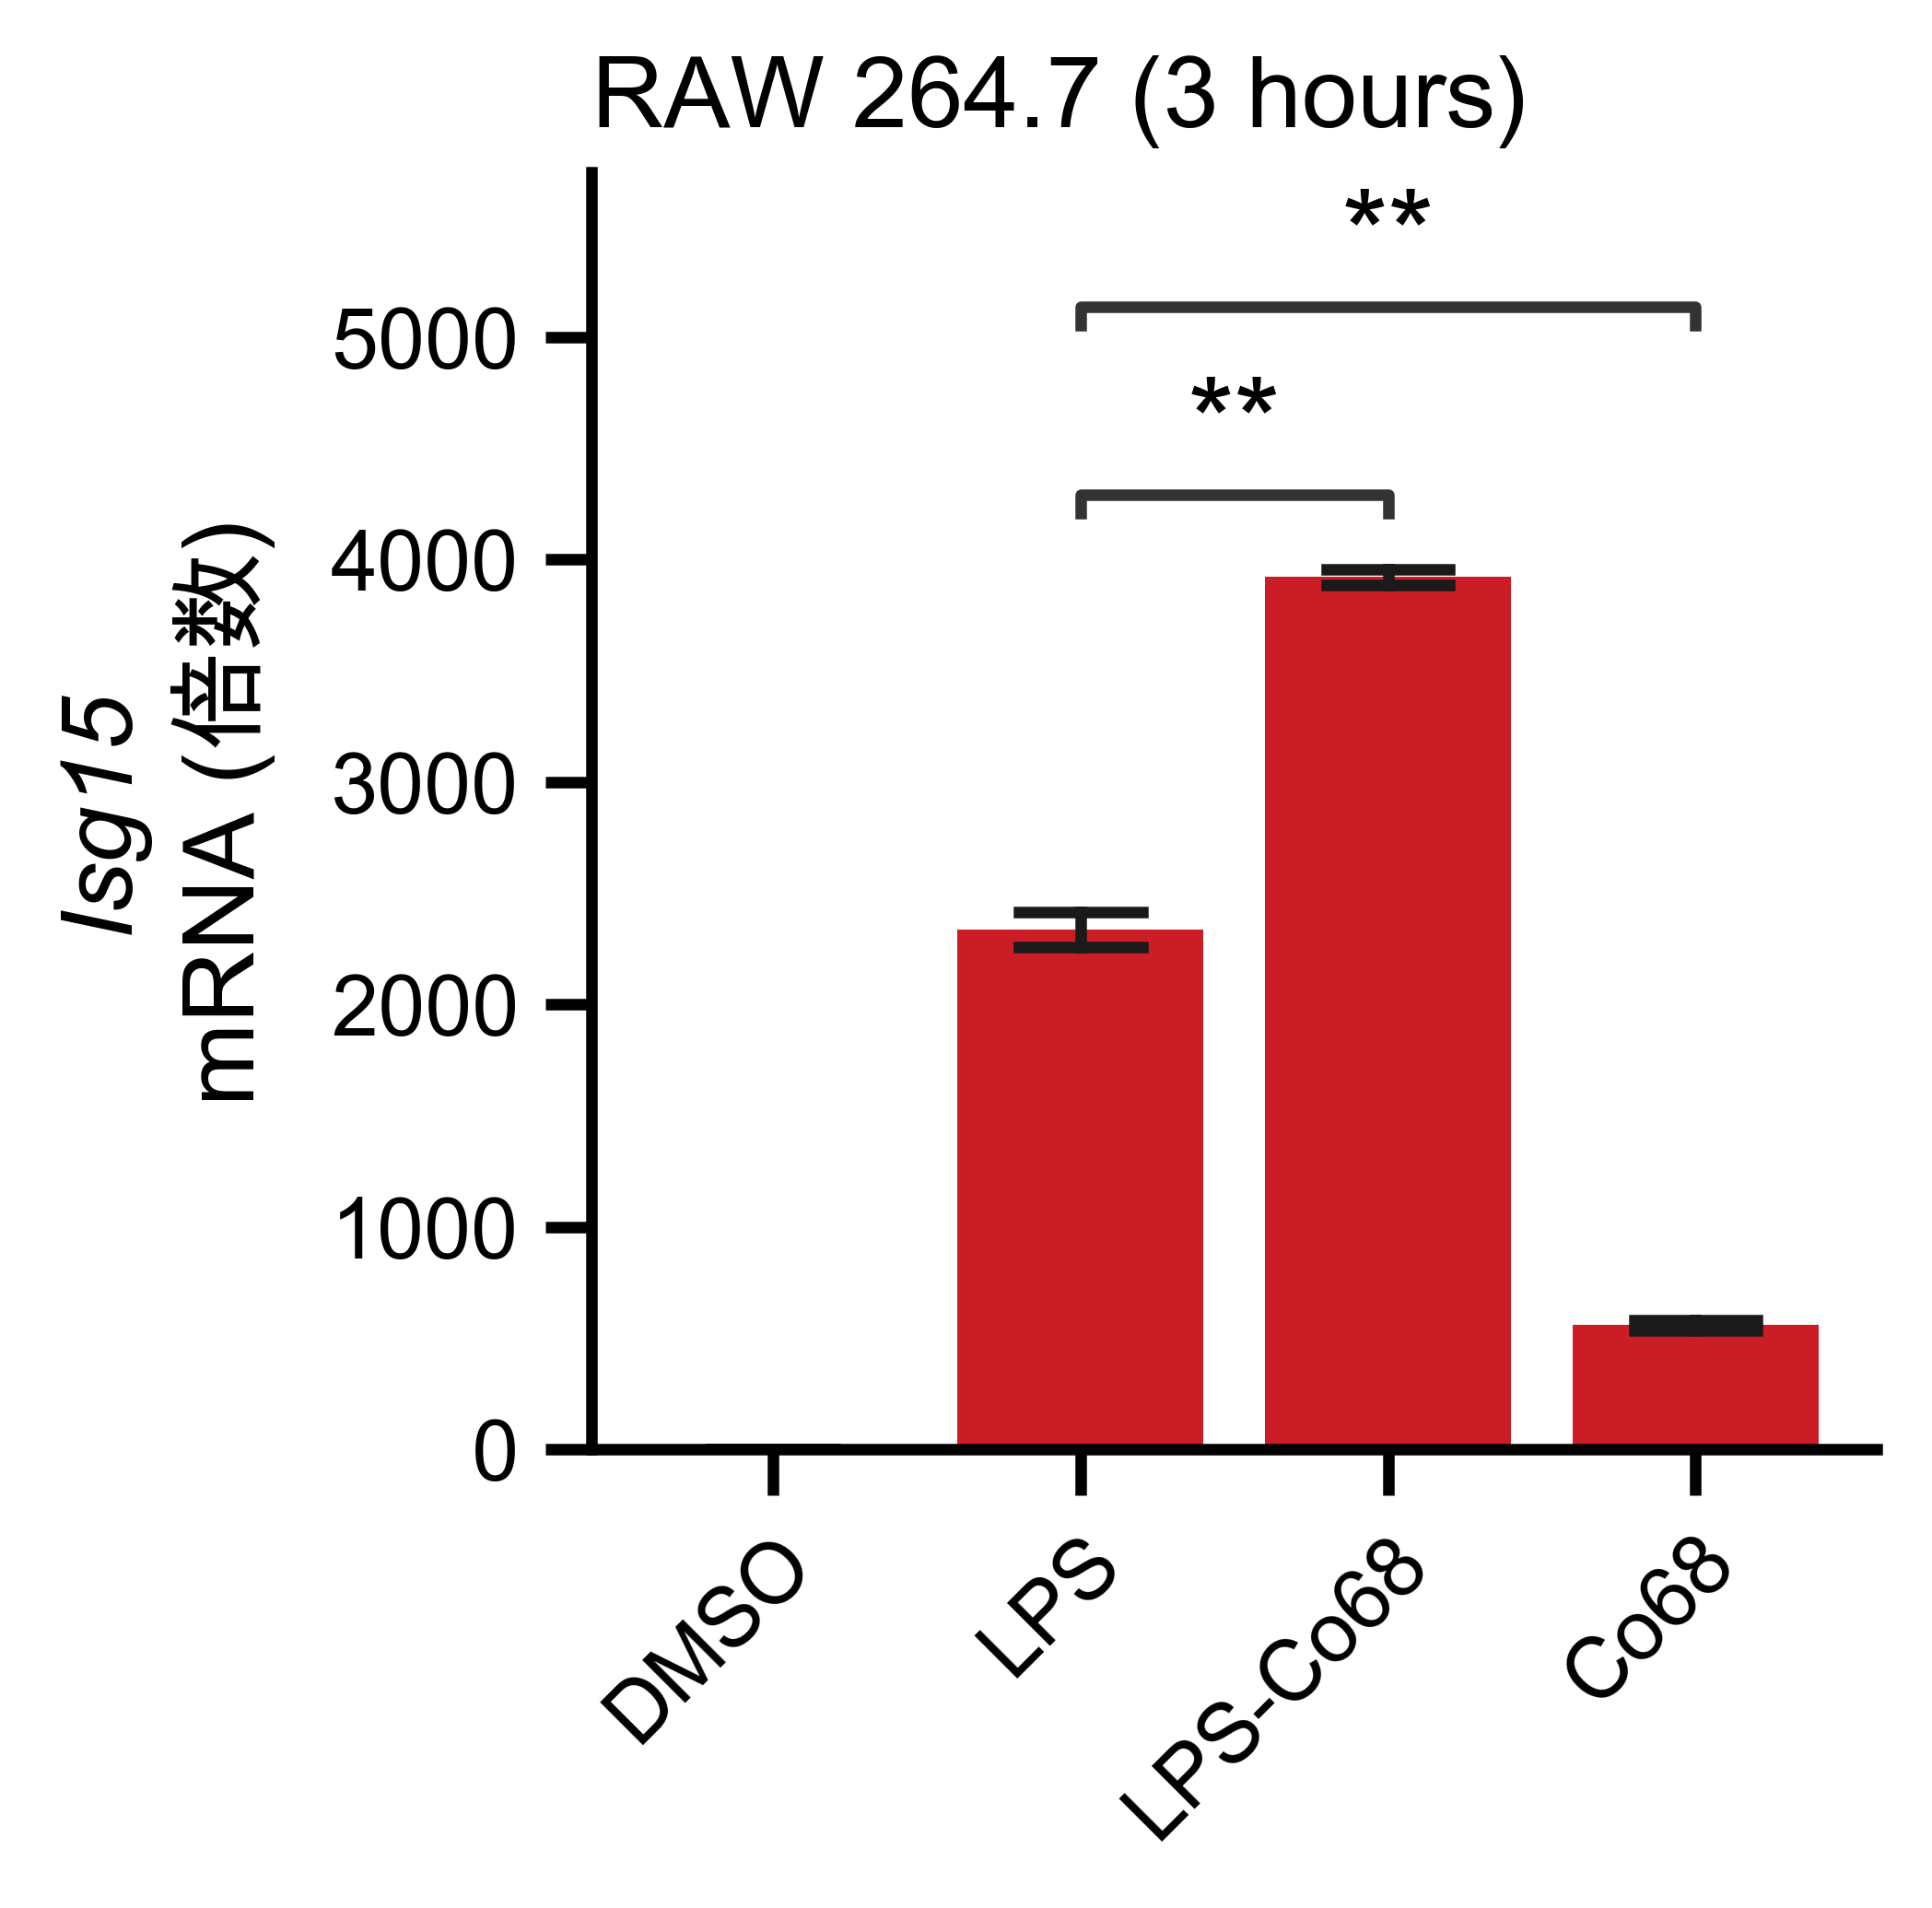

In [76]:
# /Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN/LPS
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from matplotlib.font_manager import FontProperties

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'
# rcParams['font.family'] = 'Arial'
rcParams['font.family'] = 'Arial Unicode MS'
rcParams['text.usetex'] = False
# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.3):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = gene
    Virus = 'LPS'
    cell = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN/LPS'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/VSV_Co68/qPCR/IL1B'
    pad = 60
    fig = plt.figure(figsize=(3, 3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    # errwidth=1.5, errcolor='0.1'
    g = sns.barplot(data=exp, y=y, x=x, width=0.8, capsize=0.4, hue=x, legend=False, 
                    err_kws={'linewidth': 1.5, 'color': '0.1'},
        palette=[sns.color_palette('bright')[3]]*len(list(exp[x].drop_duplicates())),
        )
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel('', fontsize=13, fontstyle='italic')
    # 定义字体属性
    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - 0.1


    # 使用 annotate 设置不同字体 相对坐标系
    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )
    # 使用LaTex语法，可以保持仅局部字体是斜体：ylabel_text = f'$\\it{{{gene}}}$ (倍数)'
    # rcParams['font.family'] = 'SimHei'
    # ax.set_ylabel(r'$\mathit{A2111B}$ mRNA (倍数)', fontsize=13)
    # ax.set_ylabel(f'$\\it{{{gene}}}$ mRNA (倍数)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (3 hours)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    # ax.set_xticks(range(len(list(exp[x].drop_duplicates()))), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
   
    ax.set_xticks(range(len(list(exp[x].drop_duplicates()))), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]
    pairs=[(f'{Virus}-Co68', f'{Virus}'), ('Co68', f'{Virus}')]
    # pairs=[('EMCV-Co68','EMCV'), ('Co68','EMCV')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_Co68_i_{Virus}_3h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_Co68_i_{Virus}_3h.csv', index=None)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

VSV vs. VSV-Co68: t-test independent samples, P_val:3.531e-03 t=1.678e+01
VSV vs. Co68: t-test independent samples, P_val:3.433e-03 t=1.702e+01


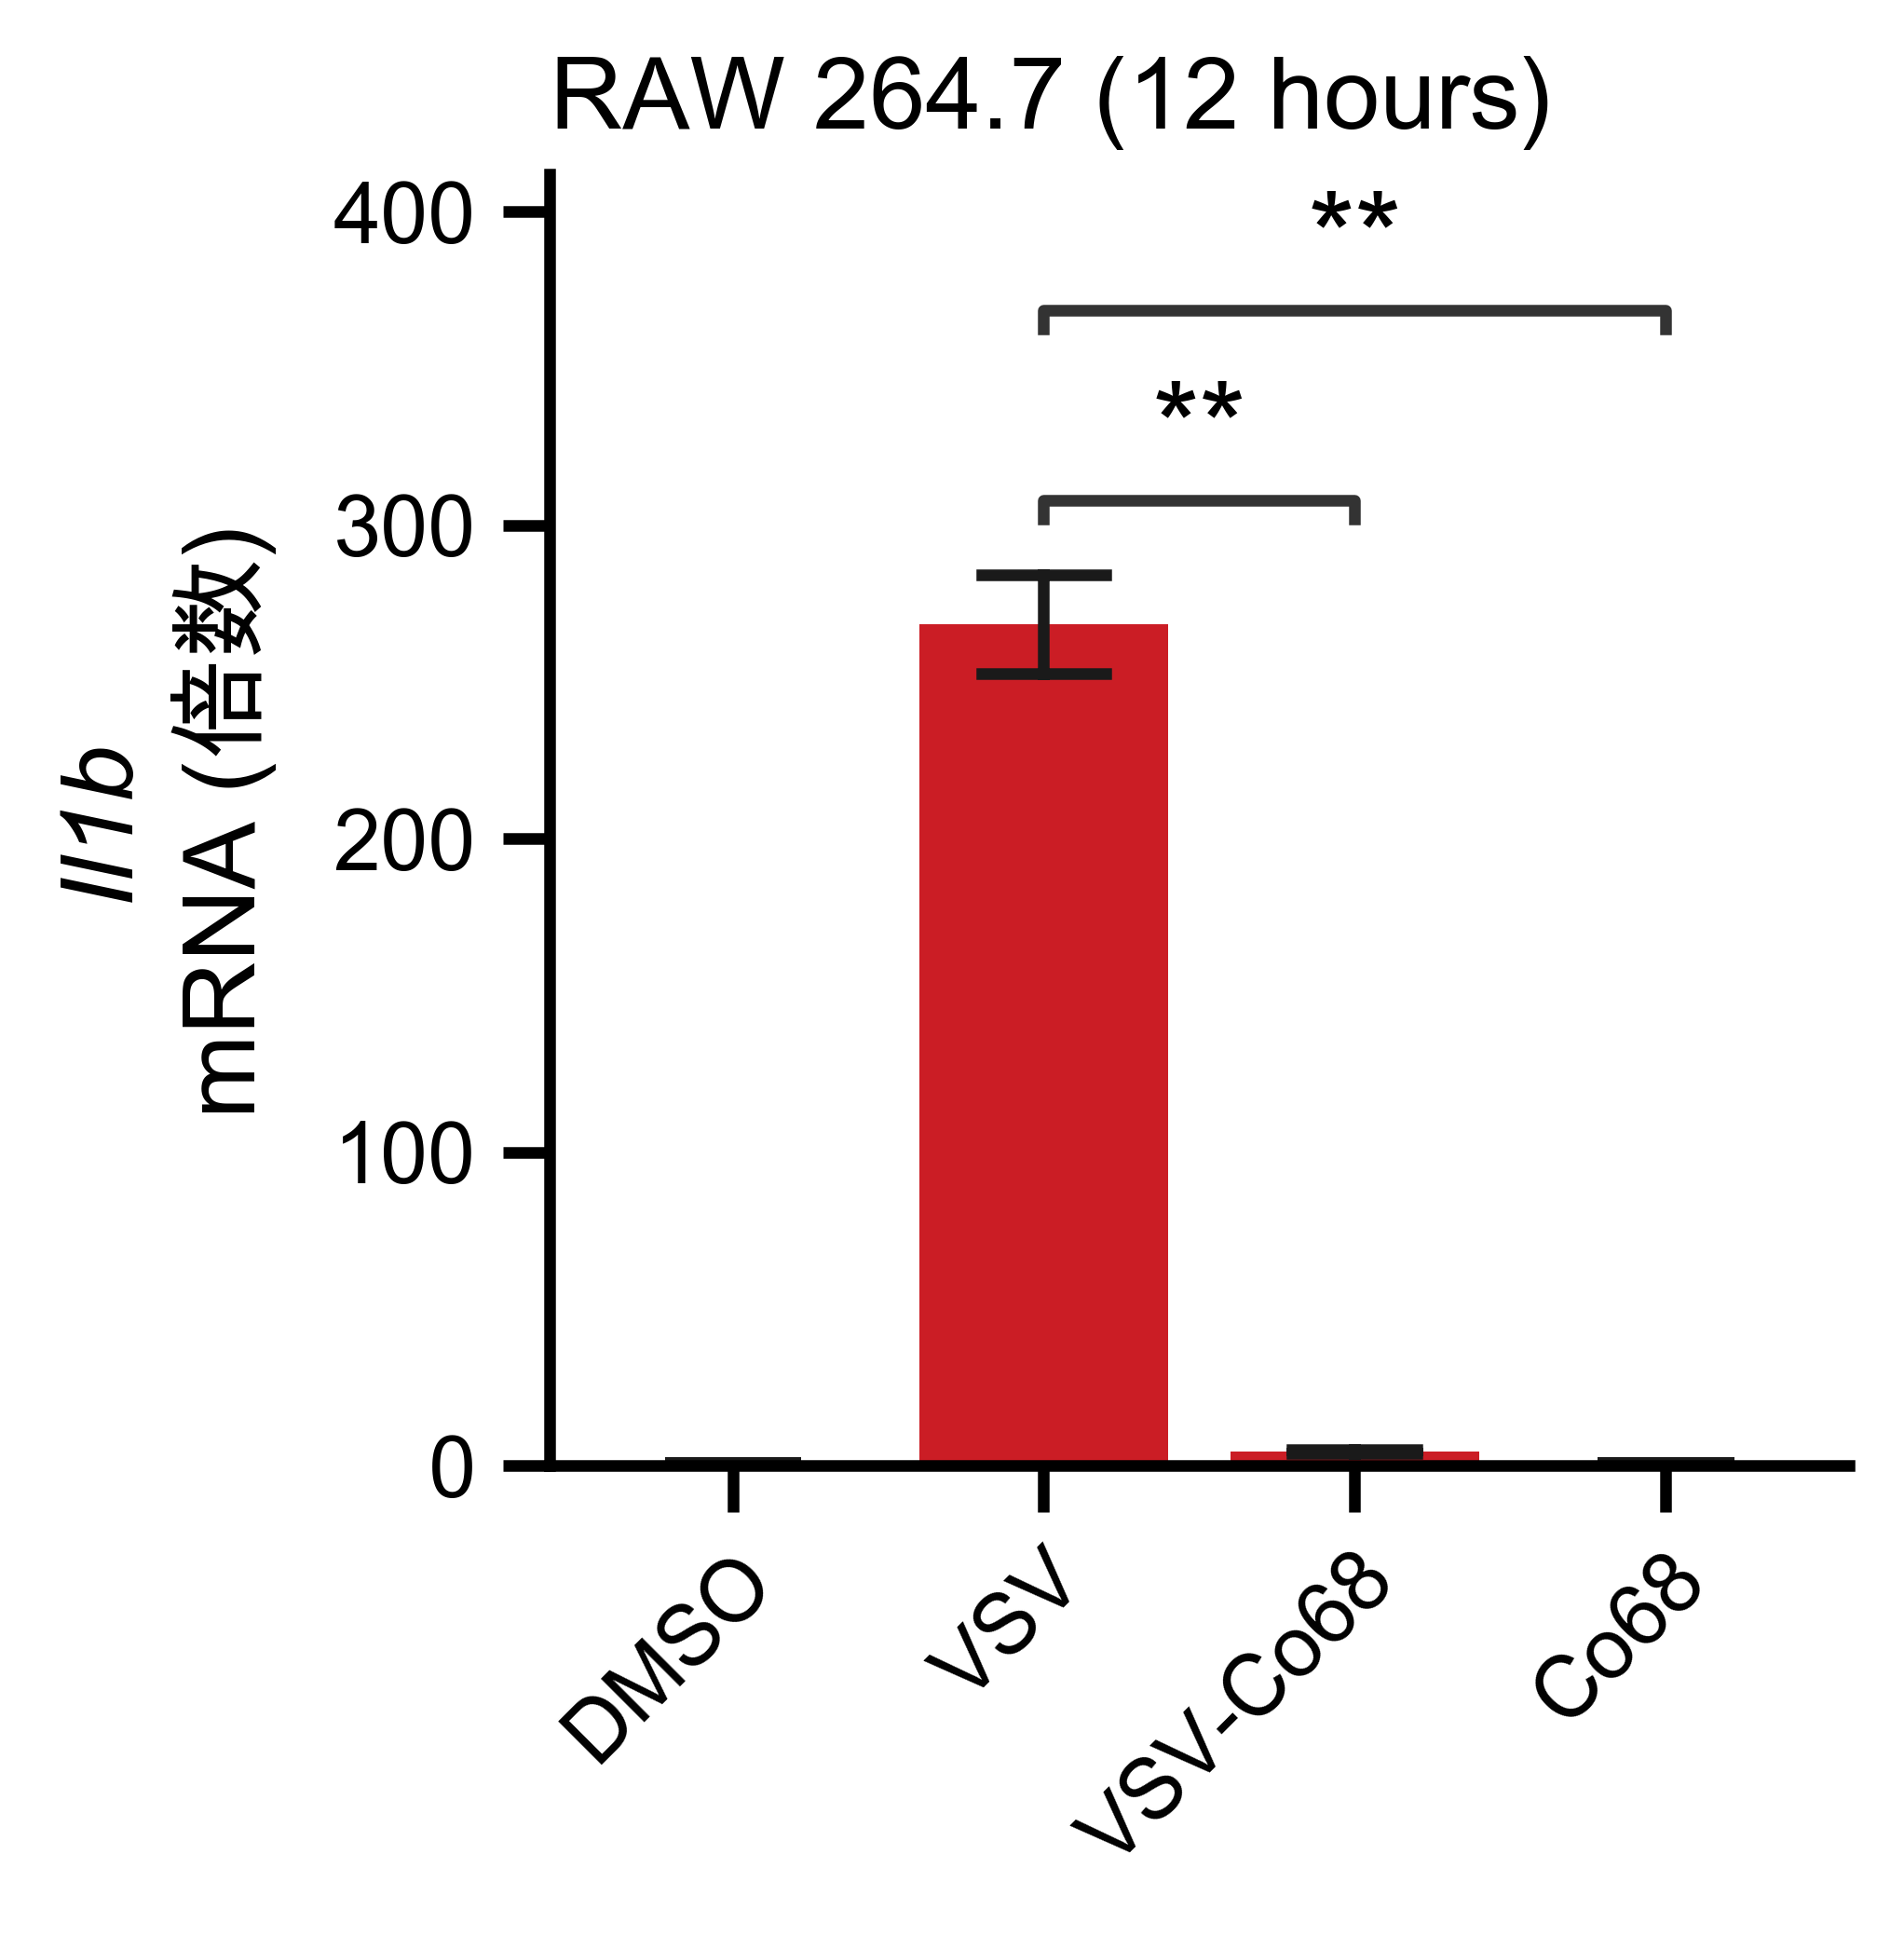

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from matplotlib.font_manager import FontProperties

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'
# rcParams['font.family'] = 'Arial'
rcParams['font.family'] = 'Arial Unicode MS'
rcParams['text.usetex'] = False
# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.3):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Il1b'
    Virus = 'VSV'
    cell = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    # outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/VSV_Co68/qPCR/IL1B'
    pad = 60
    fig = plt.figure(figsize=(3, 3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    # errwidth=1.5, errcolor='0.1'
    g = sns.barplot(data=exp, y=y, x=x, width=0.8, capsize=0.4, hue=x, legend=False, 
                    err_kws={'linewidth': 1.5, 'color': '0.1'},
        palette=[sns.color_palette('bright')[3]]*len(list(exp[x].drop_duplicates())),
        )
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel('', fontsize=13, fontstyle='italic')
    # 定义字体属性
    arial_font = FontProperties(family='Arial', style='italic', size=13)  # Arial 字体
    yahei_font = FontProperties(family='Arial Unicode MS', size=13)  # 微软雅黑字体

    tick_label = ax.yaxis.get_ticklabels()[-2]
    tick_bbox = tick_label.get_window_extent(renderer=fig.canvas.get_renderer())  # 获取边界框
    ax_coords1 = ax.transAxes.inverted().transform([(tick_bbox.x0-pad, tick_bbox.y0)])
    # ax_coords2 = ax.transAxes.inverted().transform([(tick_bbox.x0-160, tick_bbox.y0)])
    x2Value = ax_coords1[0][0]
    x1Value = x2Value - 0.1


    # 使用 annotate 设置不同字体 相对坐标系
    ax.annotate(
    f'{gene}',  # 文本内容
    xy=(x1Value, 0.5),  # 目标位置（数据坐标系）
    xycoords='axes fraction',  # 使用数据坐标系
    fontproperties=arial_font,  # Arial 字体
    rotation=90,  # 旋转 90 度
    ha='right',  # 水平对齐
    va='center'  # 垂直对齐
    )
    ax.annotate(
        'mRNA (倍数)',  # 微软雅黑字体部分
        xy=(x2Value, 0.5),  # 位置（紧接在 "IL1B" 后面）
        xycoords='axes fraction',  # 坐标系
        fontproperties=yahei_font,  # 微软雅黑字体
        rotation=90,
        ha='right',  # 水平对齐
        va='center'  # 垂直对齐
    )
    # 使用LaTex语法，可以保持仅局部字体是斜体：ylabel_text = f'$\\it{{{gene}}}$ (倍数)'
    # rcParams['font.family'] = 'SimHei'
    # ax.set_ylabel(r'$\mathit{A2111B}$ mRNA (倍数)', fontsize=13)
    # ax.set_ylabel(f'$\\it{{{gene}}}$ mRNA (倍数)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (PTX: 24h)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (CoCl$_2$: 24h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (12 hours)', fontsize=13, loc='left')
    # ax.set_title(f'{cell} ($CoCl_2$: 24h)', fontsize=13, loc='left')
    # plt.xlabel(r'$CoCl_2$ Concentration (µM)')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    # ax.set_xticks(range(len(list(exp[x].drop_duplicates()))), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
   
    ax.set_xticks(range(len(list(exp[x].drop_duplicates()))), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    # pairs=[('DMSO','100 μM'), ('DMSO','500 μM'), ('DMSO','20 μM')
    # ]
    pairs=[(f'{Virus}-Co68', f'{Virus}'), ('Co68', f'{Virus}')]
    # pairs=[('EMCV-Co68','EMCV'), ('Co68','EMCV')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_Co68_i_{Virus}_12h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{Virus}_12h.csv', index=None)

/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3643549827.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3643549827.py:23: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3643549827.py:23: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  g = sns.barplot(data=exp, y=y, x=x,
/var/folders/nn/xgzpg3v11195g8r75f8tk0mh0000gn/T/ipykernel_39879/3643549827.py:23: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidt

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MHV vs. MHV-Co68: t-test independent samples, P_val:1.534e-03 t=2.550e+01
MHV vs. Co68: t-test independent samples, P_val:1.038e-03 t=3.102e+01


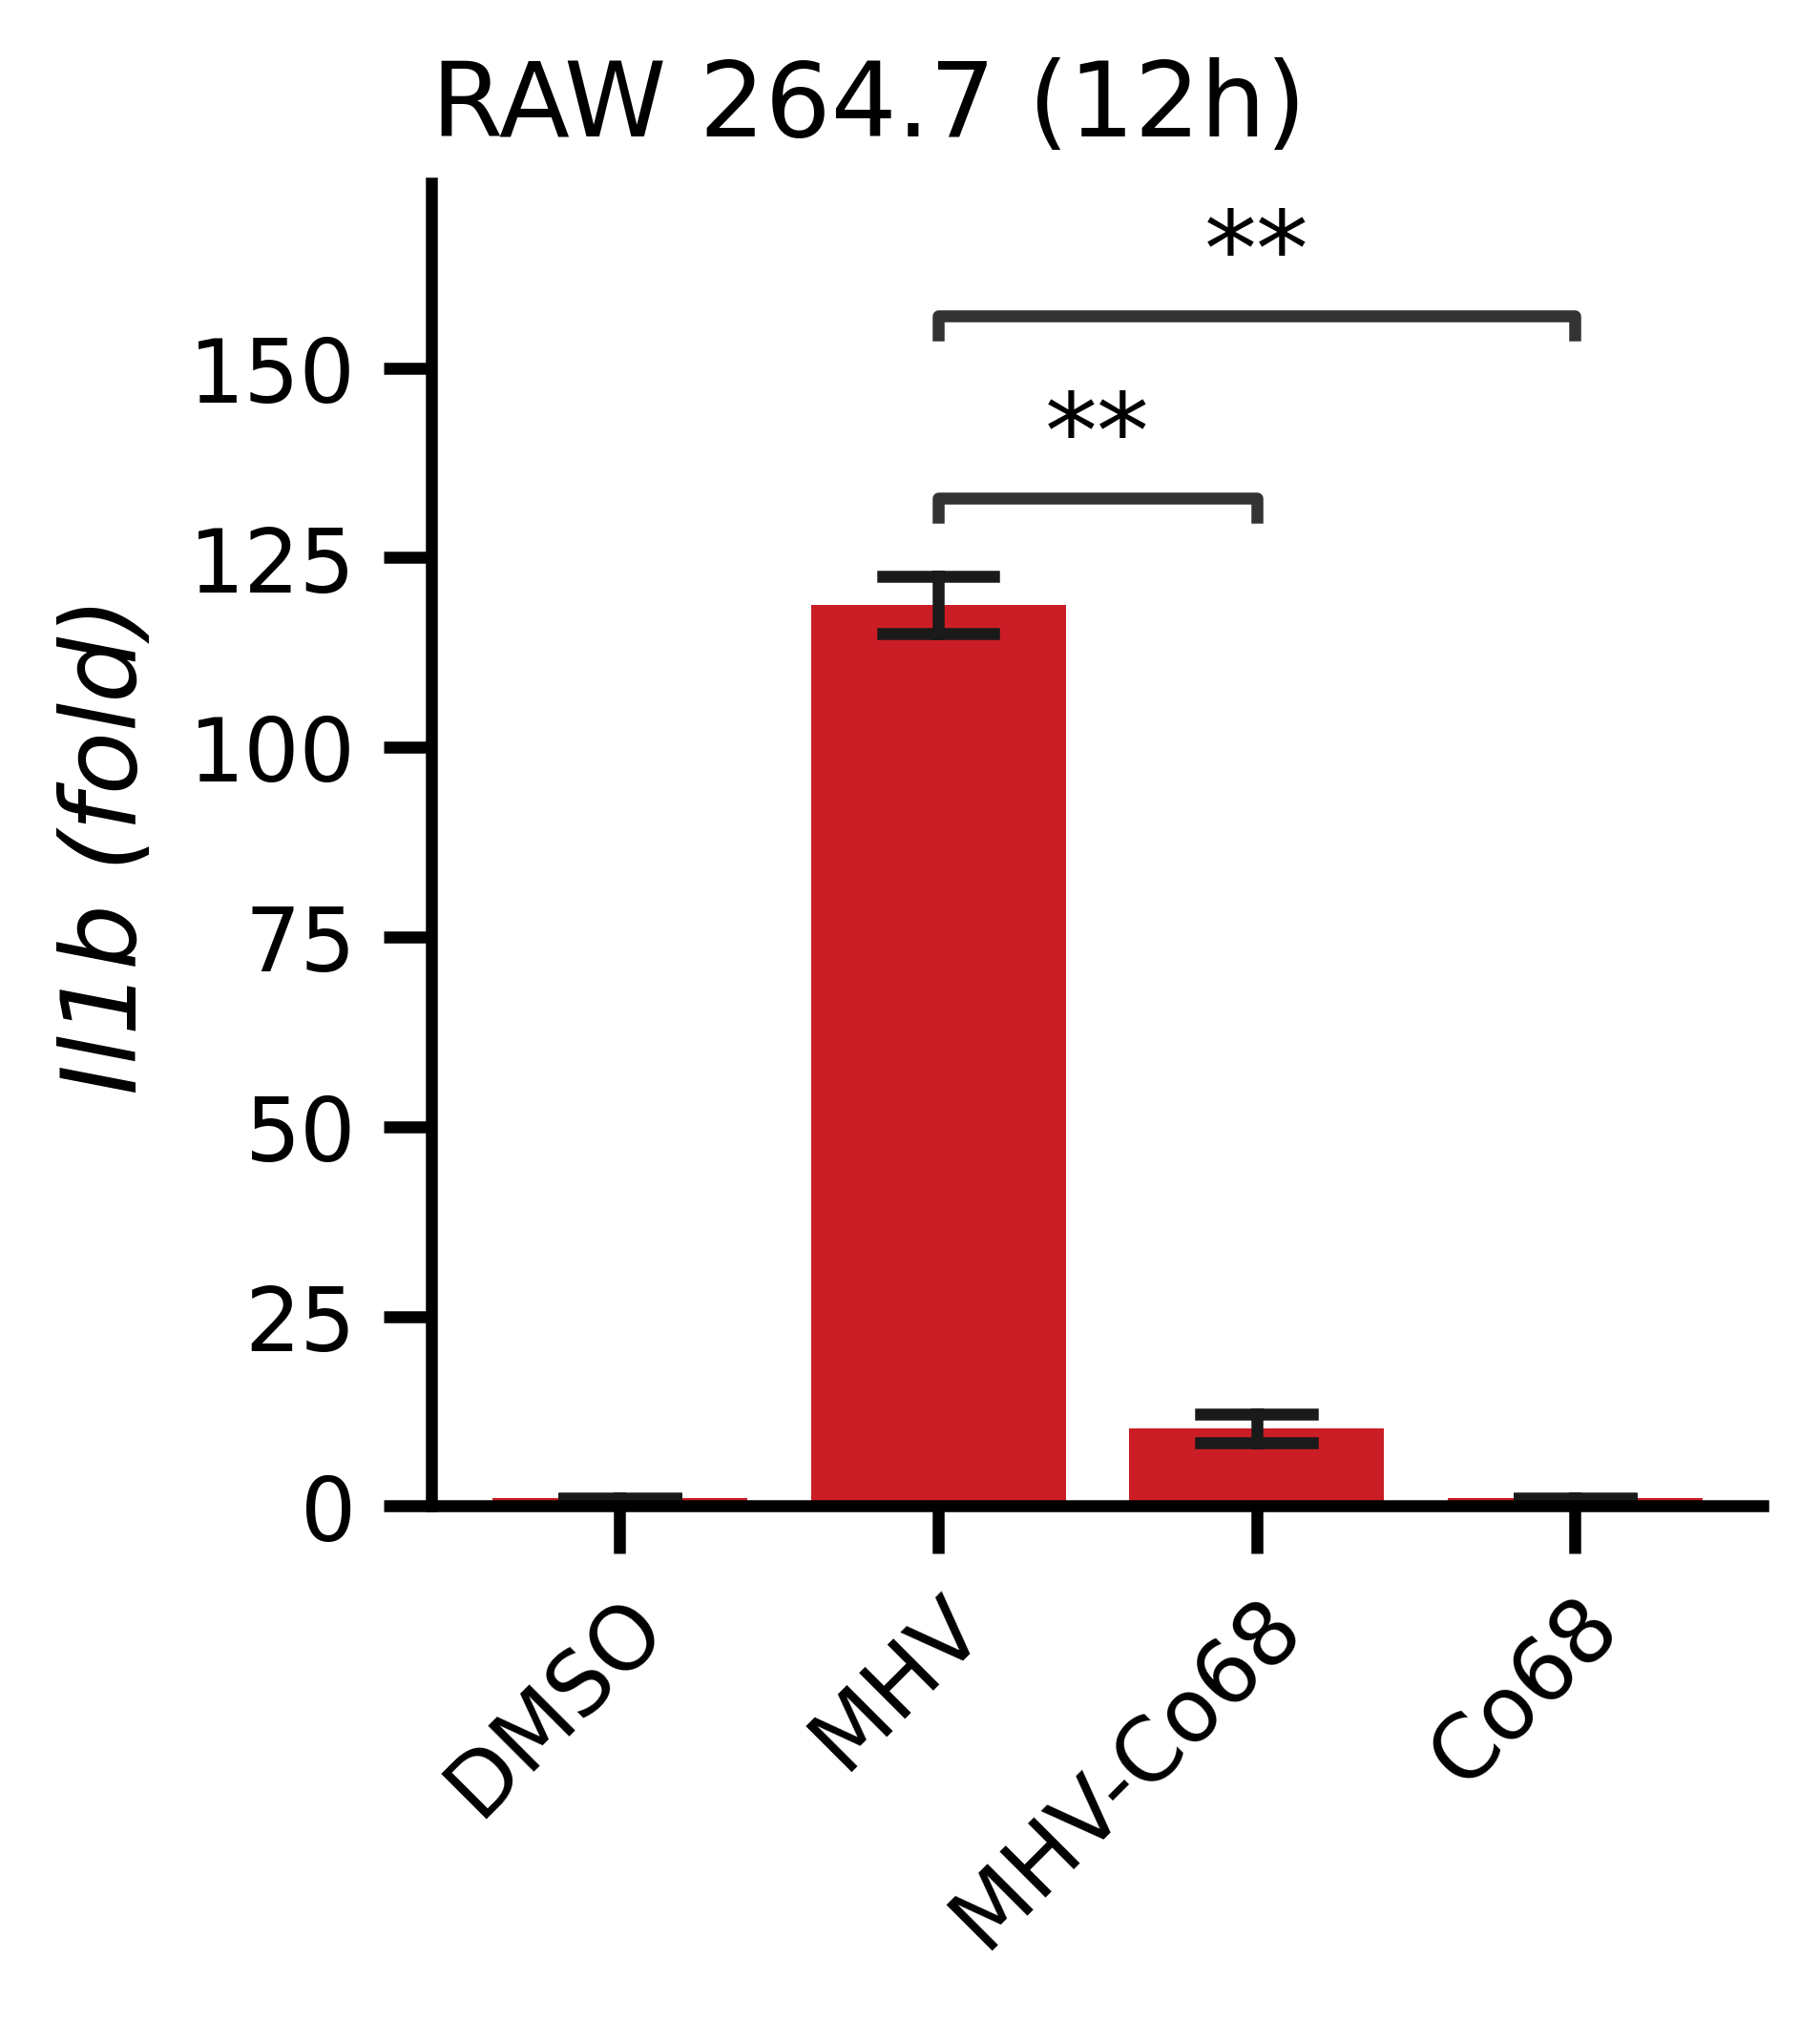

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Co68 inhibits LPS for 3 hours
with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Il1b'
    Virus = 'MHV'
    cell = 'RAW 264.7'
    # outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'
    outDir = '/Users/fenn/Documents/scriptPyRS/博士学位论文/中文图表/Co68_F3_IFN'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (Co68: 3h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (12h)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    pairs=[('MHV-Co68','MHV'), ('Co68','MHV')]
    # pairs=[('EMCV-Co68','EMCV'), ('Co68','EMCV')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_Co68_i_{Virus}_12h.pdf', dpi=700, bbox_inches='tight')
exp.to_csv(f'{outDir}/Co68_{cell}_{gene}_{Virus}_24h.csv', index=None)

In [47]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation/')
os.listdir()

['Co68_HSV_EMCV_12h.csv',
 'Co68_EMCV_5h.csv',
 'Co_LPS_3h_Il1b.csv',
 '.DS_Store',
 'Co68_RAW 264.7_Co68_i_EMCV_12h.pdf',
 'Co_LPS_3h_Ptgs2.csv',
 'Co68_RAW 264.7_Co68_i_VSV.pdf',
 'Co68_Il1b_RAW 264.7_antiInflammation.pdf',
 'Co68_RAW 264.7_Co68_i_HSV_12h.pdf',
 'Co68_RAW 264.7_Co68_i_LPS_3h.pdf',
 'Co68_RAW 264.7_Co68_i_VSV_12h.pdf',
 'Co68_HSV_5h.csv',
 'Co68_RAW 264.7_Co68_i_LPS.pdf',
 'Co68_VSV_5h.csv']

In [ ]:
exp = pd.read_csv('Co_LPS_3h_Il6.csv')
exp
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# LPS-Co68 inhibit effect

with sns.plotting_context('notebook', font_scale=1.1):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Nos2'
    cell = 'RAW 264.7'
    outDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/LastInflammation'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.35, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    # ax.set_title(f'{cell} (Co68: 3h)', fontsize=13, loc='left')
    ax.set_title(f'{cell} (3h)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    # pairs=[('Co68','Co68-TLR4i'), ('Co68','Co68-TRIFi'), ('Co68','Co68-TBK1i')
    # ]

    pairs=[('LPS-Co68','LPS'), ('Co68','LPS')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.02, verbose=True)
    annotator.apply_and_annotate()

plt.savefig(f'{outDir}/Co68_{cell}_{gene}_Co68_i_LPS_3h.pdf', dpi=700, bbox_inches='tight')

样本名称   检测项目     CT   ACTB   diff       pow          fc   samples
0    DMSO_3h  mIl1b  31.80  16.87 -14.93  0.000032    0.982673      DMSO
1    DMSO_3h  mIl1b  32.02  17.14 -14.88  0.000033    1.017327      DMSO
2     LPS_3h  mIl1b  19.78  16.67  -3.11  0.115824  402.905011       LPS
3     LPS_3h  mIl1b  19.89  16.71  -3.18  0.110338  412.632316       LPS
4  LPS-Co_3h  mIl1b  24.62  17.62  -7.00  0.007812  149.649713  LPS-Co68
5  LPS-Co_3h  mIl1b  24.64  17.65  -6.99  0.007867  156.316609  LPS-Co68
6      Co_3h  mIl1b  33.22  19.11 -14.11  0.000057    4.734817      Co68
7      Co_3h  mIl1b  33.49  19.17 -14.32  0.000049    2.299814      Co68

In [131]:
sm = []
for i in name:
    s = 'Co_' + str(i)
    sm.append(s)

sm

['Co_1',
 'Co_1',
 'Co_9',
 'Co_9',
 'Co_26',
 'Co_26',
 'Co_66',
 'Co_66',
 'Co_75',
 'Co_75',
 'Co_co100',
 'Co_co100']

In [287]:
import os
os.chdir('/Users/fenn/Documents/PhDProjects/Parp14/manuscript/scienceSignaling')

os.chdir('/Users/fenn/Documents/Co68/qPCR/stat1')
os.getcwd()

'/Users/fenn/Documents/Co68/qPCR/stat1'

In [13]:
from PyPDF2 import PdfMerger
targetPath = r'.'
pdfLst = [f for f in os.listdir(targetPath) if f.endswith('.pdf')]
pdfLst = [os.path.join(targetPath, filename) for filename in pdfLst]
pdfLst = pdfLst[::-1]
print(pdfLst)

['./manuscriptParp14_SA.pdf', './figureParp14.pdf']


In [152]:
z = pd.concat([exp1, exp2], axis=0).reset_index(drop=True)
z['drug'] = z['样本名称'].str.split('_', expand=True)[1]
# z['drug'] = pd.to_numeric(z['drug'])
z = z.sort_values('drug').reset_index(drop=True)
z

样本名称   检测项目     CT   ACTB   diff       pow            fc  drug
0      Co_1  hIFNB  32.16  25.44  -6.72  0.009486    140.366164     1
1      Co_1  hIFNB  32.41  25.48  -6.93  0.008201    121.351775     1
2     Co_26  hIFNB  29.76  15.65 -14.11  0.000057      0.836856    26
3     Co_26  hIFNB  29.83  15.70 -14.13  0.000056      0.825335    26
4      Co_3  hIFNB  32.02  18.31 -13.71  0.000075      3.188764     3
5      Co_3  hIFNB  36.00  18.36 -17.64  0.000005      0.209206     3
6     Co_31  hIFNB  24.31  16.25  -8.06  0.003747    160.118647    31
7     Co_31  hIFNB  24.31  16.22  -8.09  0.003670    156.823452    31
8      Co_4  hIFNB  28.54  16.91 -11.63  0.000316     13.482326     4
9      Co_4  hIFNB  28.25  16.71 -11.54  0.000336     14.350186     4
10    Co_54  hIFNB  21.87  15.96  -5.91  0.016631    710.651049    54
11    Co_54  hIFNB  22.14  16.14  -6.00  0.015625    667.672827    54
12     Co_6  hIFNB  22.04  16.67  -5.37  0.024181   1033.267094     6
13     Co_6  hIFNB  21.10  16.49  -4.61  0.040950   1749.828137     6
14    Co_66  hIFNB  30.60  16.30 -14.30  0.000050      0.733593    66
15    Co_66  hIFNB  30.38  16.28 -14.10  0.000057      0.842677    66
16    Co_67  hIFNB  30.98  16.00 -14.98  0.000031      1.322252    67
17    Co_67  hIFNB  36.00  16.18 -19.82  0.000001      0.046167    67
18    Co_68  hIFNB  19.76  18.43  -1.33  0.397768   5885.916666    68
19    Co_68  hIFNB  19.58  18.42  -1.16  0.447513   6622.000485    68
20    Co_70  hIFNB  19.00  17.14  -1.86  0.275476  11771.393660    70
21    Co_70  hIFNB  21.09  17.62  -3.47  0.090246   3856.289151    70
22    Co_72  hIFNB  21.50  15.81  -5.69  0.019370    827.719145    72
23    Co_72  hIFNB  21.62  15.90  -5.72  0.018972    810.684931    72
24    Co_73  hIFNB  30.21  15.52 -14.69  0.000038      1.616639    73
25    Co_73  hIFNB  30.00  15.46 -14.54  0.000042      1.793773    73
26    Co_75  hIFNB  29.70  16.97 -12.73  0.000147      2.178072    75
27    Co_75  hIFNB  29.62  16.87 -12.75  0.000145      2.148085    75
28     Co_9  hIFNB  31.58  17.46 -14.12  0.000056      0.831075     9
29     Co_9  hIFNB  31.46  17.41 -14.05  0.000059      0.872394     9
30  Co_dmso  hIFNB  29.44  14.31 -15.13  0.000028      1.191681  dmso
31  Co_dmso  hIFNB  30.16  14.47 -15.69  0.000019      0.808319  dmso
32   Co_n68  hIFNB  17.66  16.37  -1.29  0.408951  17474.911347   n68
33   Co_n68  hIFNB  17.51  16.33  -1.18  0.441351  18859.417756   n68
34   Co_o68  hIFNB  19.92  18.29  -1.63  0.323088  13805.901885   o68
35   Co_o68  hIFNB  19.90  18.07  -1.83  0.281265  12018.735663   o68

In [133]:
exp2 = exp.loc[list(range(12))]
# exp2['Trt'] = 'Co'
# 
# exp2['样本名称'] = exp2['样本名称'].str.replace(regex='^', 'Co_')
exp2['样本名称'] = sm
exp2['样本名称'] = exp2['样本名称'].str.replace('co100','68')
exp2

样本名称   检测项目     CT   ACTB   diff       pow           fc
0    Co_1  hIFNB  32.16  25.44  -6.72  0.009486   140.366164
1    Co_1  hIFNB  32.41  25.48  -6.93  0.008201   121.351775
2    Co_9  hIFNB  31.46  17.41 -14.05  0.000059     0.872394
3    Co_9  hIFNB  31.58  17.46 -14.12  0.000056     0.831075
4   Co_26  hIFNB  29.76  15.65 -14.11  0.000057     0.836856
5   Co_26  hIFNB  29.83  15.70 -14.13  0.000056     0.825335
6   Co_66  hIFNB  30.38  16.28 -14.10  0.000057     0.842677
7   Co_66  hIFNB  30.60  16.30 -14.30  0.000050     0.733593
8   Co_75  hIFNB  29.62  16.87 -12.75  0.000145     2.148085
9   Co_75  hIFNB  29.70  16.97 -12.73  0.000147     2.178072
10  Co_68  hIFNB  19.58  18.42  -1.16  0.447513  6622.000485
11  Co_68  hIFNB  19.76  18.43  -1.33  0.397768  5885.916666

In [82]:
exp1 =exp
exp1['样本名称'] = exp1['样本名称'].str.replace('ht','Co')
exp1

样本名称   检测项目     CT   ACTB   diff       pow            fc
0      Co_3  hIFNB  32.02  18.31 -13.71  0.000075      3.188764
1      Co_3  hIFNB  36.00  18.36 -17.64  0.000005      0.209206
2     Co_31  hIFNB  24.31  16.22  -8.09  0.003670    156.823452
3     Co_31  hIFNB  24.31  16.25  -8.06  0.003747    160.118647
4      Co_4  hIFNB  28.25  16.71 -11.54  0.000336     14.350186
5      Co_4  hIFNB  28.54  16.91 -11.63  0.000316     13.482326
6     Co_54  hIFNB  21.87  15.96  -5.91  0.016631    710.651049
7     Co_54  hIFNB  22.14  16.14  -6.00  0.015625    667.672827
8      Co_6  hIFNB  21.10  16.49  -4.61  0.040950   1749.828137
9      Co_6  hIFNB  22.04  16.67  -5.37  0.024181   1033.267094
10    Co_67  hIFNB  30.98  16.00 -14.98  0.000031      1.322252
11    Co_67  hIFNB  36.00  16.18 -19.82  0.000001      0.046167
12    Co_70  hIFNB  19.00  17.14  -1.86  0.275476  11771.393660
13    Co_70  hIFNB  21.09  17.62  -3.47  0.090246   3856.289151
14    Co_72  hIFNB  21.50  15.81  -5.69  0.019370    827.719145
15    Co_72  hIFNB  21.62  15.90  -5.72  0.018972    810.684931
16    Co_73  hIFNB  30.00  15.46 -14.54  0.000042      1.793773
17    Co_73  hIFNB  30.21  15.52 -14.69  0.000038      1.616639
18  Co_dmso  hIFNB  29.44  14.31 -15.13  0.000028      1.191681
19  Co_dmso  hIFNB  30.16  14.47 -15.69  0.000019      0.808319
20   Co_n68  hIFNB  17.51  16.33  -1.18  0.441351  18859.417756
21   Co_n68  hIFNB  17.66  16.37  -1.29  0.408951  17474.911347
22   Co_o68  hIFNB  19.90  18.07  -1.83  0.281265  12018.735663
23   Co_o68  hIFNB  19.92  18.29  -1.63  0.323088  13805.901885

In [57]:
exp['样本名称'] = exp['样本名称'].str.replace('DMSO$','DMSO-0H')
exp['样本名称'] = exp['样本名称'].str.replace('DRUG$','DRUG-0H')

exp['trt'] = exp['样本名称'].str.split('-',expand=True)[1]
exp['trt'] = exp['trt'].str.replace('DRUG','Co68')
exp['group'] = exp['样本名称'].str.split('-',expand=True)[2]

exp = exp.sort_values(['group','trt'], ascending=[True,False]).reset_index(drop=True)
exp

<ipython-input-57-2c4412535f3a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exp['样本名称'] = exp['样本名称'].str.replace('DMSO$','DMSO-0H')
<ipython-input-57-2c4412535f3a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  exp['样本名称'] = exp['样本名称'].str.replace('DRUG$','DRUG-0H')


样本名称  检测项目     CT   ACTB   diff       pow             fc   trt  \
0    RAW-DMSO-0H  VSVg  30.96  15.07 -15.89  0.000016       0.923901  DMSO   
1    RAW-DMSO-0H  VSVg  30.98  15.31 -15.67  0.000019       1.076099  DMSO   
2    RAW-DRUG-0H  VSVg  31.06  16.96 -14.10  0.000057       3.194988  Co68   
3    RAW-DRUG-0H  VSVg  31.21  16.97 -14.24  0.000052       2.899513  Co68   
4   RAW-DMSO-15H  VSVg  19.81  17.41  -2.40  0.189465   10629.679785  DMSO   
5   RAW-DMSO-15H  VSVg  19.97  17.43  -2.54  0.171943    9646.638020  DMSO   
6   RAW-DRUG-15H  VSVg  20.77  14.14  -6.63  0.010097     566.452242  Co68   
7   RAW-DRUG-15H  VSVg  20.90  14.15  -6.75  0.009291     521.242358  Co68   
8   RAW-DMSO-20H  VSVg  20.75  16.35  -4.40  0.047366    2657.419946  DMSO   
9   RAW-DMSO-20H  VSVg  21.03  16.40  -4.63  0.040386    2265.808968  DMSO   
10  RAW-DRUG-20H  VSVg  21.54  13.96  -7.58  0.005226     293.214069  Co68   
11  RAW-DRUG-20H  VSVg  21.65  14.01  -7.64  0.005013     281.269735  Co68   
12  RAW-DMSO-30H  VSVg  21.25  21.15  -0.10  0.933033   52346.683532  DMSO   
13  RAW-DMSO-30H  VSVg  21.29  21.34   0.05  1.035265   58082.282011  DMSO   
14  RAW-DRUG-30H  VSVg  22.16  19.40  -2.76  0.147624    8282.269982  Co68   
15  RAW-DRUG-30H  VSVg  22.24  19.41  -2.83  0.140632    7890.005095  Co68   
16   RAW-DMSO-3H  VSVg  21.90  14.90  -7.00  0.007813     438.310830  DMSO   
17   RAW-DMSO-3H  VSVg  22.23  15.01  -7.22  0.006708     376.318529  DMSO   
18   RAW-DRUG-3H  VSVg  23.51  17.76  -5.75  0.018581    1042.484716  Co68   
19   RAW-DRUG-3H  VSVg  23.75  17.84  -5.91  0.016631     933.049957  Co68   
20  RAW-DMSO-40H  VSVg  20.44  22.52   2.08  4.228072  237210.856888  DMSO   
21  RAW-DMSO-40H  VSVg  20.45  22.74   2.29  4.890561  274378.995257  DMSO   
22  RAW-DRUG-40H  VSVg  19.86  22.08   2.22  4.658934  261383.856747  Co68   
23  RAW-DRUG-40H  VSVg  20.05  22.49   2.44  5.426417  304442.556914  Co68   

   group  
0     0H  
1     0H  
2     0H  
3     0H  
4    15H  
5    15H  
6    15H  
7    15H  
8    20H  
9    20H  
10   20H  
11   20H  
12   30H  
13   30H  
14   30H  
15   30H  
16    3H  
17    3H  
18    3H  
19    3H  
20   40H  
21   40H  
22   40H  
23   40H

In [ ]:
# 指定位置插入一列数据
colName = exp.columns.to_list()
colName.insert(3,'ref')
exp = exp.reindex(columns=colName)
exp['ref'] = ifnb.loc[list(range(int(len(IFNB['CT'])/2))), 'CT']
exp

In [58]:
exp = exp.loc[list(range(4)) + list(range(4,16)) + list(range(20,24))].reset_index(drop=True)
# exp['样本名称'] = exp['样本名称'].str.replace('CO', 'Co68')
# exp['样本名称'] = exp['样本名称'].str.replace('DMSO', 'CO_0h')
# exp['samples'] = exp['样本名称'].str.split('_', expand=True)[2]
exp['group'] = exp['group'].str.replace('H','h')
exp

样本名称  检测项目     CT   ACTB   diff       pow             fc   trt  \
0    RAW-DMSO-0H  VSVg  30.96  15.07 -15.89  0.000016       0.923901  DMSO   
1    RAW-DMSO-0H  VSVg  30.98  15.31 -15.67  0.000019       1.076099  DMSO   
2    RAW-DRUG-0H  VSVg  31.06  16.96 -14.10  0.000057       3.194988  Co68   
3    RAW-DRUG-0H  VSVg  31.21  16.97 -14.24  0.000052       2.899513  Co68   
4   RAW-DMSO-15H  VSVg  19.81  17.41  -2.40  0.189465   10629.679785  DMSO   
5   RAW-DMSO-15H  VSVg  19.97  17.43  -2.54  0.171943    9646.638020  DMSO   
6   RAW-DRUG-15H  VSVg  20.77  14.14  -6.63  0.010097     566.452242  Co68   
7   RAW-DRUG-15H  VSVg  20.90  14.15  -6.75  0.009291     521.242358  Co68   
8   RAW-DMSO-20H  VSVg  20.75  16.35  -4.40  0.047366    2657.419946  DMSO   
9   RAW-DMSO-20H  VSVg  21.03  16.40  -4.63  0.040386    2265.808968  DMSO   
10  RAW-DRUG-20H  VSVg  21.54  13.96  -7.58  0.005226     293.214069  Co68   
11  RAW-DRUG-20H  VSVg  21.65  14.01  -7.64  0.005013     281.269735  Co68   
12  RAW-DMSO-30H  VSVg  21.25  21.15  -0.10  0.933033   52346.683532  DMSO   
13  RAW-DMSO-30H  VSVg  21.29  21.34   0.05  1.035265   58082.282011  DMSO   
14  RAW-DRUG-30H  VSVg  22.16  19.40  -2.76  0.147624    8282.269982  Co68   
15  RAW-DRUG-30H  VSVg  22.24  19.41  -2.83  0.140632    7890.005095  Co68   
16  RAW-DMSO-40H  VSVg  20.44  22.52   2.08  4.228072  237210.856888  DMSO   
17  RAW-DMSO-40H  VSVg  20.45  22.74   2.29  4.890561  274378.995257  DMSO   
18  RAW-DRUG-40H  VSVg  19.86  22.08   2.22  4.658934  261383.856747  Co68   
19  RAW-DRUG-40H  VSVg  20.05  22.49   2.44  5.426417  304442.556914  Co68   

   group  
0     0h  
1     0h  
2     0h  
3     0h  
4    15h  
5    15h  
6    15h  
7    15h  
8    20h  
9    20h  
10   20h  
11   20h  
12   30h  
13   30h  
14   30h  
15   30h  
16   40h  
17   40h  
18   40h  
19   40h

In [1053]:
a = [str(i)+'h' for i in list(range(0,7,2))]
exp['samples'] = [i for i in a for j in range(2)]
exp

样本名称   检测项目     CT   ACTB   diff       pow         fc samples
0    Hela_DMSO  hIFNB  32.66  15.49 -17.17  0.000007   1.191681      0h
1    Hela_DMSO  hIFNB  33.28  15.55 -17.73  0.000005   0.808319      0h
2     Hela_VSV  hIFNB  32.36  15.25 -17.11  0.000007   1.242286      2h
3     Hela_VSV  hIFNB  32.67  15.31 -17.36  0.000006   1.044634      2h
4  Hela_polyIC  hIFNB  30.48  15.56 -14.92  0.000032   5.668620      4h
5  Hela_polyIC  hIFNB  30.69  15.88 -14.81  0.000035   6.117735      4h
6   Hela_CO_1h  hIFNB  36.19  24.07 -12.12  0.000225  39.478561      6h
7   Hela_CO_1h  hIFNB  36.00  24.13 -11.87  0.000267  46.948186      6h

In [971]:
# a = [str(i)+'h' for i in range(1,6,2)]
a = ['DMSO','VSV', 'VSV-Co68', 'Co68']
exp['samples'] = [i for i in  a for j in range(2)]
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc   samples
0      CO_5H  Il1b  25.94  14.92 -11.02  0.000482    0.804983      DMSO
1      CO_5H  Il1b  26.19  15.74 -10.45  0.000715    1.195017      DMSO
2     VSV_5H  Il1b  24.25  22.34  -1.91  0.266093  444.805486       VSV
3     VSV_5H  Il1b  24.29  22.65  -1.64  0.320856  536.349937       VSV
4  VSV_CO_5H  Il1b  27.90  19.84  -8.06  0.003747    6.263768  VSV-Co68
5  VSV_CO_5H  Il1b  28.11  20.55  -7.56  0.005299    8.858306  VSV-Co68
6    CO36_5H  Il1b  27.33  18.10  -9.23  0.001665    2.783752      Co68
7    CO36_5H  Il1b  27.37  18.27  -9.10  0.001822    3.046242      Co68

In [751]:
exp['samples'] = exp['样本名称'].str.split('-', expand=True)[1]
exp

样本名称   检测项目     CT   diff       pow         fc samples
0  293T-DMSO  IFNB1  38.93 -11.24  0.000413   0.223595    DMSO
1  293T-DMSO  IFNB1  36.00  -8.25  0.003285   1.776405    DMSO
2    293T-3H  IFNB1  35.82  -5.39  0.023848  12.896972      3H
3    293T-3H  IFNB1  37.93  -7.31  0.006302   3.408083      3H
4    293T-6H  IFNB1  34.86  -3.39  0.095391  51.587887      6H
5    293T-6H  IFNB1  35.44  -3.71  0.076415  41.325503      6H

In [972]:
exp.loc[[3], 'fc'] = [484]
exp

样本名称  检测项目     CT   ACTB   diff       pow          fc   samples
0      CO_5H  Il1b  25.94  14.92 -11.02  0.000482    0.804983      DMSO
1      CO_5H  Il1b  26.19  15.74 -10.45  0.000715    1.195017      DMSO
2     VSV_5H  Il1b  24.25  22.34  -1.91  0.266093  444.805486       VSV
3     VSV_5H  Il1b  24.29  22.65  -1.64  0.320856  484.000000       VSV
4  VSV_CO_5H  Il1b  27.90  19.84  -8.06  0.003747    6.263768  VSV-Co68
5  VSV_CO_5H  Il1b  28.11  20.55  -7.56  0.005299    8.858306  VSV-Co68
6    CO36_5H  Il1b  27.33  18.10  -9.23  0.001665    2.783752      Co68
7    CO36_5H  Il1b  27.37  18.27  -9.10  0.001822    3.046242      Co68

In [806]:
exp = exp.loc[list(range(12)) + [22,23]].reset_index(drop=True)
exp

样本名称   检测项目     CT   diff       pow         fc
0     PM-2H  IFNB1  33.12 -11.55  0.000334  28.058964
1     PM-2H  IFNB1  34.35 -12.68  0.000152  12.820582
2     PM-3H  IFNB1  33.65 -11.27  0.000405  34.069051
3     PM-3H  IFNB1  33.88 -11.25  0.000411  34.544637
4     PM-4H  IFNB1  34.91 -11.50  0.000345  29.048462
5     PM-4H  IFNB1  36.10 -12.68  0.000152  12.820582
6   PM-C176  IFNB1  35.87 -12.16  0.000219  18.384141
7   PM-C176  IFNB1  36.14 -12.32  0.000196  16.454267
8    PM-C29  IFNB1  31.67 -12.72  0.000148  12.470003
9    PM-C29  IFNB1  32.71 -13.75  0.000073   6.106687
10  PM-DMSO  IFNB1  33.32 -15.99  0.000015   1.292702
11  PM-DMSO  IFNB1  34.34 -16.86  0.000008   0.707298
12    PM-YS  IFNB1  31.61 -11.56  0.000331  27.865147
13    PM-YS  IFNB1  31.71 -11.54  0.000336  28.254130

In [808]:
exp = exp.loc[[10,11,6,7,0,1,2,3,4,5,12,13]].reset_index(drop=True)
exp = exp.reset_index(drop=True)
exp

样本名称   检测项目     CT   diff       pow         fc
0   PM-DMSO  IFNB1  33.32 -15.99  0.000015   1.292702
1   PM-DMSO  IFNB1  34.34 -16.86  0.000008   0.707298
2   PM-C176  IFNB1  35.87 -12.16  0.000219  18.384141
3   PM-C176  IFNB1  36.14 -12.32  0.000196  16.454267
4     PM-2H  IFNB1  33.12 -11.55  0.000334  28.058964
5     PM-2H  IFNB1  34.35 -12.68  0.000152  12.820582
6     PM-3H  IFNB1  33.65 -11.27  0.000405  34.069051
7     PM-3H  IFNB1  33.88 -11.25  0.000411  34.544637
8     PM-4H  IFNB1  34.91 -11.50  0.000345  29.048462
9     PM-4H  IFNB1  36.10 -12.68  0.000152  12.820582
10    PM-YS  IFNB1  31.61 -11.56  0.000331  27.865147
11    PM-YS  IFNB1  31.71 -11.54  0.000336  28.254130

In [ ]:
geneExp = exp[exp['样本名称'].str.contains('DMSO|Co_2ul', flags=re.IGNORECASE)].reset_index(drop=True)
geneExp['样本名称'] = geneExp['样本名称'].str.replace('CO_2ul', 'Co68')
geneExp['group'] = geneExp['样本名称'].str.split('_', expand=True)[0]
geneExp['trt'] = geneExp['样本名称'].str.split('_', expand=True)[1]
geneExp = geneExp.sort_values(['group','trt'], ascending=[True, False])
geneExp

In [713]:
exp = exp[exp['样本名称'].str.contains('CO3h|DMSO|MOCK')].reset_index(drop=True)
exp = exp.sort_values('样本名称', ascending=False).reset_index(drop=True)
# exp.loc[[3],'fc'] = [5.503924]
exp

样本名称   检测项目     CT   diff       pow        fc
0  J774-DMSO  IFNB1  32.24 -14.79  0.000035  1.184995
1  J774-DMSO  IFNB1  33.57 -15.33  0.000024  0.815005

In [717]:
exp1 = exp.loc[[6,7] + list(range(6))].reset_index(drop=True)
# exp.loc[[3,6,7],'fc'] = [5.503924,49,55]
exp1

样本名称   检测项目     CT   diff       pow        fc
0  J774-DMSO  IFNB1  32.24 -14.79  0.000035  1.184995
1  J774-DMSO  IFNB1  33.57 -15.33  0.000024  0.815005
2    J774-1H  IFNB1  33.50 -15.96  0.000016  0.526637
3    J774-1H  IFNB1  33.84 -16.27  0.000013  0.424807
4    J774-2H  IFNB1  36.00 -14.29  0.000050  1.675836
5    J774-2H  IFNB1  36.00 -14.17  0.000054  1.821189
6    J774-3H  IFNB1  31.65 -16.24  0.000013  0.433734
7    J774-3H  IFNB1  31.92 -16.31  0.000012  0.413191

In [810]:
# a = ['50um', '100um', '200um']
a = list(range(6))
sam = [str(i) + 'h' for i in a for m in range(2)]
sam

['0h', '0h', '1h', '1h', '2h', '2h', '3h', '3h', '4h', '4h', '5h', '5h']

In [812]:
# a = ['50um', '100um', '200um']
a = list(range(6))
sam = [str(i) + 'h' for i in a for m in range(2)]
sam
exp['samples'] = sam
exp = exp.loc[list(range(4)) + [6,7,10,11]].reset_index(drop=True)
exp

样本名称   检测项目     CT   diff       pow         fc samples
0  PM-DMSO  IFNB1  33.32 -15.99  0.000015   1.292702      0h
1  PM-DMSO  IFNB1  34.34 -16.86  0.000008   0.707298      0h
2  PM-C176  IFNB1  35.87 -12.16  0.000219  18.384141      1h
3  PM-C176  IFNB1  36.14 -12.32  0.000196  16.454267      1h
4    PM-3H  IFNB1  33.65 -11.27  0.000405  34.069051      3h
5    PM-3H  IFNB1  33.88 -11.25  0.000411  34.544637      3h
6    PM-YS  IFNB1  31.61 -11.56  0.000331  27.865147      5h
7    PM-YS  IFNB1  31.71 -11.54  0.000336  28.254130      5h

In [513]:
exp = pd.concat([geneExp,expExp], axis=0).reset_index(drop=True)
exp = exp.drop([12,13,18,19],axis=0).reset_index(drop=True)
exp

样本名称    检测项目     CT   diff       pow            fc
0   HT29-CO71  hIFNB1  22.66  -3.70  0.076947   1152.396453
1   HT29-CO71  hIFNB1  22.77  -3.62  0.081334   1218.103841
2   HT29-CO72  hIFNB1  22.95  -4.89  0.033726    505.098662
3   HT29-CO72  hIFNB1  23.05  -4.78  0.036398    545.116738
4   HT29-CO73  hIFNB1  25.14  -8.30  0.003173     47.518632
5   HT29-CO73  hIFNB1  25.14  -8.30  0.003173     47.518632
6   HT29-DMSO  hIFNB1  29.97 -13.76  0.000072      1.079544
7   HT29-DMSO  hIFNB1  30.21 -13.99  0.000061      0.920456
8    HT29-O68  hIFNB1  21.01  -2.50  0.176777   2647.511820
9    HT29-O68  hIFNB1  21.13  -2.59  0.166086   2487.397584
10      ht_31   hIFNB  24.31  -8.09  0.003670    156.823452
11      ht_31   hIFNB  24.31  -8.06  0.003747    160.118647
12      ht_54   hIFNB  21.87  -5.91  0.016631    710.651049
13      ht_54   hIFNB  22.14  -6.00  0.015625    667.672827
14       ht_6   hIFNB  21.10  -4.61  0.040950   1749.828137
15       ht_6   hIFNB  22.04  -5.37  0.024181   1033.267094
16      ht_70   hIFNB  19.00  -1.86  0.275476  11771.393660
17      ht_70   hIFNB  21.09  -3.47  0.090246   3856.289151
18     ht_o68   hIFNB  19.90  -1.83  0.281265  12018.735663
19     ht_o68   hIFNB  19.92  -1.63  0.323088  13805.901885

In [611]:
# sample = [str(i) + 'h' for i in list(range(1,10,2))]
sample = ['Co' + str(i) for i in list(range(67,73))]
sample

sam = [var for var in sample for i in range(2)]
print(sam)
len(sam)

['Co67', 'Co67', 'Co68', 'Co68', 'Co69', 'Co69', 'Co70', 'Co70', 'Co71', 'Co71', 'Co72', 'Co72']


12

In [531]:
exp = exp[exp['samples'].str.contains('Co|DMSO')]
exp = exp.sort_values('samples').reset_index(drop=True)
exp = exp.loc[[16,17]+list(range(16))].reset_index(drop=True)
exp


样本名称    检测项目     CT   diff       pow           fc samples
0   HT29-DMSO  hIFNB1  30.21 -13.99  0.000061     0.920456    DMSO
1   HT29-DMSO  hIFNB1  29.97 -13.76  0.000072     1.079544    DMSO
2       ht_31   hIFNB  24.31  -8.09  0.003670   156.823452    Co66
3       ht_31   hIFNB  24.31  -8.06  0.003747   160.118647    Co66
4       ht_54   hIFNB  22.14  -6.00  0.015625   667.672827    Co67
5       ht_54   hIFNB  21.87  -5.91  0.016631   710.651049    Co67
6      ht_o68   hIFNB  19.90  -1.83  0.281265  6018.000000    Co68
7      ht_o68   hIFNB  19.92  -1.63  0.323088  5805.000000    Co68
8        ht_6   hIFNB  21.10  -4.61  0.040950  1749.828137    Co69
9        ht_6   hIFNB  22.04  -5.37  0.024181  1033.267094    Co69
10      ht_70   hIFNB  19.00  -1.86  0.275476  3771.000000    Co70
11      ht_70   hIFNB  21.09  -3.47  0.090246  3856.289151    Co70
12  HT29-CO71  hIFNB1  22.77  -3.62  0.081334  1218.103841    Co71
13  HT29-CO71  hIFNB1  22.66  -3.70  0.076947  1152.396453    Co71
14  HT29-CO72  hIFNB1  22.95  -4.89  0.033726   505.098662    Co72
15  HT29-CO72  hIFNB1  23.05  -4.78  0.036398   545.116738    Co72
16  HT29-CO73  hIFNB1  25.14  -8.30  0.003173    47.518632    Co73
17  HT29-CO73  hIFNB1  25.14  -8.30  0.003173    47.518632    Co73

In [109]:
idx = [i for i in range(14)]
# idx.pop(2)
# idx.pop(2)
idx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [471]:
expExp = exp[exp['样本名称'].str.contains('31|4|54|ht_6|70|o68')].reset_index(drop=True)
expExp

样本名称   检测项目     CT   diff           pow            fc
0    ht_31  hIFNB  24.31  -8.09  3.670011e-03    156.823452
1    ht_31  hIFNB  24.31  -8.06  3.747125e-03    160.118647
2     ht_4  hIFNB  28.25 -11.54  3.358256e-04     14.350186
3     ht_4  hIFNB  28.54 -11.63  3.155158e-04     13.482326
4    ht_54  hIFNB  21.87  -5.91  1.663078e-02    710.651049
5    ht_54  hIFNB  22.14  -6.00  1.562500e-02    667.672827
6     ht_6  hIFNB  21.10  -4.61  4.094979e-02   1749.828137
7     ht_6  hIFNB  22.04  -5.37  2.418070e-02   1033.267094
8    ht_67  hIFNB  30.98 -14.98  3.094359e-05      1.322252
9    ht_67  hIFNB  40.00 -23.82  6.752514e-08      0.002885
10   ht_70  hIFNB  19.00  -1.86  2.754763e-01  11771.393660
11   ht_70  hIFNB  21.09  -3.47  9.024557e-02   3856.289151
12  ht_o68  hIFNB  19.90  -1.83  2.812646e-01  12018.735663
13  ht_o68  hIFNB  19.92  -1.63  3.230882e-01  13805.901885

In [252]:
exp = exp.loc[[10,11,0,2,8,9,4,5,6,7],:].reset_index(drop=True)
exp

样本名称      检测项目     CT   diff           pow            fc
0    HT29-DMSO  hIFNB1-1  40.00 -20.76  5.631412e-07      0.293432
1    HT29-DMSO  hIFNB1-1  40.00 -18.22  3.275167e-06      1.706568
2  HT29-100-3H  hIFNB1-1  28.94 -11.34  3.857624e-04    201.006443
3  HT29-100-5H  hIFNB1-1  30.70 -10.85  5.417820e-04    282.302468
4   HT29-50-3H  hIFNB1-1  28.96  -8.78  2.274870e-03   1185.350443
5   HT29-50-3H  hIFNB1-1  29.71  -9.29  1.597465e-03    832.379678
6  HT29-200-3H  hIFNB1-1  25.79  -4.94  3.257706e-02  16974.693834
7  HT29-200-3H  hIFNB1-1  26.42  -4.88  3.396046e-02  17695.537122
8  HT29-200-5H  hIFNB1-1  29.96 -10.45  7.148856e-04    372.500340
9  HT29-200-5H  hIFNB1-1  30.18 -10.65  6.223441e-04    324.280381

In [628]:
exp.loc[list(range(2,12)),'fc'] = exp.loc[list(range(2,12)),'fc']*10
exp

样本名称   检测项目     CT   diff       pow           fc samples
0   DMSO  IFNB1  29.81 -12.45  0.000179     1.276779      0h
1   DMSO  IFNB1  30.74 -13.27  0.000101     0.723221      0h
2    10H  IFNB1  26.81  -8.93  0.002050   146.467500      1h
3    10H  IFNB1  27.05  -9.12  0.001797   128.394250      1h
4     1H    NaN    NaN    NaN       NaN  6232.488140      3h
5     1H    NaN    NaN    NaN       NaN  6841.216660      3h
6     3H  IFNB1  23.46  -5.00  0.031250  2232.488140      5h
7     3H  IFNB1  23.50  -4.95  0.032352  2311.216660      5h
8     5H  IFNB1  23.84  -5.92  0.016516  1179.890120      7h
9     5H  IFNB1  24.31  -6.12  0.014378  1027.154010      7h
10    7H  IFNB1  24.62  -6.63  0.010097   721.290590      9h
11    7H  IFNB1  24.65  -6.45  0.011438   817.138490      9h

In [411]:
exp.loc[10] = exp.loc[2].copy()
exp.loc[11] = exp.loc[3].copy()
exp

样本名称   检测项目     CT   diff       pow          fc
0   DRUG-DMSO  IFNB1  29.81 -12.45  0.000179    1.276779
1   DRUG-DMSO  IFNB1  30.74 -13.27  0.000101    0.723221
2    DRUG-10H  IFNB1  26.81  -8.93  0.002050   14.646750
3    DRUG-10H  IFNB1  27.05  -9.12  0.001797   12.839425
4     DRUG-3H  IFNB1  23.46  -5.00  0.031250  223.248814
5     DRUG-3H  IFNB1  23.50  -4.95  0.032352  231.121666
6     DRUG-5H  IFNB1  23.84  -5.92  0.016516  117.989012
7     DRUG-5H  IFNB1  24.31  -6.12  0.014378  102.715401
8     DRUG-7H  IFNB1  24.62  -6.63  0.010097   72.129059
9     DRUG-7H  IFNB1  24.65  -6.45  0.011438   81.713849
10   DRUG-10H  IFNB1  26.81  -8.93  0.002050   14.646750
11   DRUG-10H  IFNB1  27.05  -9.12  0.001797   12.839425

In [446]:
exp = exp.loc[[8,9]+list(np.arange(8))].reset_index(drop=True)
exp

样本名称   检测项目     CT   diff       pow          fc
0  DRUG-DMSO  IFNB1  29.81 -12.45  0.000179    1.276779
1  DRUG-DMSO  IFNB1  30.74 -13.27  0.000101    0.723221
2   DRUG-10H  IFNB1  26.81  -8.93  0.002050   14.646750
3   DRUG-10H  IFNB1  27.05  -9.12  0.001797   12.839425
4    DRUG-3H  IFNB1  23.46  -5.00  0.031250  223.248814
5    DRUG-3H  IFNB1  23.50  -4.95  0.032352  231.121666
6    DRUG-5H  IFNB1  23.84  -5.92  0.016516  117.989012
7    DRUG-5H  IFNB1  24.31  -6.12  0.014378  102.715401
8    DRUG-7H  IFNB1  24.62  -6.63  0.010097   72.129059
9    DRUG-7H  IFNB1  24.65  -6.45  0.011438   81.713849

In [447]:
exp.loc[10,['样本名称',  'fc']]=['DRUG-1H', 844]
exp.loc[11,['样本名称',  'fc']]=['DRUG-1H', 818]
exp

样本名称   检测项目     CT   diff       pow          fc
0   DRUG-DMSO  IFNB1  29.81 -12.45  0.000179    1.276779
1   DRUG-DMSO  IFNB1  30.74 -13.27  0.000101    0.723221
2    DRUG-10H  IFNB1  26.81  -8.93  0.002050   14.646750
3    DRUG-10H  IFNB1  27.05  -9.12  0.001797   12.839425
4     DRUG-3H  IFNB1  23.46  -5.00  0.031250  223.248814
5     DRUG-3H  IFNB1  23.50  -4.95  0.032352  231.121666
6     DRUG-5H  IFNB1  23.84  -5.92  0.016516  117.989012
7     DRUG-5H  IFNB1  24.31  -6.12  0.014378  102.715401
8     DRUG-7H  IFNB1  24.62  -6.63  0.010097   72.129059
9     DRUG-7H  IFNB1  24.65  -6.45  0.011438   81.713849
10    DRUG-1H    NaN    NaN    NaN       NaN  844.000000
11    DRUG-1H    NaN    NaN    NaN       NaN  818.000000

In [448]:
exp = exp.loc[[0,1,2,3,10,11]+list(np.arange(4,10)),].reset_index(drop=True)
exp

样本名称   检测项目     CT   diff       pow          fc
0   DRUG-DMSO  IFNB1  29.81 -12.45  0.000179    1.276779
1   DRUG-DMSO  IFNB1  30.74 -13.27  0.000101    0.723221
2    DRUG-10H  IFNB1  26.81  -8.93  0.002050   14.646750
3    DRUG-10H  IFNB1  27.05  -9.12  0.001797   12.839425
4     DRUG-1H    NaN    NaN    NaN       NaN  844.000000
5     DRUG-1H    NaN    NaN    NaN       NaN  818.000000
6     DRUG-3H  IFNB1  23.46  -5.00  0.031250  223.248814
7     DRUG-3H  IFNB1  23.50  -4.95  0.032352  231.121666
8     DRUG-5H  IFNB1  23.84  -5.92  0.016516  117.989012
9     DRUG-5H  IFNB1  24.31  -6.12  0.014378  102.715401
10    DRUG-7H  IFNB1  24.62  -6.63  0.010097   72.129059
11    DRUG-7H  IFNB1  24.65  -6.45  0.011438   81.713849

In [728]:
name = ['DMSO', 'Co68', 'TBK1/IKKe-i', 'TLR4-MD2-i']

sam = [n for n in name for i in range(2)]
print(sam)

['DMSO', 'DMSO', 'Co68', 'Co68', 'TBK1/IKKe-i', 'TBK1/IKKe-i', 'TLR4-MD2-i', 'TLR4-MD2-i']


In [465]:
exp['样本名称'] = exp['样本名称'].str.removeprefix('DRUG-')
exp

样本名称   检测项目     CT   diff       pow          fc
0   DMSO  IFNB1  29.81 -12.45  0.000179    1.276779
1   DMSO  IFNB1  30.74 -13.27  0.000101    0.723221
2    10H  IFNB1  26.81  -8.93  0.002050   14.646750
3    10H  IFNB1  27.05  -9.12  0.001797   12.839425
4     1H    NaN    NaN    NaN       NaN  623.248814
5     1H    NaN    NaN    NaN       NaN  684.121666
6     3H  IFNB1  23.46  -5.00  0.031250  223.248814
7     3H  IFNB1  23.50  -4.95  0.032352  231.121666
8     5H  IFNB1  23.84  -5.92  0.016516  117.989012
9     5H  IFNB1  24.31  -6.12  0.014378  102.715401
10    7H  IFNB1  24.62  -6.63  0.010097   72.129059
11    7H  IFNB1  24.65  -6.45  0.011438   81.713849
12   NaN    NaN    NaN    NaN       NaN  282.000000

In [76]:
y = exp
f1 = y[(y["样本名称"] == "KO-MOCK") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-HSV") | (y["样本名称"] == "WT-HSV")].reset_index(drop=True)
f1.loc[f1['样本名称']=='KO-MOCK','样本名称'] = 'KO_MOCK'
f1.loc[f1['样本名称']=='KO-HSV','样本名称'] = 'WT_HSV'
f1.loc[f1['样本名称']=='WT-MOCK','样本名称'] = 'WT_MOCK'
f1.loc[f1['样本名称']=='WT-HSV','样本名称'] = 'KO_HSV'
f1


基因名称     样本名称        Cт        diff     power
0  mIL-6   WT_HSV  28.029388  -5.091446  0.029331
1  mIL-6   WT_HSV  28.007347  -5.307081  0.025259
2  mIL-6  KO_MOCK  31.616926 -10.504593  0.000688
3  mIL-6  KO_MOCK  31.685675 -10.632198  0.000630
4  mIL-6   KO_HSV  21.108473  -4.502623  0.044114
5  mIL-6   KO_HSV  21.117668  -4.518049  0.043645
6  mIL-6  WT_MOCK  30.946039 -13.682203  0.000076
7  mIL-6  WT_MOCK  31.025661 -13.861059  0.000067

In [132]:
import numpy as np
a = exp.groupby('样本名称').agg({'fc': 'mean'})
a = pd.DataFrame(a)
a.columns=['mean']
a
list(set(exp['样本名称']))
exp = pd.merge(exp,a,on='样本名称',how='outer')
exp['err'] = exp['fc'].sub(exp['mean'])
exp

样本名称   检测项目     CT   diff           pow            fc          mean  \
0      ht_3  hIFNB  40.00 -21.64  3.059926e-07      0.013075      1.600920   
1      ht_3  hIFNB  32.02 -13.71  7.462404e-05      3.188764      1.600920   
2     ht_31  hIFNB  24.31  -8.09  3.670011e-03    156.823452    158.471050   
3     ht_31  hIFNB  24.31  -8.06  3.747125e-03    160.118647    158.471050   
4      ht_4  hIFNB  28.25 -11.34  3.857624e-04     16.484035     14.110541   
5      ht_4  hIFNB  28.54 -11.83  2.746725e-04     11.737047     14.110541   
6     ht_54  hIFNB  22.14  -6.18  1.379223e-02    589.356805    697.220963   
7     ht_54  hIFNB  21.87  -5.73  1.884075e-02    805.085121    697.220963   
8      ht_6  hIFNB  22.04  -5.37  2.418070e-02   1033.267094   1391.547615   
9      ht_6  hIFNB  21.10  -4.61  4.094979e-02   1749.828137   1391.547615   
10    ht_67  hIFNB  30.98 -14.98  3.094359e-05      1.322252      0.662569   
11    ht_67  hIFNB  40.00 -23.82  6.752514e-08      0.002885      0.662569   
12    ht_70  hIFNB  21.09  -3.47  9.024557e-02   3856.289151   7813.841405   
13    ht_70  hIFNB  19.00  -1.86  2.754763e-01  11771.393660   7813.841405   
14    ht_72  hIFNB  21.62  -5.81  1.782443e-02    761.656935    821.328256   
15    ht_72  hIFNB  21.50  -5.60  2.061731e-02    880.999577    821.328256   
16    ht_73  hIFNB  30.00 -14.54  4.197820e-05      1.793773      1.705206   
17    ht_73  hIFNB  30.21 -14.69  3.783288e-05      1.616639      1.705206   
18  ht_dmso  hIFNB  30.16 -15.69  1.891644e-05      0.808319      1.000000   
19  ht_dmso  hIFNB  29.44 -15.13  2.788792e-05      1.191681      1.000000   
20   ht_n68  hIFNB  17.51  -1.14  4.537596e-01  19389.628157  18193.343567   
21   ht_n68  hIFNB  17.66  -1.33  3.977682e-01  16997.058977  18193.343567   
22   ht_o68  hIFNB  19.90  -1.61  3.275984e-01  13998.625093  12925.947635   
23   ht_o68  hIFNB  19.92  -1.85  2.773924e-01  11853.270177  12925.947635   

            err  
0     -1.587845  
1      1.587845  
2     -1.647597  
3      1.647597  
4      2.373494  
5     -2.373494  
6   -107.864158  
7    107.864158  
8   -358.280521  
9    358.280521  
10     0.659683  
11    -0.659683  
12 -3957.552254  
13  3957.552254  
14   -59.671321  
15    59.671321  
16     0.088567  
17    -0.088567  
18    -0.191681  
19     0.191681  
20  1196.284590  
21 -1196.284590  
22  1072.677458  
23 -1072.677458

In [97]:
import seaborn as sns
from statannotations.Annotator import Annotator
# help(sns.barplot)
sns.__file__


'/opt/homebrew/lib/python3.9/site-packages/seaborn/__init__.py'

In [163]:
trt = pd.DataFrame(exp['样本名称'].value_counts()).index
a = list(trt)
a

['dmso', 1, 9, 26, 66, 'co200', 75]

In [60]:
# exp.loc[[7],'fc']=[52]
# exp['group'] = exp['group'].str.replace('20', '10')
# exp['group'] = exp['group'].str.replace('15', '20')
exp = exp.sort_values(['group','trt'], ascending=[True, False])
# exp.to_csv('./Co68iLPS/Co68_HSV_EMCV_6h.csv', index=None)
exp.to_csv('./antiViruses/Co68_VSV_RAW_timeSeries.csv', index=None)
exp

样本名称  检测项目     CT   ACTB   diff       pow             fc   trt  \
0    RAW-DMSO-0H  VSVg  30.96  15.07 -15.89  0.000016       0.923901  DMSO   
1    RAW-DMSO-0H  VSVg  30.98  15.31 -15.67  0.000019       1.076099  DMSO   
2    RAW-DRUG-0H  VSVg  31.06  16.96 -14.10  0.000057       3.194988  Co68   
3    RAW-DRUG-0H  VSVg  31.21  16.97 -14.24  0.000052       2.899513  Co68   
8   RAW-DMSO-20H  VSVg  20.75  16.35  -4.40  0.047366    2657.419946  DMSO   
9   RAW-DMSO-20H  VSVg  21.03  16.40  -4.63  0.040386    2265.808968  DMSO   
10  RAW-DRUG-20H  VSVg  21.54  13.96  -7.58  0.005226     293.214069  Co68   
11  RAW-DRUG-20H  VSVg  21.65  14.01  -7.64  0.005013     281.269735  Co68   
4   RAW-DMSO-15H  VSVg  19.81  17.41  -2.40  0.189465   10629.679785  DMSO   
5   RAW-DMSO-15H  VSVg  19.97  17.43  -2.54  0.171943    9646.638020  DMSO   
6   RAW-DRUG-15H  VSVg  20.77  14.14  -6.63  0.010097     566.452242  Co68   
7   RAW-DRUG-15H  VSVg  20.90  14.15  -6.75  0.009291     521.242358  Co68   
12  RAW-DMSO-30H  VSVg  21.25  21.15  -0.10  0.933033   52346.683532  DMSO   
13  RAW-DMSO-30H  VSVg  21.29  21.34   0.05  1.035265   58082.282011  DMSO   
14  RAW-DRUG-30H  VSVg  22.16  19.40  -2.76  0.147624    8282.269982  Co68   
15  RAW-DRUG-30H  VSVg  22.24  19.41  -2.83  0.140632    7890.005095  Co68   
16  RAW-DMSO-40H  VSVg  20.44  22.52   2.08  4.228072  237210.856888  DMSO   
17  RAW-DMSO-40H  VSVg  20.45  22.74   2.29  4.890561  274378.995257  DMSO   
18  RAW-DRUG-40H  VSVg  19.86  22.08   2.22  4.658934  261383.856747  Co68   
19  RAW-DRUG-40H  VSVg  20.05  22.49   2.44  5.426417  304442.556914  Co68   

   group  
0     0h  
1     0h  
2     0h  
3     0h  
8    10h  
9    10h  
10   10h  
11   10h  
4    20h  
5    20h  
6    20h  
7    20h  
12   30h  
13   30h  
14   30h  
15   30h  
16   40h  
17   40h  
18   40h  
19   40h

In [44]:
# exp.loc[[7],'fc']=[219]
exp['group'] = exp['group'].str.replace('15h','10h')
# exp.loc[[4,5],'fc'] = [623.248814,684.121666]
# list(exp['samples'].drop_duplicates())
exp=exp[exp['group'] != '3h'].reset_index(drop=True)
exp

<ipython-input-44-907a0e919b1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp['group'] = exp['group'].str.replace('15h','10h')


样本名称  检测项目     CT   ACTB   diff          pow            fc   trt  \
0    HT29-DMSO-0H  VSVg  30.99  15.28 -15.71     0.000019  1.045024e+00  DMSO   
1    HT29-DMSO-0H  VSVg  31.18  15.34 -15.84     0.000017  9.549759e-01  DMSO   
2    HT29-DRUG-0H  VSVg  31.11  17.64 -13.47     0.000088  4.936663e+00  Co68   
3    HT29-DRUG-0H  VSVg  31.41  17.90 -13.51     0.000086  4.801670e+00  Co68   
4   HT29-DMSO-15H  VSVg  11.73  17.70   5.97    62.682899  3.511208e+06  DMSO   
5   HT29-DMSO-15H  VSVg  11.80  17.80   6.00    64.000000  3.584986e+06  DMSO   
6   HT29-DRUG-15H  VSVg  19.48  20.81   1.33     2.514027  1.408242e+05  Co68   
7   HT29-DRUG-15H  VSVg  19.65  20.93   1.28     2.428390  1.360273e+05  Co68   
8   HT29-DMSO-20H  VSVg  10.43  16.96   6.53    92.411469  5.176467e+06  DMSO   
9   HT29-DMSO-20H  VSVg  10.45  17.12   6.67   101.828670  5.703975e+06  DMSO   
10  HT29-DRUG-20H  VSVg  20.87  21.59   0.72     1.647182  9.226758e+04  Co68   
11  HT29-DRUG-20H  VSVg  20.95  21.73   0.78     1.717131  9.618579e+04  Co68   
12  HT29-DMSO-30H  VSVg  13.58  22.53   8.95   494.559400  2.770295e+07  DMSO   
13  HT29-DMSO-30H  VSVg  13.74  22.64   8.90   477.712892  2.675928e+07  DMSO   
14  HT29-DRUG-30H  VSVg  22.15  24.53   2.38     5.205367  2.915808e+05  Co68   
15  HT29-DRUG-30H  VSVg  22.34  24.73   2.39     5.241574  2.936089e+05  Co68   
16  HT29-DMSO-40H  VSVg  13.65  23.91  10.26  1226.218194  6.868712e+07  DMSO   
17  HT29-DMSO-40H  VSVg  13.74  23.91  10.17  1152.059888  6.453311e+07  DMSO   
18  HT29-DRUG-40H  VSVg  24.51  23.65  -0.86     0.550953  3.086183e+04  Co68   
19  HT29-DRUG-40H  VSVg  24.53  23.65  -0.88     0.543367  3.043695e+04  Co68   

   group  
0     0h  
1     0h  
2     0h  
3     0h  
4    10h  
5    10h  
6    10h  
7    10h  
8    20h  
9    20h  
10   20h  
11   20h  
12   30h  
13   30h  
14   30h  
15   30h  
16   40h  
17   40h  
18   40h  
19   40h

In [52]:
exp

样本名称   检测项目     CT   ACTB   diff       pow           fc
0      Co68  mCsf3  32.57  21.27 -11.30  0.000397     1.198348
1      Co68  mCsf3  33.22  21.34 -11.88  0.000265     0.801652
2  Co68_LPS  mCsf3  27.24  18.61  -8.63  0.002524     7.626639
3  Co68_LPS  mCsf3  27.36  18.93  -8.43  0.002899     8.760707
4       LPS  mCsf3  17.22  16.24  -0.98  0.506980  1531.837299
5       LPS  mCsf3  17.25  16.34  -0.91  0.532185  1607.995169
6    TLR4_i  mCsf3  32.54  25.43  -7.11  0.007239    21.872517
7    TLR4_i  mCsf3  33.09  25.53  -7.56  0.005299    16.011620
8      dmso  mCsf3  27.71  15.87 -11.84  0.000273     0.824189
9      dmso  mCsf3  27.87  15.94 -11.93  0.000256     0.774344

In [53]:
exp = exp.head(6)
exp

样本名称   检测项目     CT   ACTB   diff       pow           fc
0      Co68  mCsf3  32.57  21.27 -11.30  0.000397     1.198348
1      Co68  mCsf3  33.22  21.34 -11.88  0.000265     0.801652
2  Co68_LPS  mCsf3  27.24  18.61  -8.63  0.002524     7.626639
3  Co68_LPS  mCsf3  27.36  18.93  -8.43  0.002899     8.760707
4       LPS  mCsf3  17.22  16.24  -0.98  0.506980  1531.837299
5       LPS  mCsf3  17.25  16.34  -0.91  0.532185  1607.995169

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Co68_LPS vs. LPS: t-test independent samples, P_val:5.941e-04 t=-4.101e+01
Co68 vs. LPS: t-test independent samples, P_val:5.886e-04 t=-4.120e+01


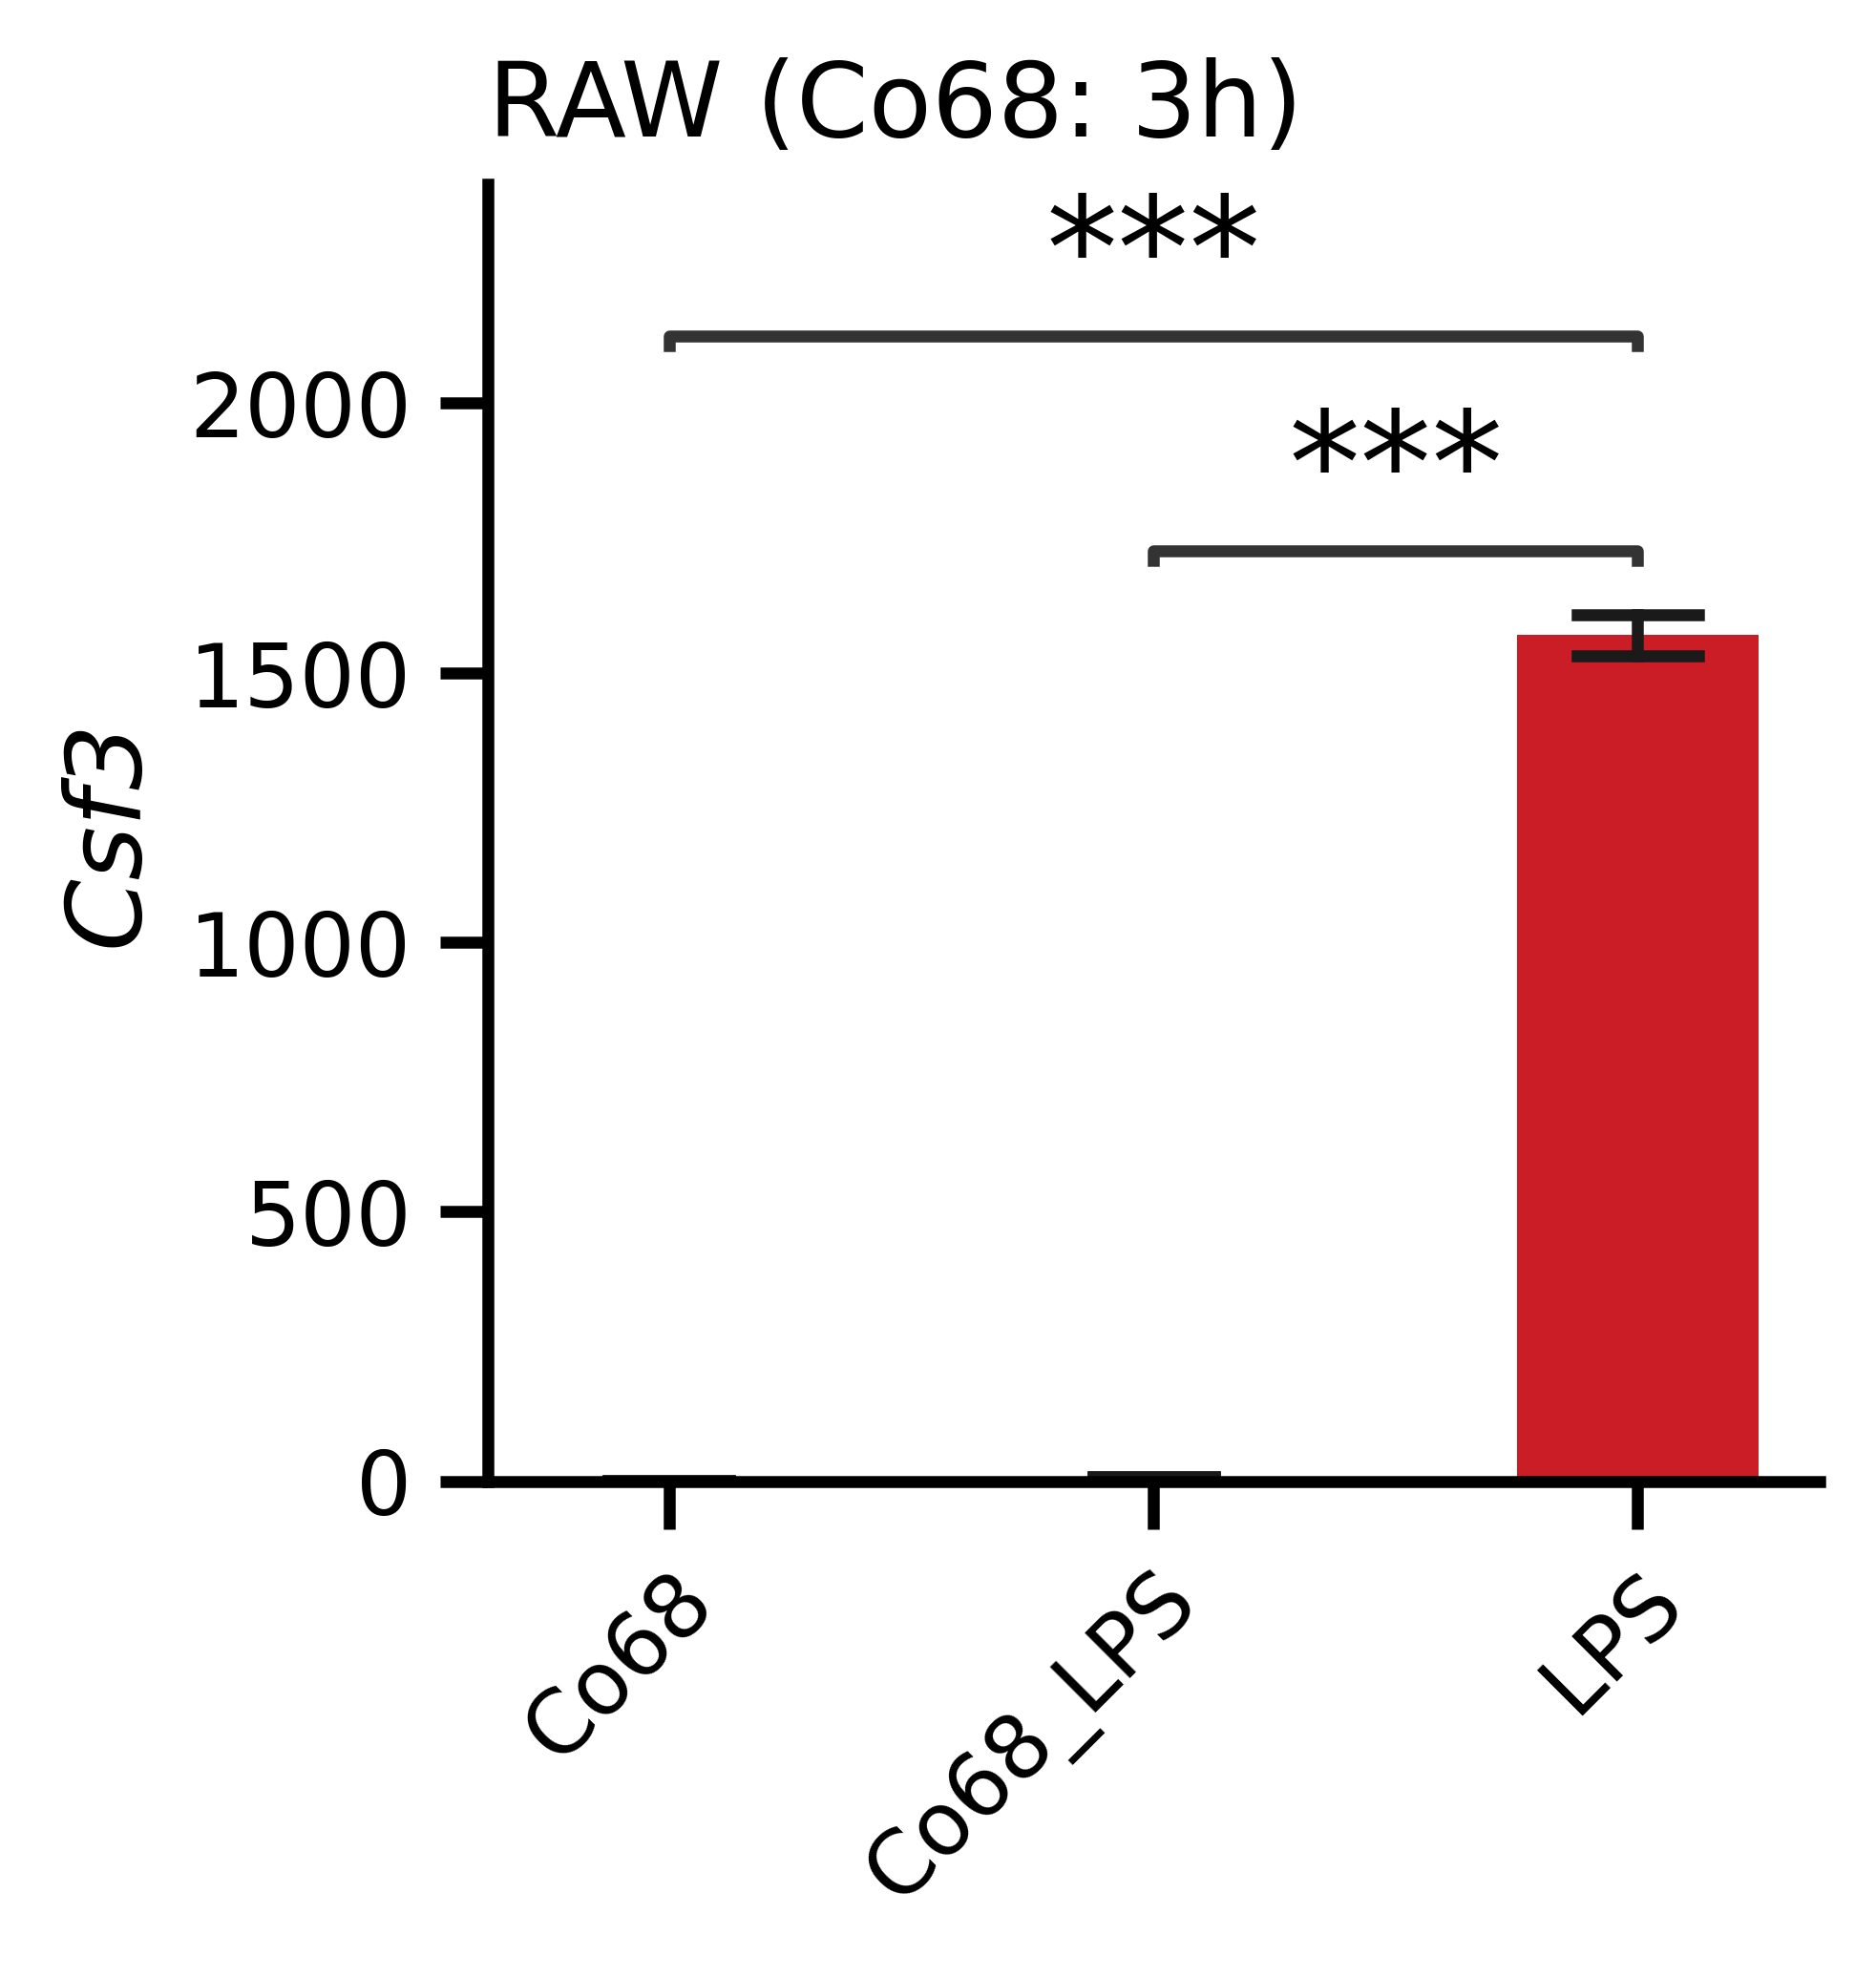

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.5):
    x='样本名称'
    y='fc'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(4,4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, width=0.5,
        capsize=0.25, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel('Csf3', fontsize=13, fontstyle='italic')
    # ax.set_title('RAW 264.7 (5h)', fontsize=13, loc='left')
    ax.set_title('RAW (Co68: 3h)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp['样本名称'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    # pairs=[('DMSO','Co68'), ('HSV','HSV-Co68'), ('EMCV','EMCV-Co68')
    # ]

    pairs = [('Co68','LPS'),('Co68_LPS','LPS')]
    
    # pairs=[('DRUG-DMSO','DRUG-10H')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
# Co68iLPS
plt.savefig('/Users/fenn/Documents/Co68/qPCR/Co68iLPS/RNA-seq_Validation/Figures/RAW_3h_Co68_i_LPS_Csf3_33.pdf', dpi=700, bbox_inches='tight')

In [1024]:
# exp = geneExp
# exp.to_csv('./Co/THP1_Co68_IFNB1.csv', index=None)
exp['trt'] = ['DMSO', 'DMSO','Co68','Co68']*3
exp

样本名称   检测项目     CT   ACTB   diff       pow          fc  \
0        RAW_DMSO  mIfnb  31.39  16.68 -14.71  0.000037    1.211629   
1        RAW_DMSO  mIfnb  32.06  16.73 -15.33  0.000024    0.788371   
2        RAW_Co68  mIfnb  30.56  18.73 -11.83  0.000275    8.919405   
3        RAW_Co68  mIfnb  30.79  18.78 -12.01  0.000242    7.873185   
4        RAW_EMCV  mIfnb  24.75  17.03  -7.72  0.004743  154.017178   
5        RAW_EMCV  mIfnb  24.88  17.25  -7.63  0.005048  163.931292   
6   RAW_EMCV-Co68  mIfnb  29.49  19.16 -10.33  0.000777   25.227887   
7   RAW_EMCV-Co68  mIfnb  29.50  19.16 -10.34  0.000772   25.053625   
8         RAW_HSV  mIfnb  27.77  17.24 -10.53  0.000676   21.962151   
9         RAW_HSV  mIfnb  27.97  17.27 -10.70  0.000601   19.520897   
10   RAW_HSV-Co68  mIfnb  30.28  17.80 -12.48  0.000175    5.684161   
11   RAW_HSV-Co68  mIfnb  30.76  17.97 -12.79  0.000141    4.585082   

      samples group   trt  
0        DMSO  DMSO  DMSO  
1        DMSO  DMSO  DMSO  
2        Co68  DMSO  Co68  
3        Co68  DMSO  Co68  
4        EMCV  EMCV  DMSO  
5        EMCV  EMCV  DMSO  
6   EMCV-Co68  EMCV  Co68  
7   EMCV-Co68  EMCV  Co68  
8         HSV   HSV  DMSO  
9         HSV   HSV  DMSO  
10   HSV-Co68   HSV  Co68  
11   HSV-Co68   HSV  Co68

In [208]:
import os
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/targetValidation')
os.listdir()

['20221030_214919_TBK1.xls',
 'PMs_Co7_TLR4_KO_WT.csv',
 'RAW_Co68_Target_PMs_33.pdf',
 'Co7_Ifnb1_KO_TRIF-PMs.pdf',
 'Target_TLR4_HT29.pdf',
 '20221028_205248_TLR4_RAW_Co7.xls',
 'PMs_Co7_TRIF_KO_WT.csv',
 '20221111_102030-TLR4_HT29.xls',
 'Target_TLR4_RAW.pdf',
 'Co7_Ifnb1_KO_TLR4-PMs.pdf',
 'BMDMs_Co68_TLR4_KO_WT.csv',
 'RAW_Co68_Target_BMDMs_33.pdf',
 'PMs_Co68_TLR4_KO_WT.csv',
 '20221028_205248_TLR4_RAW.xls',
 '20221029_201716_Tlr4_Md2.xls',
 '20221028_205248_TLR4_RAW_Co7.csv']

In [209]:
data = pd.read_csv('20221028_205248_TLR4_RAW_Co7.csv')
data

孔位  样本ID         样本名称   检测项目  属性    染料     CT  CT值平均值  CT标准方差  浓度  浓度平均值  \
0   A11    21        BLANK   ACTB  未知  SYBR    NaN   36.80    0.00 NaN    NaN   
1   B11    21        BLANK   ACTB  未知  SYBR    NaN   36.80    0.00 NaN    NaN   
2   C11    21        BLANK   ACTB  未知  SYBR  36.80   36.80    0.00 NaN    NaN   
3   D11    21        BLANK   ACTB  未知  SYBR    NaN   36.80    0.00 NaN    NaN   
4   E11    21        BLANK  IFNB1  未知  SYBR  34.65   33.65    0.73 NaN    NaN   
5   F11    21        BLANK  IFNB1  未知  SYBR  33.76   33.65    0.73 NaN    NaN   
6   G11    21        BLANK  IFNB1  未知  SYBR  33.10   33.65    0.73 NaN    NaN   
7   H11    21        BLANK  IFNB1  未知  SYBR  33.10   33.65    0.73 NaN    NaN   
8   E05    13     RAW-C176   ACTB  未知  SYBR  16.32   16.30    0.03 NaN    NaN   
9   E06    13     RAW-C176   ACTB  未知  SYBR  16.27   16.30    0.03 NaN    NaN   
10  E07    13     RAW-C176  IFNB1  未知  SYBR  22.83   22.89    0.08 NaN    NaN   
11  E08    13     RAW-C176  IFNB1  未知  SYBR  22.94   22.89    0.08 NaN    NaN   
12  D05    12      RAW-C29   ACTB  未知  SYBR  16.65   16.62    0.04 NaN    NaN   
13  D06    12      RAW-C29   ACTB  未知  SYBR  16.60   16.62    0.04 NaN    NaN   
14  D07    12      RAW-C29  IFNB1  未知  SYBR  23.04   22.96    0.11 NaN    NaN   
15  D08    12      RAW-C29  IFNB1  未知  SYBR  22.88   22.96    0.11 NaN    NaN   
16  A05     9     RAW-DMSO   ACTB  未知  SYBR  15.01   14.93    0.11 NaN    NaN   
17  A06     9     RAW-DMSO   ACTB  未知  SYBR  14.85   14.93    0.11 NaN    NaN   
18  A07     9     RAW-DMSO  IFNB1  未知  SYBR  29.56   29.49    0.11 NaN    NaN   
19  A08     9     RAW-DMSO  IFNB1  未知  SYBR  29.41   29.49    0.11 NaN    NaN   
20  B05    10     RAW-DRUG   ACTB  未知  SYBR  15.96   15.89    0.11 NaN    NaN   
21  B06    10     RAW-DRUG   ACTB  未知  SYBR  15.81   15.89    0.11 NaN    NaN   
22  B07    10     RAW-DRUG  IFNB1  未知  SYBR  24.63   24.58    0.07 NaN    NaN   
23  B08    10     RAW-DRUG  IFNB1  未知  SYBR  24.53   24.58    0.07 NaN    NaN   
24  C05    11     RAW-IN-1   ACTB  未知  SYBR  15.62   15.55    0.09 NaN    NaN   
25  C06    11     RAW-IN-1   ACTB  未知  SYBR  15.49   15.55    0.09 NaN    NaN   
26  C07    11     RAW-IN-1  IFNB1  未知  SYBR  31.82   31.78    0.06 NaN    NaN   
27  C08    11     RAW-IN-1  IFNB1  未知  SYBR  31.73   31.78    0.06 NaN    NaN   
28  F05    14  RAW-TLR4-MD   ACTB  未知  SYBR  15.45   15.45    0.00 NaN    NaN   
29  F06    14  RAW-TLR4-MD   ACTB  未知  SYBR  15.44   15.45    0.00 NaN    NaN   
30  F07    14  RAW-TLR4-MD  IFNB1  未知  SYBR  31.11   31.03    0.12 NaN    NaN   
31  F08    14  RAW-TLR4-MD  IFNB1  未知  SYBR  30.94   31.03    0.12 NaN    NaN   
32  G05    15  RAW-TLR4-YS   ACTB  未知  SYBR  16.44   16.33    0.15 NaN    NaN   
33  G06    15  RAW-TLR4-YS   ACTB  未知  SYBR  16.23   16.33    0.15 NaN    NaN   
34  G07    15  RAW-TLR4-YS  IFNB1  未知  SYBR  23.42   23.38    0.06 NaN    NaN   
35  G08    15  RAW-TLR4-YS  IFNB1  未知  SYBR  23.34   23.38    0.06 NaN    NaN   
36  H05    16     RAW-TRIF   ACTB  未知  SYBR  15.48   15.53    0.08 NaN    NaN   
37  H06    16     RAW-TRIF   ACTB  未知  SYBR  15.59   15.53    0.08 NaN    NaN   
38  H07    16     RAW-TRIF  IFNB1  未知  SYBR  29.08   29.11    0.04 NaN    NaN   
39  H08    16     RAW-TRIF  IFNB1  未知  SYBR  29.14   29.11    0.04 NaN    NaN   

    浓度标准方差  结论  
0      NaN  阴性  
1      NaN  阴性  
2      NaN  阴性  
3      NaN  阴性  
4      NaN  阴性  
5      NaN  阴性  
6      NaN  阴性  
7      NaN  阴性  
8      NaN  阴性  
9      NaN  阴性  
10     NaN  阴性  
11     NaN  阴性  
12     NaN  阴性  
13     NaN  阴性  
14     NaN  阴性  
15     NaN  阴性  
16     NaN  阴性  
17     NaN  阴性  
18     NaN  阴性  
19     NaN  阴性  
20     NaN  阴性  
21     NaN  阴性  
22     NaN  阴性  
23     NaN  阴性  
24     NaN  阴性  
25     NaN  阴性  
26     NaN  阴性  
27     NaN  阴性  
28     NaN  阴性  
29     NaN  阴性  
30     NaN  阴性  
31     NaN  阴性  
32     NaN  阴性  
33     NaN  阴性  
34     NaN  阴性  
35     NaN  阴性  
36     NaN  阴性  
37     NaN  阴性  
38     NaN  阴性  
39 

In [201]:
###分组作图
exp = data
exp

样本名称   检测项目     CT   diff       pow         fc samples group   trt
0  PM-DMSO  IFNB1  33.32 -15.99  0.000015   1.292702      0h    WT  DMSO
1  PM-DMSO  IFNB1  34.34 -16.86  0.000008   0.707298      0h    WT  DMSO
2  PM-C176  IFNB1  35.87 -12.16  0.000219   1.384141      1h    KO  DMSO
3  PM-C176  IFNB1  36.14 -12.32  0.000196   1.454267      1h    KO  DMSO
4    PM-3H  IFNB1  33.65 -11.27  0.000405  54.069051      3h    WT   Co7
5    PM-3H  IFNB1  33.88 -11.25  0.000411  59.544637      3h    WT   Co7
6    PM-YS  IFNB1  31.61 -11.56  0.000331   8.651470      5h    KO   Co7
7    PM-YS  IFNB1  31.71 -11.54  0.000336  11.254130      5h    KO   Co7

In [202]:
os.getcwd()

'/Users/fenn/Documents/Co68/qPCR/qPCR/targetValidation'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

KO_DMSO vs. KO_Co7: t-test independent samples, P_val:2.249e-02 t=-6.555e+00
WT_DMSO vs. WT_Co7: t-test independent samples, P_val:2.425e-03 t=-2.027e+01
WT_Co7 vs. KO_Co7: t-test independent samples, P_val:4.160e-03 t=1.546e+01


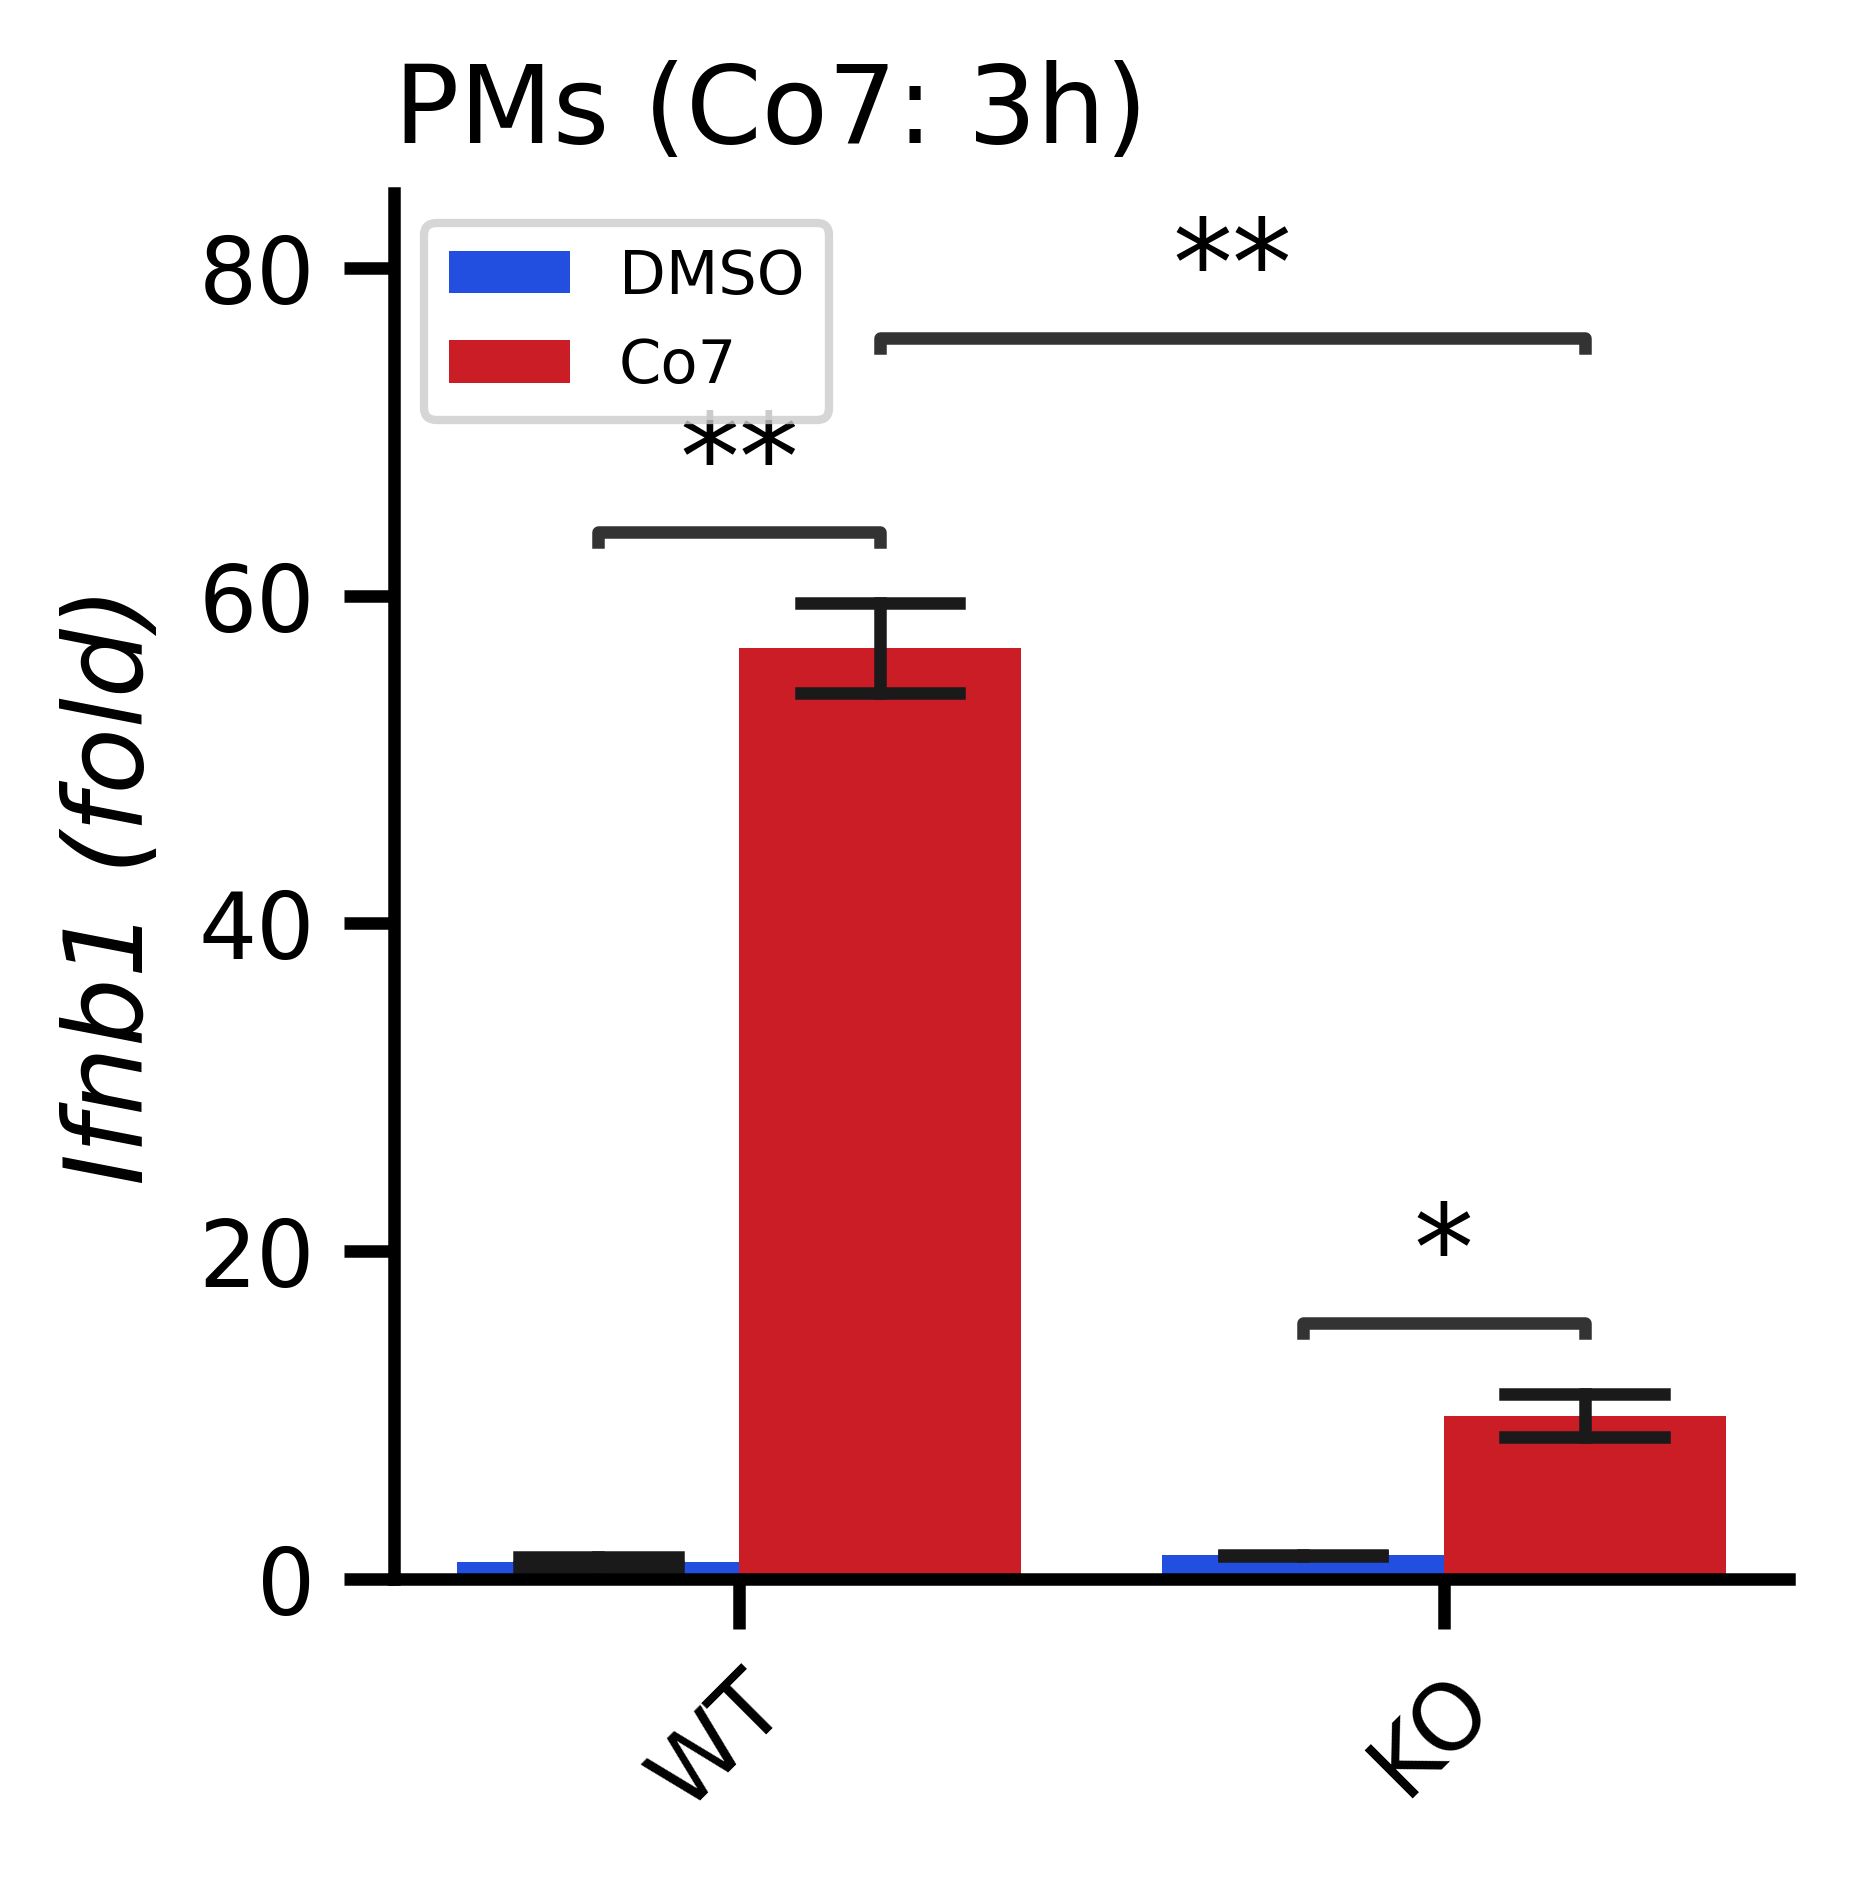

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='fc'
    gene = 'Ifnb1'
    cell = 'PMs'

    trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    a = list(trt)


    fig = plt.figure(figsize=(3, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
        capsize=0.225, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    
    ax.legend(loc=0, fontsize=7.3)
    ax.set_title(f'{cell} (Co7: 3h)', fontsize=13, loc='left')
    # ax.set_title('HT29 (Co68)', fontsize=13, loc='left')
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[
    (('WT', 'DMSO'),('WT', 'Co7')),
    (('KO', 'DMSO'),('KO', 'Co7')),
    (('WT', 'Co7'),('KO', 'Co7'))
        ]

    # pairs=[(('10h','Co68'),('10h','DMSO')),(('20h','Co68'),('20h','DMSO')),
    #        (('30h','Co68'),('30h','DMSO')),(('40h','Co68'),('40h','DMSO')),
    # ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(f'./Co7_{gene}_KO_TRIF-{cell}.pdf', dpi=700, bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=2.2):
    x='样本名称'
    y='fc'

    trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    a = list(trt)


    fig = plt.figure(figsize=(12, 8), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    g = sns.barplot(data=exp, y=y, x=x, width=.5,
        capsize=0.25, errwidth=3, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=3, labelsize=30)
    ax.set_xlabel('')
    ax.set_ylabel('IFNB1', fontsize=35, fontstyle='italic')
    # ax.set_title('ERVB2_1-I_MM-int', fontsize=35, loc='center')
    ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'Co1', 'Co9', 'Co26', 'Co66', 'Co68', 'Co75'], rotation_mode='anchor', rotation=45, horizontalalignment='right')
    

    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    
    # pairs=[('WT_MOCK', 'WT_VSV'), ('WT_MOCK', 'WT_HSV')]
    # annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    # annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=3, line_height=0.03, verbose=True)

    # annotator.apply_and_annotate()

# print(sns.__file__)
# plt.savefig('./Co_New_Drug_5.pdf', dpi=700, bbox_inches='tight')

In [ ]:
lps_ifn = y.copy()
lps_ifn["diff"] = -lps_ifn["Cт "].diff(periods=24)
lps_ifn = lps_ifn.dropna().reset_index(drop=True)
lps_ifn["power"] = np.power(2,lps_ifn["diff"])
y = lps_ifn.sort_values(by="样本名称", ascending=False).reset_index(drop=True)
y

In [105]:
#data = pd.read_excel("./2021-12-30_161602_TG_4h.xls",header=18)
#data = pd.read_excel("./2021-12-28_195556_PARP14_TG.xls", header=18)
#data = pd.read_excel("./2021-12-25_204359_PARP14.xls", header=18)
data = pd.read_excel("./2022-01-01_202149_parp14_WT.xls", header=18)

#data = pd.read_excel("./2022-01-02_135723_BMDM_PERI.xls", header=18)
#data = pd.read_excel("./2022-01-05_184059_parp14_RA_RTP4.xls", header=18)
#data = pd.read_excel("./2022-01-07_133012_PARP14_WT_peritoneal.xls", header=18)
#data = pd.read_excel("./2021-12-25_204359_PARP14.xls", header=18)
res=data.loc[:,['样本名称','基因名称','Cт ']].dropna(axis=0)
z = res.sort_values(by=["基因名称","样本名称"]).reset_index(drop=True)

In [190]:
z = z[(z["基因名称"] == "mACTB") | (z["基因名称"] == "mIFNB") | (z["基因名称"] == "mIL-1B") | 
    (z["基因名称"] == "mIL-6")].reset_index(drop=True)
z[z["基因名称"] == "mACTB"]
z

样本名称   基因名称        Cт 
0    KO-HSV  mACTB  22.937943
1    KO-HSV  mACTB  22.700266
2    KO-MHV  mACTB  22.756126
3    KO-MHV  mACTB  22.712191
4   KO-MOCK  mACTB  21.112333
..      ...    ...        ...
59   WT-MHV  mIL-6  28.071520
60  WT-MOCK  mIL-6  30.946039
61  WT-MOCK  mIL-6  31.025661
62   WT-SEV  mIL-6  28.599861
63   WT-SEV  mIL-6  28.747938

[64 rows x 3 columns]

In [211]:
z=pd.read_csv("merge_220112.csv")
z.head(16)

样本名称   基因名称         Cт
0    WT-HSV  mACTB  16.605850
1    WT-HSV  mACTB  16.599619
2    WT-MHV  mACTB  18.417276
3    WT-MHV  mACTB  18.368946
4   WT-MOCK  mACTB  17.263836
5   WT-MOCK  mACTB  17.164602
6    WT-SEV  mACTB  16.176786
7    WT-SEV  mACTB  16.097443
8    WT-HSV  mIFNB  23.350281
9    WT-HSV  mIFNB  23.416748
10   WT-MHV  mIFNB  25.568295
11   WT-MHV  mIFNB  25.431877
12  WT-MOCK  mIFNB  32.327335
13  WT-MOCK  mIFNB  33.136635
14   WT-SEV  mIFNB  24.472525
15   WT-SEV  mIFNB  24.393509

In [74]:
ifnb = z[(z["基因名称"] == "mACTB") | (z["基因名称"] == "mIL-6")].reset_index(drop=True)
#ifnb.columns = ["sample", "gene", "Cт "]
ifnb

y = ifnb.sort_values(by=["基因名称", "样本名称"]).reset_index(drop=True)
y

样本名称   基因名称        Cт 
0    KO-HSV  mACTB  16.883286
1    KO-HSV  mACTB  17.141685
2    KO-LPS  mACTB  15.193486
3    KO-LPS  mACTB  15.133750
4    KO-MHV  mACTB  18.335375
5    KO-MHV  mACTB  17.951439
6   KO-MOCK  mACTB  16.171879
7   KO-MOCK  mACTB  16.066334
8    KO-SEV  mACTB  17.694069
9    KO-SEV  mACTB  17.829752
10   KO-VSV  mACTB  15.546314
11   KO-VSV  mACTB  15.111871
12   WT-HSV  mACTB  15.979544
13   WT-HSV  mACTB  15.746206
14   WT-LPS  mACTB  16.448305
15   WT-LPS  mACTB  16.032415
16   WT-MHV  mACTB  17.537191
17   WT-MHV  mACTB  17.633038
18  WT-MOCK  mACTB  16.859827
19  WT-MOCK  mACTB  16.788141
20   WT-SEV  mACTB  17.030079
21   WT-SEV  mACTB  17.018644
22   WT-VSV  mACTB  15.534461
23   WT-VSV  mACTB  15.352933
24   KO-HSV  mIL-6  26.578413
25   KO-HSV  mIL-6  26.462950
26   KO-LPS  mIL-6  18.752266
27   KO-LPS  mIL-6  18.661896
28   KO-MHV  mIL-6  28.841860
29   KO-MHV  mIL-6  28.807964
30  KO-MOCK  mIL-6  30.444637
31  KO-MOCK  mIL-6  31.527626
32   KO-SEV  mIL-6  30.436008
33   KO-SEV  mIL-6  30.636742
34   KO-VSV  mIL-6  23.865395
35   KO-VSV  mIL-6  24.097694
36   WT-HSV  mIL-6  35.740376
37   WT-HSV  mIL-6  25.182196
38   WT-LPS  mIL-6  18.790939
39   WT-LPS  mIL-6  18.843630
40   WT-MHV  mIL-6  27.953665
41   WT-MHV  mIL-6  27.883690
42  WT-MOCK  mIL-6  31.119709
43  WT-MOCK  mIL-6  31.318233
44   WT-SEV  mIL-6  29.885647
45   WT-SEV  mIL-6  29.860668
46   WT-VSV  mIL-6  24.739861
47   WT-VSV  mIL-6  24.523293

In [75]:
#ifnb = lps[(lps["基因名称"] == "ACTB") | (lps["基因名称"] == "IL-6")].reset_index(drop=True)
lps_ifn = y.copy()
lps_ifn["diff"] = -lps_ifn["Cт "].diff(periods=24)
lps_ifn = lps_ifn.dropna().reset_index(drop=True)
lps_ifn["power"] = np.power(2,lps_ifn["diff"])
y = lps_ifn.sort_values(by="样本名称", ascending=False).reset_index(drop=True)
y


样本名称   基因名称        Cт        diff     power
0    WT-VSV  mIL-6  24.523293  -9.170360  0.001736
1    WT-VSV  mIL-6  24.739861  -9.205400  0.001694
2    WT-SEV  mIL-6  29.860668 -12.842024  0.000136
3    WT-SEV  mIL-6  29.885647 -12.855568  0.000135
4   WT-MOCK  mIL-6  31.318233 -14.530092  0.000042
5   WT-MOCK  mIL-6  31.119709 -14.259882  0.000051
6    WT-MHV  mIL-6  27.883690 -10.250652  0.000821
7    WT-MHV  mIL-6  27.953665 -10.416473  0.000732
8    WT-LPS  mIL-6  18.843630  -2.811214  0.142475
9    WT-LPS  mIL-6  18.790939  -2.342634  0.197150
10   WT-HSV  mIL-6  25.182196  -9.435989  0.001444
11   WT-HSV  mIL-6  35.740376 -19.760832  0.000001
12   KO-VSV  mIL-6  24.097694  -8.985824  0.001972
13   KO-VSV  mIL-6  23.865395  -8.319080  0.003131
14   KO-SEV  mIL-6  30.636742 -12.806990  0.000140
15   KO-SEV  mIL-6  30.436008 -12.741940  0.000146
16  KO-MOCK  mIL-6  31.527626 -15.461292  0.000022
17  KO-MOCK  mIL-6  30.444637 -14.272758  0.000051
18   KO-MHV  mIL-6  28.807964 -10.856525  0.000539
19   KO-MHV  mIL-6  28.841860 -10.506485  0.000687
20   KO-LPS  mIL-6  18.661896  -3.528146  0.086681
21   KO-LPS  mIL-6  18.752266  -3.558780  0.084860
22   KO-HSV  mIL-6  26.462950  -9.321264  0.001563
23   KO-HSV  mIL-6  26.578413  -9.695127  0.001206

In [76]:
f1 = y[(y["样本名称"] == "WT-LPS") | (y["样本名称"] == "KO-LPS") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f1
f2 = y[(y["样本名称"] == "WT-VSV") | (y["样本名称"] == "KO-VSV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f2
f3 = y[(y["样本名称"] == "WT-HSV") | (y["样本名称"] == "KO-HSV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f3
f4 = y[(y["样本名称"] == "WT-SEV") | (y["样本名称"] == "KO-SEV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f4
f5 = y[(y["样本名称"] == "WT-MHV") | (y["样本名称"] == "KO-MHV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f5

样本名称   基因名称        Cт        diff     power
0  WT-MOCK  mIL-6  31.318233 -14.530092  0.000042
1  WT-MOCK  mIL-6  31.119709 -14.259882  0.000051
2   WT-MHV  mIL-6  27.883690 -10.250652  0.000821
3   WT-MHV  mIL-6  27.953665 -10.416473  0.000732
4  KO-MOCK  mIL-6  31.527626 -15.461292  0.000022
5  KO-MOCK  mIL-6  30.444637 -14.272758  0.000051
6   KO-MHV  mIL-6  28.807964 -10.856525  0.000539
7   KO-MHV  mIL-6  28.841860 -10.506485  0.000687

In [231]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [20]:
res=f3.loc[:,["cell","power-G13","power-CRE"]]
res

cell    power-G13  power-CRE
0    G13   143.984469   0.946148
1    G13    55.618461   0.946148
2    G13  1024.000000   0.946148
3    G13   200.750863   0.946148
4    G13    56.362067   0.946148
..   ...          ...        ...
145   NT  1024.000000   0.946148
146   NT    33.869490   0.946148
147   NT   461.842271   0.946148
148   NT  1024.000000   0.946148
149   NT    15.050524   0.946148

[150 rows x 3 columns]

In [22]:
no_2 = res.melt(
    id_vars="cell",
    value_vars=["power-G13", "power-CRE"],
    value_name="power",
    var_name="gene",
)
no_2

cell       gene        power
0    G13  power-G13   143.984469
1    G13  power-G13    55.618461
2    G13  power-G13  1024.000000
3    G13  power-G13   200.750863
4    G13  power-G13    56.362067
..   ...        ...          ...
295   NT  power-CRE     0.946148
296   NT  power-CRE     0.946148
297   NT  power-CRE     0.946148
298   NT  power-CRE     0.946148
299   NT  power-CRE     0.946148

[300 rows x 3 columns]

In [2]:
# MSigDB_Hallmark_2020

In [22]:
import os
import re
import numpy as np
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/FPKM/')
os.listdir()

['figureFPKM',
 '.DS_Store',
 'MCB_LPS.pdf',
 'gene_count_LPS_MCB.csv',
 'gene_fpkm_LPS_MCB.csv',
 'DEGsLPSMCB',
 'gene_fpkm_VB12_LPS_All.csv',
 'DEGsParp14']

In [8]:
#RNA-seq analysis
import pandas as pd
from gseapy import gsva

# 读取基因表达数据
expFPKM = pd.read_csv('gene_fpkm_VB12_LPS_All.csv')
expFPKM


Geneid  DMSO1  DMSO2  LPS-1h  LPS-2h  LPS-3h  RAW-LPS  \
0      0610005C13Rik   0.26   0.04    0.11    0.05    0.23     0.11   
1      0610009B22Rik  26.39  25.77   17.47   12.64   11.30    10.59   
2      0610009E02Rik   0.19   0.18    0.00    0.03    0.08     0.00   
3      0610009L18Rik   0.76   0.59    0.19    0.51    0.31     0.78   
4      0610010F05Rik  11.72  11.60   10.87    9.35    9.37    13.14   
...              ...    ...    ...     ...     ...     ...      ...   
25234            Zyx   4.42   1.91   12.74   14.10   17.19    14.08   
25235          Zzef1   9.45   7.87    6.88    3.66    4.35     4.97   
25236           Zzz3  21.17  14.33   13.50   14.92   10.15    18.48   
25237              a   0.42   0.06    0.00    0.00    0.00     0.00   
25238        ccdc198   0.00   0.00    0.00    0.09    0.00     0.00   

       RAW-LPS-MyD88  RAW-LPS-TRIF  LPS_6h   MCB1   MCB2  LPS-MCB1  LPS-MCB2  \
0               0.11          0.00    0.18   0.14   0.18      0.10      0.11   
1              18.17         13.63   12.51  15.55  13.06      5.06      9.60   
2               0.40          0.04    0.06   0.20   0.22      0.04      0.00   
3               4.12          0.98    0.24   0.42   0.00      0.27      0.10   
4               5.56         12.29   13.09   7.54   7.49      3.28      3.91   
...              ...           ...     ...    ...    ...       ...       ...   
25234          20.81         13.15    8.07   2.57   2.34      4.56      5.23   
25235           2.04          6.66    5.17   8.47   8.65      6.98      5.66   
25236          12.52         25.63   24.59  28.13  30.24     27.68     25.08   
25237           0.45          0.09    0.15   0.22   0.19      0.08      0.00   
25238           0.16          0.00    0.04   0.00   0.00      0.15      0.11   

       RAW-MCB-MyD88  RAW-MCB-TLR4  
0               0.11          0.11  
1               7.35         15.10  
2               0.08          0.16  
3               0.50          0.41  
4               8.21          9.79  
...              ...           ...  
25234           3.67         12.04  
25235           4.81          3.52  
25236          28.40         23.28  
25237           0.00          0.19  
25238           0.43          0.06  

[25239 rows x 16 columns]

In [23]:
il1b = expFPKM[expFPKM['Geneid'].str.contains('^Il1\w$|^Isg\w+$|Ifn\w+', flags=re.IGNORECASE)].set_index('Geneid')
il1b = il1b[il1b.apply(np.mean, axis=1)>2]
il1b


DMSO1  DMSO2  LPS-1h  LPS-2h  LPS-3h  RAW-LPS  RAW-LPS-MyD88  \
Geneid                                                                  
Ifnar1   15.26  11.55   11.18   10.47    9.38    10.17           9.09   
Ifnar2   36.64  25.77   17.86   16.41   16.68    17.89          26.36   
Ifnb1     0.00   0.00    4.82   20.47   25.97    10.23           0.89   
Ifngr1   45.89  34.95   22.07   16.22   12.22    11.66          22.81   
Ifngr2   44.92  40.30   50.20   54.94   42.87    61.28          52.85   
Il15      8.87   7.94    1.96    4.86   28.70    28.32           3.73   
Il16     22.49   8.54    4.61    2.50    3.10     3.29           1.18   
Il18     16.84  13.37    8.39   10.43   32.04    13.81          16.55   
Il1a      0.12   0.08    3.82   17.09  124.34   730.47          76.79   
Il1b      0.22   0.09    2.13   26.79  420.91  2445.63         356.30   
Isg15     0.08   0.48   19.09  174.25  422.56   258.94         325.44   
Isg20     0.82   0.15    1.10    5.07   33.89    19.47           3.83   
Isg20l2  42.07  61.46   47.41   52.61   51.03    72.80          38.24   

         RAW-LPS-TRIF  LPS_6h   MCB1   MCB2  LPS-MCB1  LPS-MCB2  \
Geneid                                                            
Ifnar1          13.16   11.47  16.78  16.79     15.85     17.03   
Ifnar2          14.47   15.29  22.00  21.12     16.98     15.96   
Ifnb1            1.19    3.59   0.00   0.00      0.15      0.25   
Ifngr1          18.58   14.67  48.87  45.02     29.65     38.05   
Ifngr2          76.66   44.83  53.47  51.05     77.73     76.57   
Il15            14.35    7.94   9.02   9.02      3.04      6.13   
Il16             3.45    4.38  12.07  11.16      3.40      6.12   
Il18             6.80   30.15   4.37   4.31     12.75     12.05   
Il1a           503.21  125.05   0.37   0.17    366.59    506.18   
Il1b          1680.80  176.04   0.00   0.15     32.25     57.03   
Isg15          119.65  160.57   1.23   0.54     20.02     41.04   
Isg20            4.68    4.18   2.19   3.98      3.56      3.52   
Isg20l2         74.55   68.67  48.93  48.40     44.70     50.64   

         RAW-MCB-MyD88  RAW-MCB-TLR4  
Geneid                                
Ifnar1            8.52          8.22  
Ifnar2           27.43         29.01  
Ifnb1             0.97          1.25  
Ifngr1           16.47         14.05  
Ifngr2           21.08         24.61  
Il15             20.22         37.12  
Il16              2.95          4.68  
Il18             30.50         42.88  
Il1a             92.14         96.06  
Il1b             45.42         71.67  
Isg15           118.15        244.19  
Isg20            21.04         22.62  
Isg20l2          29.95         27.85